# A Demo of the Kriging Convolutional Network

## 1 Data loading and visualization
In this notebook, we will show how to run KCN on the bird dataset from the KCN paper. This section will load the data and visualize them on a map.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import data
import argument
import geopandas as gpd
import geoplot as gplt
import os
import torch
%matplotlib inline
%load_ext autoreload
%autoreload 2
%autosave 180

d:\anaconda3\envs\pytorch\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Autosaving every 180 seconds


In [22]:
# Load the data
# args = argument.parse_opt()
# args.dataset = "bird_count"
# trainset, testset = data.load_bird_count_data(args)

# values = np.concatenate([trainset.y, trainset.coords], axis=1)

# gdf = gpd.GeoDataFrame(values, columns = ['num', 'latitude', 'longitude'],
# geometry=gpd.points_from_xy(values[:, 2], values[:, 1]), crs='EPSG:4326')


In [6]:
# print(data.load_bird_count_data(args))

(<data.SpatialDataset object at 0x00000246756B2D90>, <data.SpatialDataset object at 0x0000024607763EE0>)


The following two plots give a quick glimpse of the data. The first chart shows that counts in the dataset are highly sparse, with only 10.6 percent of training records having positive counts. The second plot shows the geographical distribution of the bird counts over east US and Canada.

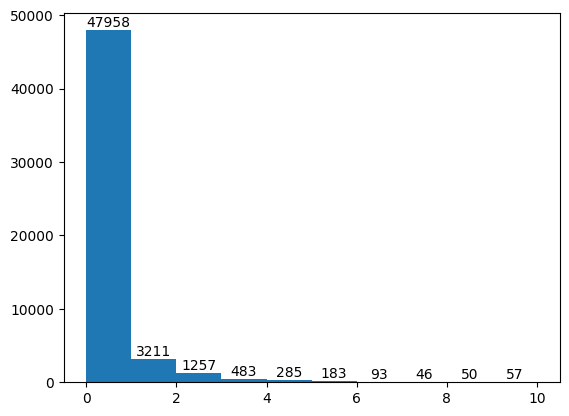

In [3]:
# histogram of bird counts

# counts, edges, bars = plt.hist(gdf['num'], bins=10)
# bin_val = plt.bar_label(bars)

In [8]:
# spatial distribution of positive observations (counts greater than 0)

# gdf_pos = gdf[gdf['num'] >= 1]
# contiguous_usa = gpd.read_file(gplt.datasets.get_path('contiguous_usa'))
# ax = gplt.polyplot(
#     contiguous_usa,
#     zorder=-1,
#     linewidth=1,
#     projection=gplt.crs.AlbersEqualArea(),
#     edgecolor='white',
#     facecolor='lightgray',
#     figsize=(12, 12)
# )
# gplt.pointplot(gdf_pos, ax=ax, color = 'forestgreen', 
#     edgecolor='black', linewidth=0.05,
#     scale='num', limits=(1, 10),
#     legend=True, legend_var='scale',
#     legend_kwargs={'frameon': False},
# )

URLError: <urlopen error [Errno 11004] getaddrinfo failed>

## 2 Predicting counts for new locations

In this section, we will train a KCN model with the train set and predict counts for locations in the test set. We put the procedure in `experiment.py`. 

The hyperparameters are set to default values in `argument.py`. If the code is run via a command line, then arguments can be passed in there. Below we test the three models (KCN, KCN-att, and KCN-sage) with the same hyperparameters.

In [2]:
import experiment

In [3]:
X_raw=np.load('all.npy')
# stations = pd.read_csv("D:\Spatial_interpolation\SSIN\data\Station_info.csv")
stations = pd.read_csv("/home/dma312/Spatial_interpolation/SSIN/data/Station_info.csv")
lat=stations["lat"]
lon=stations["lon"]
lat=list(lat)
lon=list(lon)
x=X_raw.tolist()
for i in range(len(x)):
    x[i].append(lat)
    x[i].append(lon)
X=np.array(x)
for i in range(len(x)):
    X[i]=X[i].astype(np.float32)

In [16]:
X.shape

(8784, 20, 103)

In [5]:
X.shape

(8784, 20, 103)

In [17]:
xx=X[0][[5,6,7,8,9,10,12,13,14,18,19]]
xx.shape

(11, 103)

In [15]:
xx[7]

array([ 72.24199677,  80.86599731,  80.53399658,  77.76399994,
        78.47699738,  77.36199951,  77.71499634,  53.13700104,
        46.32699966,  64.79299927,  58.63000107,  68.39299774,
        71.45200348,  69.57299805,  63.01200104,  64.76300049,
        89.66200256,  93.64600372,  87.54799652,  96.68699646,
        94.40399933,  84.50800323,  88.23699951,  94.11199951,
        81.57499695,  75.06099701,  67.48300171,  63.32899857,
        66.53700256,  69.1269989 ,  70.13999939,  69.25      ,
        74.69200134,  66.56199646,  74.83699799,  70.28299713,
        65.90899658,  73.16400146,  67.30000305,  70.56600189,
        70.4260025 ,  69.35500336,  68.9960022 ,  68.11199951,
        67.87599945,  77.03600311,  73.70300293,  76.9960022 ,
       148.01800537, 130.50700378, 137.3769989 , 120.9980011 ,
       122.8809967 , 123.31700134, 123.98000336, 124.52700043,
       122.83899689, 124.38200378, 121.90299988, 124.48699951,
       177.70300293, 124.73899841, 122.39600372, 119.52

In [6]:
columns_with_missing_data = np.any(np.isnan(xx), axis=0)
missing_columns = np.where(columns_with_missing_data)[0]
result = np.delete(xx, missing_columns, axis=1)

In [33]:
xx=X[0][[5,6,7,8,9,10,12,13,14,18,19]]
columns_with_missing_data = np.any(np.isnan(xx), axis=0)
missing_columns = np.where(columns_with_missing_data)[0]
result = np.delete(xx, missing_columns, axis=1)
test_array = [i for i in range(int(result.shape[1]*0.5),result.shape[1]+1)]
test_array

[27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55]

In [4]:
xx=X[0][[5,6,7,8,9,10,12,13,14,18,19]]
columns_with_missing_data = np.any(np.isnan(xx), axis=0)
missing_columns = np.where(columns_with_missing_data)[0]
result = np.delete(xx, missing_columns, axis=1)
train_array = [i for i in range(int(result.shape[1]*0.9))]
test_array = [i for i in range(int(result.shape[1]*0.9),result.shape[1])]
x_train=result[[0,1,2,4,5,6,7,8,9,10]]
# x_train=x_train[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]]
x_train=x_train[:,train_array]
x_train=np.transpose(x_train)
y_train=result[3]
# y_train=y_train[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]]
y_train=y_train[train_array]
y_train = y_train[:, None]
x_test=result[[0,1,2,4,5,6,7,8,9,10]]
# x_test=x_test[:,[31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56]]
x_test=x_test[:,test_array]
x_test=np.transpose(x_test)
y_test=result[3]
# y_test=y_test[[31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56]]
y_test=y_test[test_array]
y_test = y_test[:, None]

In [5]:
args = argument.parse_opt()
args.model = 'kcn_sage'
args.dataset = "ndbc"
args.validation_size=9

In [8]:
# args.dataset = "bird_count"
#load_ndbc_data(X_train,Y_train,X_test,Y_test,args)
trainset, testset = data.load_ndbc_data(x_train,y_train,x_test,y_test,args)

Using the default test set from the data


In [11]:
testset.coords

tensor([[ 6.3000, 58.2700],
        [15.4000, 32.4990],
        [ 7.6000, 48.3320],
        [ 9.2000, 45.9360],
        [23.2000, 23.5280],
        [24.9000, 24.3590]])

### 分界点

In [12]:
err,err1 = experiment.run_kcn(x_train,y_train,x_test,y_test,args)
print('Model: {}, test error: {}\n'.format(args.model, err))

Using the default test set from the data
The ndbc dataset has 49 training instances and 6 test instances.
Length scale is set to 2.1662500918310186


100%|██████████| 1/1 [00:04<00:00,  4.30s/it]


Epoch: 0, train error: 1.0303919315338135, validation error: 0.8973464965820312


100%|██████████| 1/1 [00:00<00:00, 125.01it/s]


Epoch: 1, train error: 1.0067119598388672, validation error: 0.8919923901557922


100%|██████████| 1/1 [00:00<00:00, 90.92it/s]


Epoch: 2, train error: 0.9624180197715759, validation error: 0.8645308613777161


100%|██████████| 1/1 [00:00<00:00, 111.11it/s]


Epoch: 3, train error: 0.9839550852775574, validation error: 0.8779051899909973


100%|██████████| 1/1 [00:00<00:00, 124.86it/s]


Epoch: 4, train error: 0.964350700378418, validation error: 0.8452239632606506


100%|██████████| 1/1 [00:00<00:00, 100.00it/s]


Epoch: 5, train error: 0.952961266040802, validation error: 0.8726553320884705


100%|██████████| 1/1 [00:00<00:00, 83.29it/s]


Epoch: 6, train error: 0.9560155868530273, validation error: 0.8683428168296814


100%|██████████| 1/1 [00:00<00:00, 153.45it/s]


Epoch: 7, train error: 0.9117674231529236, validation error: 0.8736491799354553


100%|██████████| 1/1 [00:00<00:00, 90.89it/s]


Epoch: 8, train error: 0.9316410422325134, validation error: 0.843713641166687


100%|██████████| 1/1 [00:00<00:00, 100.00it/s]


Epoch: 9, train error: 0.9292846918106079, validation error: 0.8647182583808899


100%|██████████| 1/1 [00:00<00:00, 124.99it/s]


Epoch: 10, train error: 0.8921634554862976, validation error: 0.8012250065803528


100%|██████████| 1/1 [00:00<00:00, 83.34it/s]


Epoch: 11, train error: 0.8801577687263489, validation error: 0.8375096917152405


100%|██████████| 1/1 [00:00<00:00, 99.96it/s]


Epoch: 12, train error: 0.8815721869468689, validation error: 0.8118093609809875


100%|██████████| 1/1 [00:00<00:00, 153.60it/s]

Epoch: 13, train error: 0.8391189575195312, validation error: 0.7918026447296143



100%|██████████| 1/1 [00:00<00:00, 143.03it/s]


Epoch: 14, train error: 0.8513430953025818, validation error: 0.7254887819290161


100%|██████████| 1/1 [00:00<00:00, 111.14it/s]


Epoch: 15, train error: 0.8368715643882751, validation error: 0.8180100321769714


100%|██████████| 1/1 [00:00<00:00, 100.01it/s]


Epoch: 16, train error: 0.7977220416069031, validation error: 0.7851362228393555


100%|██████████| 1/1 [00:00<00:00, 142.85it/s]


Epoch: 17, train error: 0.7975174784660339, validation error: 0.742216944694519


100%|██████████| 1/1 [00:00<00:00, 125.01it/s]


Epoch: 18, train error: 0.7861831784248352, validation error: 0.7170604467391968


100%|██████████| 1/1 [00:00<00:00, 111.13it/s]


Epoch: 19, train error: 0.7825286388397217, validation error: 0.6766512989997864


100%|██████████| 1/1 [00:00<00:00, 125.03it/s]


Epoch: 20, train error: 0.7145211100578308, validation error: 0.7525561451911926


100%|██████████| 1/1 [00:00<00:00, 99.98it/s]


Epoch: 21, train error: 0.735934853553772, validation error: 0.6488192677497864


100%|██████████| 1/1 [00:00<00:00, 100.02it/s]


Epoch: 22, train error: 0.724940299987793, validation error: 0.7528043985366821


100%|██████████| 1/1 [00:00<00:00, 111.17it/s]


Epoch: 23, train error: 0.7187425494194031, validation error: 0.6772851943969727


100%|██████████| 1/1 [00:00<00:00, 125.03it/s]


Epoch: 24, train error: 0.6914977431297302, validation error: 0.6370865106582642


100%|██████████| 1/1 [00:00<00:00, 166.70it/s]


Epoch: 25, train error: 0.6776371002197266, validation error: 0.6538313031196594


100%|██████████| 1/1 [00:00<00:00, 99.96it/s]


Epoch: 26, train error: 0.6530622839927673, validation error: 0.6428285241127014


100%|██████████| 1/1 [00:00<00:00, 153.50it/s]


Epoch: 27, train error: 0.6085118055343628, validation error: 0.6320316791534424


100%|██████████| 1/1 [00:00<00:00, 142.96it/s]


Epoch: 28, train error: 0.6152551174163818, validation error: 0.6281665563583374


100%|██████████| 1/1 [00:00<00:00, 111.11it/s]


Epoch: 29, train error: 0.5868714451789856, validation error: 0.6037743091583252


100%|██████████| 1/1 [00:00<00:00, 125.02it/s]


Epoch: 30, train error: 0.5949832797050476, validation error: 0.5237876772880554


100%|██████████| 1/1 [00:00<00:00, 142.82it/s]


Epoch: 31, train error: 0.5336286425590515, validation error: 0.5467094779014587


100%|██████████| 1/1 [00:00<00:00, 111.14it/s]


Epoch: 32, train error: 0.592751145362854, validation error: 0.5914084315299988


100%|██████████| 1/1 [00:00<00:00, 90.85it/s]


Epoch: 33, train error: 0.5064501166343689, validation error: 0.6304576396942139


100%|██████████| 1/1 [00:00<00:00, 90.87it/s]


Epoch: 34, train error: 0.4812347888946533, validation error: 0.574852466583252


100%|██████████| 1/1 [00:00<00:00, 100.07it/s]


Epoch: 35, train error: 0.49714383482933044, validation error: 0.6387878060340881


100%|██████████| 1/1 [00:00<00:00, 142.87it/s]


Epoch: 36, train error: 0.5491867661476135, validation error: 0.5821828842163086


100%|██████████| 1/1 [00:00<00:00, 124.99it/s]


Epoch: 37, train error: 0.4950283169746399, validation error: 0.6309817433357239


100%|██████████| 1/1 [00:00<00:00, 125.02it/s]


Epoch: 38, train error: 0.47763702273368835, validation error: 0.6297051310539246


100%|██████████| 1/1 [00:00<00:00, 99.96it/s]


Epoch: 39, train error: 0.4144490361213684, validation error: 0.541401207447052


100%|██████████| 1/1 [00:00<00:00, 117.56it/s]


Epoch: 40, train error: 0.4522714614868164, validation error: 0.5366458892822266


100%|██████████| 1/1 [00:00<00:00, 90.90it/s]


Epoch: 41, train error: 0.4615169167518616, validation error: 0.6565940380096436


100%|██████████| 1/1 [00:00<00:00, 90.93it/s]


Epoch: 42, train error: 0.4322165548801422, validation error: 0.5419816970825195


100%|██████████| 1/1 [00:00<00:00, 111.09it/s]


Epoch: 43, train error: 0.413478285074234, validation error: 0.5356410145759583


100%|██████████| 1/1 [00:00<00:00, 124.99it/s]


Epoch: 44, train error: 0.4153183400630951, validation error: 0.5540195107460022


100%|██████████| 1/1 [00:00<00:00, 76.88it/s]


Epoch: 45, train error: 0.36605504155158997, validation error: 0.5119093060493469


100%|██████████| 1/1 [00:00<00:00, 142.85it/s]


Epoch: 46, train error: 0.3863235116004944, validation error: 0.6706808805465698


100%|██████████| 1/1 [00:00<00:00, 111.12it/s]


Epoch: 47, train error: 0.3553851544857025, validation error: 0.5237135291099548


100%|██████████| 1/1 [00:00<00:00, 142.83it/s]


Epoch: 48, train error: 0.31898218393325806, validation error: 0.5885379910469055

Early stopping at epoch 48
well done
Model: kcn_sage, test error: tensor([[ 0.5893],
        [-0.5552],
        [ 0.5799],
        [ 0.5831],
        [-0.0722],
        [ 0.2164]], device='cuda:0', grad_fn=<MmBackward0>)



In [10]:
err1.coords

tensor([[ 6.3000, 58.2700],
        [15.4000, 32.4990],
        [ 7.6000, 48.3320],
        [ 9.2000, 45.9360],
        [23.2000, 23.5280],
        [24.9000, 24.3590]])

In [10]:
loss_func=torch.nn.MSELoss(reduction="mean")

In [11]:
test_error = loss_func(err,err1)
test_error = torch.sqrt(test_error).item()
mae=torch.nn.L1Loss(reduction='mean')
test_error1=mae(err, err1).item()

### 探索多时间点怎么合并

In [11]:
xx=X[1][[5,6,7,8,9,10,18,19]]
columns_with_missing_data = np.any(np.isnan(xx), axis=0)
missing_columns = np.where(columns_with_missing_data)[0]
result = np.delete(xx, missing_columns, axis=1)
x_train=result[[1,2,3,4,5,6,7]]
x_train=x_train[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]]
x_train=np.transpose(x_train)
y_train=result[0]
y_train=y_train[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]]
y_train = y_train[:, None]
x_test=result[[1,2,3,4,5,6,7]]
x_test=x_test[:,[31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56]]
x_test=np.transpose(x_test)
y_test=result[0]
y_test=y_test[[31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56]]
y_test = y_test[:, None]

In [12]:
trainset, testset = data.load_ndbc_data(x_train,y_train,x_test,y_test,args)

In [13]:
err_,err1_ = experiment.run_kcn(x_train,y_train,x_test,y_test,args)

The ndbc dataset has 31 training instances and 26 test instances.
Length scale is set to 0.8944270843758922


100%|██████████| 1/1 [00:00<00:00, 77.12it/s]


Epoch: 0, train error: 1.016396403312683, validation error: 0.660869300365448


100%|██████████| 1/1 [00:00<00:00, 100.02it/s]


Epoch: 1, train error: 1.018425703048706, validation error: 0.6777095794677734


100%|██████████| 1/1 [00:00<00:00, 76.93it/s]


Epoch: 2, train error: 0.9901238083839417, validation error: 0.6728910803794861


100%|██████████| 1/1 [00:00<00:00, 79.98it/s]


Epoch: 3, train error: 0.9932214021682739, validation error: 0.7492507696151733


100%|██████████| 1/1 [00:00<00:00, 166.92it/s]


Epoch: 4, train error: 0.9892541766166687, validation error: 0.7371727228164673


100%|██████████| 1/1 [00:00<00:00, 166.73it/s]


Epoch: 5, train error: 0.9806358814239502, validation error: 0.7416345477104187


100%|██████████| 1/1 [00:00<00:00, 76.93it/s]


Epoch: 6, train error: 0.9454702734947205, validation error: 0.7839191555976868


100%|██████████| 1/1 [00:00<00:00, 166.68it/s]


Epoch: 7, train error: 0.9379062056541443, validation error: 0.6647335290908813


100%|██████████| 1/1 [00:00<00:00, 200.06it/s]


Epoch: 8, train error: 0.9478101134300232, validation error: 0.7844837307929993


100%|██████████| 1/1 [00:00<00:00, 142.88it/s]


Epoch: 9, train error: 0.9653505682945251, validation error: 0.7023429870605469


100%|██████████| 1/1 [00:00<00:00, 82.17it/s]


Epoch: 10, train error: 0.9379134774208069, validation error: 0.7621731758117676


100%|██████████| 1/1 [00:00<00:00, 76.92it/s]


Epoch: 11, train error: 0.9156514406204224, validation error: 0.813023030757904


100%|██████████| 1/1 [00:00<00:00, 166.68it/s]


Epoch: 12, train error: 0.8808141946792603, validation error: 0.7023035287857056


100%|██████████| 1/1 [00:00<00:00, 76.93it/s]


Epoch: 13, train error: 0.878314733505249, validation error: 0.8435918688774109


100%|██████████| 1/1 [00:00<00:00, 166.71it/s]


Epoch: 14, train error: 0.824078381061554, validation error: 0.736251711845398


100%|██████████| 1/1 [00:00<00:00, 100.13it/s]


Epoch: 15, train error: 0.8539692163467407, validation error: 0.7213972806930542


100%|██████████| 1/1 [00:00<00:00, 166.18it/s]


Epoch: 16, train error: 0.856013834476471, validation error: 0.816243588924408


100%|██████████| 1/1 [00:00<00:00, 86.76it/s]


Epoch: 17, train error: 0.7996863126754761, validation error: 0.8066970109939575


100%|██████████| 1/1 [00:00<00:00, 83.33it/s]


Epoch: 18, train error: 0.8414785265922546, validation error: 0.816901683807373


100%|██████████| 1/1 [00:00<00:00, 166.67it/s]


Epoch: 19, train error: 0.8197435736656189, validation error: 0.9448062181472778


100%|██████████| 1/1 [00:00<00:00, 90.92it/s]


Epoch: 20, train error: 0.77167809009552, validation error: 0.7649816870689392


100%|██████████| 1/1 [00:00<00:00, 200.04it/s]


Epoch: 21, train error: 0.7463263273239136, validation error: 0.6635401844978333

Early stopping at epoch 21
well done


In [14]:
err_1=torch.cat((err,err_),dim=0)

##  test结果

In [51]:
for i in range(1,len(X)):
    xx=X[i][[5,6,7,8,9,10,12,13,14,18,19]]
    # columns_with_missing_data = np.any(np.isnan(xx), axis=0)
    # missing_columns = np.where(columns_with_missing_data)[0]
    # result = np.delete(xx, missing_columns, axis=1)
    # x_train=result[[1,2,3,4,5,6,7]]
    # x_train=x_train[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]]
    # x_train=np.transpose(x_train)
    # y_train=result[0]
    # y_train=y_train[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]]
    # y_train = y_train[:, None]
    # x_test=result[[1,2,3,4,5,6,7]]
    # x_test=x_test[:,[31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56]]
    # x_test=np.transpose(x_test)
    # y_test=result[0]
    # y_test=y_test[[31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56]]
    # y_test = y_test[:, None]
    columns_with_missing_data = np.any(np.isnan(xx), axis=0)
    missing_columns = np.where(columns_with_missing_data)[0]
    result = np.delete(xx, missing_columns, axis=1)
    train_array = [i for i in range(int(result.shape[1]*0.9))]
    test_array = [i for i in range(int(result.shape[1]*0.9),result.shape[1])]
    x_train=result[[0,1,2,4,5,6,7,8,9,10]]
    # x_train=x_train[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]]
    x_train=x_train[:,train_array]
    x_train=np.transpose(x_train)
    y_train=result[3]
    # y_train=y_train[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]]
    y_train=y_train[train_array]
    y_train = y_train[:, None]
    x_test=result[[0,1,2,4,5,6,7,8,9,10]]
    # x_test=x_test[:,[31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56]]
    x_test=x_test[:,test_array]
    x_test=np.transpose(x_test)
    y_test=result[3]
    # y_test=y_test[[31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56]]
    y_test=y_test[test_array]
    y_test = y_test[:, None]
    args = argument.parse_opt()
    args.model = 'kcn_sage'
    args.dataset = "ndbc"
    args.validation_size=9
    # trainset, testset = data.load_ndbc_data(x_train,y_train,x_test,y_test,args)
    err_,err1_ = experiment.run_kcn(x_train,y_train,x_test,y_test,args)
    err=torch.cat((err,err_),dim=0)
    err1=torch.cat((err1,err1_),dim=0)

The ndbc dataset has 27 training instances and 28 test instances.
Length scale is set to 16.91892431568863


100%|██████████| 1/1 [00:00<00:00, 142.49it/s]


Epoch: 0, train error: 0.9934340715408325, validation error: 0.9130367636680603


100%|██████████| 1/1 [00:00<00:00, 166.64it/s]


Epoch: 1, train error: 1.0089101791381836, validation error: 1.0249189138412476


100%|██████████| 1/1 [00:00<00:00, 199.43it/s]


Epoch: 2, train error: 0.9819997549057007, validation error: 0.9395121932029724


100%|██████████| 1/1 [00:00<00:00, 199.72it/s]


Epoch: 3, train error: 0.9522323608398438, validation error: 0.9797334671020508


100%|██████████| 1/1 [00:00<00:00, 166.62it/s]


Epoch: 4, train error: 0.9779891967773438, validation error: 0.8627236485481262


100%|██████████| 1/1 [00:00<00:00, 142.60it/s]


Epoch: 5, train error: 0.9490250945091248, validation error: 1.0198233127593994


100%|██████████| 1/1 [00:00<00:00, 143.02it/s]


Epoch: 6, train error: 0.9507636427879333, validation error: 0.9422432780265808


100%|██████████| 1/1 [00:00<00:00, 199.71it/s]


Epoch: 7, train error: 0.9374591708183289, validation error: 0.9268932342529297


100%|██████████| 1/1 [00:00<00:00, 199.40it/s]


Epoch: 8, train error: 0.9616524577140808, validation error: 1.1067763566970825


100%|██████████| 1/1 [00:00<00:00, 166.34it/s]


Epoch: 9, train error: 0.9702624082565308, validation error: 1.054184913635254


100%|██████████| 1/1 [00:00<00:00, 142.77it/s]


Epoch: 10, train error: 0.9184712767601013, validation error: 1.0331896543502808


100%|██████████| 1/1 [00:00<00:00, 250.06it/s]


Epoch: 11, train error: 0.90455561876297, validation error: 0.9826474189758301


100%|██████████| 1/1 [00:00<00:00, 166.49it/s]


Epoch: 12, train error: 0.9111207723617554, validation error: 1.0682519674301147


100%|██████████| 1/1 [00:00<00:00, 167.12it/s]


Epoch: 13, train error: 0.9079892635345459, validation error: 0.9860889315605164


100%|██████████| 1/1 [00:00<00:00, 125.01it/s]


Epoch: 14, train error: 0.898127555847168, validation error: 1.0085690021514893


100%|██████████| 1/1 [00:00<00:00, 125.10it/s]


Epoch: 15, train error: 0.9320878386497498, validation error: 0.9567272067070007


100%|██████████| 1/1 [00:00<00:00, 142.66it/s]


Epoch: 16, train error: 0.925049364566803, validation error: 0.9598075747489929


100%|██████████| 1/1 [00:00<00:00, 166.63it/s]


Epoch: 17, train error: 0.8395661115646362, validation error: 0.9903406500816345


100%|██████████| 1/1 [00:00<00:00, 124.96it/s]


Epoch: 18, train error: 0.8534626960754395, validation error: 0.8244754672050476


100%|██████████| 1/1 [00:00<00:00, 117.35it/s]


Epoch: 19, train error: 0.8387439250946045, validation error: 0.9455766677856445


100%|██████████| 1/1 [00:00<00:00, 249.57it/s]


Epoch: 20, train error: 0.9054105281829834, validation error: 0.9235319495201111


100%|██████████| 1/1 [00:00<00:00, 199.97it/s]


Epoch: 21, train error: 0.8227492570877075, validation error: 0.9386867880821228


100%|██████████| 1/1 [00:00<00:00, 199.65it/s]


Epoch: 22, train error: 0.7787659764289856, validation error: 1.0507051944732666


100%|██████████| 1/1 [00:00<00:00, 166.62it/s]


Epoch: 23, train error: 0.8632866740226746, validation error: 0.9250774383544922


100%|██████████| 1/1 [00:00<00:00, 249.57it/s]


Epoch: 24, train error: 0.8008082509040833, validation error: 0.9701332449913025

Early stopping at epoch 24
well done
The ndbc dataset has 27 training instances and 28 test instances.
Length scale is set to 17.141761906491706


100%|██████████| 1/1 [00:00<00:00, 142.90it/s]


Epoch: 0, train error: 1.0983775854110718, validation error: 0.7378164529800415


100%|██████████| 1/1 [00:00<00:00, 196.78it/s]


Epoch: 1, train error: 1.0021305084228516, validation error: 0.8257301449775696


100%|██████████| 1/1 [00:00<00:00, 105.60it/s]


Epoch: 2, train error: 0.9922630190849304, validation error: 0.8900516629219055


100%|██████████| 1/1 [00:00<00:00, 124.88it/s]


Epoch: 3, train error: 0.9746187925338745, validation error: 0.758488118648529


100%|██████████| 1/1 [00:00<00:00, 199.98it/s]


Epoch: 4, train error: 0.9267722368240356, validation error: 0.8946496248245239


100%|██████████| 1/1 [00:00<00:00, 142.86it/s]


Epoch: 5, train error: 0.9519688487052917, validation error: 0.8969370722770691


100%|██████████| 1/1 [00:00<00:00, 200.00it/s]


Epoch: 6, train error: 0.9831650853157043, validation error: 0.9455745816230774


100%|██████████| 1/1 [00:00<00:00, 199.98it/s]


Epoch: 7, train error: 0.9056844115257263, validation error: 1.0062545537948608


100%|██████████| 1/1 [00:00<00:00, 166.68it/s]


Epoch: 8, train error: 0.9177865386009216, validation error: 0.9629886746406555


100%|██████████| 1/1 [00:00<00:00, 143.00it/s]


Epoch: 9, train error: 0.9560316801071167, validation error: 1.0387696027755737


100%|██████████| 1/1 [00:00<00:00, 124.70it/s]


Epoch: 10, train error: 0.9653863310813904, validation error: 0.9518842697143555


100%|██████████| 1/1 [00:00<00:00, 200.16it/s]


Epoch: 11, train error: 0.8968129754066467, validation error: 0.9533528685569763


100%|██████████| 1/1 [00:00<00:00, 83.32it/s]


Epoch: 12, train error: 0.9452256560325623, validation error: 0.9396540522575378


100%|██████████| 1/1 [00:00<00:00, 100.78it/s]

Epoch: 13, train error: 0.8477020263671875, validation error: 0.9737378358840942



100%|██████████| 1/1 [00:00<00:00, 91.65it/s]


Epoch: 14, train error: 0.8529609441757202, validation error: 0.9321992993354797


100%|██████████| 1/1 [00:00<00:00, 90.92it/s]


Epoch: 15, train error: 0.8254725337028503, validation error: 0.8058120608329773


100%|██████████| 1/1 [00:00<00:00, 83.28it/s]


Epoch: 16, train error: 0.8884297609329224, validation error: 0.8630647659301758


100%|██████████| 1/1 [00:00<00:00, 68.91it/s]


Epoch: 17, train error: 0.8827693462371826, validation error: 0.8960561752319336


100%|██████████| 1/1 [00:00<00:00, 83.33it/s]


Epoch: 18, train error: 0.7779502272605896, validation error: 0.8138728141784668


100%|██████████| 1/1 [00:00<00:00, 91.59it/s]


Epoch: 19, train error: 0.8159741759300232, validation error: 0.7943687438964844


100%|██████████| 1/1 [00:00<00:00, 52.60it/s]


Epoch: 20, train error: 0.8352505564689636, validation error: 0.8198739886283875


100%|██████████| 1/1 [00:00<00:00, 166.45it/s]


Epoch: 21, train error: 0.7283046245574951, validation error: 0.7621893882751465


100%|██████████| 1/1 [00:00<00:00, 123.60it/s]


Epoch: 22, train error: 0.852331817150116, validation error: 0.8401020169258118


100%|██████████| 1/1 [00:00<00:00, 132.76it/s]


Epoch: 23, train error: 0.8055245876312256, validation error: 0.7569298148155212


100%|██████████| 1/1 [00:00<00:00, 144.78it/s]


Epoch: 24, train error: 0.8303267359733582, validation error: 0.7157480120658875


100%|██████████| 1/1 [00:00<00:00, 199.85it/s]


Epoch: 25, train error: 0.7120839357376099, validation error: 0.8443946242332458


100%|██████████| 1/1 [00:00<00:00, 250.00it/s]


Epoch: 26, train error: 0.8279301524162292, validation error: 0.7105028033256531


100%|██████████| 1/1 [00:00<00:00, 166.68it/s]


Epoch: 27, train error: 0.6373885273933411, validation error: 0.6357213854789734


100%|██████████| 1/1 [00:00<00:00, 199.95it/s]


Epoch: 28, train error: 0.6792432069778442, validation error: 0.6398710012435913


100%|██████████| 1/1 [00:00<00:00, 142.68it/s]

Epoch: 29, train error: 0.7389046549797058, validation error: 0.5756258964538574



100%|██████████| 1/1 [00:00<00:00, 200.11it/s]


Epoch: 30, train error: 0.6564599871635437, validation error: 0.6197702288627625


100%|██████████| 1/1 [00:00<00:00, 99.94it/s]


Epoch: 31, train error: 0.6211197972297668, validation error: 0.5741121172904968


100%|██████████| 1/1 [00:00<00:00, 141.37it/s]


Epoch: 32, train error: 0.5797540545463562, validation error: 0.5687767863273621


100%|██████████| 1/1 [00:00<00:00, 143.13it/s]


Epoch: 33, train error: 0.5878474712371826, validation error: 0.584068775177002


100%|██████████| 1/1 [00:00<00:00, 124.98it/s]


Epoch: 34, train error: 0.5839433670043945, validation error: 0.49442002177238464


100%|██████████| 1/1 [00:00<00:00, 125.03it/s]


Epoch: 35, train error: 0.5235704779624939, validation error: 0.608752429485321


100%|██████████| 1/1 [00:00<00:00, 125.02it/s]


Epoch: 36, train error: 0.5433047413825989, validation error: 0.6051430106163025


100%|██████████| 1/1 [00:00<00:00, 143.02it/s]


Epoch: 37, train error: 0.523673951625824, validation error: 0.47081661224365234


100%|██████████| 1/1 [00:00<00:00, 166.39it/s]


Epoch: 38, train error: 0.49424996972084045, validation error: 0.45288190245628357


100%|██████████| 1/1 [00:00<00:00, 124.85it/s]


Epoch: 39, train error: 0.5161016583442688, validation error: 0.4534378945827484


100%|██████████| 1/1 [00:00<00:00, 142.85it/s]


Epoch: 40, train error: 0.5136817097663879, validation error: 0.41367560625076294


100%|██████████| 1/1 [00:00<00:00, 166.45it/s]


Epoch: 41, train error: 0.47251471877098083, validation error: 0.38255301117897034


100%|██████████| 1/1 [00:00<00:00, 142.72it/s]

Epoch: 42, train error: 0.5533559918403625, validation error: 0.3856332004070282



100%|██████████| 1/1 [00:00<00:00, 124.93it/s]


Epoch: 43, train error: 0.43439728021621704, validation error: 0.5451774001121521


100%|██████████| 1/1 [00:00<00:00, 124.89it/s]


Epoch: 44, train error: 0.4462311565876007, validation error: 0.4364440441131592


100%|██████████| 1/1 [00:00<00:00, 199.71it/s]


Epoch: 45, train error: 0.41389068961143494, validation error: 0.5331568121910095


100%|██████████| 1/1 [00:00<00:00, 200.05it/s]


Epoch: 46, train error: 0.42417025566101074, validation error: 0.469835102558136


100%|██████████| 1/1 [00:00<00:00, 166.63it/s]


Epoch: 47, train error: 0.4295687675476074, validation error: 0.35617533326148987


100%|██████████| 1/1 [00:00<00:00, 200.01it/s]

Epoch: 48, train error: 0.6180127859115601, validation error: 0.396869421005249



100%|██████████| 1/1 [00:00<00:00, 199.69it/s]


Epoch: 49, train error: 0.5198948383331299, validation error: 0.4965428411960602


100%|██████████| 1/1 [00:00<00:00, 165.23it/s]


Epoch: 50, train error: 0.3725716471672058, validation error: 0.3117867410182953


100%|██████████| 1/1 [00:00<00:00, 166.63it/s]


Epoch: 51, train error: 0.47685831785202026, validation error: 0.584643542766571


100%|██████████| 1/1 [00:00<00:00, 125.12it/s]


Epoch: 52, train error: 0.44861847162246704, validation error: 0.4324498176574707


100%|██████████| 1/1 [00:00<00:00, 71.43it/s]


Epoch: 53, train error: 0.4232327938079834, validation error: 0.6284531950950623

Early stopping at epoch 53
well done
The ndbc dataset has 27 training instances and 28 test instances.
Length scale is set to 17.637743569036612


100%|██████████| 1/1 [00:00<00:00, 141.81it/s]


Epoch: 0, train error: 1.1008102893829346, validation error: 0.4721541106700897


100%|██████████| 1/1 [00:00<00:00, 166.66it/s]


Epoch: 1, train error: 1.0562793016433716, validation error: 0.4914403557777405


100%|██████████| 1/1 [00:00<00:00, 200.21it/s]


Epoch: 2, train error: 1.0070419311523438, validation error: 0.5861906409263611


100%|██████████| 1/1 [00:00<00:00, 142.98it/s]


Epoch: 3, train error: 1.0245857238769531, validation error: 0.4803895950317383


100%|██████████| 1/1 [00:00<00:00, 124.90it/s]


Epoch: 4, train error: 1.106642484664917, validation error: 0.46384555101394653


100%|██████████| 1/1 [00:00<00:00, 144.43it/s]


Epoch: 5, train error: 0.9708649516105652, validation error: 0.4159708023071289


100%|██████████| 1/1 [00:00<00:00, 125.06it/s]


Epoch: 6, train error: 0.9599862098693848, validation error: 0.40927615761756897


100%|██████████| 1/1 [00:00<00:00, 124.16it/s]


Epoch: 7, train error: 0.9701529741287231, validation error: 0.3163336217403412


100%|██████████| 1/1 [00:00<00:00, 168.89it/s]


Epoch: 8, train error: 0.9830856323242188, validation error: 0.32544270157814026


100%|██████████| 1/1 [00:00<00:00, 164.16it/s]


Epoch: 9, train error: 0.8787521123886108, validation error: 0.34789085388183594


100%|██████████| 1/1 [00:00<00:00, 149.01it/s]


Epoch: 10, train error: 0.9416818022727966, validation error: 0.25446563959121704


100%|██████████| 1/1 [00:00<00:00, 143.02it/s]


Epoch: 11, train error: 0.902289092540741, validation error: 0.3114895522594452


100%|██████████| 1/1 [00:00<00:00, 144.47it/s]


Epoch: 12, train error: 0.8938546776771545, validation error: 0.2976471483707428


100%|██████████| 1/1 [00:00<00:00, 142.82it/s]


Epoch: 13, train error: 0.8526087999343872, validation error: 0.25277650356292725


100%|██████████| 1/1 [00:00<00:00, 124.84it/s]


Epoch: 14, train error: 0.9001264572143555, validation error: 0.31418535113334656


100%|██████████| 1/1 [00:00<00:00, 199.69it/s]


Epoch: 15, train error: 0.857498288154602, validation error: 0.3500991761684418


100%|██████████| 1/1 [00:00<00:00, 200.00it/s]


Epoch: 16, train error: 0.9015755653381348, validation error: 0.3240402638912201


100%|██████████| 1/1 [00:00<00:00, 166.35it/s]


Epoch: 17, train error: 0.7773898839950562, validation error: 0.32816243171691895


100%|██████████| 1/1 [00:00<00:00, 199.84it/s]


Epoch: 18, train error: 0.761049211025238, validation error: 0.4874144196510315


100%|██████████| 1/1 [00:00<00:00, 142.86it/s]


Epoch: 19, train error: 0.7454164028167725, validation error: 0.6301901936531067


100%|██████████| 1/1 [00:00<00:00, 166.58it/s]


Epoch: 20, train error: 0.6932728886604309, validation error: 0.39741894602775574


100%|██████████| 1/1 [00:00<00:00, 142.72it/s]


Epoch: 21, train error: 0.7492848634719849, validation error: 0.26779672503471375

Early stopping at epoch 21
well done
The ndbc dataset has 27 training instances and 28 test instances.
Length scale is set to 18.13394605940162


100%|██████████| 1/1 [00:00<00:00, 123.73it/s]


Epoch: 0, train error: 1.0927664041519165, validation error: 0.24092090129852295


100%|██████████| 1/1 [00:00<00:00, 200.01it/s]


Epoch: 1, train error: 1.1347556114196777, validation error: 0.3850749433040619


100%|██████████| 1/1 [00:00<00:00, 199.83it/s]


Epoch: 2, train error: 1.0941139459609985, validation error: 0.3341763913631439


100%|██████████| 1/1 [00:00<00:00, 200.33it/s]


Epoch: 3, train error: 1.0145901441574097, validation error: 0.3704169988632202


100%|██████████| 1/1 [00:00<00:00, 166.05it/s]


Epoch: 4, train error: 1.0820192098617554, validation error: 0.40925511717796326


100%|██████████| 1/1 [00:00<00:00, 130.07it/s]


Epoch: 5, train error: 1.018864393234253, validation error: 0.40986353158950806


100%|██████████| 1/1 [00:00<00:00, 199.33it/s]


Epoch: 6, train error: 1.0290353298187256, validation error: 0.44074946641921997


100%|██████████| 1/1 [00:00<00:00, 200.24it/s]


Epoch: 7, train error: 1.0083149671554565, validation error: 0.5027559995651245


100%|██████████| 1/1 [00:00<00:00, 165.97it/s]


Epoch: 8, train error: 1.0190314054489136, validation error: 0.5043320059776306


100%|██████████| 1/1 [00:00<00:00, 112.07it/s]


Epoch: 9, train error: 1.0207210779190063, validation error: 0.45124751329421997


100%|██████████| 1/1 [00:00<00:00, 111.10it/s]


Epoch: 10, train error: 0.9962577223777771, validation error: 0.36407408118247986


100%|██████████| 1/1 [00:00<00:00, 142.62it/s]


Epoch: 11, train error: 0.9586001634597778, validation error: 0.38525253534317017


100%|██████████| 1/1 [00:00<00:00, 96.82it/s]


Epoch: 12, train error: 0.9649454951286316, validation error: 0.37501055002212524


100%|██████████| 1/1 [00:00<00:00, 166.65it/s]


Epoch: 13, train error: 0.9625651836395264, validation error: 0.3343682289123535


100%|██████████| 1/1 [00:00<00:00, 142.89it/s]


Epoch: 14, train error: 0.961524486541748, validation error: 0.3720795810222626


100%|██████████| 1/1 [00:00<00:00, 200.00it/s]


Epoch: 15, train error: 0.9308302998542786, validation error: 0.3387998640537262


100%|██████████| 1/1 [00:00<00:00, 142.86it/s]


Epoch: 16, train error: 0.9278358221054077, validation error: 0.3081643283367157


100%|██████████| 1/1 [00:00<00:00, 99.90it/s]


Epoch: 17, train error: 0.9036172032356262, validation error: 0.26006028056144714


100%|██████████| 1/1 [00:00<00:00, 111.11it/s]


Epoch: 18, train error: 0.8918961882591248, validation error: 0.3011065125465393


100%|██████████| 1/1 [00:00<00:00, 124.79it/s]


Epoch: 19, train error: 0.894649863243103, validation error: 0.3327857553958893


100%|██████████| 1/1 [00:00<00:00, 199.69it/s]


Epoch: 20, train error: 0.8753974437713623, validation error: 0.31682366132736206


100%|██████████| 1/1 [00:00<00:00, 199.96it/s]


Epoch: 21, train error: 0.8969414830207825, validation error: 0.32980138063430786


100%|██████████| 1/1 [00:00<00:00, 199.89it/s]


Epoch: 22, train error: 0.8167018294334412, validation error: 0.3109877407550812


100%|██████████| 1/1 [00:00<00:00, 166.91it/s]


Epoch: 23, train error: 0.9125268459320068, validation error: 0.2958455979824066


100%|██████████| 1/1 [00:00<00:00, 111.28it/s]


Epoch: 24, train error: 0.823387086391449, validation error: 0.30074283480644226


100%|██████████| 1/1 [00:00<00:00, 111.08it/s]


Epoch: 25, train error: 0.7521287798881531, validation error: 0.3159119784832001


100%|██████████| 1/1 [00:00<00:00, 111.13it/s]


Epoch: 26, train error: 0.7553491592407227, validation error: 0.33868977427482605


100%|██████████| 1/1 [00:00<00:00, 166.60it/s]


Epoch: 27, train error: 0.7610142827033997, validation error: 0.4019026458263397


100%|██████████| 1/1 [00:00<00:00, 142.62it/s]


Epoch: 28, train error: 0.7282127141952515, validation error: 0.3172049820423126


100%|██████████| 1/1 [00:00<00:00, 166.88it/s]


Epoch: 29, train error: 0.7171218991279602, validation error: 0.426814466714859

Early stopping at epoch 29
well done
The ndbc dataset has 27 training instances and 28 test instances.
Length scale is set to 18.164801077054086


100%|██████████| 1/1 [00:00<00:00, 123.78it/s]


Epoch: 0, train error: 1.1217522621154785, validation error: 0.703808069229126


100%|██████████| 1/1 [00:00<00:00, 142.82it/s]


Epoch: 1, train error: 1.0943900346755981, validation error: 0.6457123160362244


100%|██████████| 1/1 [00:00<00:00, 166.64it/s]


Epoch: 2, train error: 1.0580408573150635, validation error: 0.6017850041389465


100%|██████████| 1/1 [00:00<00:00, 142.69it/s]


Epoch: 3, train error: 1.0523207187652588, validation error: 0.6132528185844421


100%|██████████| 1/1 [00:00<00:00, 142.86it/s]


Epoch: 4, train error: 1.0743871927261353, validation error: 0.5796697735786438


100%|██████████| 1/1 [00:00<00:00, 166.66it/s]


Epoch: 5, train error: 1.0418096780776978, validation error: 0.5883354544639587


100%|██████████| 1/1 [00:00<00:00, 166.67it/s]


Epoch: 6, train error: 1.0306437015533447, validation error: 0.5670205354690552


100%|██████████| 1/1 [00:00<00:00, 153.08it/s]


Epoch: 7, train error: 1.032535195350647, validation error: 0.5632026195526123


100%|██████████| 1/1 [00:00<00:00, 166.65it/s]


Epoch: 8, train error: 1.0118530988693237, validation error: 0.5136713981628418


100%|██████████| 1/1 [00:00<00:00, 166.71it/s]


Epoch: 9, train error: 1.037710189819336, validation error: 0.5097779035568237


100%|██████████| 1/1 [00:00<00:00, 83.33it/s]


Epoch: 10, train error: 1.0105940103530884, validation error: 0.5145730972290039


100%|██████████| 1/1 [00:00<00:00, 76.94it/s]


Epoch: 11, train error: 1.0445524454116821, validation error: 0.49335986375808716


100%|██████████| 1/1 [00:00<00:00, 100.01it/s]


Epoch: 12, train error: 0.9949155449867249, validation error: 0.5004162192344666


100%|██████████| 1/1 [00:00<00:00, 143.62it/s]


Epoch: 13, train error: 0.9584757685661316, validation error: 0.504388689994812


100%|██████████| 1/1 [00:00<00:00, 123.95it/s]


Epoch: 14, train error: 0.9662507176399231, validation error: 0.4933057725429535


100%|██████████| 1/1 [00:00<00:00, 166.67it/s]


Epoch: 15, train error: 0.9429765343666077, validation error: 0.49275341629981995


100%|██████████| 1/1 [00:00<00:00, 200.23it/s]


Epoch: 16, train error: 0.9648503065109253, validation error: 0.46333047747612


100%|██████████| 1/1 [00:00<00:00, 125.29it/s]


Epoch: 17, train error: 0.9538285732269287, validation error: 0.46370774507522583


100%|██████████| 1/1 [00:00<00:00, 250.08it/s]


Epoch: 18, train error: 0.8860675096511841, validation error: 0.4645572304725647


100%|██████████| 1/1 [00:00<00:00, 166.70it/s]


Epoch: 19, train error: 0.8816430568695068, validation error: 0.45350876450538635


100%|██████████| 1/1 [00:00<00:00, 142.84it/s]


Epoch: 20, train error: 0.9065580368041992, validation error: 0.4471535384654999


100%|██████████| 1/1 [00:00<00:00, 165.82it/s]


Epoch: 21, train error: 0.914461076259613, validation error: 0.46874141693115234


100%|██████████| 1/1 [00:00<00:00, 199.77it/s]


Epoch: 22, train error: 0.9043809175491333, validation error: 0.43332600593566895


100%|██████████| 1/1 [00:00<00:00, 164.35it/s]


Epoch: 23, train error: 0.8000370860099792, validation error: 0.4447283446788788


100%|██████████| 1/1 [00:00<00:00, 200.08it/s]


Epoch: 24, train error: 0.8420320153236389, validation error: 0.4280078411102295


100%|██████████| 1/1 [00:00<00:00, 141.28it/s]


Epoch: 25, train error: 0.8064901232719421, validation error: 0.42499884963035583


100%|██████████| 1/1 [00:00<00:00, 125.01it/s]


Epoch: 26, train error: 0.8326631188392639, validation error: 0.4297525882720947


100%|██████████| 1/1 [00:00<00:00, 166.71it/s]


Epoch: 27, train error: 0.8097135424613953, validation error: 0.4247651696205139


100%|██████████| 1/1 [00:00<00:00, 141.40it/s]

Epoch: 28, train error: 0.7914710640907288, validation error: 0.40392646193504333



100%|██████████| 1/1 [00:00<00:00, 145.22it/s]


Epoch: 29, train error: 0.7709265947341919, validation error: 0.41640302538871765


100%|██████████| 1/1 [00:00<00:00, 144.50it/s]


Epoch: 30, train error: 0.848114013671875, validation error: 0.43342146277427673


100%|██████████| 1/1 [00:00<00:00, 142.08it/s]


Epoch: 31, train error: 0.8462916612625122, validation error: 0.42748910188674927


100%|██████████| 1/1 [00:00<00:00, 196.37it/s]

Epoch: 32, train error: 0.7173570990562439, validation error: 0.3909231126308441



100%|██████████| 1/1 [00:00<00:00, 200.08it/s]


Epoch: 33, train error: 0.7326476573944092, validation error: 0.39850160479545593


100%|██████████| 1/1 [00:00<00:00, 200.02it/s]


Epoch: 34, train error: 0.7409224510192871, validation error: 0.4474978446960449


100%|██████████| 1/1 [00:00<00:00, 143.03it/s]


Epoch: 35, train error: 0.7206997871398926, validation error: 0.3555546998977661


100%|██████████| 1/1 [00:00<00:00, 166.59it/s]


Epoch: 36, train error: 0.6809641718864441, validation error: 0.3722957670688629


100%|██████████| 1/1 [00:00<00:00, 142.87it/s]


Epoch: 37, train error: 0.7272902727127075, validation error: 0.3723994791507721


100%|██████████| 1/1 [00:00<00:00, 125.01it/s]


Epoch: 38, train error: 0.6348332166671753, validation error: 0.3470494747161865


100%|██████████| 1/1 [00:00<00:00, 142.88it/s]


Epoch: 39, train error: 0.7201869487762451, validation error: 0.3450184762477875


100%|██████████| 1/1 [00:00<00:00, 125.04it/s]


Epoch: 40, train error: 0.6308380961418152, validation error: 0.3233529031276703


100%|██████████| 1/1 [00:00<00:00, 125.02it/s]


Epoch: 41, train error: 0.6015222668647766, validation error: 0.32298585772514343


100%|██████████| 1/1 [00:00<00:00, 100.01it/s]


Epoch: 42, train error: 0.6271165013313293, validation error: 0.32714733481407166


100%|██████████| 1/1 [00:00<00:00, 76.91it/s]


Epoch: 43, train error: 0.702505886554718, validation error: 0.33992326259613037


100%|██████████| 1/1 [00:00<00:00, 83.34it/s]


Epoch: 44, train error: 0.6986181139945984, validation error: 0.3352009356021881


100%|██████████| 1/1 [00:00<00:00, 90.89it/s]


Epoch: 45, train error: 0.5755569934844971, validation error: 0.3497794270515442


100%|██████████| 1/1 [00:00<00:00, 142.87it/s]


Epoch: 46, train error: 0.5785317420959473, validation error: 0.32752689719200134


100%|██████████| 1/1 [00:00<00:00, 111.13it/s]


Epoch: 47, train error: 0.5314249992370605, validation error: 0.35446053743362427


100%|██████████| 1/1 [00:00<00:00, 166.55it/s]


Epoch: 48, train error: 0.5714797973632812, validation error: 0.287138432264328


100%|██████████| 1/1 [00:00<00:00, 83.33it/s]


Epoch: 49, train error: 0.5108621716499329, validation error: 0.33540984988212585


100%|██████████| 1/1 [00:00<00:00, 142.86it/s]


Epoch: 50, train error: 0.5079392790794373, validation error: 0.39117246866226196


100%|██████████| 1/1 [00:00<00:00, 166.65it/s]


Epoch: 51, train error: 0.7259309887886047, validation error: 0.3213030993938446


100%|██████████| 1/1 [00:00<00:00, 200.08it/s]


Epoch: 52, train error: 0.6724780201911926, validation error: 0.3125719726085663


100%|██████████| 1/1 [00:00<00:00, 111.09it/s]


Epoch: 53, train error: 0.46498754620552063, validation error: 0.3242572247982025


100%|██████████| 1/1 [00:00<00:00, 111.08it/s]


Epoch: 54, train error: 0.5075691342353821, validation error: 0.3318643569946289


100%|██████████| 1/1 [00:00<00:00, 142.88it/s]


Epoch: 55, train error: 0.5280741453170776, validation error: 0.33270174264907837


100%|██████████| 1/1 [00:00<00:00, 90.89it/s]


Epoch: 56, train error: 0.5357375741004944, validation error: 0.3129684031009674


100%|██████████| 1/1 [00:00<00:00, 76.93it/s]


Epoch: 57, train error: 0.5862290859222412, validation error: 0.36972329020500183


100%|██████████| 1/1 [00:00<00:00, 125.04it/s]


Epoch: 58, train error: 0.5240486264228821, validation error: 0.30869370698928833


100%|██████████| 1/1 [00:00<00:00, 111.07it/s]


Epoch: 59, train error: 0.4373393952846527, validation error: 0.3076469302177429


100%|██████████| 1/1 [00:00<00:00, 105.12it/s]


Epoch: 60, train error: 0.5128713250160217, validation error: 0.2911933362483978


100%|██████████| 1/1 [00:00<00:00, 83.33it/s]


Epoch: 61, train error: 0.4180414080619812, validation error: 0.2994552552700043


100%|██████████| 1/1 [00:00<00:00, 76.89it/s]


Epoch: 62, train error: 0.4192153811454773, validation error: 0.594997763633728

Early stopping at epoch 62
well done
The ndbc dataset has 27 training instances and 28 test instances.
Length scale is set to 15.73181470812968


100%|██████████| 1/1 [00:00<00:00, 166.69it/s]


Epoch: 0, train error: 1.0785690546035767, validation error: 0.3878634572029114


100%|██████████| 1/1 [00:00<00:00, 200.00it/s]


Epoch: 1, train error: 1.1367064714431763, validation error: 0.3833778500556946


100%|██████████| 1/1 [00:00<00:00, 142.74it/s]

Epoch: 2, train error: 1.084878921508789, validation error: 0.3654003143310547



100%|██████████| 1/1 [00:00<00:00, 166.78it/s]


Epoch: 3, train error: 1.0647211074829102, validation error: 0.4429835379123688


100%|██████████| 1/1 [00:00<00:00, 142.85it/s]


Epoch: 4, train error: 1.0527209043502808, validation error: 0.43434879183769226


100%|██████████| 1/1 [00:00<00:00, 142.86it/s]


Epoch: 5, train error: 1.0560801029205322, validation error: 0.3976041376590729


100%|██████████| 1/1 [00:00<00:00, 124.98it/s]


Epoch: 6, train error: 1.0763862133026123, validation error: 0.402860552072525


100%|██████████| 1/1 [00:00<00:00, 99.97it/s]


Epoch: 7, train error: 1.0520260334014893, validation error: 0.4527795910835266


100%|██████████| 1/1 [00:00<00:00, 111.08it/s]


Epoch: 8, train error: 1.041154146194458, validation error: 0.3767561912536621


100%|██████████| 1/1 [00:00<00:00, 117.45it/s]


Epoch: 9, train error: 1.0467387437820435, validation error: 0.4507125914096832


100%|██████████| 1/1 [00:00<00:00, 142.84it/s]


Epoch: 10, train error: 1.051903486251831, validation error: 0.43341055512428284


100%|██████████| 1/1 [00:00<00:00, 142.83it/s]


Epoch: 11, train error: 1.0802901983261108, validation error: 0.4095059335231781


100%|██████████| 1/1 [00:00<00:00, 125.00it/s]


Epoch: 12, train error: 0.9991434812545776, validation error: 0.4720822870731354


100%|██████████| 1/1 [00:00<00:00, 90.92it/s]


Epoch: 13, train error: 1.0415630340576172, validation error: 0.46645545959472656


100%|██████████| 1/1 [00:00<00:00, 90.93it/s]


Epoch: 14, train error: 1.0065102577209473, validation error: 0.4061085879802704


100%|██████████| 1/1 [00:00<00:00, 83.29it/s]


Epoch: 15, train error: 0.9906113743782043, validation error: 0.3975776433944702


100%|██████████| 1/1 [00:00<00:00, 90.90it/s]


Epoch: 16, train error: 1.0738333463668823, validation error: 0.4692787230014801


100%|██████████| 1/1 [00:00<00:00, 166.71it/s]


Epoch: 17, train error: 1.00058114528656, validation error: 0.4282929599285126


100%|██████████| 1/1 [00:00<00:00, 142.88it/s]


Epoch: 18, train error: 1.0153448581695557, validation error: 0.448470801115036


100%|██████████| 1/1 [00:00<00:00, 142.86it/s]


Epoch: 19, train error: 0.9967093467712402, validation error: 0.47852402925491333


100%|██████████| 1/1 [00:00<00:00, 166.60it/s]


Epoch: 20, train error: 1.0172041654586792, validation error: 0.4354013502597809


100%|██████████| 1/1 [00:00<00:00, 166.75it/s]


Epoch: 21, train error: 1.0396907329559326, validation error: 0.39344319701194763

Early stopping at epoch 21
well done
The ndbc dataset has 27 training instances and 28 test instances.
Length scale is set to 15.599999189376831


100%|██████████| 1/1 [00:00<00:00, 95.14it/s]


Epoch: 0, train error: 1.0292637348175049, validation error: 0.6685606837272644


100%|██████████| 1/1 [00:00<00:00, 76.91it/s]


Epoch: 1, train error: 1.0340605974197388, validation error: 0.6822423934936523


100%|██████████| 1/1 [00:00<00:00, 100.00it/s]


Epoch: 2, train error: 1.0370516777038574, validation error: 0.6471021175384521


100%|██████████| 1/1 [00:00<00:00, 125.03it/s]

Epoch: 3, train error: 1.0338134765625, validation error: 0.6829792857170105



100%|██████████| 1/1 [00:00<00:00, 142.86it/s]


Epoch: 4, train error: 0.9927616119384766, validation error: 0.6705414056777954


100%|██████████| 1/1 [00:00<00:00, 124.97it/s]

Epoch: 5, train error: 0.9924551844596863, validation error: 0.6405450701713562



100%|██████████| 1/1 [00:00<00:00, 166.46it/s]


Epoch: 6, train error: 0.99443119764328, validation error: 0.64753657579422


100%|██████████| 1/1 [00:00<00:00, 142.78it/s]


Epoch: 7, train error: 0.988749086856842, validation error: 0.626345157623291


100%|██████████| 1/1 [00:00<00:00, 166.65it/s]


Epoch: 8, train error: 0.9649463295936584, validation error: 0.6258580088615417


100%|██████████| 1/1 [00:00<00:00, 100.00it/s]


Epoch: 9, train error: 0.9928815364837646, validation error: 0.6188127398490906


100%|██████████| 1/1 [00:00<00:00, 166.69it/s]


Epoch: 10, train error: 0.9614452123641968, validation error: 0.6065932512283325


100%|██████████| 1/1 [00:00<00:00, 100.00it/s]


Epoch: 11, train error: 0.9642851948738098, validation error: 0.6024384498596191


100%|██████████| 1/1 [00:00<00:00, 124.76it/s]


Epoch: 12, train error: 0.9035956859588623, validation error: 0.5624570250511169


100%|██████████| 1/1 [00:00<00:00, 166.69it/s]


Epoch: 13, train error: 0.9215875267982483, validation error: 0.5629596710205078


100%|██████████| 1/1 [00:00<00:00, 143.05it/s]


Epoch: 14, train error: 0.9207620024681091, validation error: 0.5964550375938416


100%|██████████| 1/1 [00:00<00:00, 143.25it/s]


Epoch: 15, train error: 0.8660741448402405, validation error: 0.5570074319839478


100%|██████████| 1/1 [00:00<00:00, 200.02it/s]


Epoch: 16, train error: 0.828118622303009, validation error: 0.5530045628547668


100%|██████████| 1/1 [00:00<00:00, 111.10it/s]


Epoch: 17, train error: 0.8538151979446411, validation error: 0.6173067092895508


100%|██████████| 1/1 [00:00<00:00, 166.67it/s]


Epoch: 18, train error: 0.8471935987472534, validation error: 0.5796698927879333


100%|██████████| 1/1 [00:00<00:00, 111.13it/s]


Epoch: 19, train error: 0.8374324440956116, validation error: 0.5741533637046814


100%|██████████| 1/1 [00:00<00:00, 166.65it/s]


Epoch: 20, train error: 0.7758376598358154, validation error: 0.5604442954063416


100%|██████████| 1/1 [00:00<00:00, 166.68it/s]


Epoch: 21, train error: 0.8060392141342163, validation error: 0.5401420593261719


100%|██████████| 1/1 [00:00<00:00, 155.01it/s]


Epoch: 22, train error: 0.7782707214355469, validation error: 0.5683856010437012


100%|██████████| 1/1 [00:00<00:00, 83.28it/s]


Epoch: 23, train error: 0.7885655760765076, validation error: 0.5822114944458008


100%|██████████| 1/1 [00:00<00:00, 111.12it/s]


Epoch: 24, train error: 0.7682204246520996, validation error: 0.5638718008995056


100%|██████████| 1/1 [00:00<00:00, 99.87it/s]


Epoch: 25, train error: 0.7784274220466614, validation error: 0.6054117679595947


100%|██████████| 1/1 [00:00<00:00, 111.11it/s]


Epoch: 26, train error: 0.7525510787963867, validation error: 0.5278133749961853


100%|██████████| 1/1 [00:00<00:00, 124.76it/s]


Epoch: 27, train error: 0.7459931373596191, validation error: 0.5400815010070801


100%|██████████| 1/1 [00:00<00:00, 95.16it/s]


Epoch: 28, train error: 0.7251702547073364, validation error: 0.4984195828437805


100%|██████████| 1/1 [00:00<00:00, 166.67it/s]


Epoch: 29, train error: 0.7014835476875305, validation error: 0.5727912187576294


100%|██████████| 1/1 [00:00<00:00, 166.41it/s]


Epoch: 30, train error: 0.709288477897644, validation error: 0.6866438984870911

Early stopping at epoch 30
well done
The ndbc dataset has 27 training instances and 28 test instances.
Length scale is set to 17.80449359381465


100%|██████████| 1/1 [00:00<00:00, 142.95it/s]


Epoch: 0, train error: 1.0145809650421143, validation error: 0.7467585802078247


100%|██████████| 1/1 [00:00<00:00, 166.68it/s]


Epoch: 1, train error: 1.0093022584915161, validation error: 0.7828516364097595


100%|██████████| 1/1 [00:00<00:00, 142.68it/s]


Epoch: 2, train error: 0.9920972585678101, validation error: 0.7844728827476501


100%|██████████| 1/1 [00:00<00:00, 166.69it/s]


Epoch: 3, train error: 0.9891334176063538, validation error: 0.7866880297660828


100%|██████████| 1/1 [00:00<00:00, 153.82it/s]


Epoch: 4, train error: 0.9816823601722717, validation error: 0.7865040898323059


100%|██████████| 1/1 [00:00<00:00, 143.06it/s]


Epoch: 5, train error: 0.9727168083190918, validation error: 0.7935296893119812


100%|██████████| 1/1 [00:00<00:00, 200.00it/s]


Epoch: 6, train error: 0.9665156602859497, validation error: 0.7333480715751648


100%|██████████| 1/1 [00:00<00:00, 166.88it/s]


Epoch: 7, train error: 0.9734172224998474, validation error: 0.7346996665000916


100%|██████████| 1/1 [00:00<00:00, 166.67it/s]


Epoch: 8, train error: 0.9626930952072144, validation error: 0.7625409364700317


100%|██████████| 1/1 [00:00<00:00, 198.63it/s]


Epoch: 9, train error: 0.9779752492904663, validation error: 0.7154023051261902


100%|██████████| 1/1 [00:00<00:00, 125.03it/s]


Epoch: 10, train error: 0.9214903712272644, validation error: 0.7523832321166992


100%|██████████| 1/1 [00:00<00:00, 123.54it/s]


Epoch: 11, train error: 0.9624209403991699, validation error: 0.6908894777297974


100%|██████████| 1/1 [00:00<00:00, 166.68it/s]


Epoch: 12, train error: 0.8879883885383606, validation error: 0.6490734219551086


100%|██████████| 1/1 [00:00<00:00, 166.71it/s]


Epoch: 13, train error: 0.8885625600814819, validation error: 0.6734043955802917


100%|██████████| 1/1 [00:00<00:00, 142.67it/s]


Epoch: 14, train error: 0.9671012163162231, validation error: 0.6610180735588074


100%|██████████| 1/1 [00:00<00:00, 124.78it/s]


Epoch: 15, train error: 0.9190140962600708, validation error: 0.683830738067627


100%|██████████| 1/1 [00:00<00:00, 142.69it/s]


Epoch: 16, train error: 0.8527125120162964, validation error: 0.7054173350334167


100%|██████████| 1/1 [00:00<00:00, 166.65it/s]


Epoch: 17, train error: 0.8722726106643677, validation error: 0.7125237584114075


100%|██████████| 1/1 [00:00<00:00, 83.32it/s]


Epoch: 18, train error: 0.8321210145950317, validation error: 0.6539186835289001


100%|██████████| 1/1 [00:00<00:00, 71.40it/s]


Epoch: 19, train error: 0.8031617403030396, validation error: 0.7072070240974426


100%|██████████| 1/1 [00:00<00:00, 124.89it/s]


Epoch: 20, train error: 0.7887710332870483, validation error: 0.6071407198905945


100%|██████████| 1/1 [00:00<00:00, 111.08it/s]


Epoch: 21, train error: 0.7587151527404785, validation error: 0.6223328113555908


100%|██████████| 1/1 [00:00<00:00, 142.83it/s]


Epoch: 22, train error: 0.7352631688117981, validation error: 0.6347401142120361


100%|██████████| 1/1 [00:00<00:00, 124.83it/s]


Epoch: 23, train error: 0.7528402209281921, validation error: 0.5437946915626526


100%|██████████| 1/1 [00:00<00:00, 142.79it/s]


Epoch: 24, train error: 0.7258275151252747, validation error: 0.6168664693832397


100%|██████████| 1/1 [00:00<00:00, 142.85it/s]


Epoch: 25, train error: 0.7040081024169922, validation error: 0.5610455870628357


100%|██████████| 1/1 [00:00<00:00, 142.62it/s]


Epoch: 26, train error: 0.6541988849639893, validation error: 0.5764320492744446


100%|██████████| 1/1 [00:00<00:00, 142.90it/s]


Epoch: 27, train error: 0.6510868072509766, validation error: 0.6431287527084351


100%|██████████| 1/1 [00:00<00:00, 166.78it/s]


Epoch: 28, train error: 0.643267035484314, validation error: 0.5618441104888916


100%|██████████| 1/1 [00:00<00:00, 125.02it/s]


Epoch: 29, train error: 0.6554893255233765, validation error: 0.5510709285736084


100%|██████████| 1/1 [00:00<00:00, 142.60it/s]


Epoch: 30, train error: 0.5972166061401367, validation error: 0.5973063707351685


100%|██████████| 1/1 [00:00<00:00, 124.99it/s]


Epoch: 31, train error: 0.587590217590332, validation error: 0.5538577437400818


100%|██████████| 1/1 [00:00<00:00, 124.99it/s]


Epoch: 32, train error: 0.7235853672027588, validation error: 0.5195388197898865


100%|██████████| 1/1 [00:00<00:00, 142.81it/s]


Epoch: 33, train error: 0.5847506523132324, validation error: 0.6914355158805847


100%|██████████| 1/1 [00:00<00:00, 142.68it/s]


Epoch: 34, train error: 0.6148819923400879, validation error: 0.532094419002533


100%|██████████| 1/1 [00:00<00:00, 111.11it/s]


Epoch: 35, train error: 0.6366670727729797, validation error: 0.5287449359893799


100%|██████████| 1/1 [00:00<00:00, 142.78it/s]


Epoch: 36, train error: 0.5486458539962769, validation error: 0.5253342390060425


100%|██████████| 1/1 [00:00<00:00, 125.00it/s]


Epoch: 37, train error: 0.5640457272529602, validation error: 0.5804204344749451


100%|██████████| 1/1 [00:00<00:00, 110.90it/s]


Epoch: 38, train error: 0.6281422972679138, validation error: 0.516964316368103


100%|██████████| 1/1 [00:00<00:00, 125.02it/s]


Epoch: 39, train error: 0.5545964241027832, validation error: 0.5184011459350586


100%|██████████| 1/1 [00:00<00:00, 142.85it/s]


Epoch: 40, train error: 0.5491815805435181, validation error: 0.5618053078651428


100%|██████████| 1/1 [00:00<00:00, 166.36it/s]

Epoch: 41, train error: 0.5110923647880554, validation error: 0.5059614777565002



100%|██████████| 1/1 [00:00<00:00, 90.84it/s]


Epoch: 42, train error: 0.48906293511390686, validation error: 0.5461456179618835


100%|██████████| 1/1 [00:00<00:00, 105.07it/s]


Epoch: 43, train error: 0.4796466827392578, validation error: 0.47726842761039734


100%|██████████| 1/1 [00:00<00:00, 142.86it/s]


Epoch: 44, train error: 0.4939068555831909, validation error: 0.5491153001785278


100%|██████████| 1/1 [00:00<00:00, 90.92it/s]


Epoch: 45, train error: 0.48507827520370483, validation error: 0.518196702003479


100%|██████████| 1/1 [00:00<00:00, 125.00it/s]


Epoch: 46, train error: 0.48591476678848267, validation error: 0.6663956046104431

Early stopping at epoch 46
well done
The ndbc dataset has 27 training instances and 28 test instances.
Length scale is set to 16.209873519065145


100%|██████████| 1/1 [00:00<00:00, 166.72it/s]


Epoch: 0, train error: 1.001603126525879, validation error: 0.9180594682693481


100%|██████████| 1/1 [00:00<00:00, 105.22it/s]


Epoch: 1, train error: 1.0090280771255493, validation error: 0.891152024269104


100%|██████████| 1/1 [00:00<00:00, 142.85it/s]


Epoch: 2, train error: 0.9681113958358765, validation error: 0.8812985420227051


100%|██████████| 1/1 [00:00<00:00, 142.72it/s]


Epoch: 3, train error: 0.9736562371253967, validation error: 0.8486785292625427


100%|██████████| 1/1 [00:00<00:00, 124.99it/s]


Epoch: 4, train error: 0.9546256065368652, validation error: 0.8727542757987976


100%|██████████| 1/1 [00:00<00:00, 111.12it/s]


Epoch: 5, train error: 0.9536887407302856, validation error: 0.8648176193237305


100%|██████████| 1/1 [00:00<00:00, 111.10it/s]


Epoch: 6, train error: 0.9783493876457214, validation error: 0.8921777606010437


100%|██████████| 1/1 [00:00<00:00, 143.06it/s]


Epoch: 7, train error: 0.9515572786331177, validation error: 0.8721081614494324


100%|██████████| 1/1 [00:00<00:00, 166.33it/s]


Epoch: 8, train error: 0.9416907429695129, validation error: 0.8408085107803345


100%|██████████| 1/1 [00:00<00:00, 153.83it/s]


Epoch: 9, train error: 0.9393550157546997, validation error: 0.9013659358024597


100%|██████████| 1/1 [00:00<00:00, 142.89it/s]


Epoch: 10, train error: 0.9412623643875122, validation error: 0.8838664889335632


100%|██████████| 1/1 [00:00<00:00, 142.85it/s]


Epoch: 11, train error: 0.933651328086853, validation error: 0.8818645477294922


100%|██████████| 1/1 [00:00<00:00, 142.86it/s]


Epoch: 12, train error: 0.9401807188987732, validation error: 0.8812112212181091


100%|██████████| 1/1 [00:00<00:00, 142.71it/s]


Epoch: 13, train error: 0.9281075596809387, validation error: 0.8830644488334656


100%|██████████| 1/1 [00:00<00:00, 124.98it/s]


Epoch: 14, train error: 0.8819071650505066, validation error: 0.9083120226860046


100%|██████████| 1/1 [00:00<00:00, 99.98it/s]


Epoch: 15, train error: 0.9093453288078308, validation error: 0.8732995986938477


100%|██████████| 1/1 [00:00<00:00, 95.11it/s]


Epoch: 16, train error: 0.8635444045066833, validation error: 0.8317742347717285


100%|██████████| 1/1 [00:00<00:00, 83.34it/s]


Epoch: 17, train error: 0.8982933759689331, validation error: 0.8391669392585754


100%|██████████| 1/1 [00:00<00:00, 142.84it/s]


Epoch: 18, train error: 0.9036124348640442, validation error: 0.8756303191184998


100%|██████████| 1/1 [00:00<00:00, 142.83it/s]


Epoch: 19, train error: 0.7985131740570068, validation error: 0.7673150897026062


100%|██████████| 1/1 [00:00<00:00, 166.21it/s]


Epoch: 20, train error: 0.8329156041145325, validation error: 0.7837491035461426


100%|██████████| 1/1 [00:00<00:00, 166.68it/s]


Epoch: 21, train error: 0.8293839693069458, validation error: 0.7783604860305786


100%|██████████| 1/1 [00:00<00:00, 111.06it/s]


Epoch: 22, train error: 0.8456166386604309, validation error: 0.7442626357078552


100%|██████████| 1/1 [00:00<00:00, 143.00it/s]


Epoch: 23, train error: 0.8003984093666077, validation error: 0.7364951968193054


100%|██████████| 1/1 [00:00<00:00, 90.91it/s]


Epoch: 24, train error: 0.8204411864280701, validation error: 0.7118799090385437


100%|██████████| 1/1 [00:00<00:00, 142.84it/s]


Epoch: 25, train error: 0.7629786729812622, validation error: 0.8046796917915344


100%|██████████| 1/1 [00:00<00:00, 124.82it/s]


Epoch: 26, train error: 0.7610906362533569, validation error: 0.5332450270652771


100%|██████████| 1/1 [00:00<00:00, 124.99it/s]


Epoch: 27, train error: 0.6595296859741211, validation error: 0.6176807284355164


100%|██████████| 1/1 [00:00<00:00, 166.65it/s]


Epoch: 28, train error: 0.6781279444694519, validation error: 0.5868054628372192


100%|██████████| 1/1 [00:00<00:00, 83.39it/s]


Epoch: 29, train error: 0.640448272228241, validation error: 0.6736094355583191


100%|██████████| 1/1 [00:00<00:00, 166.28it/s]


Epoch: 30, train error: 0.7741738557815552, validation error: 0.7220845222473145


100%|██████████| 1/1 [00:00<00:00, 163.39it/s]


Epoch: 31, train error: 0.6105691194534302, validation error: 0.5358083248138428


100%|██████████| 1/1 [00:00<00:00, 142.86it/s]


Epoch: 32, train error: 0.6813934445381165, validation error: 0.323712021112442


100%|██████████| 1/1 [00:00<00:00, 141.17it/s]


Epoch: 33, train error: 0.6101747751235962, validation error: 0.47910481691360474


100%|██████████| 1/1 [00:00<00:00, 90.91it/s]


Epoch: 34, train error: 0.5193400382995605, validation error: 0.44792208075523376


100%|██████████| 1/1 [00:00<00:00, 76.92it/s]


Epoch: 35, train error: 0.5949382781982422, validation error: 0.5802024602890015


100%|██████████| 1/1 [00:00<00:00, 124.98it/s]


Epoch: 36, train error: 0.4666137397289276, validation error: 0.5589221119880676


100%|██████████| 1/1 [00:00<00:00, 142.62it/s]


Epoch: 37, train error: 0.6139822006225586, validation error: 0.3562175929546356


100%|██████████| 1/1 [00:00<00:00, 158.26it/s]


Epoch: 38, train error: 0.5012711882591248, validation error: 0.3652421534061432


100%|██████████| 1/1 [00:00<00:00, 166.67it/s]


Epoch: 39, train error: 0.5571802258491516, validation error: 0.5811046957969666


100%|██████████| 1/1 [00:00<00:00, 143.03it/s]

Epoch: 40, train error: 0.4355703294277191, validation error: 0.410424143075943



100%|██████████| 1/1 [00:00<00:00, 142.89it/s]


Epoch: 41, train error: 0.45982426404953003, validation error: 0.7674815058708191


100%|██████████| 1/1 [00:00<00:00, 142.89it/s]


Epoch: 42, train error: 0.3922131061553955, validation error: 0.5289732813835144


100%|██████████| 1/1 [00:00<00:00, 111.00it/s]


Epoch: 43, train error: 0.38998880982398987, validation error: 0.4085644781589508


100%|██████████| 1/1 [00:00<00:00, 100.00it/s]


Epoch: 44, train error: 0.41965383291244507, validation error: 0.5561618804931641


100%|██████████| 1/1 [00:00<00:00, 124.86it/s]


Epoch: 45, train error: 0.4059417247772217, validation error: 0.2705990672111511


100%|██████████| 1/1 [00:00<00:00, 153.63it/s]


Epoch: 46, train error: 0.36355647444725037, validation error: 0.5470947027206421


100%|██████████| 1/1 [00:00<00:00, 125.00it/s]


Epoch: 47, train error: 0.48514246940612793, validation error: 0.5501511693000793


100%|██████████| 1/1 [00:00<00:00, 111.11it/s]


Epoch: 48, train error: 0.5220948457717896, validation error: 0.3668845295906067


100%|██████████| 1/1 [00:00<00:00, 142.84it/s]


Epoch: 49, train error: 0.43521153926849365, validation error: 0.4924985468387604


100%|██████████| 1/1 [00:00<00:00, 111.19it/s]


Epoch: 50, train error: 0.3246721029281616, validation error: 0.4530341327190399


100%|██████████| 1/1 [00:00<00:00, 142.83it/s]


Epoch: 51, train error: 0.33040300011634827, validation error: 0.4240821897983551


100%|██████████| 1/1 [00:00<00:00, 166.68it/s]


Epoch: 52, train error: 0.3876219391822815, validation error: 0.43313223123550415


100%|██████████| 1/1 [00:00<00:00, 100.41it/s]


Epoch: 53, train error: 0.38366103172302246, validation error: 0.3828137516975403


100%|██████████| 1/1 [00:00<00:00, 86.86it/s]


Epoch: 54, train error: 0.3407725691795349, validation error: 0.5358070731163025


100%|██████████| 1/1 [00:00<00:00, 142.86it/s]


Epoch: 55, train error: 0.3419314920902252, validation error: 1.0116585493087769

Early stopping at epoch 55
well done
The ndbc dataset has 27 training instances and 28 test instances.
Length scale is set to 14.045995969838843


100%|██████████| 1/1 [00:00<00:00, 142.89it/s]


Epoch: 0, train error: 1.003516435623169, validation error: 0.836513340473175


100%|██████████| 1/1 [00:00<00:00, 142.81it/s]


Epoch: 1, train error: 1.0817409753799438, validation error: 0.7811067700386047


100%|██████████| 1/1 [00:00<00:00, 142.72it/s]


Epoch: 2, train error: 0.9800854921340942, validation error: 0.8295208811759949


100%|██████████| 1/1 [00:00<00:00, 125.01it/s]


Epoch: 3, train error: 1.0301557779312134, validation error: 0.7589611411094666


100%|██████████| 1/1 [00:00<00:00, 153.22it/s]


Epoch: 4, train error: 1.0352526903152466, validation error: 0.7777596712112427


100%|██████████| 1/1 [00:00<00:00, 142.98it/s]


Epoch: 5, train error: 0.9905856251716614, validation error: 0.740390419960022


100%|██████████| 1/1 [00:00<00:00, 143.20it/s]


Epoch: 6, train error: 0.9820969700813293, validation error: 0.7322500348091125


100%|██████████| 1/1 [00:00<00:00, 143.10it/s]


Epoch: 7, train error: 0.9984166026115417, validation error: 0.8554774522781372


100%|██████████| 1/1 [00:00<00:00, 166.67it/s]


Epoch: 8, train error: 1.0084084272384644, validation error: 0.9178673028945923


100%|██████████| 1/1 [00:00<00:00, 142.82it/s]


Epoch: 9, train error: 0.9762417674064636, validation error: 0.6882505416870117


100%|██████████| 1/1 [00:00<00:00, 125.01it/s]


Epoch: 10, train error: 0.952146053314209, validation error: 0.7775576710700989


100%|██████████| 1/1 [00:00<00:00, 125.00it/s]


Epoch: 11, train error: 0.982612133026123, validation error: 0.7645401358604431


100%|██████████| 1/1 [00:00<00:00, 166.43it/s]


Epoch: 12, train error: 0.9593888521194458, validation error: 0.7921976447105408


100%|██████████| 1/1 [00:00<00:00, 125.43it/s]


Epoch: 13, train error: 0.9895249605178833, validation error: 0.7101459503173828


100%|██████████| 1/1 [00:00<00:00, 142.85it/s]


Epoch: 14, train error: 0.9456599950790405, validation error: 0.7449539303779602


100%|██████████| 1/1 [00:00<00:00, 99.19it/s]


Epoch: 15, train error: 0.9360671043395996, validation error: 0.7025112509727478


100%|██████████| 1/1 [00:00<00:00, 142.74it/s]


Epoch: 16, train error: 0.9531989097595215, validation error: 0.741653323173523


100%|██████████| 1/1 [00:00<00:00, 124.97it/s]


Epoch: 17, train error: 0.9254329204559326, validation error: 0.6295995116233826


100%|██████████| 1/1 [00:00<00:00, 90.86it/s]


Epoch: 18, train error: 0.9001917839050293, validation error: 0.7160108089447021


100%|██████████| 1/1 [00:00<00:00, 100.01it/s]


Epoch: 19, train error: 0.8671967387199402, validation error: 0.6979029178619385


100%|██████████| 1/1 [00:00<00:00, 111.09it/s]

Epoch: 20, train error: 0.8912860751152039, validation error: 0.6448441743850708



100%|██████████| 1/1 [00:00<00:00, 125.03it/s]


Epoch: 21, train error: 0.8472015261650085, validation error: 0.6869425177574158


100%|██████████| 1/1 [00:00<00:00, 125.01it/s]


Epoch: 22, train error: 0.8333107829093933, validation error: 0.6981987357139587


100%|██████████| 1/1 [00:00<00:00, 166.65it/s]


Epoch: 23, train error: 0.8438528776168823, validation error: 0.6020827293395996


100%|██████████| 1/1 [00:00<00:00, 169.31it/s]


Epoch: 24, train error: 0.8115109801292419, validation error: 0.719066321849823


100%|██████████| 1/1 [00:00<00:00, 166.45it/s]


Epoch: 25, train error: 0.767710268497467, validation error: 0.569511890411377


100%|██████████| 1/1 [00:00<00:00, 142.90it/s]


Epoch: 26, train error: 0.7432252168655396, validation error: 0.6855936050415039


100%|██████████| 1/1 [00:00<00:00, 142.88it/s]


Epoch: 27, train error: 0.7368340492248535, validation error: 0.755148708820343


100%|██████████| 1/1 [00:00<00:00, 142.87it/s]

Epoch: 28, train error: 0.7031096816062927, validation error: 0.8330063223838806

Early stopping at epoch 28


well done
The ndbc dataset has 27 training instances and 28 test instances.
Length scale is set to 18.55693933035937


100%|██████████| 1/1 [00:00<00:00, 166.63it/s]


Epoch: 0, train error: 1.0589370727539062, validation error: 0.7760904431343079


100%|██████████| 1/1 [00:00<00:00, 166.73it/s]


Epoch: 1, train error: 1.0333738327026367, validation error: 0.8286731839179993


100%|██████████| 1/1 [00:00<00:00, 124.86it/s]


Epoch: 2, train error: 1.0228400230407715, validation error: 0.8294044733047485


100%|██████████| 1/1 [00:00<00:00, 166.55it/s]


Epoch: 3, train error: 0.9935017824172974, validation error: 0.8449592590332031


100%|██████████| 1/1 [00:00<00:00, 111.08it/s]


Epoch: 4, train error: 0.9739019274711609, validation error: 0.840458333492279


100%|██████████| 1/1 [00:00<00:00, 76.92it/s]


Epoch: 5, train error: 0.9631613492965698, validation error: 0.8644577264785767


100%|██████████| 1/1 [00:00<00:00, 111.00it/s]


Epoch: 6, train error: 0.9156993627548218, validation error: 0.8293747305870056


100%|██████████| 1/1 [00:00<00:00, 111.11it/s]


Epoch: 7, train error: 0.9670384526252747, validation error: 0.8149599432945251


100%|██████████| 1/1 [00:00<00:00, 111.12it/s]


Epoch: 8, train error: 0.9495070576667786, validation error: 0.7194534540176392


100%|██████████| 1/1 [00:00<00:00, 142.98it/s]


Epoch: 9, train error: 0.9442582130432129, validation error: 0.8061206936836243


100%|██████████| 1/1 [00:00<00:00, 142.65it/s]

Epoch: 10, train error: 0.9314339756965637, validation error: 0.8433389663696289



100%|██████████| 1/1 [00:00<00:00, 159.96it/s]


Epoch: 11, train error: 0.9517432451248169, validation error: 0.7531501054763794


100%|██████████| 1/1 [00:00<00:00, 166.65it/s]


Epoch: 12, train error: 0.9243302345275879, validation error: 0.7974432110786438


100%|██████████| 1/1 [00:00<00:00, 143.03it/s]


Epoch: 13, train error: 0.912265956401825, validation error: 0.754503071308136


100%|██████████| 1/1 [00:00<00:00, 142.86it/s]


Epoch: 14, train error: 0.856723964214325, validation error: 0.7524115443229675


100%|██████████| 1/1 [00:00<00:00, 142.90it/s]


Epoch: 15, train error: 0.8457589149475098, validation error: 0.7702364325523376


100%|██████████| 1/1 [00:00<00:00, 142.72it/s]


Epoch: 16, train error: 0.8521855473518372, validation error: 0.6798974275588989


100%|██████████| 1/1 [00:00<00:00, 142.86it/s]


Epoch: 17, train error: 0.8685513734817505, validation error: 0.705874502658844


100%|██████████| 1/1 [00:00<00:00, 142.90it/s]

Epoch: 18, train error: 0.8521718382835388, validation error: 0.6685459017753601



100%|██████████| 1/1 [00:00<00:00, 142.89it/s]


Epoch: 19, train error: 0.7733537554740906, validation error: 0.6184180378913879


100%|██████████| 1/1 [00:00<00:00, 142.70it/s]


Epoch: 20, train error: 0.7663713097572327, validation error: 0.682288646697998


100%|██████████| 1/1 [00:00<00:00, 142.83it/s]


Epoch: 21, train error: 0.7463420033454895, validation error: 0.686109721660614


100%|██████████| 1/1 [00:00<00:00, 199.65it/s]


Epoch: 22, train error: 0.7107275128364563, validation error: 0.6652769446372986


100%|██████████| 1/1 [00:00<00:00, 83.33it/s]


Epoch: 23, train error: 0.6859469413757324, validation error: 0.7310028076171875


100%|██████████| 1/1 [00:00<00:00, 100.02it/s]


Epoch: 24, train error: 0.7765487432479858, validation error: 0.7321006059646606


100%|██████████| 1/1 [00:00<00:00, 111.12it/s]


Epoch: 25, train error: 0.6006997227668762, validation error: 0.7830293774604797


100%|██████████| 1/1 [00:00<00:00, 133.03it/s]


Epoch: 26, train error: 0.6412353515625, validation error: 0.7869121432304382

Early stopping at epoch 26
well done
The ndbc dataset has 27 training instances and 28 test instances.
Length scale is set to 15.647364541348303


100%|██████████| 1/1 [00:00<00:00, 200.39it/s]

Epoch: 0, train error: 0.9666741490364075, validation error: 0.998049259185791



100%|██████████| 1/1 [00:00<00:00, 166.45it/s]


Epoch: 1, train error: 0.9667004346847534, validation error: 0.8893457651138306


100%|██████████| 1/1 [00:00<00:00, 100.19it/s]


Epoch: 2, train error: 0.9660178422927856, validation error: 0.8974184393882751


100%|██████████| 1/1 [00:00<00:00, 142.86it/s]


Epoch: 3, train error: 0.9174725413322449, validation error: 0.8424223065376282


100%|██████████| 1/1 [00:00<00:00, 142.89it/s]


Epoch: 4, train error: 0.9207580089569092, validation error: 0.7852863669395447


100%|██████████| 1/1 [00:00<00:00, 142.84it/s]


Epoch: 5, train error: 0.91679847240448, validation error: 0.7251583337783813


100%|██████████| 1/1 [00:00<00:00, 132.74it/s]


Epoch: 6, train error: 0.8927430510520935, validation error: 0.8125149011611938


100%|██████████| 1/1 [00:00<00:00, 142.81it/s]


Epoch: 7, train error: 0.8437221050262451, validation error: 0.7628445029258728


100%|██████████| 1/1 [00:00<00:00, 142.65it/s]


Epoch: 8, train error: 0.8417797088623047, validation error: 0.7560394406318665


100%|██████████| 1/1 [00:00<00:00, 142.83it/s]


Epoch: 9, train error: 0.8250994682312012, validation error: 0.7495790719985962


100%|██████████| 1/1 [00:00<00:00, 111.10it/s]


Epoch: 10, train error: 0.7569069862365723, validation error: 0.7315079569816589


100%|██████████| 1/1 [00:00<00:00, 142.84it/s]


Epoch: 11, train error: 0.8631114959716797, validation error: 0.72113436460495


100%|██████████| 1/1 [00:00<00:00, 142.89it/s]


Epoch: 12, train error: 0.7741143107414246, validation error: 0.7469931840896606


100%|██████████| 1/1 [00:00<00:00, 125.00it/s]


Epoch: 13, train error: 0.7262375354766846, validation error: 0.878707230091095


100%|██████████| 1/1 [00:00<00:00, 100.01it/s]


Epoch: 14, train error: 0.6714618802070618, validation error: 0.7504056096076965


100%|██████████| 1/1 [00:00<00:00, 90.91it/s]


Epoch: 15, train error: 0.6973746418952942, validation error: 0.7397670149803162


100%|██████████| 1/1 [00:00<00:00, 142.87it/s]


Epoch: 16, train error: 0.6504473686218262, validation error: 0.7660927176475525


100%|██████████| 1/1 [00:00<00:00, 142.84it/s]


Epoch: 17, train error: 0.6543288826942444, validation error: 0.7004644274711609


100%|██████████| 1/1 [00:00<00:00, 199.73it/s]


Epoch: 18, train error: 0.6404332518577576, validation error: 0.5912085771560669


100%|██████████| 1/1 [00:00<00:00, 142.70it/s]


Epoch: 19, train error: 0.5866391658782959, validation error: 0.7352458834648132


100%|██████████| 1/1 [00:00<00:00, 166.68it/s]


Epoch: 20, train error: 0.6250144839286804, validation error: 0.671720027923584


100%|██████████| 1/1 [00:00<00:00, 221.37it/s]


Epoch: 21, train error: 0.6784642934799194, validation error: 0.5620519518852234


100%|██████████| 1/1 [00:00<00:00, 142.82it/s]


Epoch: 22, train error: 0.5770595669746399, validation error: 0.5144183039665222


100%|██████████| 1/1 [00:00<00:00, 124.98it/s]


Epoch: 23, train error: 0.5766326189041138, validation error: 0.6530022621154785


100%|██████████| 1/1 [00:00<00:00, 142.82it/s]


Epoch: 24, train error: 0.5859349370002747, validation error: 0.5978264808654785


100%|██████████| 1/1 [00:00<00:00, 124.98it/s]


Epoch: 25, train error: 0.5717053413391113, validation error: 0.4016360342502594


100%|██████████| 1/1 [00:00<00:00, 111.09it/s]


Epoch: 26, train error: 0.5416760444641113, validation error: 0.393240362405777


100%|██████████| 1/1 [00:00<00:00, 125.01it/s]


Epoch: 27, train error: 0.5661737322807312, validation error: 0.712699294090271


100%|██████████| 1/1 [00:00<00:00, 166.67it/s]


Epoch: 28, train error: 0.5352908372879028, validation error: 0.5623918771743774


100%|██████████| 1/1 [00:00<00:00, 105.12it/s]


Epoch: 29, train error: 0.514847457408905, validation error: 0.39614954590797424


100%|██████████| 1/1 [00:00<00:00, 142.81it/s]


Epoch: 30, train error: 0.5677908062934875, validation error: 0.44815704226493835


100%|██████████| 1/1 [00:00<00:00, 124.97it/s]


Epoch: 31, train error: 0.554277777671814, validation error: 0.39899227023124695


100%|██████████| 1/1 [00:00<00:00, 90.92it/s]


Epoch: 32, train error: 0.5206418037414551, validation error: 0.36079683899879456


100%|██████████| 1/1 [00:00<00:00, 142.82it/s]


Epoch: 33, train error: 0.4627513289451599, validation error: 0.3841035068035126


100%|██████████| 1/1 [00:00<00:00, 124.90it/s]


Epoch: 34, train error: 0.45046180486679077, validation error: 0.5725137591362


100%|██████████| 1/1 [00:00<00:00, 105.04it/s]


Epoch: 35, train error: 0.5494373440742493, validation error: 0.3431492745876312


100%|██████████| 1/1 [00:00<00:00, 99.97it/s]


Epoch: 36, train error: 0.5691794157028198, validation error: 0.5432469248771667


100%|██████████| 1/1 [00:00<00:00, 125.00it/s]


Epoch: 37, train error: 0.5165376663208008, validation error: 0.39375853538513184


100%|██████████| 1/1 [00:00<00:00, 142.86it/s]


Epoch: 38, train error: 0.5174434781074524, validation error: 0.5654509663581848


100%|██████████| 1/1 [00:00<00:00, 124.99it/s]


Epoch: 39, train error: 0.46627697348594666, validation error: 0.32913938164711


100%|██████████| 1/1 [00:00<00:00, 142.89it/s]


Epoch: 40, train error: 0.47393107414245605, validation error: 0.3941722512245178


100%|██████████| 1/1 [00:00<00:00, 111.12it/s]


Epoch: 41, train error: 0.5831376314163208, validation error: 0.5380644798278809


100%|██████████| 1/1 [00:00<00:00, 142.87it/s]


Epoch: 42, train error: 0.5200970768928528, validation error: 0.30778372287750244


100%|██████████| 1/1 [00:00<00:00, 142.89it/s]


Epoch: 43, train error: 0.531731367111206, validation error: 0.2976391017436981


100%|██████████| 1/1 [00:00<00:00, 142.89it/s]

Epoch: 44, train error: 0.4283938407897949, validation error: 0.33727484941482544



100%|██████████| 1/1 [00:00<00:00, 166.63it/s]


Epoch: 45, train error: 0.5142518877983093, validation error: 0.49881163239479065


100%|██████████| 1/1 [00:00<00:00, 99.91it/s]


Epoch: 46, train error: 0.48042091727256775, validation error: 0.272167831659317


100%|██████████| 1/1 [00:00<00:00, 142.71it/s]


Epoch: 47, train error: 0.5089959502220154, validation error: 0.2785031497478485


100%|██████████| 1/1 [00:00<00:00, 166.34it/s]


Epoch: 48, train error: 0.6294164657592773, validation error: 0.5073150396347046


100%|██████████| 1/1 [00:00<00:00, 64.45it/s]


Epoch: 49, train error: 0.4894627034664154, validation error: 0.3520742356777191


100%|██████████| 1/1 [00:00<00:00, 100.02it/s]


Epoch: 50, train error: 0.441108375787735, validation error: 0.6069021224975586

Early stopping at epoch 50
well done
The ndbc dataset has 27 training instances and 28 test instances.
Length scale is set to 15.81138784847445


100%|██████████| 1/1 [00:00<00:00, 166.50it/s]


Epoch: 0, train error: 1.2443773746490479, validation error: 0.6549780964851379


100%|██████████| 1/1 [00:00<00:00, 199.53it/s]


Epoch: 1, train error: 1.2102916240692139, validation error: 0.6454271674156189


100%|██████████| 1/1 [00:00<00:00, 143.01it/s]


Epoch: 2, train error: 1.1666430234909058, validation error: 0.5839750170707703


100%|██████████| 1/1 [00:00<00:00, 76.89it/s]


Epoch: 3, train error: 1.0745153427124023, validation error: 0.6238152384757996


100%|██████████| 1/1 [00:00<00:00, 47.62it/s]

Epoch: 4, train error: 1.0208139419555664, validation error: 0.743626058101654



100%|██████████| 1/1 [00:00<00:00, 71.39it/s]


Epoch: 5, train error: 1.05544114112854, validation error: 0.7067467570304871


100%|██████████| 1/1 [00:00<00:00, 166.43it/s]


Epoch: 6, train error: 0.9657289385795593, validation error: 0.7246638536453247


100%|██████████| 1/1 [00:00<00:00, 52.63it/s]


Epoch: 7, train error: 1.0038381814956665, validation error: 0.741588294506073


100%|██████████| 1/1 [00:00<00:00, 166.67it/s]


Epoch: 8, train error: 0.9749688506126404, validation error: 0.7290080785751343


100%|██████████| 1/1 [00:00<00:00, 83.33it/s]


Epoch: 9, train error: 0.9852913618087769, validation error: 0.7515270113945007


100%|██████████| 1/1 [00:00<00:00, 83.27it/s]


Epoch: 10, train error: 0.9808316230773926, validation error: 0.7302682399749756


100%|██████████| 1/1 [00:00<00:00, 52.64it/s]


Epoch: 11, train error: 0.9627631902694702, validation error: 0.8104244470596313


100%|██████████| 1/1 [00:00<00:00, 83.28it/s]


Epoch: 12, train error: 0.9953961372375488, validation error: 0.7618939280509949


100%|██████████| 1/1 [00:00<00:00, 153.16it/s]


Epoch: 13, train error: 0.9511430263519287, validation error: 0.8689650893211365


100%|██████████| 1/1 [00:00<00:00, 142.73it/s]


Epoch: 14, train error: 0.9223955869674683, validation error: 0.792320191860199


100%|██████████| 1/1 [00:00<00:00, 111.11it/s]


Epoch: 15, train error: 0.930620551109314, validation error: 0.8338413238525391


100%|██████████| 1/1 [00:00<00:00, 100.00it/s]


Epoch: 16, train error: 0.9395084381103516, validation error: 0.781833291053772


100%|██████████| 1/1 [00:00<00:00, 166.47it/s]


Epoch: 17, train error: 0.8898135423660278, validation error: 0.7753364443778992


100%|██████████| 1/1 [00:00<00:00, 166.65it/s]


Epoch: 18, train error: 0.9286277294158936, validation error: 0.7406487464904785


100%|██████████| 1/1 [00:00<00:00, 166.65it/s]


Epoch: 19, train error: 0.8995878100395203, validation error: 0.7755689024925232


100%|██████████| 1/1 [00:00<00:00, 199.80it/s]


Epoch: 20, train error: 0.8631604909896851, validation error: 0.6879346370697021


100%|██████████| 1/1 [00:00<00:00, 117.10it/s]


Epoch: 21, train error: 0.8554137349128723, validation error: 0.7584533095359802

Early stopping at epoch 21
well done
The ndbc dataset has 27 training instances and 28 test instances.
Length scale is set to 11.867351965397493


100%|██████████| 1/1 [00:00<00:00, 142.90it/s]


Epoch: 0, train error: 1.100569486618042, validation error: 0.6044408679008484


100%|██████████| 1/1 [00:00<00:00, 166.49it/s]


Epoch: 1, train error: 0.9638627171516418, validation error: 0.6028337478637695


100%|██████████| 1/1 [00:00<00:00, 166.66it/s]


Epoch: 2, train error: 1.011644959449768, validation error: 0.5467536449432373


100%|██████████| 1/1 [00:00<00:00, 166.41it/s]


Epoch: 3, train error: 0.9564196467399597, validation error: 0.5565101504325867


100%|██████████| 1/1 [00:00<00:00, 166.62it/s]


Epoch: 4, train error: 0.8737538456916809, validation error: 0.5915846824645996


100%|██████████| 1/1 [00:00<00:00, 142.61it/s]


Epoch: 5, train error: 0.8809286952018738, validation error: 0.6174002885818481


100%|██████████| 1/1 [00:00<00:00, 166.91it/s]


Epoch: 6, train error: 0.8472315669059753, validation error: 0.606000542640686


100%|██████████| 1/1 [00:00<00:00, 142.72it/s]


Epoch: 7, train error: 0.8094208836555481, validation error: 0.5157046914100647


100%|██████████| 1/1 [00:00<00:00, 100.00it/s]


Epoch: 8, train error: 0.8083531856536865, validation error: 0.5433900952339172


100%|██████████| 1/1 [00:00<00:00, 90.89it/s]


Epoch: 9, train error: 0.8222481608390808, validation error: 0.49768027663230896


100%|██████████| 1/1 [00:00<00:00, 125.00it/s]


Epoch: 10, train error: 0.7580976486206055, validation error: 0.4644045829772949


100%|██████████| 1/1 [00:00<00:00, 143.78it/s]


Epoch: 11, train error: 0.801226794719696, validation error: 0.5458612442016602


100%|██████████| 1/1 [00:00<00:00, 142.91it/s]


Epoch: 12, train error: 0.7220878005027771, validation error: 0.5776315331459045


100%|██████████| 1/1 [00:00<00:00, 142.86it/s]


Epoch: 13, train error: 0.7094597816467285, validation error: 0.562873125076294


100%|██████████| 1/1 [00:00<00:00, 142.23it/s]


Epoch: 14, train error: 0.7242269515991211, validation error: 0.32385483384132385


100%|██████████| 1/1 [00:00<00:00, 111.10it/s]


Epoch: 15, train error: 0.736356258392334, validation error: 0.46347934007644653


100%|██████████| 1/1 [00:00<00:00, 125.00it/s]


Epoch: 16, train error: 0.6712217330932617, validation error: 0.6002673506736755


100%|██████████| 1/1 [00:00<00:00, 125.01it/s]


Epoch: 17, train error: 0.6007676124572754, validation error: 0.4320259988307953


100%|██████████| 1/1 [00:00<00:00, 125.01it/s]


Epoch: 18, train error: 0.6464599967002869, validation error: 0.5730549693107605


100%|██████████| 1/1 [00:00<00:00, 111.13it/s]


Epoch: 19, train error: 0.5883462429046631, validation error: 0.48303672671318054


100%|██████████| 1/1 [00:00<00:00, 142.47it/s]


Epoch: 20, train error: 0.6010909080505371, validation error: 0.5565188527107239


100%|██████████| 1/1 [00:00<00:00, 133.10it/s]


Epoch: 21, train error: 0.5871223211288452, validation error: 0.4058394432067871


100%|██████████| 1/1 [00:00<00:00, 142.84it/s]


Epoch: 22, train error: 0.6282690167427063, validation error: 0.46486321091651917


100%|██████████| 1/1 [00:00<00:00, 142.84it/s]


Epoch: 23, train error: 0.5290737748146057, validation error: 0.7623184323310852

Early stopping at epoch 23
well done
The ndbc dataset has 27 training instances and 28 test instances.
Length scale is set to 12.311063231055765


100%|██████████| 1/1 [00:00<00:00, 125.01it/s]


Epoch: 0, train error: 1.003371238708496, validation error: 0.7719014883041382


100%|██████████| 1/1 [00:00<00:00, 100.00it/s]


Epoch: 1, train error: 0.9845943450927734, validation error: 0.8466877341270447


100%|██████████| 1/1 [00:00<00:00, 111.04it/s]


Epoch: 2, train error: 0.9312304258346558, validation error: 0.8696752786636353


100%|██████████| 1/1 [00:00<00:00, 125.01it/s]

Epoch: 3, train error: 0.968083918094635, validation error: 0.8650687336921692



100%|██████████| 1/1 [00:00<00:00, 124.97it/s]


Epoch: 4, train error: 0.9125933647155762, validation error: 0.8831483721733093


100%|██████████| 1/1 [00:00<00:00, 166.70it/s]


Epoch: 5, train error: 0.886191725730896, validation error: 0.9649200439453125


100%|██████████| 1/1 [00:00<00:00, 166.65it/s]


Epoch: 6, train error: 0.8490950465202332, validation error: 0.9455591440200806


100%|██████████| 1/1 [00:00<00:00, 166.68it/s]

Epoch: 7, train error: 0.8197717666625977, validation error: 0.9341009259223938



100%|██████████| 1/1 [00:00<00:00, 111.11it/s]


Epoch: 8, train error: 0.839527428150177, validation error: 1.0051394701004028


100%|██████████| 1/1 [00:00<00:00, 142.87it/s]


Epoch: 9, train error: 0.8220822215080261, validation error: 0.9324131011962891


100%|██████████| 1/1 [00:00<00:00, 142.84it/s]


Epoch: 10, train error: 0.8657127022743225, validation error: 0.975644588470459


100%|██████████| 1/1 [00:00<00:00, 153.85it/s]


Epoch: 11, train error: 0.8295964598655701, validation error: 1.0220310688018799


100%|██████████| 1/1 [00:00<00:00, 142.88it/s]


Epoch: 12, train error: 0.8411898612976074, validation error: 1.0549582242965698


100%|██████████| 1/1 [00:00<00:00, 142.85it/s]


Epoch: 13, train error: 0.7879796028137207, validation error: 0.824314296245575


100%|██████████| 1/1 [00:00<00:00, 166.70it/s]


Epoch: 14, train error: 0.7701888084411621, validation error: 0.8572837114334106


100%|██████████| 1/1 [00:00<00:00, 143.23it/s]

Epoch: 15, train error: 0.8410590291023254, validation error: 0.9132604598999023



100%|██████████| 1/1 [00:00<00:00, 142.84it/s]


Epoch: 16, train error: 0.7989030480384827, validation error: 0.8343993425369263


100%|██████████| 1/1 [00:00<00:00, 142.84it/s]


Epoch: 17, train error: 0.7439820170402527, validation error: 0.8133245706558228


100%|██████████| 1/1 [00:00<00:00, 142.78it/s]


Epoch: 18, train error: 0.7737378478050232, validation error: 0.9259050488471985


100%|██████████| 1/1 [00:00<00:00, 142.85it/s]


Epoch: 19, train error: 0.7337981462478638, validation error: 0.7886139750480652


100%|██████████| 1/1 [00:00<00:00, 76.92it/s]


Epoch: 20, train error: 0.7113854289054871, validation error: 0.6910101175308228


100%|██████████| 1/1 [00:00<00:00, 111.20it/s]


Epoch: 21, train error: 0.6690759658813477, validation error: 0.77668297290802


100%|██████████| 1/1 [00:00<00:00, 142.84it/s]


Epoch: 22, train error: 0.7227638363838196, validation error: 0.7722454071044922


100%|██████████| 1/1 [00:00<00:00, 166.69it/s]

Epoch: 23, train error: 0.7047349214553833, validation error: 0.7603006362915039



100%|██████████| 1/1 [00:00<00:00, 142.83it/s]


Epoch: 24, train error: 0.6869945526123047, validation error: 0.8374149203300476


100%|██████████| 1/1 [00:00<00:00, 124.90it/s]


Epoch: 25, train error: 0.6385738849639893, validation error: 0.673583447933197


100%|██████████| 1/1 [00:00<00:00, 142.91it/s]


Epoch: 26, train error: 0.6707097887992859, validation error: 0.6740584373474121


100%|██████████| 1/1 [00:00<00:00, 200.01it/s]


Epoch: 27, train error: 0.7124798893928528, validation error: 0.6553032398223877


100%|██████████| 1/1 [00:00<00:00, 142.90it/s]


Epoch: 28, train error: 0.6069955229759216, validation error: 0.6857708692550659


100%|██████████| 1/1 [00:00<00:00, 124.86it/s]


Epoch: 29, train error: 0.6027501225471497, validation error: 0.7885134816169739


100%|██████████| 1/1 [00:00<00:00, 142.88it/s]


Epoch: 30, train error: 0.6196140050888062, validation error: 0.7921199202537537


100%|██████████| 1/1 [00:00<00:00, 111.11it/s]


Epoch: 31, train error: 0.5897401571273804, validation error: 0.8420702219009399


100%|██████████| 1/1 [00:00<00:00, 166.69it/s]


Epoch: 32, train error: 0.537571907043457, validation error: 0.7944011688232422


100%|██████████| 1/1 [00:00<00:00, 125.12it/s]


Epoch: 33, train error: 0.6039572358131409, validation error: 0.7915546894073486

Early stopping at epoch 33
well done
The ndbc dataset has 27 training instances and 28 test instances.
Length scale is set to 14.430869689661812


100%|██████████| 1/1 [00:00<00:00, 100.01it/s]


Epoch: 0, train error: 0.9837566018104553, validation error: 0.9227508902549744


100%|██████████| 1/1 [00:00<00:00, 76.93it/s]


Epoch: 1, train error: 0.9712481498718262, validation error: 0.9217044711112976


100%|██████████| 1/1 [00:00<00:00, 90.93it/s]


Epoch: 2, train error: 0.9400802254676819, validation error: 0.9754619598388672


100%|██████████| 1/1 [00:00<00:00, 125.12it/s]


Epoch: 3, train error: 0.9758415222167969, validation error: 0.944042980670929


100%|██████████| 1/1 [00:00<00:00, 124.91it/s]


Epoch: 4, train error: 0.9486604332923889, validation error: 0.9444860816001892


100%|██████████| 1/1 [00:00<00:00, 200.00it/s]

Epoch: 5, train error: 0.9215390682220459, validation error: 0.9617182016372681



100%|██████████| 1/1 [00:00<00:00, 181.53it/s]


Epoch: 6, train error: 0.9017513990402222, validation error: 0.9297670722007751


100%|██████████| 1/1 [00:00<00:00, 125.01it/s]


Epoch: 7, train error: 0.9440627098083496, validation error: 0.8721407055854797


100%|██████████| 1/1 [00:00<00:00, 100.00it/s]


Epoch: 8, train error: 0.9226309657096863, validation error: 0.9252719879150391


100%|██████████| 1/1 [00:00<00:00, 142.85it/s]


Epoch: 9, train error: 0.9544811248779297, validation error: 0.8551565408706665


100%|██████████| 1/1 [00:00<00:00, 142.90it/s]


Epoch: 10, train error: 0.8939365148544312, validation error: 0.8291959166526794


100%|██████████| 1/1 [00:00<00:00, 111.13it/s]


Epoch: 11, train error: 0.9230811595916748, validation error: 0.8421617746353149


100%|██████████| 1/1 [00:00<00:00, 142.49it/s]


Epoch: 12, train error: 0.920202374458313, validation error: 0.8428184390068054


100%|██████████| 1/1 [00:00<00:00, 166.32it/s]


Epoch: 13, train error: 0.8207970857620239, validation error: 0.75726318359375


100%|██████████| 1/1 [00:00<00:00, 111.05it/s]


Epoch: 14, train error: 0.8242157697677612, validation error: 0.8302961587905884


100%|██████████| 1/1 [00:00<00:00, 124.99it/s]

Epoch: 15, train error: 0.7988619804382324, validation error: 0.7433183789253235



100%|██████████| 1/1 [00:00<00:00, 124.99it/s]


Epoch: 16, train error: 0.7572774291038513, validation error: 0.7828660011291504


100%|██████████| 1/1 [00:00<00:00, 111.13it/s]


Epoch: 17, train error: 0.7409065365791321, validation error: 0.5625690817832947


100%|██████████| 1/1 [00:00<00:00, 111.11it/s]


Epoch: 18, train error: 0.6805227398872375, validation error: 0.6040573120117188


100%|██████████| 1/1 [00:00<00:00, 90.91it/s]


Epoch: 19, train error: 0.7107635140419006, validation error: 0.4780981242656708


100%|██████████| 1/1 [00:00<00:00, 142.71it/s]


Epoch: 20, train error: 0.6819872856140137, validation error: 0.693651020526886


100%|██████████| 1/1 [00:00<00:00, 99.93it/s]


Epoch: 21, train error: 0.7207632064819336, validation error: 0.6854419112205505


100%|██████████| 1/1 [00:00<00:00, 142.88it/s]


Epoch: 22, train error: 0.637353241443634, validation error: 0.41691094636917114


100%|██████████| 1/1 [00:00<00:00, 125.02it/s]


Epoch: 23, train error: 0.6563800573348999, validation error: 0.6691136956214905


100%|██████████| 1/1 [00:00<00:00, 142.90it/s]


Epoch: 24, train error: 0.5888663530349731, validation error: 0.5030953884124756


100%|██████████| 1/1 [00:00<00:00, 142.90it/s]


Epoch: 25, train error: 0.6169699430465698, validation error: 0.5026809573173523


100%|██████████| 1/1 [00:00<00:00, 124.99it/s]


Epoch: 26, train error: 0.5376459360122681, validation error: 0.48426303267478943


100%|██████████| 1/1 [00:00<00:00, 142.78it/s]


Epoch: 27, train error: 0.5675990581512451, validation error: 0.6755301356315613


100%|██████████| 1/1 [00:00<00:00, 142.92it/s]


Epoch: 28, train error: 0.5308171510696411, validation error: 0.9628354907035828


100%|██████████| 1/1 [00:00<00:00, 166.70it/s]


Epoch: 29, train error: 0.5272923707962036, validation error: 0.6617873311042786

Early stopping at epoch 29
well done
The ndbc dataset has 27 training instances and 28 test instances.
Length scale is set to 12.010412149464313


100%|██████████| 1/1 [00:00<00:00, 111.13it/s]


Epoch: 0, train error: 1.0177830457687378, validation error: 0.6664809584617615


100%|██████████| 1/1 [00:00<00:00, 99.98it/s]


Epoch: 1, train error: 0.9469239115715027, validation error: 0.7022857069969177


100%|██████████| 1/1 [00:00<00:00, 142.87it/s]


Epoch: 2, train error: 0.9366164803504944, validation error: 0.6991301774978638


100%|██████████| 1/1 [00:00<00:00, 111.12it/s]


Epoch: 3, train error: 0.8998187780380249, validation error: 0.6487141847610474


100%|██████████| 1/1 [00:00<00:00, 71.44it/s]


Epoch: 4, train error: 0.8782777786254883, validation error: 0.7242974638938904


100%|██████████| 1/1 [00:00<00:00, 90.92it/s]


Epoch: 5, train error: 0.8667261004447937, validation error: 0.8420431017875671


100%|██████████| 1/1 [00:00<00:00, 142.93it/s]

Epoch: 6, train error: 0.8661046624183655, validation error: 0.7874612808227539



100%|██████████| 1/1 [00:00<00:00, 142.84it/s]


Epoch: 7, train error: 0.8792334794998169, validation error: 0.6979199051856995


100%|██████████| 1/1 [00:00<00:00, 142.91it/s]


Epoch: 8, train error: 0.822117030620575, validation error: 0.9166322946548462


100%|██████████| 1/1 [00:00<00:00, 142.78it/s]


Epoch: 9, train error: 0.7856888771057129, validation error: 0.7823957800865173


100%|██████████| 1/1 [00:00<00:00, 105.19it/s]


Epoch: 10, train error: 0.7593008875846863, validation error: 0.8408994674682617


100%|██████████| 1/1 [00:00<00:00, 111.12it/s]


Epoch: 11, train error: 0.7432263493537903, validation error: 0.7692971229553223


100%|██████████| 1/1 [00:00<00:00, 142.85it/s]


Epoch: 12, train error: 0.7515451312065125, validation error: 0.6193888187408447


100%|██████████| 1/1 [00:00<00:00, 111.05it/s]


Epoch: 13, train error: 0.8034167885780334, validation error: 0.7651018500328064


100%|██████████| 1/1 [00:00<00:00, 166.69it/s]


Epoch: 14, train error: 0.782703697681427, validation error: 0.597048282623291


100%|██████████| 1/1 [00:00<00:00, 166.68it/s]


Epoch: 15, train error: 0.7576203942298889, validation error: 0.6789248585700989


100%|██████████| 1/1 [00:00<00:00, 143.03it/s]


Epoch: 16, train error: 0.6987485289573669, validation error: 0.7729982733726501


100%|██████████| 1/1 [00:00<00:00, 166.49it/s]


Epoch: 17, train error: 0.6767067909240723, validation error: 0.7065383195877075


100%|██████████| 1/1 [00:00<00:00, 133.14it/s]

Epoch: 18, train error: 0.6965915560722351, validation error: 0.5487992167472839



100%|██████████| 1/1 [00:00<00:00, 166.65it/s]


Epoch: 19, train error: 0.7250509262084961, validation error: 0.8817169070243835


100%|██████████| 1/1 [00:00<00:00, 142.86it/s]


Epoch: 20, train error: 0.6665494441986084, validation error: 0.6634992957115173


100%|██████████| 1/1 [00:00<00:00, 199.97it/s]


Epoch: 21, train error: 0.6654946208000183, validation error: 0.46538111567497253


100%|██████████| 1/1 [00:00<00:00, 111.13it/s]


Epoch: 22, train error: 0.7271724939346313, validation error: 0.5921658873558044


100%|██████████| 1/1 [00:00<00:00, 99.93it/s]


Epoch: 23, train error: 0.7301923632621765, validation error: 0.7599484324455261


100%|██████████| 1/1 [00:00<00:00, 111.01it/s]


Epoch: 24, train error: 0.6406744718551636, validation error: 0.6137309074401855


100%|██████████| 1/1 [00:00<00:00, 152.71it/s]


Epoch: 25, train error: 0.6114327907562256, validation error: 0.6333666443824768


100%|██████████| 1/1 [00:00<00:00, 142.85it/s]


Epoch: 26, train error: 0.6472765803337097, validation error: 0.6295313239097595


100%|██████████| 1/1 [00:00<00:00, 199.99it/s]


Epoch: 27, train error: 0.5757380723953247, validation error: 0.5431899428367615


100%|██████████| 1/1 [00:00<00:00, 199.77it/s]


Epoch: 28, train error: 0.5515934824943542, validation error: 0.7522668838500977


100%|██████████| 1/1 [00:00<00:00, 200.35it/s]


Epoch: 29, train error: 0.5523003935813904, validation error: 0.5381863117218018


100%|██████████| 1/1 [00:00<00:00, 166.71it/s]


Epoch: 30, train error: 0.5594305992126465, validation error: 0.5839015245437622


100%|██████████| 1/1 [00:00<00:00, 166.66it/s]


Epoch: 31, train error: 0.5968195199966431, validation error: 0.5956937074661255


100%|██████████| 1/1 [00:00<00:00, 166.43it/s]


Epoch: 32, train error: 0.534751832485199, validation error: 0.6147179007530212


100%|██████████| 1/1 [00:00<00:00, 142.73it/s]


Epoch: 33, train error: 0.6189647912979126, validation error: 0.5972784161567688


100%|██████████| 1/1 [00:00<00:00, 199.92it/s]


Epoch: 34, train error: 0.57583087682724, validation error: 0.6859938502311707


100%|██████████| 1/1 [00:00<00:00, 199.97it/s]


Epoch: 35, train error: 0.5193142890930176, validation error: 0.5368196368217468


100%|██████████| 1/1 [00:00<00:00, 166.32it/s]


Epoch: 36, train error: 0.5058318376541138, validation error: 0.7843780517578125

Early stopping at epoch 36
well done
The ndbc dataset has 27 training instances and 28 test instances.
Length scale is set to 14.156623877162831


100%|██████████| 1/1 [00:00<00:00, 142.84it/s]


Epoch: 0, train error: 0.9164920449256897, validation error: 0.9717346429824829


100%|██████████| 1/1 [00:00<00:00, 111.12it/s]


Epoch: 1, train error: 0.8869084119796753, validation error: 1.2066917419433594


100%|██████████| 1/1 [00:00<00:00, 111.08it/s]


Epoch: 2, train error: 0.900766909122467, validation error: 1.0213606357574463


100%|██████████| 1/1 [00:00<00:00, 105.14it/s]


Epoch: 3, train error: 0.879644513130188, validation error: 0.9893282055854797


100%|██████████| 1/1 [00:00<00:00, 99.99it/s]


Epoch: 4, train error: 0.8160117268562317, validation error: 1.211168885231018


100%|██████████| 1/1 [00:00<00:00, 124.99it/s]


Epoch: 5, train error: 0.8282878398895264, validation error: 1.0606105327606201


100%|██████████| 1/1 [00:00<00:00, 142.89it/s]


Epoch: 6, train error: 0.8173438310623169, validation error: 1.0793908834457397


100%|██████████| 1/1 [00:00<00:00, 166.69it/s]


Epoch: 7, train error: 0.849197268486023, validation error: 1.1021003723144531


100%|██████████| 1/1 [00:00<00:00, 166.64it/s]


Epoch: 8, train error: 0.7558951377868652, validation error: 1.2625082731246948


100%|██████████| 1/1 [00:00<00:00, 166.70it/s]


Epoch: 9, train error: 0.7336508631706238, validation error: 1.2875492572784424


100%|██████████| 1/1 [00:00<00:00, 166.72it/s]


Epoch: 10, train error: 0.8523253202438354, validation error: 0.8952167630195618


100%|██████████| 1/1 [00:00<00:00, 153.41it/s]


Epoch: 11, train error: 0.7937827110290527, validation error: 0.9689903259277344


100%|██████████| 1/1 [00:00<00:00, 166.66it/s]


Epoch: 12, train error: 0.7704599499702454, validation error: 0.8278838992118835


100%|██████████| 1/1 [00:00<00:00, 200.04it/s]


Epoch: 13, train error: 0.8181804418563843, validation error: 0.9738468527793884


100%|██████████| 1/1 [00:00<00:00, 166.68it/s]


Epoch: 14, train error: 0.8951945304870605, validation error: 0.852817952632904


100%|██████████| 1/1 [00:00<00:00, 166.69it/s]


Epoch: 15, train error: 0.7434892058372498, validation error: 0.9955055117607117


100%|██████████| 1/1 [00:00<00:00, 142.88it/s]


Epoch: 16, train error: 0.6487340927124023, validation error: 0.915404736995697


100%|██████████| 1/1 [00:00<00:00, 124.99it/s]


Epoch: 17, train error: 0.665774405002594, validation error: 0.9843557476997375


100%|██████████| 1/1 [00:00<00:00, 76.88it/s]


Epoch: 18, train error: 0.703170895576477, validation error: 0.8965206146240234


100%|██████████| 1/1 [00:00<00:00, 124.95it/s]


Epoch: 19, train error: 0.6327939033508301, validation error: 0.7958945631980896


100%|██████████| 1/1 [00:00<00:00, 124.91it/s]


Epoch: 20, train error: 0.7544007897377014, validation error: 1.0396522283554077


100%|██████████| 1/1 [00:00<00:00, 111.12it/s]


Epoch: 21, train error: 0.6631560325622559, validation error: 0.9770488739013672


100%|██████████| 1/1 [00:00<00:00, 142.89it/s]


Epoch: 22, train error: 0.6096556782722473, validation error: 1.0482405424118042

Early stopping at epoch 22
well done
The ndbc dataset has 27 training instances and 28 test instances.
Length scale is set to 12.393950113209344


100%|██████████| 1/1 [00:00<00:00, 166.64it/s]


Epoch: 0, train error: 0.8761518001556396, validation error: 1.3621835708618164


100%|██████████| 1/1 [00:00<00:00, 166.47it/s]

Epoch: 1, train error: 0.8639734983444214, validation error: 1.3538905382156372



100%|██████████| 1/1 [00:00<00:00, 166.64it/s]


Epoch: 2, train error: 0.8652505278587341, validation error: 1.4169079065322876


100%|██████████| 1/1 [00:00<00:00, 166.67it/s]


Epoch: 3, train error: 0.8562160134315491, validation error: 1.4299153089523315


100%|██████████| 1/1 [00:00<00:00, 199.98it/s]


Epoch: 4, train error: 0.8453581929206848, validation error: 1.4298344850540161


100%|██████████| 1/1 [00:00<00:00, 142.92it/s]


Epoch: 5, train error: 0.8477153778076172, validation error: 1.431910514831543


100%|██████████| 1/1 [00:00<00:00, 166.71it/s]


Epoch: 6, train error: 0.8443053364753723, validation error: 1.4289921522140503


100%|██████████| 1/1 [00:00<00:00, 142.80it/s]

Epoch: 7, train error: 0.8390662670135498, validation error: 1.4590848684310913



100%|██████████| 1/1 [00:00<00:00, 142.88it/s]


Epoch: 8, train error: 0.8367692828178406, validation error: 1.4495327472686768


100%|██████████| 1/1 [00:00<00:00, 124.77it/s]


Epoch: 9, train error: 0.8313773274421692, validation error: 1.442287802696228


100%|██████████| 1/1 [00:00<00:00, 124.99it/s]


Epoch: 10, train error: 0.8362017869949341, validation error: 1.4080896377563477


100%|██████████| 1/1 [00:00<00:00, 142.87it/s]


Epoch: 11, train error: 0.8229647874832153, validation error: 1.4572354555130005


100%|██████████| 1/1 [00:00<00:00, 125.01it/s]


Epoch: 12, train error: 0.8320713043212891, validation error: 1.427979826927185


100%|██████████| 1/1 [00:00<00:00, 143.02it/s]


Epoch: 13, train error: 0.8088811635971069, validation error: 1.475597620010376


100%|██████████| 1/1 [00:00<00:00, 99.99it/s]


Epoch: 14, train error: 0.7999816536903381, validation error: 1.5074928998947144


100%|██████████| 1/1 [00:00<00:00, 90.92it/s]


Epoch: 15, train error: 0.8013734221458435, validation error: 1.4716590642929077


100%|██████████| 1/1 [00:00<00:00, 100.02it/s]

Epoch: 16, train error: 0.7665896415710449, validation error: 1.555174708366394



100%|██████████| 1/1 [00:00<00:00, 117.51it/s]

Epoch: 17, train error: 0.7857555150985718, validation error: 1.6172767877578735



100%|██████████| 1/1 [00:00<00:00, 142.86it/s]


Epoch: 18, train error: 0.7474963665008545, validation error: 1.5886852741241455


100%|██████████| 1/1 [00:00<00:00, 111.11it/s]


Epoch: 19, train error: 0.7439135909080505, validation error: 1.548011302947998


100%|██████████| 1/1 [00:00<00:00, 142.86it/s]


Epoch: 20, train error: 0.7279143333435059, validation error: 1.8121817111968994


100%|██████████| 1/1 [00:00<00:00, 142.83it/s]


Epoch: 21, train error: 0.6932190656661987, validation error: 1.6545685529708862

Early stopping at epoch 21
well done
The ndbc dataset has 27 training instances and 28 test instances.
Length scale is set to 11.07655183240302


100%|██████████| 1/1 [00:00<00:00, 99.83it/s]


Epoch: 0, train error: 0.8700059056282043, validation error: 1.371230125427246


100%|██████████| 1/1 [00:00<00:00, 153.58it/s]


Epoch: 1, train error: 0.856123149394989, validation error: 1.525032877922058


100%|██████████| 1/1 [00:00<00:00, 125.01it/s]


Epoch: 2, train error: 0.8324769735336304, validation error: 1.5028491020202637


100%|██████████| 1/1 [00:00<00:00, 90.91it/s]


Epoch: 3, train error: 0.8240412473678589, validation error: 1.6173921823501587


100%|██████████| 1/1 [00:00<00:00, 124.98it/s]


Epoch: 4, train error: 0.8507508635520935, validation error: 1.598718523979187


100%|██████████| 1/1 [00:00<00:00, 142.89it/s]


Epoch: 5, train error: 0.8218056559562683, validation error: 1.6237623691558838


100%|██████████| 1/1 [00:00<00:00, 111.13it/s]


Epoch: 6, train error: 0.7797490358352661, validation error: 1.6312450170516968


100%|██████████| 1/1 [00:00<00:00, 166.63it/s]


Epoch: 7, train error: 0.7826206088066101, validation error: 1.6717474460601807


100%|██████████| 1/1 [00:00<00:00, 142.86it/s]


Epoch: 8, train error: 0.8001796007156372, validation error: 1.5569556951522827


100%|██████████| 1/1 [00:00<00:00, 90.93it/s]


Epoch: 9, train error: 0.7886021733283997, validation error: 1.6739158630371094


100%|██████████| 1/1 [00:00<00:00, 83.32it/s]


Epoch: 10, train error: 0.7719259262084961, validation error: 1.6536931991577148


100%|██████████| 1/1 [00:00<00:00, 142.85it/s]


Epoch: 11, train error: 0.7847428917884827, validation error: 1.4846107959747314


100%|██████████| 1/1 [00:00<00:00, 125.01it/s]


Epoch: 12, train error: 0.7922132015228271, validation error: 1.5779457092285156


100%|██████████| 1/1 [00:00<00:00, 111.10it/s]


Epoch: 13, train error: 0.7874740362167358, validation error: 1.5195788145065308


100%|██████████| 1/1 [00:00<00:00, 142.79it/s]


Epoch: 14, train error: 0.7525423169136047, validation error: 1.5867637395858765


100%|██████████| 1/1 [00:00<00:00, 132.95it/s]


Epoch: 15, train error: 0.7457574009895325, validation error: 1.4187997579574585


100%|██████████| 1/1 [00:00<00:00, 124.97it/s]


Epoch: 16, train error: 0.7688636183738708, validation error: 1.4418267011642456


100%|██████████| 1/1 [00:00<00:00, 124.97it/s]


Epoch: 17, train error: 0.7327539324760437, validation error: 1.5446828603744507


100%|██████████| 1/1 [00:00<00:00, 90.82it/s]


Epoch: 18, train error: 0.7429307103157043, validation error: 1.414048194885254


100%|██████████| 1/1 [00:00<00:00, 166.63it/s]


Epoch: 19, train error: 0.7490311861038208, validation error: 1.5410579442977905


100%|██████████| 1/1 [00:00<00:00, 142.78it/s]


Epoch: 20, train error: 0.6626181602478027, validation error: 1.5580072402954102


100%|██████████| 1/1 [00:00<00:00, 142.91it/s]


Epoch: 21, train error: 0.7113423347473145, validation error: 1.5293654203414917


100%|██████████| 1/1 [00:00<00:00, 166.55it/s]


Epoch: 22, train error: 0.6591013073921204, validation error: 1.6241397857666016

Early stopping at epoch 22
well done
The ndbc dataset has 27 training instances and 28 test instances.
Length scale is set to 10.707007154780669


100%|██████████| 1/1 [00:00<00:00, 83.33it/s]


Epoch: 0, train error: 0.9243965148925781, validation error: 1.194502353668213


100%|██████████| 1/1 [00:00<00:00, 142.89it/s]


Epoch: 1, train error: 0.8719280958175659, validation error: 1.2523939609527588


100%|██████████| 1/1 [00:00<00:00, 166.69it/s]

Epoch: 2, train error: 0.8711082339286804, validation error: 1.3813947439193726



100%|██████████| 1/1 [00:00<00:00, 142.90it/s]


Epoch: 3, train error: 0.8854330778121948, validation error: 1.4064643383026123


100%|██████████| 1/1 [00:00<00:00, 90.86it/s]


Epoch: 4, train error: 0.8151347637176514, validation error: 1.4506555795669556


100%|██████████| 1/1 [00:00<00:00, 71.43it/s]


Epoch: 5, train error: 0.8045146465301514, validation error: 1.4306524991989136


100%|██████████| 1/1 [00:00<00:00, 142.66it/s]

Epoch: 6, train error: 0.8097792863845825, validation error: 1.7093101739883423



100%|██████████| 1/1 [00:00<00:00, 124.99it/s]


Epoch: 7, train error: 0.8285729289054871, validation error: 1.4851962327957153


100%|██████████| 1/1 [00:00<00:00, 142.85it/s]


Epoch: 8, train error: 0.8322305083274841, validation error: 1.5704454183578491


100%|██████████| 1/1 [00:00<00:00, 142.88it/s]


Epoch: 9, train error: 0.7961448431015015, validation error: 1.655592918395996


100%|██████████| 1/1 [00:00<00:00, 124.97it/s]

Epoch: 10, train error: 0.782616138458252, validation error: 1.5837934017181396



100%|██████████| 1/1 [00:00<00:00, 111.18it/s]


Epoch: 11, train error: 0.8019530177116394, validation error: 1.3607343435287476


100%|██████████| 1/1 [00:00<00:00, 153.61it/s]


Epoch: 12, train error: 0.778815746307373, validation error: 1.3482450246810913


100%|██████████| 1/1 [00:00<00:00, 142.86it/s]


Epoch: 13, train error: 0.8027157783508301, validation error: 1.5193604230880737


100%|██████████| 1/1 [00:00<00:00, 124.98it/s]


Epoch: 14, train error: 0.7212169170379639, validation error: 1.1601728200912476


100%|██████████| 1/1 [00:00<00:00, 76.93it/s]


Epoch: 15, train error: 0.7485701441764832, validation error: 1.4827803373336792


100%|██████████| 1/1 [00:00<00:00, 111.14it/s]


Epoch: 16, train error: 0.7476587295532227, validation error: 1.2589588165283203


100%|██████████| 1/1 [00:00<00:00, 142.83it/s]


Epoch: 17, train error: 0.7799003720283508, validation error: 1.3945204019546509


100%|██████████| 1/1 [00:00<00:00, 142.79it/s]


Epoch: 18, train error: 0.7183126211166382, validation error: 1.2314132452011108


100%|██████████| 1/1 [00:00<00:00, 153.65it/s]


Epoch: 19, train error: 0.7050280570983887, validation error: 1.146240472793579


100%|██████████| 1/1 [00:00<00:00, 111.11it/s]


Epoch: 20, train error: 0.7047072649002075, validation error: 1.2176517248153687


100%|██████████| 1/1 [00:00<00:00, 83.27it/s]


Epoch: 21, train error: 0.6857962608337402, validation error: 1.0787911415100098


100%|██████████| 1/1 [00:00<00:00, 90.90it/s]


Epoch: 22, train error: 0.6896422505378723, validation error: 1.071951150894165


100%|██████████| 1/1 [00:00<00:00, 142.91it/s]

Epoch: 23, train error: 0.6388686895370483, validation error: 1.0455291271209717



100%|██████████| 1/1 [00:00<00:00, 124.98it/s]


Epoch: 24, train error: 0.6822617650032043, validation error: 1.0041154623031616


100%|██████████| 1/1 [00:00<00:00, 142.77it/s]


Epoch: 25, train error: 0.6280761957168579, validation error: 1.0215373039245605


100%|██████████| 1/1 [00:00<00:00, 153.59it/s]


Epoch: 26, train error: 0.6056910157203674, validation error: 1.08171808719635


100%|██████████| 1/1 [00:00<00:00, 142.85it/s]


Epoch: 27, train error: 0.5550188422203064, validation error: 1.0002297163009644


100%|██████████| 1/1 [00:00<00:00, 166.47it/s]


Epoch: 28, train error: 0.6296985149383545, validation error: 0.9668885469436646


100%|██████████| 1/1 [00:00<00:00, 142.88it/s]


Epoch: 29, train error: 0.5989101529121399, validation error: 0.8747782111167908


100%|██████████| 1/1 [00:00<00:00, 142.86it/s]


Epoch: 30, train error: 0.6092344522476196, validation error: 1.0128616094589233


100%|██████████| 1/1 [00:00<00:00, 142.83it/s]

Epoch: 31, train error: 0.5326473116874695, validation error: 0.8678415417671204



100%|██████████| 1/1 [00:00<00:00, 142.88it/s]


Epoch: 32, train error: 0.548923671245575, validation error: 0.8538519144058228


100%|██████████| 1/1 [00:00<00:00, 142.98it/s]


Epoch: 33, train error: 0.5285759568214417, validation error: 0.7464677691459656


100%|██████████| 1/1 [00:00<00:00, 199.99it/s]


Epoch: 34, train error: 0.568771243095398, validation error: 0.8436580896377563


100%|██████████| 1/1 [00:00<00:00, 166.52it/s]


Epoch: 35, train error: 0.4971424639225006, validation error: 1.3272637128829956


100%|██████████| 1/1 [00:00<00:00, 199.99it/s]


Epoch: 36, train error: 0.5059167146682739, validation error: 0.8554407954216003


100%|██████████| 1/1 [00:00<00:00, 166.44it/s]


Epoch: 37, train error: 0.46945667266845703, validation error: 1.019830346107483

Early stopping at epoch 37
well done
The ndbc dataset has 27 training instances and 28 test instances.
Length scale is set to 14.022838525247868


100%|██████████| 1/1 [00:00<00:00, 100.11it/s]


Epoch: 0, train error: 0.9699897170066833, validation error: 0.9192408919334412


100%|██████████| 1/1 [00:00<00:00, 76.87it/s]


Epoch: 1, train error: 0.9695349931716919, validation error: 0.9180423617362976


100%|██████████| 1/1 [00:00<00:00, 117.31it/s]


Epoch: 2, train error: 0.9636504054069519, validation error: 0.9215404391288757


100%|██████████| 1/1 [00:00<00:00, 125.02it/s]


Epoch: 3, train error: 0.9623715281486511, validation error: 0.9245743751525879


100%|██████████| 1/1 [00:00<00:00, 166.71it/s]


Epoch: 4, train error: 0.9666087031364441, validation error: 0.930083692073822


100%|██████████| 1/1 [00:00<00:00, 168.54it/s]


Epoch: 5, train error: 0.963790774345398, validation error: 0.9351471066474915


100%|██████████| 1/1 [00:00<00:00, 166.66it/s]


Epoch: 6, train error: 0.9610549807548523, validation error: 0.9350826144218445


100%|██████████| 1/1 [00:00<00:00, 142.87it/s]


Epoch: 7, train error: 0.9629218578338623, validation error: 0.9355436563491821


100%|██████████| 1/1 [00:00<00:00, 111.11it/s]


Epoch: 8, train error: 0.9627233147621155, validation error: 0.9380525946617126


100%|██████████| 1/1 [00:00<00:00, 124.95it/s]

Epoch: 9, train error: 0.9619788527488708, validation error: 0.9404870271682739



100%|██████████| 1/1 [00:00<00:00, 142.88it/s]


Epoch: 10, train error: 0.96148681640625, validation error: 0.9428362250328064


100%|██████████| 1/1 [00:00<00:00, 100.03it/s]


Epoch: 11, train error: 0.9608691930770874, validation error: 0.945256233215332


100%|██████████| 1/1 [00:00<00:00, 99.98it/s]


Epoch: 12, train error: 0.9607982635498047, validation error: 0.9474571347236633


100%|██████████| 1/1 [00:00<00:00, 111.12it/s]


Epoch: 13, train error: 0.9606770277023315, validation error: 0.9497395753860474


100%|██████████| 1/1 [00:00<00:00, 124.94it/s]


Epoch: 14, train error: 0.9610440135002136, validation error: 0.9508227705955505


100%|██████████| 1/1 [00:00<00:00, 111.05it/s]


Epoch: 15, train error: 0.9596033096313477, validation error: 0.9542557001113892


100%|██████████| 1/1 [00:00<00:00, 142.68it/s]


Epoch: 16, train error: 0.9570719599723816, validation error: 0.9567961096763611


100%|██████████| 1/1 [00:00<00:00, 99.99it/s]


Epoch: 17, train error: 0.9580618739128113, validation error: 0.9551164507865906


100%|██████████| 1/1 [00:00<00:00, 166.65it/s]


Epoch: 18, train error: 0.9560714364051819, validation error: 0.956861674785614


100%|██████████| 1/1 [00:00<00:00, 111.10it/s]


Epoch: 19, train error: 0.9572412371635437, validation error: 0.9661124348640442


100%|██████████| 1/1 [00:00<00:00, 90.92it/s]


Epoch: 20, train error: 0.9537448883056641, validation error: 0.9572102427482605


100%|██████████| 1/1 [00:00<00:00, 90.94it/s]

Epoch: 21, train error: 0.9531233906745911, validation error: 0.9716672897338867

Early stopping at epoch 21


well done
The ndbc dataset has 27 training instances and 28 test instances.
Length scale is set to 11.510430194461293


100%|██████████| 1/1 [00:00<00:00, 125.01it/s]


Epoch: 0, train error: 0.9713101983070374, validation error: 1.056257724761963


100%|██████████| 1/1 [00:00<00:00, 142.88it/s]

Epoch: 1, train error: 0.9164460897445679, validation error: 0.9556279182434082



100%|██████████| 1/1 [00:00<00:00, 142.87it/s]


Epoch: 2, train error: 0.9240303039550781, validation error: 1.0477432012557983


100%|██████████| 1/1 [00:00<00:00, 142.90it/s]


Epoch: 3, train error: 0.886006236076355, validation error: 1.0933544635772705


100%|██████████| 1/1 [00:00<00:00, 142.84it/s]


Epoch: 4, train error: 0.9044715166091919, validation error: 0.9960116744041443


100%|██████████| 1/1 [00:00<00:00, 166.70it/s]


Epoch: 5, train error: 0.8970584273338318, validation error: 1.0818803310394287


100%|██████████| 1/1 [00:00<00:00, 200.00it/s]


Epoch: 6, train error: 0.871941328048706, validation error: 1.1302326917648315


100%|██████████| 1/1 [00:00<00:00, 142.74it/s]


Epoch: 7, train error: 0.8619706034660339, validation error: 1.1816357374191284


100%|██████████| 1/1 [00:00<00:00, 99.90it/s]


Epoch: 8, train error: 0.9089917540550232, validation error: 1.0637985467910767


100%|██████████| 1/1 [00:00<00:00, 142.69it/s]


Epoch: 9, train error: 0.827011227607727, validation error: 1.123365044593811


100%|██████████| 1/1 [00:00<00:00, 142.88it/s]


Epoch: 10, train error: 0.8282231092453003, validation error: 0.9143617749214172


100%|██████████| 1/1 [00:00<00:00, 111.00it/s]


Epoch: 11, train error: 0.8971965312957764, validation error: 1.040000319480896


100%|██████████| 1/1 [00:00<00:00, 111.11it/s]


Epoch: 12, train error: 0.8437739610671997, validation error: 1.1330845355987549


100%|██████████| 1/1 [00:00<00:00, 166.66it/s]


Epoch: 13, train error: 0.8554224967956543, validation error: 1.0630606412887573


100%|██████████| 1/1 [00:00<00:00, 166.43it/s]


Epoch: 14, train error: 0.8344558477401733, validation error: 0.9928964972496033


100%|██████████| 1/1 [00:00<00:00, 156.05it/s]


Epoch: 15, train error: 0.8012681007385254, validation error: 1.0072221755981445


100%|██████████| 1/1 [00:00<00:00, 142.88it/s]


Epoch: 16, train error: 0.8219455480575562, validation error: 0.8980075120925903


100%|██████████| 1/1 [00:00<00:00, 125.04it/s]


Epoch: 17, train error: 0.7434424757957458, validation error: 0.9227927327156067


100%|██████████| 1/1 [00:00<00:00, 142.67it/s]

Epoch: 18, train error: 0.8037108778953552, validation error: 0.9345442056655884



100%|██████████| 1/1 [00:00<00:00, 124.90it/s]


Epoch: 19, train error: 0.7234935760498047, validation error: 0.882205605506897


100%|██████████| 1/1 [00:00<00:00, 111.08it/s]


Epoch: 20, train error: 0.6692914962768555, validation error: 0.8889996409416199


100%|██████████| 1/1 [00:00<00:00, 90.84it/s]


Epoch: 21, train error: 0.6403009295463562, validation error: 0.8388078808784485


100%|██████████| 1/1 [00:00<00:00, 90.85it/s]


Epoch: 22, train error: 0.5670788884162903, validation error: 0.8387632369995117


100%|██████████| 1/1 [00:00<00:00, 142.82it/s]


Epoch: 23, train error: 0.5768969655036926, validation error: 0.8550364375114441


100%|██████████| 1/1 [00:00<00:00, 142.65it/s]


Epoch: 24, train error: 0.5636736154556274, validation error: 0.7241671681404114


100%|██████████| 1/1 [00:00<00:00, 166.64it/s]


Epoch: 25, train error: 0.5472127795219421, validation error: 0.6196075081825256


100%|██████████| 1/1 [00:00<00:00, 124.99it/s]


Epoch: 26, train error: 0.5293442010879517, validation error: 0.613987386226654


100%|██████████| 1/1 [00:00<00:00, 124.96it/s]


Epoch: 27, train error: 0.5524470806121826, validation error: 1.096561312675476


100%|██████████| 1/1 [00:00<00:00, 124.89it/s]


Epoch: 28, train error: 0.5167266130447388, validation error: 0.6753382682800293


100%|██████████| 1/1 [00:00<00:00, 105.17it/s]


Epoch: 29, train error: 0.4688386917114258, validation error: 0.8666685223579407


100%|██████████| 1/1 [00:00<00:00, 142.85it/s]


Epoch: 30, train error: 0.44209402799606323, validation error: 0.8340018391609192


100%|██████████| 1/1 [00:00<00:00, 124.96it/s]


Epoch: 31, train error: 0.46935027837753296, validation error: 0.6632970571517944


100%|██████████| 1/1 [00:00<00:00, 142.76it/s]


Epoch: 32, train error: 0.45910316705703735, validation error: 0.5735336542129517


100%|██████████| 1/1 [00:00<00:00, 100.02it/s]


Epoch: 33, train error: 0.4927050471305847, validation error: 0.5143904089927673


100%|██████████| 1/1 [00:00<00:00, 100.03it/s]


Epoch: 34, train error: 0.44305428862571716, validation error: 0.523358166217804


100%|██████████| 1/1 [00:00<00:00, 90.86it/s]


Epoch: 35, train error: 0.36062708497047424, validation error: 0.480043888092041


100%|██████████| 1/1 [00:00<00:00, 95.08it/s]


Epoch: 36, train error: 0.5189084410667419, validation error: 0.4147253632545471


100%|██████████| 1/1 [00:00<00:00, 111.12it/s]


Epoch: 37, train error: 0.48910099267959595, validation error: 0.44672784209251404


100%|██████████| 1/1 [00:00<00:00, 125.02it/s]


Epoch: 38, train error: 0.3921873867511749, validation error: 0.5632805824279785


100%|██████████| 1/1 [00:00<00:00, 125.02it/s]


Epoch: 39, train error: 0.6155321002006531, validation error: 0.6151722073554993


100%|██████████| 1/1 [00:00<00:00, 142.85it/s]


Epoch: 40, train error: 0.3854387104511261, validation error: 0.5008634328842163


100%|██████████| 1/1 [00:00<00:00, 166.63it/s]


Epoch: 41, train error: 0.32994627952575684, validation error: 0.5799872875213623


100%|██████████| 1/1 [00:00<00:00, 83.30it/s]


Epoch: 42, train error: 0.49341386556625366, validation error: 0.8216002583503723


100%|██████████| 1/1 [00:00<00:00, 123.64it/s]


Epoch: 43, train error: 0.2993307113647461, validation error: 0.5304190516471863


100%|██████████| 1/1 [00:00<00:00, 166.69it/s]


Epoch: 44, train error: 0.3803594410419464, validation error: 0.749119758605957

Early stopping at epoch 44
well done
The ndbc dataset has 27 training instances and 28 test instances.
Length scale is set to 12.149485582089511


100%|██████████| 1/1 [00:00<00:00, 90.92it/s]


Epoch: 0, train error: 0.9704858660697937, validation error: 1.634425163269043


100%|██████████| 1/1 [00:00<00:00, 142.90it/s]


Epoch: 1, train error: 0.9357429146766663, validation error: 1.3393694162368774


100%|██████████| 1/1 [00:00<00:00, 99.90it/s]


Epoch: 2, train error: 0.9246706962585449, validation error: 1.5166481733322144


100%|██████████| 1/1 [00:00<00:00, 124.83it/s]


Epoch: 3, train error: 0.8859307169914246, validation error: 1.407286524772644


100%|██████████| 1/1 [00:00<00:00, 140.15it/s]


Epoch: 4, train error: 0.9094008207321167, validation error: 1.4094517230987549


100%|██████████| 1/1 [00:00<00:00, 91.04it/s]


Epoch: 5, train error: 0.9004684090614319, validation error: 1.1829414367675781


100%|██████████| 1/1 [00:00<00:00, 90.90it/s]


Epoch: 6, train error: 0.9146586656570435, validation error: 1.3723982572555542


100%|██████████| 1/1 [00:00<00:00, 76.92it/s]

Epoch: 7, train error: 0.9088465571403503, validation error: 1.1739968061447144



100%|██████████| 1/1 [00:00<00:00, 111.11it/s]


Epoch: 8, train error: 0.8782696723937988, validation error: 1.3368514776229858


100%|██████████| 1/1 [00:00<00:00, 125.00it/s]


Epoch: 9, train error: 0.8922083973884583, validation error: 1.3274654150009155


100%|██████████| 1/1 [00:00<00:00, 110.84it/s]


Epoch: 10, train error: 0.913498044013977, validation error: 1.3363277912139893


100%|██████████| 1/1 [00:00<00:00, 100.00it/s]


Epoch: 11, train error: 0.8628469109535217, validation error: 1.3103220462799072


100%|██████████| 1/1 [00:00<00:00, 142.85it/s]


Epoch: 12, train error: 0.884905219078064, validation error: 1.307153344154358


100%|██████████| 1/1 [00:00<00:00, 111.00it/s]


Epoch: 13, train error: 0.8565880656242371, validation error: 1.1400498151779175


100%|██████████| 1/1 [00:00<00:00, 99.96it/s]


Epoch: 14, train error: 0.8449340462684631, validation error: 1.305641770362854


100%|██████████| 1/1 [00:00<00:00, 142.91it/s]


Epoch: 15, train error: 0.8832112550735474, validation error: 1.3134818077087402


100%|██████████| 1/1 [00:00<00:00, 142.89it/s]


Epoch: 16, train error: 0.8303911089897156, validation error: 1.2621334791183472


100%|██████████| 1/1 [00:00<00:00, 142.71it/s]


Epoch: 17, train error: 0.8100743293762207, validation error: 1.2389813661575317


100%|██████████| 1/1 [00:00<00:00, 142.87it/s]


Epoch: 18, train error: 0.7928174138069153, validation error: 1.4369581937789917


100%|██████████| 1/1 [00:00<00:00, 142.91it/s]


Epoch: 19, train error: 0.8297179937362671, validation error: 1.2749069929122925


100%|██████████| 1/1 [00:00<00:00, 125.04it/s]


Epoch: 20, train error: 0.7969492077827454, validation error: 1.290144920349121


100%|██████████| 1/1 [00:00<00:00, 142.86it/s]


Epoch: 21, train error: 0.7839530110359192, validation error: 1.2063229084014893


100%|██████████| 1/1 [00:00<00:00, 142.89it/s]


Epoch: 22, train error: 0.8002955913543701, validation error: 1.474023699760437


100%|██████████| 1/1 [00:00<00:00, 125.00it/s]


Epoch: 23, train error: 0.774249255657196, validation error: 1.4258263111114502

Early stopping at epoch 23
well done
The ndbc dataset has 27 training instances and 28 test instances.
Length scale is set to 13.02459213584732


100%|██████████| 1/1 [00:00<00:00, 200.01it/s]


Epoch: 0, train error: 1.201766014099121, validation error: 0.4871656000614166


100%|██████████| 1/1 [00:00<00:00, 125.01it/s]


Epoch: 1, train error: 1.1268706321716309, validation error: 0.4932621419429779


100%|██████████| 1/1 [00:00<00:00, 111.11it/s]


Epoch: 2, train error: 1.1063005924224854, validation error: 0.5855757594108582


100%|██████████| 1/1 [00:00<00:00, 142.90it/s]


Epoch: 3, train error: 1.0932883024215698, validation error: 0.6582856774330139


100%|██████████| 1/1 [00:00<00:00, 166.64it/s]


Epoch: 4, train error: 1.0055477619171143, validation error: 0.7086190581321716


100%|██████████| 1/1 [00:00<00:00, 142.85it/s]

Epoch: 5, train error: 1.0837798118591309, validation error: 0.6621535420417786



100%|██████████| 1/1 [00:00<00:00, 124.94it/s]


Epoch: 6, train error: 1.0479542016983032, validation error: 0.7862946391105652


100%|██████████| 1/1 [00:00<00:00, 142.83it/s]


Epoch: 7, train error: 0.9995001554489136, validation error: 0.7914819121360779


100%|██████████| 1/1 [00:00<00:00, 111.10it/s]


Epoch: 8, train error: 0.956078290939331, validation error: 0.8180336356163025


100%|██████████| 1/1 [00:00<00:00, 142.87it/s]


Epoch: 9, train error: 0.949542760848999, validation error: 0.7342655062675476


100%|██████████| 1/1 [00:00<00:00, 142.90it/s]

Epoch: 10, train error: 0.9306690096855164, validation error: 0.7890810370445251



100%|██████████| 1/1 [00:00<00:00, 125.02it/s]


Epoch: 11, train error: 0.9154906868934631, validation error: 0.7930721640586853


100%|██████████| 1/1 [00:00<00:00, 99.99it/s]


Epoch: 12, train error: 0.8743535876274109, validation error: 0.8484926223754883


100%|██████████| 1/1 [00:00<00:00, 124.89it/s]


Epoch: 13, train error: 0.9634869694709778, validation error: 0.7368220090866089


100%|██████████| 1/1 [00:00<00:00, 166.49it/s]


Epoch: 14, train error: 0.8673191070556641, validation error: 0.7374789118766785


100%|██████████| 1/1 [00:00<00:00, 153.40it/s]


Epoch: 15, train error: 0.8651749491691589, validation error: 0.6639097332954407


100%|██████████| 1/1 [00:00<00:00, 142.83it/s]


Epoch: 16, train error: 0.8469311594963074, validation error: 0.7479479908943176


100%|██████████| 1/1 [00:00<00:00, 166.65it/s]


Epoch: 17, train error: 0.8914788365364075, validation error: 0.5981588363647461


100%|██████████| 1/1 [00:00<00:00, 83.31it/s]


Epoch: 18, train error: 0.9320986866950989, validation error: 0.5943135619163513


100%|██████████| 1/1 [00:00<00:00, 125.00it/s]


Epoch: 19, train error: 0.8333102464675903, validation error: 0.5916588306427002


100%|██████████| 1/1 [00:00<00:00, 124.99it/s]


Epoch: 20, train error: 0.8214713335037231, validation error: 0.7047748565673828


100%|██████████| 1/1 [00:00<00:00, 166.53it/s]


Epoch: 21, train error: 0.8219777941703796, validation error: 0.70127934217453


100%|██████████| 1/1 [00:00<00:00, 153.50it/s]


Epoch: 22, train error: 0.8237338066101074, validation error: 0.7226865887641907

Early stopping at epoch 22
well done
The ndbc dataset has 27 training instances and 28 test instances.
Length scale is set to 16.015305171396868


100%|██████████| 1/1 [00:00<00:00, 166.68it/s]


Epoch: 0, train error: 0.9860478639602661, validation error: 1.0331814289093018


100%|██████████| 1/1 [00:00<00:00, 100.00it/s]


Epoch: 1, train error: 0.9432111382484436, validation error: 1.0858267545700073


100%|██████████| 1/1 [00:00<00:00, 99.89it/s]


Epoch: 2, train error: 0.9344903230667114, validation error: 1.1201198101043701


100%|██████████| 1/1 [00:00<00:00, 142.88it/s]


Epoch: 3, train error: 0.9570363163948059, validation error: 1.2028324604034424


100%|██████████| 1/1 [00:00<00:00, 166.54it/s]

Epoch: 4, train error: 0.9297869801521301, validation error: 1.175140380859375



100%|██████████| 1/1 [00:00<00:00, 166.67it/s]


Epoch: 5, train error: 0.9572574496269226, validation error: 1.1845289468765259


100%|██████████| 1/1 [00:00<00:00, 125.18it/s]


Epoch: 6, train error: 0.9320498704910278, validation error: 1.165473222732544


100%|██████████| 1/1 [00:00<00:00, 142.85it/s]


Epoch: 7, train error: 0.9499073028564453, validation error: 1.218422293663025


100%|██████████| 1/1 [00:00<00:00, 142.80it/s]


Epoch: 8, train error: 0.9308244585990906, validation error: 1.3029308319091797


100%|██████████| 1/1 [00:00<00:00, 111.11it/s]


Epoch: 9, train error: 0.9029282331466675, validation error: 1.2396892309188843


100%|██████████| 1/1 [00:00<00:00, 142.86it/s]


Epoch: 10, train error: 0.9129462838172913, validation error: 1.1979986429214478


100%|██████████| 1/1 [00:00<00:00, 142.86it/s]


Epoch: 11, train error: 0.9278916716575623, validation error: 1.2861268520355225


100%|██████████| 1/1 [00:00<00:00, 142.79it/s]


Epoch: 12, train error: 0.9295682907104492, validation error: 1.306803822517395


100%|██████████| 1/1 [00:00<00:00, 105.20it/s]


Epoch: 13, train error: 0.9074249267578125, validation error: 1.3466414213180542


100%|██████████| 1/1 [00:00<00:00, 71.43it/s]


Epoch: 14, train error: 0.911323070526123, validation error: 1.3031845092773438


100%|██████████| 1/1 [00:00<00:00, 142.82it/s]


Epoch: 15, train error: 0.8558480143547058, validation error: 1.2642408609390259


100%|██████████| 1/1 [00:00<00:00, 90.94it/s]


Epoch: 16, train error: 0.8800531029701233, validation error: 1.298517107963562


100%|██████████| 1/1 [00:00<00:00, 125.14it/s]


Epoch: 17, train error: 0.8720017671585083, validation error: 1.4238300323486328


100%|██████████| 1/1 [00:00<00:00, 124.88it/s]


Epoch: 18, train error: 0.8373681902885437, validation error: 1.1781682968139648


100%|██████████| 1/1 [00:00<00:00, 125.01it/s]


Epoch: 19, train error: 0.853539764881134, validation error: 1.3643035888671875


100%|██████████| 1/1 [00:00<00:00, 111.01it/s]


Epoch: 20, train error: 0.8608584403991699, validation error: 1.448149561882019


100%|██████████| 1/1 [00:00<00:00, 166.66it/s]


Epoch: 21, train error: 0.8111081123352051, validation error: 1.4017471075057983

Early stopping at epoch 21
well done
The ndbc dataset has 27 training instances and 28 test instances.
Length scale is set to 13.219682313042311


100%|██████████| 1/1 [00:00<00:00, 142.90it/s]


Epoch: 0, train error: 1.0057214498519897, validation error: 0.9134427309036255


100%|██████████| 1/1 [00:00<00:00, 142.83it/s]


Epoch: 1, train error: 0.9405807256698608, validation error: 0.9054274559020996


100%|██████████| 1/1 [00:00<00:00, 124.97it/s]


Epoch: 2, train error: 0.9492688775062561, validation error: 0.9167284369468689


100%|██████████| 1/1 [00:00<00:00, 124.93it/s]


Epoch: 3, train error: 0.9289237856864929, validation error: 0.9065114855766296


100%|██████████| 1/1 [00:00<00:00, 153.51it/s]


Epoch: 4, train error: 0.9144561290740967, validation error: 0.9238548278808594


100%|██████████| 1/1 [00:00<00:00, 124.89it/s]


Epoch: 5, train error: 0.8875548839569092, validation error: 0.9447776675224304


100%|██████████| 1/1 [00:00<00:00, 111.11it/s]


Epoch: 6, train error: 0.9048764109611511, validation error: 0.834993302822113


100%|██████████| 1/1 [00:00<00:00, 200.27it/s]


Epoch: 7, train error: 0.8039374351501465, validation error: 0.8101359605789185


100%|██████████| 1/1 [00:00<00:00, 142.84it/s]


Epoch: 8, train error: 0.807174026966095, validation error: 0.8128189444541931


100%|██████████| 1/1 [00:00<00:00, 142.74it/s]


Epoch: 9, train error: 0.7798482179641724, validation error: 0.7942516207695007


100%|██████████| 1/1 [00:00<00:00, 142.88it/s]


Epoch: 10, train error: 0.8321632146835327, validation error: 0.8047721982002258


100%|██████████| 1/1 [00:00<00:00, 166.49it/s]


Epoch: 11, train error: 0.8017823696136475, validation error: 0.8256993293762207


100%|██████████| 1/1 [00:00<00:00, 105.09it/s]


Epoch: 12, train error: 0.7774367928504944, validation error: 0.7960529923439026


100%|██████████| 1/1 [00:00<00:00, 90.90it/s]


Epoch: 13, train error: 0.7689091563224792, validation error: 0.6986290812492371


100%|██████████| 1/1 [00:00<00:00, 90.91it/s]


Epoch: 14, train error: 0.7648205757141113, validation error: 0.6602430939674377


100%|██████████| 1/1 [00:00<00:00, 111.10it/s]


Epoch: 15, train error: 0.807588517665863, validation error: 0.6766025424003601


100%|██████████| 1/1 [00:00<00:00, 142.87it/s]


Epoch: 16, train error: 0.682206392288208, validation error: 0.7124012112617493


100%|██████████| 1/1 [00:00<00:00, 99.90it/s]


Epoch: 17, train error: 0.7192635536193848, validation error: 0.6772385835647583


100%|██████████| 1/1 [00:00<00:00, 166.47it/s]


Epoch: 18, train error: 0.6986104249954224, validation error: 0.664212703704834


100%|██████████| 1/1 [00:00<00:00, 100.00it/s]


Epoch: 19, train error: 0.761227011680603, validation error: 0.6581707000732422


100%|██████████| 1/1 [00:00<00:00, 100.00it/s]


Epoch: 20, train error: 0.7367091774940491, validation error: 0.659379780292511


100%|██████████| 1/1 [00:00<00:00, 90.85it/s]


Epoch: 21, train error: 0.6713023781776428, validation error: 0.6168287396430969


100%|██████████| 1/1 [00:00<00:00, 111.07it/s]


Epoch: 22, train error: 0.6381775736808777, validation error: 0.7010679841041565


100%|██████████| 1/1 [00:00<00:00, 125.02it/s]


Epoch: 23, train error: 0.7049000859260559, validation error: 0.6208311319351196


100%|██████████| 1/1 [00:00<00:00, 99.77it/s]


Epoch: 24, train error: 0.6693978905677795, validation error: 0.6554562449455261


100%|██████████| 1/1 [00:00<00:00, 153.53it/s]


Epoch: 25, train error: 0.6269364953041077, validation error: 0.6288561224937439


100%|██████████| 1/1 [00:00<00:00, 125.06it/s]


Epoch: 26, train error: 0.6331040263175964, validation error: 0.6494786143302917


100%|██████████| 1/1 [00:00<00:00, 111.10it/s]


Epoch: 27, train error: 0.6017069816589355, validation error: 0.6176995038986206


100%|██████████| 1/1 [00:00<00:00, 142.72it/s]


Epoch: 28, train error: 0.6276043653488159, validation error: 0.5789100527763367


100%|██████████| 1/1 [00:00<00:00, 142.85it/s]

Epoch: 29, train error: 0.5968809127807617, validation error: 0.5775994062423706



100%|██████████| 1/1 [00:00<00:00, 143.00it/s]


Epoch: 30, train error: 0.6896061897277832, validation error: 0.5757535099983215


100%|██████████| 1/1 [00:00<00:00, 83.28it/s]


Epoch: 31, train error: 0.6374127268791199, validation error: 0.5780656933784485


100%|██████████| 1/1 [00:00<00:00, 86.71it/s]


Epoch: 32, train error: 0.5658499002456665, validation error: 0.5594651103019714


100%|██████████| 1/1 [00:00<00:00, 52.63it/s]


Epoch: 33, train error: 0.6716974377632141, validation error: 0.6151647567749023


100%|██████████| 1/1 [00:00<00:00, 83.38it/s]


Epoch: 34, train error: 0.6357283592224121, validation error: 0.5451943874359131


100%|██████████| 1/1 [00:00<00:00, 58.82it/s]


Epoch: 35, train error: 0.6036165356636047, validation error: 0.5380932688713074


100%|██████████| 1/1 [00:00<00:00, 60.48it/s]


Epoch: 36, train error: 0.6030062437057495, validation error: 0.6271750330924988


100%|██████████| 1/1 [00:00<00:00, 83.39it/s]


Epoch: 37, train error: 0.5150735974311829, validation error: 0.6136802434921265


100%|██████████| 1/1 [00:00<00:00, 71.36it/s]


Epoch: 38, train error: 0.5275953412055969, validation error: 0.5306167602539062


100%|██████████| 1/1 [00:00<00:00, 90.83it/s]


Epoch: 39, train error: 0.5220444202423096, validation error: 0.5269410014152527


100%|██████████| 1/1 [00:00<00:00, 62.54it/s]


Epoch: 40, train error: 0.5790777206420898, validation error: 0.5604006052017212


100%|██████████| 1/1 [00:00<00:00, 142.75it/s]


Epoch: 41, train error: 0.610548734664917, validation error: 0.5671300888061523


100%|██████████| 1/1 [00:00<00:00, 98.74it/s]


Epoch: 42, train error: 0.512311577796936, validation error: 0.5006503462791443


100%|██████████| 1/1 [00:00<00:00, 166.43it/s]


Epoch: 43, train error: 0.5489509701728821, validation error: 0.48666825890541077


100%|██████████| 1/1 [00:00<00:00, 200.52it/s]


Epoch: 44, train error: 0.6007930040359497, validation error: 0.5066243410110474


100%|██████████| 1/1 [00:00<00:00, 124.94it/s]


Epoch: 45, train error: 0.4561728835105896, validation error: 0.5484811067581177


100%|██████████| 1/1 [00:00<00:00, 125.01it/s]


Epoch: 46, train error: 0.4943907558917999, validation error: 0.47323164343833923


100%|██████████| 1/1 [00:00<00:00, 142.85it/s]


Epoch: 47, train error: 0.4820893704891205, validation error: 0.4686484932899475


100%|██████████| 1/1 [00:00<00:00, 100.11it/s]


Epoch: 48, train error: 0.6008174419403076, validation error: 0.4704231917858124


100%|██████████| 1/1 [00:00<00:00, 142.65it/s]


Epoch: 49, train error: 0.550180971622467, validation error: 0.47515273094177246


100%|██████████| 1/1 [00:00<00:00, 111.22it/s]


Epoch: 50, train error: 0.5462689399719238, validation error: 0.49898043274879456


100%|██████████| 1/1 [00:00<00:00, 142.89it/s]


Epoch: 51, train error: 0.47712036967277527, validation error: 0.5286864042282104


100%|██████████| 1/1 [00:00<00:00, 125.01it/s]


Epoch: 52, train error: 0.4743069112300873, validation error: 0.42020341753959656


100%|██████████| 1/1 [00:00<00:00, 143.03it/s]


Epoch: 53, train error: 0.4672888219356537, validation error: 0.419119268655777


100%|██████████| 1/1 [00:00<00:00, 166.91it/s]


Epoch: 54, train error: 0.5758818984031677, validation error: 0.5208219885826111


100%|██████████| 1/1 [00:00<00:00, 200.27it/s]


Epoch: 55, train error: 0.4652983546257019, validation error: 0.550862729549408


100%|██████████| 1/1 [00:00<00:00, 124.92it/s]


Epoch: 56, train error: 0.5757434964179993, validation error: 0.46949902176856995


100%|██████████| 1/1 [00:00<00:00, 107.28it/s]


Epoch: 57, train error: 0.4717544913291931, validation error: 0.6252495646476746

Early stopping at epoch 57
well done
The ndbc dataset has 27 training instances and 28 test instances.
Length scale is set to 14.430869631836815


100%|██████████| 1/1 [00:00<00:00, 100.17it/s]


Epoch: 0, train error: 1.0281972885131836, validation error: 0.7335760593414307


100%|██████████| 1/1 [00:00<00:00, 100.00it/s]


Epoch: 1, train error: 1.019787073135376, validation error: 0.6717475056648254


100%|██████████| 1/1 [00:00<00:00, 111.09it/s]


Epoch: 2, train error: 1.0340938568115234, validation error: 0.7090615630149841


100%|██████████| 1/1 [00:00<00:00, 166.80it/s]


Epoch: 3, train error: 1.0468394756317139, validation error: 0.6964516639709473


100%|██████████| 1/1 [00:00<00:00, 142.89it/s]


Epoch: 4, train error: 1.0284751653671265, validation error: 0.7278667092323303


100%|██████████| 1/1 [00:00<00:00, 111.10it/s]


Epoch: 5, train error: 0.9862010478973389, validation error: 0.6575430631637573


100%|██████████| 1/1 [00:00<00:00, 125.11it/s]


Epoch: 6, train error: 0.9865140318870544, validation error: 0.6265260577201843


100%|██████████| 1/1 [00:00<00:00, 166.70it/s]


Epoch: 7, train error: 0.977228045463562, validation error: 0.6085491180419922


100%|██████████| 1/1 [00:00<00:00, 90.79it/s]


Epoch: 8, train error: 0.9728134870529175, validation error: 0.6323066353797913


100%|██████████| 1/1 [00:00<00:00, 124.96it/s]


Epoch: 9, train error: 0.9976891279220581, validation error: 0.6098574995994568


100%|██████████| 1/1 [00:00<00:00, 142.94it/s]


Epoch: 10, train error: 0.9523574709892273, validation error: 0.6256179213523865


100%|██████████| 1/1 [00:00<00:00, 111.02it/s]


Epoch: 11, train error: 0.9805587530136108, validation error: 0.5681568384170532


100%|██████████| 1/1 [00:00<00:00, 162.02it/s]


Epoch: 12, train error: 0.9622920751571655, validation error: 0.5134464502334595


100%|██████████| 1/1 [00:00<00:00, 142.83it/s]


Epoch: 13, train error: 0.9278451204299927, validation error: 0.4972505569458008


100%|██████████| 1/1 [00:00<00:00, 111.20it/s]


Epoch: 14, train error: 0.8889217376708984, validation error: 0.4716101288795471


100%|██████████| 1/1 [00:00<00:00, 166.71it/s]


Epoch: 15, train error: 0.8561228513717651, validation error: 0.4267275035381317


100%|██████████| 1/1 [00:00<00:00, 125.11it/s]


Epoch: 16, train error: 0.8656972050666809, validation error: 0.4292992055416107


100%|██████████| 1/1 [00:00<00:00, 166.67it/s]

Epoch: 17, train error: 0.8910269737243652, validation error: 0.4279228150844574



100%|██████████| 1/1 [00:00<00:00, 166.71it/s]


Epoch: 18, train error: 0.8877898454666138, validation error: 0.5731815695762634


100%|██████████| 1/1 [00:00<00:00, 167.93it/s]


Epoch: 19, train error: 0.7732698321342468, validation error: 0.38371190428733826


100%|██████████| 1/1 [00:00<00:00, 125.12it/s]


Epoch: 20, train error: 0.8670854568481445, validation error: 0.4387584328651428


100%|██████████| 1/1 [00:00<00:00, 142.70it/s]


Epoch: 21, train error: 0.8417255282402039, validation error: 0.3698314130306244


100%|██████████| 1/1 [00:00<00:00, 111.13it/s]


Epoch: 22, train error: 0.8267877101898193, validation error: 0.40091416239738464


100%|██████████| 1/1 [00:00<00:00, 100.03it/s]


Epoch: 23, train error: 0.7622308731079102, validation error: 0.38347309827804565


100%|██████████| 1/1 [00:00<00:00, 125.03it/s]


Epoch: 24, train error: 0.8018760085105896, validation error: 0.5438022017478943


100%|██████████| 1/1 [00:00<00:00, 125.01it/s]


Epoch: 25, train error: 0.7227938771247864, validation error: 0.44364067912101746


100%|██████████| 1/1 [00:00<00:00, 200.38it/s]


Epoch: 26, train error: 0.821198582649231, validation error: 0.4195222854614258


100%|██████████| 1/1 [00:00<00:00, 76.90it/s]


Epoch: 27, train error: 0.6911609768867493, validation error: 0.32994335889816284


100%|██████████| 1/1 [00:00<00:00, 111.14it/s]

Epoch: 28, train error: 0.7296934127807617, validation error: 0.5124818682670593



100%|██████████| 1/1 [00:00<00:00, 142.70it/s]


Epoch: 29, train error: 0.7708426713943481, validation error: 0.29608407616615295


100%|██████████| 1/1 [00:00<00:00, 166.69it/s]


Epoch: 30, train error: 0.6589949727058411, validation error: 0.4094873368740082


100%|██████████| 1/1 [00:00<00:00, 166.60it/s]


Epoch: 31, train error: 0.6769402027130127, validation error: 0.3188823163509369


100%|██████████| 1/1 [00:00<00:00, 142.71it/s]


Epoch: 32, train error: 0.6651058197021484, validation error: 0.3569546639919281


100%|██████████| 1/1 [00:00<00:00, 125.09it/s]


Epoch: 33, train error: 0.6502645611763, validation error: 0.27540314197540283


100%|██████████| 1/1 [00:00<00:00, 142.84it/s]


Epoch: 34, train error: 0.61091148853302, validation error: 0.3167003393173218


100%|██████████| 1/1 [00:00<00:00, 124.91it/s]


Epoch: 35, train error: 0.6079339981079102, validation error: 0.31137165427207947


100%|██████████| 1/1 [00:00<00:00, 166.65it/s]


Epoch: 36, train error: 0.6918730139732361, validation error: 0.3318767249584198


100%|██████████| 1/1 [00:00<00:00, 166.69it/s]


Epoch: 37, train error: 0.7584053874015808, validation error: 0.2997862994670868


100%|██████████| 1/1 [00:00<00:00, 90.91it/s]


Epoch: 38, train error: 0.7072402834892273, validation error: 0.4599777162075043


100%|██████████| 1/1 [00:00<00:00, 83.39it/s]


Epoch: 39, train error: 0.5539067387580872, validation error: 0.29077449440956116


100%|██████████| 1/1 [00:00<00:00, 124.92it/s]


Epoch: 40, train error: 0.526638388633728, validation error: 0.27613338828086853


100%|██████████| 1/1 [00:00<00:00, 124.51it/s]


Epoch: 41, train error: 0.5015160441398621, validation error: 0.4409157931804657


100%|██████████| 1/1 [00:00<00:00, 90.92it/s]


Epoch: 42, train error: 0.5958464741706848, validation error: 0.3801320195198059


100%|██████████| 1/1 [00:00<00:00, 142.86it/s]


Epoch: 43, train error: 0.5190089344978333, validation error: 0.23568113148212433


100%|██████████| 1/1 [00:00<00:00, 125.01it/s]


Epoch: 44, train error: 0.5912488102912903, validation error: 0.2733105719089508


100%|██████████| 1/1 [00:00<00:00, 142.99it/s]


Epoch: 45, train error: 0.4682149291038513, validation error: 0.3421665132045746


100%|██████████| 1/1 [00:00<00:00, 166.62it/s]


Epoch: 46, train error: 0.46616262197494507, validation error: 0.2915182113647461


100%|██████████| 1/1 [00:00<00:00, 142.91it/s]

Epoch: 47, train error: 0.47106310725212097, validation error: 0.4843868315219879

Early stopping at epoch 47


well done
The ndbc dataset has 27 training instances and 28 test instances.
Length scale is set to 15.085091917815603


100%|██████████| 1/1 [00:00<00:00, 142.68it/s]


Epoch: 0, train error: 1.0257734060287476, validation error: 0.6586005091667175


100%|██████████| 1/1 [00:00<00:00, 100.03it/s]


Epoch: 1, train error: 1.0307897329330444, validation error: 0.6676017642021179


100%|██████████| 1/1 [00:00<00:00, 142.83it/s]


Epoch: 2, train error: 1.0184537172317505, validation error: 0.6648499369621277


100%|██████████| 1/1 [00:00<00:00, 166.72it/s]


Epoch: 3, train error: 1.0171749591827393, validation error: 0.6623232960700989


100%|██████████| 1/1 [00:00<00:00, 142.86it/s]


Epoch: 4, train error: 1.0115097761154175, validation error: 0.6361865997314453


100%|██████████| 1/1 [00:00<00:00, 142.75it/s]


Epoch: 5, train error: 0.9751582145690918, validation error: 0.6301621794700623


100%|██████████| 1/1 [00:00<00:00, 166.69it/s]


Epoch: 6, train error: 0.945783793926239, validation error: 0.6179815530776978


100%|██████████| 1/1 [00:00<00:00, 153.18it/s]


Epoch: 7, train error: 0.9813178777694702, validation error: 0.6053740382194519


100%|██████████| 1/1 [00:00<00:00, 142.65it/s]


Epoch: 8, train error: 0.9389944076538086, validation error: 0.6628347039222717


100%|██████████| 1/1 [00:00<00:00, 125.00it/s]


Epoch: 9, train error: 0.9166730642318726, validation error: 0.5806475877761841


100%|██████████| 1/1 [00:00<00:00, 124.96it/s]


Epoch: 10, train error: 0.9084634184837341, validation error: 0.5499179363250732


100%|██████████| 1/1 [00:00<00:00, 125.03it/s]


Epoch: 11, train error: 0.9389318227767944, validation error: 0.5455889105796814


100%|██████████| 1/1 [00:00<00:00, 90.92it/s]


Epoch: 12, train error: 0.8911876678466797, validation error: 0.5166041254997253


100%|██████████| 1/1 [00:00<00:00, 100.00it/s]


Epoch: 13, train error: 0.8200889229774475, validation error: 0.5118934512138367


100%|██████████| 1/1 [00:00<00:00, 125.02it/s]


Epoch: 14, train error: 0.7958620190620422, validation error: 0.4730944335460663


100%|██████████| 1/1 [00:00<00:00, 142.91it/s]


Epoch: 15, train error: 0.8124990463256836, validation error: 0.5744950175285339


100%|██████████| 1/1 [00:00<00:00, 166.67it/s]


Epoch: 16, train error: 0.6861647963523865, validation error: 0.4820791780948639


100%|██████████| 1/1 [00:00<00:00, 166.45it/s]


Epoch: 17, train error: 0.8017472624778748, validation error: 0.45274481177330017


100%|██████████| 1/1 [00:00<00:00, 125.09it/s]


Epoch: 18, train error: 0.7913640737533569, validation error: 0.6307883858680725


100%|██████████| 1/1 [00:00<00:00, 111.18it/s]


Epoch: 19, train error: 0.633962869644165, validation error: 0.41208839416503906


100%|██████████| 1/1 [00:00<00:00, 142.74it/s]


Epoch: 20, train error: 0.7431991696357727, validation error: 0.4547180235385895


100%|██████████| 1/1 [00:00<00:00, 111.22it/s]


Epoch: 21, train error: 0.6650537252426147, validation error: 0.41188716888427734


100%|██████████| 1/1 [00:00<00:00, 142.68it/s]


Epoch: 22, train error: 0.6129644513130188, validation error: 0.3577757477760315


100%|██████████| 1/1 [00:00<00:00, 124.97it/s]


Epoch: 23, train error: 0.7794732451438904, validation error: 0.35708507895469666


100%|██████████| 1/1 [00:00<00:00, 142.86it/s]


Epoch: 24, train error: 0.6929585337638855, validation error: 0.5324028730392456


100%|██████████| 1/1 [00:00<00:00, 166.63it/s]


Epoch: 25, train error: 0.5570102334022522, validation error: 0.4560122489929199


100%|██████████| 1/1 [00:00<00:00, 125.11it/s]


Epoch: 26, train error: 0.6596103310585022, validation error: 0.5555209517478943


100%|██████████| 1/1 [00:00<00:00, 124.98it/s]


Epoch: 27, train error: 0.5493859648704529, validation error: 0.48664361238479614


100%|██████████| 1/1 [00:00<00:00, 143.02it/s]


Epoch: 28, train error: 0.5223090052604675, validation error: 0.354817271232605


100%|██████████| 1/1 [00:00<00:00, 142.69it/s]


Epoch: 29, train error: 0.5779525637626648, validation error: 0.5095261931419373


100%|██████████| 1/1 [00:00<00:00, 153.67it/s]


Epoch: 30, train error: 0.5431472659111023, validation error: 0.6261099576950073


100%|██████████| 1/1 [00:00<00:00, 111.10it/s]


Epoch: 31, train error: 0.6175061464309692, validation error: 0.6493136882781982

Early stopping at epoch 31
well done
The ndbc dataset has 27 training instances and 28 test instances.
Length scale is set to 10.198039027185569


100%|██████████| 1/1 [00:00<00:00, 111.11it/s]


Epoch: 0, train error: 0.8208597898483276, validation error: 1.7789798974990845


100%|██████████| 1/1 [00:00<00:00, 99.98it/s]


Epoch: 1, train error: 0.7715939879417419, validation error: 1.8528251647949219


100%|██████████| 1/1 [00:00<00:00, 142.75it/s]


Epoch: 2, train error: 0.7505210638046265, validation error: 1.880327820777893


100%|██████████| 1/1 [00:00<00:00, 105.07it/s]


Epoch: 3, train error: 0.7349345088005066, validation error: 1.8785828351974487


100%|██████████| 1/1 [00:00<00:00, 90.91it/s]


Epoch: 4, train error: 0.7208055257797241, validation error: 1.9529058933258057


100%|██████████| 1/1 [00:00<00:00, 142.87it/s]


Epoch: 5, train error: 0.7063422203063965, validation error: 2.0318219661712646


100%|██████████| 1/1 [00:00<00:00, 100.07it/s]


Epoch: 6, train error: 0.7648223042488098, validation error: 1.9611446857452393


100%|██████████| 1/1 [00:00<00:00, 50.00it/s]


Epoch: 7, train error: 0.7104207873344421, validation error: 2.0150914192199707


100%|██████████| 1/1 [00:00<00:00, 117.01it/s]


Epoch: 8, train error: 0.7074251174926758, validation error: 2.012552499771118


100%|██████████| 1/1 [00:00<00:00, 125.12it/s]


Epoch: 9, train error: 0.7248786687850952, validation error: 2.135223627090454


100%|██████████| 1/1 [00:00<00:00, 142.98it/s]


Epoch: 10, train error: 0.6805621385574341, validation error: 2.0955166816711426


100%|██████████| 1/1 [00:00<00:00, 100.00it/s]


Epoch: 11, train error: 0.7059168815612793, validation error: 2.159623384475708


100%|██████████| 1/1 [00:00<00:00, 125.00it/s]


Epoch: 12, train error: 0.7172328233718872, validation error: 2.14801025390625


100%|██████████| 1/1 [00:00<00:00, 142.98it/s]


Epoch: 13, train error: 0.6964685320854187, validation error: 2.166856050491333


100%|██████████| 1/1 [00:00<00:00, 124.89it/s]

Epoch: 14, train error: 0.6794001460075378, validation error: 2.168309450149536



100%|██████████| 1/1 [00:00<00:00, 117.22it/s]


Epoch: 15, train error: 0.6943023204803467, validation error: 2.1922860145568848


100%|██████████| 1/1 [00:00<00:00, 199.96it/s]


Epoch: 16, train error: 0.6858997941017151, validation error: 2.1517133712768555


100%|██████████| 1/1 [00:00<00:00, 90.91it/s]


Epoch: 17, train error: 0.6939862370491028, validation error: 2.2582285404205322


100%|██████████| 1/1 [00:00<00:00, 124.85it/s]


Epoch: 18, train error: 0.6618235111236572, validation error: 2.050408124923706


100%|██████████| 1/1 [00:00<00:00, 83.34it/s]

Epoch: 19, train error: 0.724945604801178, validation error: 2.121044635772705



100%|██████████| 1/1 [00:00<00:00, 166.50it/s]


Epoch: 20, train error: 0.6839097738265991, validation error: 2.08398699760437


100%|██████████| 1/1 [00:00<00:00, 124.95it/s]
d:\Spatial_interpolation\KCN\kcn.py:125: RuntimeWarning: divide by zero encountered in scalar divide
  kernel = sklearn.metrics.pairwise.rbf_kernel(all_coords.numpy(), gamma=1 / (2 * self.length_scale ** 2))
d:\anaconda3\envs\pytorch\lib\site-packages\sklearn\metrics\pairwise.py:1315: RuntimeWarning: invalid value encountered in multiply
  K *= -gamma
d:\Spatial_interpolation\KCN\kcn.py:125: RuntimeWarning: divide by zero encountered in scalar divide
  kernel = sklearn.metrics.pairwise.rbf_kernel(all_coords.numpy(), gamma=1 / (2 * self.length_scale ** 2))
d:\anaconda3\envs\pytorch\lib\site-packages\sklearn\metrics\pairwise.py:1315: RuntimeWarning: invalid value encountered in multiply
  K *= -gamma
d:\Spatial_interpolation\KCN\kcn.py:125: RuntimeWarning: divide by zero encountered in scalar divide
  kernel = sklearn.metrics.pairwise.rbf_kernel(all_coords.numpy(), gamma=1 / (2 * self.length_scale ** 2))
d:\anaconda3\envs\pytorch\lib\site-pa

Epoch: 21, train error: 0.6669196486473083, validation error: 2.0502710342407227

Early stopping at epoch 21
well done
The ndbc dataset has 27 training instances and 28 test instances.
Length scale is set to 0.0


100%|██████████| 1/1 [00:00<00:00, 100.01it/s]

Epoch: 0, train error: 1.242946743965149, validation error: 0.07833988964557648



100%|██████████| 1/1 [00:00<00:00, 111.08it/s]


Epoch: 1, train error: 1.2102867364883423, validation error: 0.05459851771593094


100%|██████████| 1/1 [00:00<00:00, 100.02it/s]


Epoch: 2, train error: 1.1740210056304932, validation error: 0.08106826990842819


100%|██████████| 1/1 [00:00<00:00, 100.01it/s]


Epoch: 3, train error: 1.100759506225586, validation error: 0.1274714320898056


100%|██████████| 1/1 [00:00<00:00, 124.98it/s]


Epoch: 4, train error: 1.108022928237915, validation error: 0.09619255363941193


100%|██████████| 1/1 [00:00<00:00, 132.92it/s]


Epoch: 5, train error: 1.149091124534607, validation error: 0.11926578730344772


100%|██████████| 1/1 [00:00<00:00, 125.03it/s]


Epoch: 6, train error: 1.0671101808547974, validation error: 0.11045625060796738


100%|██████████| 1/1 [00:00<00:00, 124.88it/s]


Epoch: 7, train error: 1.0634841918945312, validation error: 0.10161521285772324


100%|██████████| 1/1 [00:00<00:00, 142.87it/s]


Epoch: 8, train error: 1.0700607299804688, validation error: 0.0881354883313179


100%|██████████| 1/1 [00:00<00:00, 142.84it/s]


Epoch: 9, train error: 1.0448436737060547, validation error: 0.08460419625043869


100%|██████████| 1/1 [00:00<00:00, 111.09it/s]


Epoch: 10, train error: 1.0393505096435547, validation error: 0.09727577865123749


100%|██████████| 1/1 [00:00<00:00, 111.17it/s]


Epoch: 11, train error: 1.0477620363235474, validation error: 0.09547445178031921


100%|██████████| 1/1 [00:00<00:00, 86.85it/s]


Epoch: 12, train error: 1.0494773387908936, validation error: 0.09899896383285522


100%|██████████| 1/1 [00:00<00:00, 111.13it/s]


Epoch: 13, train error: 1.0788064002990723, validation error: 0.06630012392997742


100%|██████████| 1/1 [00:00<00:00, 142.84it/s]


Epoch: 14, train error: 1.0256543159484863, validation error: 0.062271833419799805


100%|██████████| 1/1 [00:00<00:00, 111.10it/s]


Epoch: 15, train error: 1.0369956493377686, validation error: 0.053214430809020996


100%|██████████| 1/1 [00:00<00:00, 124.91it/s]


Epoch: 16, train error: 1.0362722873687744, validation error: 0.07842280715703964


100%|██████████| 1/1 [00:00<00:00, 99.94it/s]


Epoch: 17, train error: 0.9992973208427429, validation error: 0.049378376454114914


100%|██████████| 1/1 [00:00<00:00, 99.86it/s]


Epoch: 18, train error: 1.0056053400039673, validation error: 0.05218762159347534


100%|██████████| 1/1 [00:00<00:00, 125.22it/s]


Epoch: 19, train error: 1.0295413732528687, validation error: 0.04413266107439995


100%|██████████| 1/1 [00:00<00:00, 142.82it/s]


Epoch: 20, train error: 1.0191154479980469, validation error: 0.037053126841783524


100%|██████████| 1/1 [00:00<00:00, 143.02it/s]


Epoch: 21, train error: 1.0182007551193237, validation error: 0.06217072159051895


100%|██████████| 1/1 [00:00<00:00, 124.86it/s]


Epoch: 22, train error: 1.0052995681762695, validation error: 0.048619940876960754


100%|██████████| 1/1 [00:00<00:00, 111.09it/s]


Epoch: 23, train error: 1.0166186094284058, validation error: 0.02753729186952114


100%|██████████| 1/1 [00:00<00:00, 143.00it/s]


Epoch: 24, train error: 1.0299547910690308, validation error: 0.030418068170547485


100%|██████████| 1/1 [00:00<00:00, 166.67it/s]


Epoch: 25, train error: 1.044792652130127, validation error: 0.07628513872623444


100%|██████████| 1/1 [00:00<00:00, 166.63it/s]


Epoch: 26, train error: 0.9935992956161499, validation error: 0.02682441845536232


100%|██████████| 1/1 [00:00<00:00, 142.86it/s]


Epoch: 27, train error: 0.9925971031188965, validation error: 0.022187521681189537


100%|██████████| 1/1 [00:00<00:00, 166.77it/s]


Epoch: 28, train error: 0.991992175579071, validation error: 0.08562064915895462


100%|██████████| 1/1 [00:00<00:00, 66.67it/s]


Epoch: 29, train error: 0.9839890599250793, validation error: 0.020592400804162025


100%|██████████| 1/1 [00:00<00:00, 99.98it/s]


Epoch: 30, train error: 1.005303978919983, validation error: 0.025721877813339233


100%|██████████| 1/1 [00:00<00:00, 125.04it/s]


Epoch: 31, train error: 0.993466317653656, validation error: 0.022118208929896355


100%|██████████| 1/1 [00:00<00:00, 111.14it/s]


Epoch: 32, train error: 1.0245356559753418, validation error: 0.03781629726290703


100%|██████████| 1/1 [00:00<00:00, 125.04it/s]


Epoch: 33, train error: 1.0032505989074707, validation error: 0.019574586302042007


100%|██████████| 1/1 [00:00<00:00, 120.62it/s]


Epoch: 34, train error: 1.0132795572280884, validation error: 0.018540076911449432


100%|██████████| 1/1 [00:00<00:00, 124.99it/s]


Epoch: 35, train error: 1.0041770935058594, validation error: 0.018745673820376396


100%|██████████| 1/1 [00:00<00:00, 166.66it/s]


Epoch: 36, train error: 0.9780572056770325, validation error: 0.021174225956201553


100%|██████████| 1/1 [00:00<00:00, 110.98it/s]


Epoch: 37, train error: 0.9819223284721375, validation error: 0.02416951209306717


100%|██████████| 1/1 [00:00<00:00, 124.99it/s]


Epoch: 38, train error: 0.9733827114105225, validation error: 0.01933709718286991


100%|██████████| 1/1 [00:00<00:00, 111.00it/s]


Epoch: 39, train error: 1.0009713172912598, validation error: 0.023750320076942444


100%|██████████| 1/1 [00:00<00:00, 166.84it/s]


Epoch: 40, train error: 0.9817006587982178, validation error: 0.017744358628988266


100%|██████████| 1/1 [00:00<00:00, 124.99it/s]


Epoch: 41, train error: 0.9721900224685669, validation error: 0.03307526186108589


100%|██████████| 1/1 [00:00<00:00, 153.50it/s]


Epoch: 42, train error: 0.9774880409240723, validation error: 0.017248649150133133


100%|██████████| 1/1 [00:00<00:00, 199.69it/s]

Epoch: 43, train error: 0.9785851836204529, validation error: 0.019658265635371208



100%|██████████| 1/1 [00:00<00:00, 166.88it/s]


Epoch: 44, train error: 0.9820224046707153, validation error: 0.01921265386044979


100%|██████████| 1/1 [00:00<00:00, 83.34it/s]


Epoch: 45, train error: 0.9711997509002686, validation error: 0.023999404162168503


100%|██████████| 1/1 [00:00<00:00, 124.88it/s]


Epoch: 46, train error: 0.9747444987297058, validation error: 0.023510128259658813


100%|██████████| 1/1 [00:00<00:00, 125.15it/s]
d:\Spatial_interpolation\KCN\kcn.py:125: RuntimeWarning: divide by zero encountered in scalar divide
  kernel = sklearn.metrics.pairwise.rbf_kernel(all_coords.numpy(), gamma=1 / (2 * self.length_scale ** 2))
d:\anaconda3\envs\pytorch\lib\site-packages\sklearn\metrics\pairwise.py:1315: RuntimeWarning: invalid value encountered in multiply
  K *= -gamma
d:\Spatial_interpolation\KCN\kcn.py:125: RuntimeWarning: divide by zero encountered in scalar divide
  kernel = sklearn.metrics.pairwise.rbf_kernel(all_coords.numpy(), gamma=1 / (2 * self.length_scale ** 2))
d:\anaconda3\envs\pytorch\lib\site-packages\sklearn\metrics\pairwise.py:1315: RuntimeWarning: invalid value encountered in multiply
  K *= -gamma
d:\Spatial_interpolation\KCN\kcn.py:125: RuntimeWarning: divide by zero encountered in scalar divide
  kernel = sklearn.metrics.pairwise.rbf_kernel(all_coords.numpy(), gamma=1 / (2 * self.length_scale ** 2))
d:\anaconda3\envs\pytorch\lib\site-pa

Epoch: 47, train error: 0.9896799921989441, validation error: 0.06953032314777374

Early stopping at epoch 47
well done
The ndbc dataset has 27 training instances and 28 test instances.
Length scale is set to 17.282705935126295


100%|██████████| 1/1 [00:00<00:00, 142.83it/s]


Epoch: 0, train error: 0.9274573922157288, validation error: 1.0322452783584595


100%|██████████| 1/1 [00:00<00:00, 111.09it/s]


Epoch: 1, train error: 0.9448961019515991, validation error: 1.0130614042282104


100%|██████████| 1/1 [00:00<00:00, 66.66it/s]


Epoch: 2, train error: 0.9497684240341187, validation error: 1.0239546298980713


100%|██████████| 1/1 [00:00<00:00, 100.00it/s]


Epoch: 3, train error: 0.9299382567405701, validation error: 1.089293360710144


100%|██████████| 1/1 [00:00<00:00, 83.34it/s]


Epoch: 4, train error: 0.9304541945457458, validation error: 1.0839594602584839


100%|██████████| 1/1 [00:00<00:00, 68.93it/s]


Epoch: 5, train error: 0.9318877458572388, validation error: 0.882297694683075


100%|██████████| 1/1 [00:00<00:00, 125.16it/s]


Epoch: 6, train error: 0.9075851440429688, validation error: 0.974958062171936


100%|██████████| 1/1 [00:00<00:00, 90.92it/s]


Epoch: 7, train error: 0.8817013502120972, validation error: 0.9502582550048828


100%|██████████| 1/1 [00:00<00:00, 166.69it/s]


Epoch: 8, train error: 0.8778110146522522, validation error: 0.9706406593322754


100%|██████████| 1/1 [00:00<00:00, 125.11it/s]


Epoch: 9, train error: 0.8645564913749695, validation error: 1.0188602209091187


100%|██████████| 1/1 [00:00<00:00, 142.88it/s]


Epoch: 10, train error: 0.861394464969635, validation error: 0.9087038040161133


100%|██████████| 1/1 [00:00<00:00, 124.92it/s]


Epoch: 11, train error: 0.810259997844696, validation error: 0.8002199530601501


100%|██████████| 1/1 [00:00<00:00, 117.44it/s]


Epoch: 12, train error: 0.8304712176322937, validation error: 0.9261813163757324


100%|██████████| 1/1 [00:00<00:00, 166.66it/s]


Epoch: 13, train error: 0.8901534080505371, validation error: 0.7992214560508728


100%|██████████| 1/1 [00:00<00:00, 124.80it/s]


Epoch: 14, train error: 0.7726191878318787, validation error: 0.9569097757339478


100%|██████████| 1/1 [00:00<00:00, 99.93it/s]


Epoch: 15, train error: 0.7565358281135559, validation error: 1.0272353887557983


100%|██████████| 1/1 [00:00<00:00, 124.80it/s]


Epoch: 16, train error: 0.7618169188499451, validation error: 0.7866184711456299


100%|██████████| 1/1 [00:00<00:00, 90.92it/s]


Epoch: 17, train error: 0.7180404663085938, validation error: 0.74333655834198


100%|██████████| 1/1 [00:00<00:00, 124.92it/s]


Epoch: 18, train error: 0.739636242389679, validation error: 0.8202075958251953


100%|██████████| 1/1 [00:00<00:00, 120.79it/s]


Epoch: 19, train error: 0.7158305644989014, validation error: 1.0294386148452759


100%|██████████| 1/1 [00:00<00:00, 83.34it/s]


Epoch: 20, train error: 0.7147420644760132, validation error: 0.9510044455528259


100%|██████████| 1/1 [00:00<00:00, 100.06it/s]


Epoch: 21, train error: 0.6810980439186096, validation error: 0.6481217741966248


100%|██████████| 1/1 [00:00<00:00, 166.88it/s]


Epoch: 22, train error: 0.7379134297370911, validation error: 0.6952738165855408


100%|██████████| 1/1 [00:00<00:00, 142.89it/s]


Epoch: 23, train error: 0.6674289703369141, validation error: 0.6993724703788757


100%|██████████| 1/1 [00:00<00:00, 166.20it/s]

Epoch: 24, train error: 0.5511418581008911, validation error: 0.8077157139778137



100%|██████████| 1/1 [00:00<00:00, 107.42it/s]

Epoch: 25, train error: 0.5953825116157532, validation error: 0.7863103747367859



100%|██████████| 1/1 [00:00<00:00, 143.07it/s]


Epoch: 26, train error: 0.51066654920578, validation error: 0.7814216017723083


100%|██████████| 1/1 [00:00<00:00, 125.14it/s]


Epoch: 27, train error: 0.6364238858222961, validation error: 0.64898681640625


100%|██████████| 1/1 [00:00<00:00, 124.99it/s]


Epoch: 28, train error: 0.5412818789482117, validation error: 0.9738840460777283


100%|██████████| 1/1 [00:00<00:00, 111.11it/s]


Epoch: 29, train error: 0.6488887667655945, validation error: 0.861700177192688


100%|██████████| 1/1 [00:00<00:00, 125.01it/s]


Epoch: 30, train error: 0.5186868906021118, validation error: 0.3949345648288727


100%|██████████| 1/1 [00:00<00:00, 91.03it/s]


Epoch: 31, train error: 0.49549251794815063, validation error: 0.8011752963066101


100%|██████████| 1/1 [00:00<00:00, 124.23it/s]


Epoch: 32, train error: 0.6504443287849426, validation error: 0.6603323221206665


100%|██████████| 1/1 [00:00<00:00, 111.11it/s]


Epoch: 33, train error: 0.4712684452533722, validation error: 1.0416287183761597

Early stopping at epoch 33
well done
The ndbc dataset has 27 training instances and 28 test instances.
Length scale is set to 15.27776163425556


100%|██████████| 1/1 [00:00<00:00, 142.88it/s]


Epoch: 0, train error: 1.1060481071472168, validation error: 0.5831605195999146


100%|██████████| 1/1 [00:00<00:00, 124.87it/s]

Epoch: 1, train error: 1.0816097259521484, validation error: 0.5816053748130798



100%|██████████| 1/1 [00:00<00:00, 142.86it/s]


Epoch: 2, train error: 1.0644022226333618, validation error: 0.605187714099884


100%|██████████| 1/1 [00:00<00:00, 142.63it/s]


Epoch: 3, train error: 1.0311193466186523, validation error: 0.5964733958244324


100%|██████████| 1/1 [00:00<00:00, 143.00it/s]


Epoch: 4, train error: 1.0560981035232544, validation error: 0.6098915338516235


100%|██████████| 1/1 [00:00<00:00, 125.00it/s]


Epoch: 5, train error: 1.045495629310608, validation error: 0.5932016968727112


100%|██████████| 1/1 [00:00<00:00, 90.89it/s]


Epoch: 6, train error: 1.0718551874160767, validation error: 0.587571918964386


100%|██████████| 1/1 [00:00<00:00, 99.98it/s]

Epoch: 7, train error: 1.049751877784729, validation error: 0.527004599571228



100%|██████████| 1/1 [00:00<00:00, 90.91it/s]


Epoch: 8, train error: 1.0405024290084839, validation error: 0.6155331134796143


100%|██████████| 1/1 [00:00<00:00, 111.08it/s]


Epoch: 9, train error: 1.0291575193405151, validation error: 0.5753501653671265


100%|██████████| 1/1 [00:00<00:00, 105.13it/s]

Epoch: 10, train error: 1.04399573802948, validation error: 0.6018803715705872



100%|██████████| 1/1 [00:00<00:00, 90.94it/s]


Epoch: 11, train error: 1.0596262216567993, validation error: 0.6014490127563477


100%|██████████| 1/1 [00:00<00:00, 100.01it/s]


Epoch: 12, train error: 1.0448338985443115, validation error: 0.5796934962272644


100%|██████████| 1/1 [00:00<00:00, 125.01it/s]


Epoch: 13, train error: 1.0467512607574463, validation error: 0.5822434425354004


100%|██████████| 1/1 [00:00<00:00, 142.89it/s]

Epoch: 14, train error: 1.0131338834762573, validation error: 0.5755739212036133



100%|██████████| 1/1 [00:00<00:00, 100.02it/s]


Epoch: 15, train error: 1.0139868259429932, validation error: 0.5618384480476379


100%|██████████| 1/1 [00:00<00:00, 142.78it/s]


Epoch: 16, train error: 1.0367217063903809, validation error: 0.6012555956840515


100%|██████████| 1/1 [00:00<00:00, 121.25it/s]


Epoch: 17, train error: 1.0514854192733765, validation error: 0.5438842177391052


100%|██████████| 1/1 [00:00<00:00, 124.98it/s]


Epoch: 18, train error: 1.01224946975708, validation error: 0.6172588467597961


100%|██████████| 1/1 [00:00<00:00, 124.96it/s]


Epoch: 19, train error: 1.0341211557388306, validation error: 0.5693106651306152


100%|██████████| 1/1 [00:00<00:00, 124.87it/s]


Epoch: 20, train error: 1.0366748571395874, validation error: 0.5516223311424255


100%|██████████| 1/1 [00:00<00:00, 111.10it/s]


Epoch: 21, train error: 1.0069268941879272, validation error: 0.5436372756958008


100%|██████████| 1/1 [00:00<00:00, 100.01it/s]


Epoch: 22, train error: 1.0214605331420898, validation error: 0.5442644953727722


100%|██████████| 1/1 [00:00<00:00, 110.92it/s]


Epoch: 23, train error: 1.0300014019012451, validation error: 0.5402979254722595


100%|██████████| 1/1 [00:00<00:00, 95.10it/s]


Epoch: 24, train error: 1.0279492139816284, validation error: 0.5570168495178223


100%|██████████| 1/1 [00:00<00:00, 83.34it/s]


Epoch: 25, train error: 0.983619213104248, validation error: 0.549970805644989


100%|██████████| 1/1 [00:00<00:00, 76.93it/s]


Epoch: 26, train error: 0.9735190868377686, validation error: 0.6128167510032654


100%|██████████| 1/1 [00:00<00:00, 83.38it/s]


Epoch: 27, train error: 1.0068427324295044, validation error: 0.5132851600646973


100%|██████████| 1/1 [00:00<00:00, 111.13it/s]


Epoch: 28, train error: 0.9763492345809937, validation error: 0.5107238292694092


100%|██████████| 1/1 [00:00<00:00, 105.17it/s]


Epoch: 29, train error: 0.9431095123291016, validation error: 0.5686684846878052


100%|██████████| 1/1 [00:00<00:00, 111.10it/s]


Epoch: 30, train error: 0.9631471037864685, validation error: 0.5256550908088684


100%|██████████| 1/1 [00:00<00:00, 143.04it/s]


Epoch: 31, train error: 0.9686306715011597, validation error: 0.5351296663284302


100%|██████████| 1/1 [00:00<00:00, 142.91it/s]

Epoch: 32, train error: 0.9246802926063538, validation error: 0.5790435671806335



100%|██████████| 1/1 [00:00<00:00, 90.90it/s]


Epoch: 33, train error: 0.9406870603561401, validation error: 0.5217838883399963


100%|██████████| 1/1 [00:00<00:00, 111.10it/s]


Epoch: 34, train error: 0.8855594396591187, validation error: 0.6033907532691956

Early stopping at epoch 34
well done
The ndbc dataset has 27 training instances and 28 test instances.
Length scale is set to 18.022485959813128


100%|██████████| 1/1 [00:00<00:00, 142.88it/s]


Epoch: 0, train error: 1.038253664970398, validation error: 0.7210298180580139


100%|██████████| 1/1 [00:00<00:00, 76.91it/s]


Epoch: 1, train error: 1.0227797031402588, validation error: 0.6879944205284119


100%|██████████| 1/1 [00:00<00:00, 166.64it/s]


Epoch: 2, train error: 1.038429617881775, validation error: 0.6574881672859192


100%|██████████| 1/1 [00:00<00:00, 142.81it/s]


Epoch: 3, train error: 1.0376319885253906, validation error: 0.61655592918396


100%|██████████| 1/1 [00:00<00:00, 142.88it/s]


Epoch: 4, train error: 1.0582267045974731, validation error: 0.6255411505699158


100%|██████████| 1/1 [00:00<00:00, 142.81it/s]


Epoch: 5, train error: 1.0425686836242676, validation error: 0.5874634981155396


100%|██████████| 1/1 [00:00<00:00, 89.09it/s]


Epoch: 6, train error: 1.0149624347686768, validation error: 0.578399658203125


100%|██████████| 1/1 [00:00<00:00, 83.35it/s]


Epoch: 7, train error: 1.02934992313385, validation error: 0.5735703706741333


100%|██████████| 1/1 [00:00<00:00, 142.87it/s]


Epoch: 8, train error: 1.0157335996627808, validation error: 0.5055994987487793


100%|██████████| 1/1 [00:00<00:00, 111.11it/s]


Epoch: 9, train error: 0.9955604076385498, validation error: 0.5590322017669678


100%|██████████| 1/1 [00:00<00:00, 111.09it/s]


Epoch: 10, train error: 0.972395658493042, validation error: 0.5570111274719238


100%|██████████| 1/1 [00:00<00:00, 142.88it/s]


Epoch: 11, train error: 1.0168230533599854, validation error: 0.5559296011924744


100%|██████████| 1/1 [00:00<00:00, 111.00it/s]


Epoch: 12, train error: 1.0082826614379883, validation error: 0.564781129360199


100%|██████████| 1/1 [00:00<00:00, 163.13it/s]


Epoch: 13, train error: 1.0453295707702637, validation error: 0.5550214052200317


100%|██████████| 1/1 [00:00<00:00, 124.98it/s]


Epoch: 14, train error: 1.0415738821029663, validation error: 0.5933257937431335


100%|██████████| 1/1 [00:00<00:00, 111.13it/s]


Epoch: 15, train error: 0.9493273496627808, validation error: 0.5021671652793884


100%|██████████| 1/1 [00:00<00:00, 111.12it/s]


Epoch: 16, train error: 0.9747874140739441, validation error: 0.5308471322059631


100%|██████████| 1/1 [00:00<00:00, 111.20it/s]


Epoch: 17, train error: 0.9872564077377319, validation error: 0.49580034613609314


100%|██████████| 1/1 [00:00<00:00, 100.00it/s]


Epoch: 18, train error: 0.9343307018280029, validation error: 0.4783320128917694


100%|██████████| 1/1 [00:00<00:00, 142.78it/s]


Epoch: 19, train error: 0.945209264755249, validation error: 0.4359641969203949


100%|██████████| 1/1 [00:00<00:00, 125.00it/s]


Epoch: 20, train error: 0.9259073138237, validation error: 0.4967287480831146


100%|██████████| 1/1 [00:00<00:00, 67.05it/s]


Epoch: 21, train error: 0.9254636168479919, validation error: 0.4499100148677826


100%|██████████| 1/1 [00:00<00:00, 90.89it/s]


Epoch: 22, train error: 0.9043576717376709, validation error: 0.43783852458000183


100%|██████████| 1/1 [00:00<00:00, 83.34it/s]


Epoch: 23, train error: 0.8894778490066528, validation error: 0.4316680133342743


100%|██████████| 1/1 [00:00<00:00, 47.61it/s]


Epoch: 24, train error: 0.8661513328552246, validation error: 0.4371965527534485


100%|██████████| 1/1 [00:00<00:00, 76.92it/s]


Epoch: 25, train error: 0.8597660064697266, validation error: 0.43385839462280273


100%|██████████| 1/1 [00:00<00:00, 83.32it/s]


Epoch: 26, train error: 0.8247930407524109, validation error: 0.4782448709011078


100%|██████████| 1/1 [00:00<00:00, 83.33it/s]


Epoch: 27, train error: 0.7777318954467773, validation error: 0.41970014572143555


100%|██████████| 1/1 [00:00<00:00, 83.34it/s]


Epoch: 28, train error: 0.8621621131896973, validation error: 0.40774551033973694


100%|██████████| 1/1 [00:00<00:00, 90.93it/s]


Epoch: 29, train error: 0.7918576598167419, validation error: 0.4709607660770416


100%|██████████| 1/1 [00:00<00:00, 166.99it/s]


Epoch: 30, train error: 0.7509627938270569, validation error: 0.5345523357391357


100%|██████████| 1/1 [00:00<00:00, 111.12it/s]


Epoch: 31, train error: 0.7330825924873352, validation error: 0.5409127473831177

Early stopping at epoch 31
well done
The ndbc dataset has 27 training instances and 28 test instances.
Length scale is set to 20.181427079620306


100%|██████████| 1/1 [00:00<00:00, 166.98it/s]


Epoch: 0, train error: 1.0880411863327026, validation error: 0.3779153525829315


100%|██████████| 1/1 [00:00<00:00, 166.66it/s]


Epoch: 1, train error: 1.0844773054122925, validation error: 0.3858087956905365


100%|██████████| 1/1 [00:00<00:00, 124.96it/s]


Epoch: 2, train error: 1.0919095277786255, validation error: 0.33141446113586426


100%|██████████| 1/1 [00:00<00:00, 133.09it/s]


Epoch: 3, train error: 1.126176118850708, validation error: 0.3579680621623993


100%|██████████| 1/1 [00:00<00:00, 142.73it/s]


Epoch: 4, train error: 1.0658442974090576, validation error: 0.42330437898635864


100%|██████████| 1/1 [00:00<00:00, 125.16it/s]


Epoch: 5, train error: 1.0477893352508545, validation error: 0.3980693817138672


100%|██████████| 1/1 [00:00<00:00, 142.97it/s]


Epoch: 6, train error: 1.0548548698425293, validation error: 0.4326035976409912


100%|██████████| 1/1 [00:00<00:00, 142.83it/s]


Epoch: 7, train error: 1.0481736660003662, validation error: 0.422145277261734


100%|██████████| 1/1 [00:00<00:00, 166.67it/s]


Epoch: 8, train error: 1.0699727535247803, validation error: 0.42539548873901367


100%|██████████| 1/1 [00:00<00:00, 125.13it/s]


Epoch: 9, train error: 1.0324865579605103, validation error: 0.4002625048160553


100%|██████████| 1/1 [00:00<00:00, 90.92it/s]


Epoch: 10, train error: 1.0642497539520264, validation error: 0.4353128969669342


100%|██████████| 1/1 [00:00<00:00, 117.49it/s]


Epoch: 11, train error: 1.0475714206695557, validation error: 0.38858920335769653


100%|██████████| 1/1 [00:00<00:00, 142.87it/s]


Epoch: 12, train error: 1.033713936805725, validation error: 0.4257297217845917


100%|██████████| 1/1 [00:00<00:00, 142.88it/s]


Epoch: 13, train error: 1.0104423761367798, validation error: 0.39758971333503723


100%|██████████| 1/1 [00:00<00:00, 142.90it/s]


Epoch: 14, train error: 1.0355193614959717, validation error: 0.366751104593277


100%|██████████| 1/1 [00:00<00:00, 125.05it/s]


Epoch: 15, train error: 0.9963706731796265, validation error: 0.4282044470310211


100%|██████████| 1/1 [00:00<00:00, 111.12it/s]


Epoch: 16, train error: 0.9946841597557068, validation error: 0.3721916377544403


100%|██████████| 1/1 [00:00<00:00, 143.06it/s]


Epoch: 17, train error: 0.9875764846801758, validation error: 0.3452795743942261


100%|██████████| 1/1 [00:00<00:00, 166.63it/s]


Epoch: 18, train error: 0.9619895219802856, validation error: 0.39082321524620056


100%|██████████| 1/1 [00:00<00:00, 117.49it/s]


Epoch: 19, train error: 0.9393699169158936, validation error: 0.3753569722175598


100%|██████████| 1/1 [00:00<00:00, 111.20it/s]


Epoch: 20, train error: 0.9294787645339966, validation error: 0.31664568185806274


100%|██████████| 1/1 [00:00<00:00, 100.04it/s]


Epoch: 21, train error: 0.9789613485336304, validation error: 0.3910989761352539


100%|██████████| 1/1 [00:00<00:00, 142.71it/s]


Epoch: 22, train error: 0.8518671989440918, validation error: 0.29887843132019043


100%|██████████| 1/1 [00:00<00:00, 143.04it/s]


Epoch: 23, train error: 0.8784979581832886, validation error: 0.3196147084236145


100%|██████████| 1/1 [00:00<00:00, 142.87it/s]

Epoch: 24, train error: 0.8123242855072021, validation error: 0.20800140500068665



100%|██████████| 1/1 [00:00<00:00, 166.52it/s]


Epoch: 25, train error: 0.8659428954124451, validation error: 0.17952783405780792


100%|██████████| 1/1 [00:00<00:00, 133.50it/s]


Epoch: 26, train error: 0.7568259239196777, validation error: 0.26888307929039


100%|██████████| 1/1 [00:00<00:00, 142.87it/s]


Epoch: 27, train error: 0.7890883684158325, validation error: 0.20672638714313507


100%|██████████| 1/1 [00:00<00:00, 142.86it/s]


Epoch: 28, train error: 0.6669667959213257, validation error: 0.156716987490654


100%|██████████| 1/1 [00:00<00:00, 124.99it/s]


Epoch: 29, train error: 0.7120373845100403, validation error: 0.3685234785079956


100%|██████████| 1/1 [00:00<00:00, 125.02it/s]


Epoch: 30, train error: 0.7179490923881531, validation error: 0.1205616146326065


100%|██████████| 1/1 [00:00<00:00, 142.85it/s]


Epoch: 31, train error: 0.671497642993927, validation error: 0.2666347920894623


100%|██████████| 1/1 [00:00<00:00, 142.86it/s]


Epoch: 32, train error: 0.643161952495575, validation error: 0.10004853457212448


100%|██████████| 1/1 [00:00<00:00, 142.73it/s]


Epoch: 33, train error: 0.639370858669281, validation error: 0.11802303791046143


100%|██████████| 1/1 [00:00<00:00, 86.87it/s]


Epoch: 34, train error: 0.6438582539558411, validation error: 0.10954677313566208


100%|██████████| 1/1 [00:00<00:00, 124.98it/s]


Epoch: 35, train error: 0.6369561553001404, validation error: 0.1477293223142624


100%|██████████| 1/1 [00:00<00:00, 142.89it/s]


Epoch: 36, train error: 0.6036584377288818, validation error: 0.26667436957359314


100%|██████████| 1/1 [00:00<00:00, 142.86it/s]


Epoch: 37, train error: 0.6308253407478333, validation error: 0.11445411294698715


100%|██████████| 1/1 [00:00<00:00, 111.33it/s]


Epoch: 38, train error: 0.6303544044494629, validation error: 0.21737270057201385


100%|██████████| 1/1 [00:00<00:00, 142.86it/s]


Epoch: 39, train error: 0.7086212635040283, validation error: 0.47647786140441895

Early stopping at epoch 39
well done
The ndbc dataset has 27 training instances and 28 test instances.
Length scale is set to 19.103926329964295


100%|██████████| 1/1 [00:00<00:00, 132.92it/s]


Epoch: 0, train error: 0.954586923122406, validation error: 1.0678027868270874


100%|██████████| 1/1 [00:00<00:00, 166.64it/s]


Epoch: 1, train error: 0.9689291715621948, validation error: 1.0655580759048462


100%|██████████| 1/1 [00:00<00:00, 125.26it/s]


Epoch: 2, train error: 0.9486760497093201, validation error: 1.1023248434066772


100%|██████████| 1/1 [00:00<00:00, 142.85it/s]


Epoch: 3, train error: 0.9475784301757812, validation error: 1.118089199066162


100%|██████████| 1/1 [00:00<00:00, 124.99it/s]


Epoch: 4, train error: 0.9255954027175903, validation error: 1.1224764585494995


100%|██████████| 1/1 [00:00<00:00, 166.65it/s]


Epoch: 5, train error: 0.9133824110031128, validation error: 1.1786516904830933


100%|██████████| 1/1 [00:00<00:00, 124.99it/s]


Epoch: 6, train error: 0.9107068777084351, validation error: 1.1634845733642578


100%|██████████| 1/1 [00:00<00:00, 125.01it/s]


Epoch: 7, train error: 0.9369550347328186, validation error: 1.1490099430084229


100%|██████████| 1/1 [00:00<00:00, 90.86it/s]


Epoch: 8, train error: 0.9306516051292419, validation error: 1.175472617149353


100%|██████████| 1/1 [00:00<00:00, 142.84it/s]


Epoch: 9, train error: 0.9166837334632874, validation error: 1.165706992149353


100%|██████████| 1/1 [00:00<00:00, 124.99it/s]


Epoch: 10, train error: 0.9577723741531372, validation error: 1.1726957559585571


100%|██████████| 1/1 [00:00<00:00, 66.66it/s]


Epoch: 11, train error: 0.8665909767150879, validation error: 0.9767036437988281


100%|██████████| 1/1 [00:00<00:00, 142.89it/s]


Epoch: 12, train error: 0.9153720140457153, validation error: 1.1071614027023315


100%|██████████| 1/1 [00:00<00:00, 166.37it/s]


Epoch: 13, train error: 0.9233479499816895, validation error: 1.1252211332321167


100%|██████████| 1/1 [00:00<00:00, 117.51it/s]


Epoch: 14, train error: 0.9203645586967468, validation error: 1.125586748123169


100%|██████████| 1/1 [00:00<00:00, 166.50it/s]


Epoch: 15, train error: 0.933066725730896, validation error: 1.0853928327560425


100%|██████████| 1/1 [00:00<00:00, 142.85it/s]


Epoch: 16, train error: 0.8980522155761719, validation error: 1.0653959512710571


100%|██████████| 1/1 [00:00<00:00, 125.00it/s]


Epoch: 17, train error: 0.8645627498626709, validation error: 1.0732793807983398


100%|██████████| 1/1 [00:00<00:00, 142.89it/s]


Epoch: 18, train error: 0.8706826567649841, validation error: 1.0009162425994873


100%|██████████| 1/1 [00:00<00:00, 125.00it/s]


Epoch: 19, train error: 0.8712385892868042, validation error: 1.1160386800765991


100%|██████████| 1/1 [00:00<00:00, 142.73it/s]


Epoch: 20, train error: 0.8181822896003723, validation error: 1.0914151668548584


100%|██████████| 1/1 [00:00<00:00, 166.69it/s]


Epoch: 21, train error: 0.8477197289466858, validation error: 1.2228728532791138

Early stopping at epoch 21
well done
The ndbc dataset has 27 training instances and 28 test instances.
Length scale is set to 17.002646856135105


100%|██████████| 1/1 [00:00<00:00, 90.91it/s]


Epoch: 0, train error: 0.8772310018539429, validation error: 1.2012019157409668


100%|██████████| 1/1 [00:00<00:00, 143.10it/s]


Epoch: 1, train error: 0.8672977089881897, validation error: 1.0342861413955688


100%|██████████| 1/1 [00:00<00:00, 125.05it/s]


Epoch: 2, train error: 0.8930684924125671, validation error: 1.103729486465454


100%|██████████| 1/1 [00:00<00:00, 142.86it/s]


Epoch: 3, train error: 0.8382854461669922, validation error: 1.1497409343719482


100%|██████████| 1/1 [00:00<00:00, 166.67it/s]


Epoch: 4, train error: 0.7872479557991028, validation error: 1.01507568359375


100%|██████████| 1/1 [00:00<00:00, 142.55it/s]

Epoch: 5, train error: 0.7498120665550232, validation error: 1.0003777742385864



100%|██████████| 1/1 [00:00<00:00, 133.19it/s]


Epoch: 6, train error: 0.7624223828315735, validation error: 1.1213551759719849


100%|██████████| 1/1 [00:00<00:00, 90.90it/s]


Epoch: 7, train error: 0.7095155715942383, validation error: 0.8041656613349915


100%|██████████| 1/1 [00:00<00:00, 125.01it/s]


Epoch: 8, train error: 0.7040178179740906, validation error: 0.9897627234458923


100%|██████████| 1/1 [00:00<00:00, 111.11it/s]


Epoch: 9, train error: 0.7234782576560974, validation error: 0.9256116151809692


100%|██████████| 1/1 [00:00<00:00, 90.96it/s]


Epoch: 10, train error: 0.6765030026435852, validation error: 0.9290086627006531


100%|██████████| 1/1 [00:00<00:00, 100.16it/s]


Epoch: 11, train error: 0.6498544812202454, validation error: 0.9446958899497986


100%|██████████| 1/1 [00:00<00:00, 166.64it/s]


Epoch: 12, train error: 0.6536140441894531, validation error: 0.8804052472114563


100%|██████████| 1/1 [00:00<00:00, 111.19it/s]


Epoch: 13, train error: 0.6180951595306396, validation error: 0.8936044573783875


100%|██████████| 1/1 [00:00<00:00, 110.94it/s]


Epoch: 14, train error: 0.5983117818832397, validation error: 0.8364211916923523


100%|██████████| 1/1 [00:00<00:00, 142.83it/s]


Epoch: 15, train error: 0.5298603177070618, validation error: 0.8983192443847656


100%|██████████| 1/1 [00:00<00:00, 166.47it/s]


Epoch: 16, train error: 0.6472739577293396, validation error: 0.7171395421028137


100%|██████████| 1/1 [00:00<00:00, 142.86it/s]


Epoch: 17, train error: 0.530572235584259, validation error: 0.8975970149040222


100%|██████████| 1/1 [00:00<00:00, 142.91it/s]


Epoch: 18, train error: 0.539979100227356, validation error: 0.8561182022094727


100%|██████████| 1/1 [00:00<00:00, 199.72it/s]


Epoch: 19, train error: 0.5084801912307739, validation error: 0.9978195428848267


100%|██████████| 1/1 [00:00<00:00, 105.17it/s]


Epoch: 20, train error: 0.6053933501243591, validation error: 0.9902524352073669


100%|██████████| 1/1 [00:00<00:00, 124.89it/s]


Epoch: 21, train error: 0.5630241632461548, validation error: 0.8206780552864075


100%|██████████| 1/1 [00:00<00:00, 143.02it/s]


Epoch: 22, train error: 0.48634809255599976, validation error: 1.0043020248413086


100%|██████████| 1/1 [00:00<00:00, 166.91it/s]

Epoch: 23, train error: 0.47908177971839905, validation error: 0.9031198620796204



100%|██████████| 1/1 [00:00<00:00, 143.05it/s]


Epoch: 24, train error: 0.4379091262817383, validation error: 1.0415500402450562

Early stopping at epoch 24
well done
The ndbc dataset has 27 training instances and 28 test instances.
Length scale is set to 16.0312195418814


100%|██████████| 1/1 [00:00<00:00, 166.67it/s]


Epoch: 0, train error: 1.1218045949935913, validation error: 0.6724244952201843


100%|██████████| 1/1 [00:00<00:00, 166.55it/s]


Epoch: 1, train error: 1.123264193534851, validation error: 0.6608371734619141


100%|██████████| 1/1 [00:00<00:00, 133.30it/s]


Epoch: 2, train error: 1.0224401950836182, validation error: 0.6556162238121033


100%|██████████| 1/1 [00:00<00:00, 76.92it/s]


Epoch: 3, train error: 1.0096551179885864, validation error: 0.6819311380386353


100%|██████████| 1/1 [00:00<00:00, 111.14it/s]


Epoch: 4, train error: 0.98228520154953, validation error: 0.6903206706047058


100%|██████████| 1/1 [00:00<00:00, 142.88it/s]


Epoch: 5, train error: 0.9733630418777466, validation error: 0.754230797290802


100%|██████████| 1/1 [00:00<00:00, 100.00it/s]


Epoch: 6, train error: 0.9706838130950928, validation error: 0.7548785209655762


100%|██████████| 1/1 [00:00<00:00, 125.21it/s]


Epoch: 7, train error: 0.9555045366287231, validation error: 0.7942653894424438


100%|██████████| 1/1 [00:00<00:00, 111.14it/s]


Epoch: 8, train error: 0.9532790780067444, validation error: 0.843167781829834


100%|██████████| 1/1 [00:00<00:00, 133.23it/s]


Epoch: 9, train error: 0.921349287033081, validation error: 0.8757644891738892


100%|██████████| 1/1 [00:00<00:00, 83.33it/s]


Epoch: 10, train error: 0.9286943078041077, validation error: 0.8865446448326111


100%|██████████| 1/1 [00:00<00:00, 90.93it/s]


Epoch: 11, train error: 0.9168120622634888, validation error: 0.9479114413261414


100%|██████████| 1/1 [00:00<00:00, 142.91it/s]


Epoch: 12, train error: 0.9109408259391785, validation error: 0.9374402165412903


100%|██████████| 1/1 [00:00<00:00, 142.90it/s]


Epoch: 13, train error: 0.8944659233093262, validation error: 0.9261938333511353


100%|██████████| 1/1 [00:00<00:00, 166.65it/s]


Epoch: 14, train error: 0.8878040313720703, validation error: 0.9135501980781555


100%|██████████| 1/1 [00:00<00:00, 166.57it/s]


Epoch: 15, train error: 0.8786856532096863, validation error: 0.9720973968505859


100%|██████████| 1/1 [00:00<00:00, 166.91it/s]


Epoch: 16, train error: 0.8601972460746765, validation error: 1.0238957405090332


100%|██████████| 1/1 [00:00<00:00, 166.68it/s]


Epoch: 17, train error: 0.8287387490272522, validation error: 1.0570316314697266


100%|██████████| 1/1 [00:00<00:00, 100.01it/s]


Epoch: 18, train error: 0.8326281905174255, validation error: 0.9969329833984375


100%|██████████| 1/1 [00:00<00:00, 111.14it/s]


Epoch: 19, train error: 0.7998116612434387, validation error: 0.9407062530517578


100%|██████████| 1/1 [00:00<00:00, 142.84it/s]


Epoch: 20, train error: 0.8315677046775818, validation error: 1.204013466835022


100%|██████████| 1/1 [00:00<00:00, 142.89it/s]


Epoch: 21, train error: 0.8194547295570374, validation error: 1.1740745306015015

Early stopping at epoch 21
well done
The ndbc dataset has 27 training instances and 28 test instances.
Length scale is set to 18.001111074700532


100%|██████████| 1/1 [00:00<00:00, 165.82it/s]


Epoch: 0, train error: 0.8764626383781433, validation error: 1.336003303527832


100%|██████████| 1/1 [00:00<00:00, 166.71it/s]


Epoch: 1, train error: 0.8969945907592773, validation error: 1.3835123777389526


100%|██████████| 1/1 [00:00<00:00, 124.98it/s]


Epoch: 2, train error: 0.8677703738212585, validation error: 1.3910832405090332


100%|██████████| 1/1 [00:00<00:00, 142.80it/s]


Epoch: 3, train error: 0.925520658493042, validation error: 1.3968976736068726


100%|██████████| 1/1 [00:00<00:00, 125.14it/s]


Epoch: 4, train error: 0.8381244540214539, validation error: 1.3124359846115112


100%|██████████| 1/1 [00:00<00:00, 166.93it/s]


Epoch: 5, train error: 0.8300783038139343, validation error: 1.4723379611968994


100%|██████████| 1/1 [00:00<00:00, 142.87it/s]


Epoch: 6, train error: 0.864424467086792, validation error: 1.393446683883667


100%|██████████| 1/1 [00:00<00:00, 143.00it/s]


Epoch: 7, train error: 0.8256518244743347, validation error: 1.4241793155670166


100%|██████████| 1/1 [00:00<00:00, 166.67it/s]


Epoch: 8, train error: 0.8585534691810608, validation error: 1.4270070791244507


100%|██████████| 1/1 [00:00<00:00, 133.22it/s]


Epoch: 9, train error: 0.8888840675354004, validation error: 1.4267736673355103


100%|██████████| 1/1 [00:00<00:00, 125.18it/s]


Epoch: 10, train error: 0.8639379143714905, validation error: 1.4291648864746094


100%|██████████| 1/1 [00:00<00:00, 142.94it/s]


Epoch: 11, train error: 0.8354418873786926, validation error: 1.3948911428451538


100%|██████████| 1/1 [00:00<00:00, 91.06it/s]


Epoch: 12, train error: 0.8387335538864136, validation error: 1.3244925737380981


100%|██████████| 1/1 [00:00<00:00, 166.74it/s]


Epoch: 13, train error: 0.743761420249939, validation error: 1.2489656209945679


100%|██████████| 1/1 [00:00<00:00, 124.98it/s]


Epoch: 14, train error: 0.7606920003890991, validation error: 1.2752043008804321


100%|██████████| 1/1 [00:00<00:00, 111.09it/s]


Epoch: 15, train error: 0.8014993071556091, validation error: 1.3214720487594604


100%|██████████| 1/1 [00:00<00:00, 124.99it/s]


Epoch: 16, train error: 0.7528375387191772, validation error: 1.2966961860656738


100%|██████████| 1/1 [00:00<00:00, 117.51it/s]


Epoch: 17, train error: 0.7251496315002441, validation error: 1.2328609228134155


100%|██████████| 1/1 [00:00<00:00, 166.68it/s]


Epoch: 18, train error: 0.7357787489891052, validation error: 1.2227143049240112


100%|██████████| 1/1 [00:00<00:00, 166.43it/s]


Epoch: 19, train error: 0.691406786441803, validation error: 1.1760122776031494


100%|██████████| 1/1 [00:00<00:00, 166.70it/s]


Epoch: 20, train error: 0.70916748046875, validation error: 1.2101606130599976


100%|██████████| 1/1 [00:00<00:00, 111.10it/s]


Epoch: 21, train error: 0.7307376265525818, validation error: 1.0384759902954102


100%|██████████| 1/1 [00:00<00:00, 142.86it/s]


Epoch: 22, train error: 0.6187352538108826, validation error: 1.0566157102584839


100%|██████████| 1/1 [00:00<00:00, 142.66it/s]


Epoch: 23, train error: 0.6032496690750122, validation error: 0.8584069609642029


100%|██████████| 1/1 [00:00<00:00, 124.58it/s]


Epoch: 24, train error: 0.5758146643638611, validation error: 0.7927341461181641


100%|██████████| 1/1 [00:00<00:00, 124.82it/s]


Epoch: 25, train error: 0.5711432695388794, validation error: 0.8113048672676086


100%|██████████| 1/1 [00:00<00:00, 124.95it/s]


Epoch: 26, train error: 0.5333206653594971, validation error: 0.8573854565620422


100%|██████████| 1/1 [00:00<00:00, 166.82it/s]


Epoch: 27, train error: 0.5182409286499023, validation error: 0.7455633282661438


100%|██████████| 1/1 [00:00<00:00, 166.70it/s]


Epoch: 28, train error: 0.5104568600654602, validation error: 1.1219428777694702


100%|██████████| 1/1 [00:00<00:00, 111.13it/s]


Epoch: 29, train error: 0.525280773639679, validation error: 0.6167005896568298


100%|██████████| 1/1 [00:00<00:00, 199.65it/s]


Epoch: 30, train error: 0.4269567131996155, validation error: 0.580415666103363


100%|██████████| 1/1 [00:00<00:00, 200.03it/s]


Epoch: 31, train error: 0.4353514611721039, validation error: 0.45496854186058044


100%|██████████| 1/1 [00:00<00:00, 153.63it/s]


Epoch: 32, train error: 0.4271261990070343, validation error: 0.9116307497024536


100%|██████████| 1/1 [00:00<00:00, 100.00it/s]

Epoch: 33, train error: 0.5521501898765564, validation error: 0.5801154971122742



100%|██████████| 1/1 [00:00<00:00, 90.89it/s]


Epoch: 34, train error: 0.429997056722641, validation error: 0.6578695774078369


100%|██████████| 1/1 [00:00<00:00, 142.89it/s]


Epoch: 35, train error: 0.3745400011539459, validation error: 0.4026159346103668


100%|██████████| 1/1 [00:00<00:00, 142.85it/s]


Epoch: 36, train error: 0.46802568435668945, validation error: 0.40730592608451843


100%|██████████| 1/1 [00:00<00:00, 142.87it/s]


Epoch: 37, train error: 0.3302183151245117, validation error: 0.47616466879844666


100%|██████████| 1/1 [00:00<00:00, 100.00it/s]


Epoch: 38, train error: 0.34558722376823425, validation error: 0.4730559289455414


100%|██████████| 1/1 [00:00<00:00, 142.88it/s]


Epoch: 39, train error: 0.3027523159980774, validation error: 0.40207919478416443


100%|██████████| 1/1 [00:00<00:00, 142.71it/s]


Epoch: 40, train error: 0.2972077429294586, validation error: 0.4047705829143524


100%|██████████| 1/1 [00:00<00:00, 142.80it/s]


Epoch: 41, train error: 0.34610554575920105, validation error: 0.4115736186504364


100%|██████████| 1/1 [00:00<00:00, 125.15it/s]


Epoch: 42, train error: 0.323660284280777, validation error: 0.4040188789367676


100%|██████████| 1/1 [00:00<00:00, 125.00it/s]


Epoch: 43, train error: 0.23939397931098938, validation error: 0.410532146692276


100%|██████████| 1/1 [00:00<00:00, 100.01it/s]


Epoch: 44, train error: 0.24947752058506012, validation error: 0.4449837803840637


100%|██████████| 1/1 [00:00<00:00, 100.08it/s]


Epoch: 45, train error: 0.23058050870895386, validation error: 0.3272711932659149


100%|██████████| 1/1 [00:00<00:00, 166.61it/s]


Epoch: 46, train error: 0.224132239818573, validation error: 0.3388116955757141


100%|██████████| 1/1 [00:00<00:00, 111.12it/s]


Epoch: 47, train error: 0.29038751125335693, validation error: 0.414074569940567


100%|██████████| 1/1 [00:00<00:00, 142.86it/s]


Epoch: 48, train error: 0.25458693504333496, validation error: 0.3344617187976837


100%|██████████| 1/1 [00:00<00:00, 142.84it/s]


Epoch: 49, train error: 0.27966517210006714, validation error: 0.29183706641197205


100%|██████████| 1/1 [00:00<00:00, 143.01it/s]


Epoch: 50, train error: 0.39100101590156555, validation error: 0.2967155873775482


100%|██████████| 1/1 [00:00<00:00, 142.84it/s]


Epoch: 51, train error: 0.2683831751346588, validation error: 0.20848949253559113


100%|██████████| 1/1 [00:00<00:00, 142.87it/s]


Epoch: 52, train error: 0.21285665035247803, validation error: 0.2189202755689621


100%|██████████| 1/1 [00:00<00:00, 111.11it/s]


Epoch: 53, train error: 0.20678022503852844, validation error: 0.36308565735816956


100%|██████████| 1/1 [00:00<00:00, 125.16it/s]


Epoch: 54, train error: 0.14957255125045776, validation error: 0.21773533523082733


100%|██████████| 1/1 [00:00<00:00, 125.14it/s]


Epoch: 55, train error: 0.2713184058666229, validation error: 0.1758795827627182


100%|██████████| 1/1 [00:00<00:00, 125.01it/s]


Epoch: 56, train error: 0.19486360251903534, validation error: 0.5361430048942566


100%|██████████| 1/1 [00:00<00:00, 142.86it/s]


Epoch: 57, train error: 0.1941503882408142, validation error: 0.6929816007614136

Early stopping at epoch 57
well done
The ndbc dataset has 27 training instances and 28 test instances.
Length scale is set to 19.37627418905877


100%|██████████| 1/1 [00:00<00:00, 166.88it/s]


Epoch: 0, train error: 0.9905376434326172, validation error: 0.7888178825378418


100%|██████████| 1/1 [00:00<00:00, 105.16it/s]


Epoch: 1, train error: 0.9839372038841248, validation error: 0.8343734741210938


100%|██████████| 1/1 [00:00<00:00, 142.85it/s]


Epoch: 2, train error: 0.9870209693908691, validation error: 0.8091239333152771


100%|██████████| 1/1 [00:00<00:00, 142.79it/s]


Epoch: 3, train error: 0.98240065574646, validation error: 0.8231358528137207


100%|██████████| 1/1 [00:00<00:00, 125.00it/s]


Epoch: 4, train error: 0.9687250852584839, validation error: 0.8240189552307129


100%|██████████| 1/1 [00:00<00:00, 124.98it/s]


Epoch: 5, train error: 0.9562926292419434, validation error: 0.8364385962486267


100%|██████████| 1/1 [00:00<00:00, 111.09it/s]


Epoch: 6, train error: 0.962786078453064, validation error: 0.8998029828071594


100%|██████████| 1/1 [00:00<00:00, 142.83it/s]


Epoch: 7, train error: 0.9753642678260803, validation error: 0.8744270205497742


100%|██████████| 1/1 [00:00<00:00, 142.71it/s]


Epoch: 8, train error: 0.9775617122650146, validation error: 0.8930967450141907


100%|██████████| 1/1 [00:00<00:00, 133.22it/s]


Epoch: 9, train error: 0.9258251190185547, validation error: 0.7980162501335144


100%|██████████| 1/1 [00:00<00:00, 166.62it/s]


Epoch: 10, train error: 0.9239959716796875, validation error: 0.7951648831367493


100%|██████████| 1/1 [00:00<00:00, 124.88it/s]


Epoch: 11, train error: 0.8717889189720154, validation error: 0.8778430819511414


100%|██████████| 1/1 [00:00<00:00, 111.10it/s]


Epoch: 12, train error: 0.8975421190261841, validation error: 0.8571639060974121


100%|██████████| 1/1 [00:00<00:00, 125.15it/s]


Epoch: 13, train error: 0.8854623436927795, validation error: 0.7425409555435181


100%|██████████| 1/1 [00:00<00:00, 124.98it/s]


Epoch: 14, train error: 0.82975172996521, validation error: 0.8151330947875977


100%|██████████| 1/1 [00:00<00:00, 166.65it/s]


Epoch: 15, train error: 0.8561795353889465, validation error: 0.7358016967773438


100%|██████████| 1/1 [00:00<00:00, 99.95it/s]


Epoch: 16, train error: 0.8470575213432312, validation error: 0.9947338104248047


100%|██████████| 1/1 [00:00<00:00, 110.43it/s]


Epoch: 17, train error: 0.8421117663383484, validation error: 0.9122775197029114


100%|██████████| 1/1 [00:00<00:00, 99.98it/s]


Epoch: 18, train error: 0.8370129466056824, validation error: 0.8732587695121765


100%|██████████| 1/1 [00:00<00:00, 142.87it/s]


Epoch: 19, train error: 0.7939470410346985, validation error: 0.9945365786552429


100%|██████████| 1/1 [00:00<00:00, 83.32it/s]


Epoch: 20, train error: 0.8646102547645569, validation error: 0.9904379844665527


100%|██████████| 1/1 [00:00<00:00, 125.12it/s]


Epoch: 21, train error: 0.8531190156936646, validation error: 0.9170045852661133

Early stopping at epoch 21
well done
The ndbc dataset has 27 training instances and 28 test instances.
Length scale is set to 18.027756377319946


100%|██████████| 1/1 [00:00<00:00, 110.20it/s]


Epoch: 0, train error: 0.9126842021942139, validation error: 1.0375317335128784


100%|██████████| 1/1 [00:00<00:00, 83.34it/s]


Epoch: 1, train error: 0.9224517345428467, validation error: 1.0565613508224487


100%|██████████| 1/1 [00:00<00:00, 83.34it/s]


Epoch: 2, train error: 0.8995059728622437, validation error: 1.0928680896759033


100%|██████████| 1/1 [00:00<00:00, 143.12it/s]


Epoch: 3, train error: 0.9022489190101624, validation error: 1.1442172527313232


100%|██████████| 1/1 [00:00<00:00, 143.04it/s]


Epoch: 4, train error: 0.8976647257804871, validation error: 1.1774505376815796


100%|██████████| 1/1 [00:00<00:00, 125.02it/s]


Epoch: 5, train error: 0.8916074633598328, validation error: 1.1510862112045288


100%|██████████| 1/1 [00:00<00:00, 142.73it/s]


Epoch: 6, train error: 0.8647412657737732, validation error: 1.2376883029937744


100%|██████████| 1/1 [00:00<00:00, 117.52it/s]


Epoch: 7, train error: 0.8534714579582214, validation error: 1.2340309619903564


100%|██████████| 1/1 [00:00<00:00, 124.98it/s]


Epoch: 8, train error: 0.8469622731208801, validation error: 1.2645965814590454


100%|██████████| 1/1 [00:00<00:00, 125.03it/s]


Epoch: 9, train error: 0.8260984420776367, validation error: 1.1727160215377808


100%|██████████| 1/1 [00:00<00:00, 142.82it/s]


Epoch: 10, train error: 0.8166785836219788, validation error: 1.1767017841339111


100%|██████████| 1/1 [00:00<00:00, 125.01it/s]


Epoch: 11, train error: 0.8050727844238281, validation error: 1.1170886754989624


100%|██████████| 1/1 [00:00<00:00, 166.65it/s]


Epoch: 12, train error: 0.7946099638938904, validation error: 1.0641840696334839


100%|██████████| 1/1 [00:00<00:00, 142.85it/s]


Epoch: 13, train error: 0.809350311756134, validation error: 1.0655863285064697


100%|██████████| 1/1 [00:00<00:00, 133.13it/s]


Epoch: 14, train error: 0.7699781060218811, validation error: 1.139147400856018


100%|██████████| 1/1 [00:00<00:00, 166.51it/s]


Epoch: 15, train error: 0.7713642120361328, validation error: 1.1169695854187012


100%|██████████| 1/1 [00:00<00:00, 166.71it/s]


Epoch: 16, train error: 0.761152982711792, validation error: 1.1175936460494995


100%|██████████| 1/1 [00:00<00:00, 166.71it/s]


Epoch: 17, train error: 0.7707242965698242, validation error: 1.2009676694869995


100%|██████████| 1/1 [00:00<00:00, 142.87it/s]


Epoch: 18, train error: 0.7407156825065613, validation error: 1.204089641571045


100%|██████████| 1/1 [00:00<00:00, 124.99it/s]


Epoch: 19, train error: 0.7505460381507874, validation error: 1.1733343601226807


100%|██████████| 1/1 [00:00<00:00, 144.35it/s]


Epoch: 20, train error: 0.668688178062439, validation error: 1.332340121269226


100%|██████████| 1/1 [00:00<00:00, 124.99it/s]


Epoch: 21, train error: 0.734647274017334, validation error: 0.9601317644119263

Early stopping at epoch 21
well done
The ndbc dataset has 27 training instances and 28 test instances.
Length scale is set to 15.739798242894588


100%|██████████| 1/1 [00:00<00:00, 142.82it/s]


Epoch: 0, train error: 1.2068641185760498, validation error: 0.8760645985603333


100%|██████████| 1/1 [00:00<00:00, 100.03it/s]


Epoch: 1, train error: 1.1443374156951904, validation error: 0.8448966145515442


100%|██████████| 1/1 [00:00<00:00, 111.09it/s]


Epoch: 2, train error: 1.1197704076766968, validation error: 0.8527073860168457


100%|██████████| 1/1 [00:00<00:00, 142.85it/s]


Epoch: 3, train error: 1.0743968486785889, validation error: 0.9613121151924133


100%|██████████| 1/1 [00:00<00:00, 124.99it/s]


Epoch: 4, train error: 0.9916442036628723, validation error: 0.91912841796875


100%|██████████| 1/1 [00:00<00:00, 125.04it/s]


Epoch: 5, train error: 0.9554154276847839, validation error: 1.0363363027572632


100%|██████████| 1/1 [00:00<00:00, 105.15it/s]


Epoch: 6, train error: 0.9302729368209839, validation error: 1.0509151220321655


100%|██████████| 1/1 [00:00<00:00, 142.90it/s]


Epoch: 7, train error: 0.9469798803329468, validation error: 1.0427882671356201


100%|██████████| 1/1 [00:00<00:00, 111.11it/s]


Epoch: 8, train error: 0.9345942735671997, validation error: 1.092772126197815


100%|██████████| 1/1 [00:00<00:00, 125.00it/s]


Epoch: 9, train error: 0.9268954992294312, validation error: 1.1062710285186768


100%|██████████| 1/1 [00:00<00:00, 142.90it/s]


Epoch: 10, train error: 0.915323793888092, validation error: 1.1459546089172363


100%|██████████| 1/1 [00:00<00:00, 142.84it/s]


Epoch: 11, train error: 0.9098949432373047, validation error: 1.0928128957748413


100%|██████████| 1/1 [00:00<00:00, 142.83it/s]


Epoch: 12, train error: 0.8975178599357605, validation error: 1.1112099885940552


100%|██████████| 1/1 [00:00<00:00, 111.11it/s]


Epoch: 13, train error: 0.9067256450653076, validation error: 1.1495355367660522


100%|██████████| 1/1 [00:00<00:00, 83.33it/s]


Epoch: 14, train error: 0.8945558071136475, validation error: 1.077115774154663


100%|██████████| 1/1 [00:00<00:00, 111.12it/s]


Epoch: 15, train error: 0.8785790801048279, validation error: 1.14793860912323


100%|██████████| 1/1 [00:00<00:00, 142.86it/s]


Epoch: 16, train error: 0.8976815342903137, validation error: 1.155592918395996


100%|██████████| 1/1 [00:00<00:00, 166.93it/s]


Epoch: 17, train error: 0.8806254863739014, validation error: 1.1356788873672485


100%|██████████| 1/1 [00:00<00:00, 143.24it/s]


Epoch: 18, train error: 0.8638991713523865, validation error: 1.0863388776779175


100%|██████████| 1/1 [00:00<00:00, 142.90it/s]


Epoch: 19, train error: 0.8464202284812927, validation error: 1.1526756286621094


100%|██████████| 1/1 [00:00<00:00, 199.81it/s]


Epoch: 20, train error: 0.8476706743240356, validation error: 1.116873860359192


100%|██████████| 1/1 [00:00<00:00, 153.56it/s]


Epoch: 21, train error: 0.8075783848762512, validation error: 1.1597719192504883

Early stopping at epoch 21
well done
The ndbc dataset has 27 training instances and 28 test instances.
Length scale is set to 18.104143263871578


100%|██████████| 1/1 [00:00<00:00, 166.67it/s]


Epoch: 0, train error: 0.9284659624099731, validation error: 1.1582978963851929


100%|██████████| 1/1 [00:00<00:00, 111.12it/s]


Epoch: 1, train error: 0.9269797801971436, validation error: 1.2209452390670776


100%|██████████| 1/1 [00:00<00:00, 91.00it/s]


Epoch: 2, train error: 0.9046313762664795, validation error: 1.1662858724594116


100%|██████████| 1/1 [00:00<00:00, 124.93it/s]


Epoch: 3, train error: 0.9050191044807434, validation error: 1.2325359582901


100%|██████████| 1/1 [00:00<00:00, 132.78it/s]


Epoch: 4, train error: 0.8951619267463684, validation error: 1.2510443925857544


100%|██████████| 1/1 [00:00<00:00, 125.01it/s]


Epoch: 5, train error: 0.9076743721961975, validation error: 1.2297861576080322


100%|██████████| 1/1 [00:00<00:00, 124.99it/s]


Epoch: 6, train error: 0.9013630747795105, validation error: 1.2291340827941895


100%|██████████| 1/1 [00:00<00:00, 99.98it/s]


Epoch: 7, train error: 0.881697416305542, validation error: 1.2208588123321533


100%|██████████| 1/1 [00:00<00:00, 111.10it/s]


Epoch: 8, train error: 0.8871691823005676, validation error: 1.248478889465332


100%|██████████| 1/1 [00:00<00:00, 142.71it/s]


Epoch: 9, train error: 0.8645241856575012, validation error: 1.2677574157714844


100%|██████████| 1/1 [00:00<00:00, 142.74it/s]


Epoch: 10, train error: 0.864411473274231, validation error: 1.2957285642623901


100%|██████████| 1/1 [00:00<00:00, 142.71it/s]


Epoch: 11, train error: 0.8544453978538513, validation error: 1.2326921224594116


100%|██████████| 1/1 [00:00<00:00, 143.13it/s]


Epoch: 12, train error: 0.8677595853805542, validation error: 1.272422194480896


100%|██████████| 1/1 [00:00<00:00, 111.11it/s]


Epoch: 13, train error: 0.8391906023025513, validation error: 1.2963972091674805


100%|██████████| 1/1 [00:00<00:00, 125.03it/s]


Epoch: 14, train error: 0.859142005443573, validation error: 1.2481149435043335


100%|██████████| 1/1 [00:00<00:00, 125.01it/s]


Epoch: 15, train error: 0.8434916734695435, validation error: 1.2621670961380005


100%|██████████| 1/1 [00:00<00:00, 76.93it/s]


Epoch: 16, train error: 0.8487536907196045, validation error: 1.2759428024291992


100%|██████████| 1/1 [00:00<00:00, 142.90it/s]


Epoch: 17, train error: 0.8307256102561951, validation error: 1.247153639793396


100%|██████████| 1/1 [00:00<00:00, 139.52it/s]


Epoch: 18, train error: 0.8295925855636597, validation error: 1.2498648166656494


100%|██████████| 1/1 [00:00<00:00, 125.06it/s]


Epoch: 19, train error: 0.833794355392456, validation error: 1.2531187534332275


100%|██████████| 1/1 [00:00<00:00, 90.91it/s]


Epoch: 20, train error: 0.8178490996360779, validation error: 1.1438544988632202


100%|██████████| 1/1 [00:00<00:00, 111.10it/s]


Epoch: 21, train error: 0.8156946301460266, validation error: 1.2326669692993164


100%|██████████| 1/1 [00:00<00:00, 125.83it/s]


Epoch: 22, train error: 0.8555161952972412, validation error: 1.18939208984375


100%|██████████| 1/1 [00:00<00:00, 142.89it/s]


Epoch: 23, train error: 0.7873101830482483, validation error: 1.1798137426376343


100%|██████████| 1/1 [00:00<00:00, 99.92it/s]


Epoch: 24, train error: 0.7911710143089294, validation error: 1.189095377922058


100%|██████████| 1/1 [00:00<00:00, 143.07it/s]


Epoch: 25, train error: 0.7611379623413086, validation error: 1.1782705783843994


100%|██████████| 1/1 [00:00<00:00, 125.00it/s]


Epoch: 26, train error: 0.7690551280975342, validation error: 1.0854160785675049


100%|██████████| 1/1 [00:00<00:00, 111.09it/s]


Epoch: 27, train error: 0.7735530734062195, validation error: 1.1813932657241821


100%|██████████| 1/1 [00:00<00:00, 142.85it/s]


Epoch: 28, train error: 0.7609803080558777, validation error: 1.2634385824203491


100%|██████████| 1/1 [00:00<00:00, 83.33it/s]


Epoch: 29, train error: 0.7679736614227295, validation error: 1.1423189640045166


100%|██████████| 1/1 [00:00<00:00, 142.72it/s]


Epoch: 30, train error: 0.7336554527282715, validation error: 1.074585199356079


100%|██████████| 1/1 [00:00<00:00, 142.60it/s]

Epoch: 31, train error: 0.7599315047264099, validation error: 1.140148639678955



100%|██████████| 1/1 [00:00<00:00, 142.86it/s]


Epoch: 32, train error: 0.6907768249511719, validation error: 1.160204529762268


100%|██████████| 1/1 [00:00<00:00, 124.99it/s]


Epoch: 33, train error: 0.7082738280296326, validation error: 1.1949042081832886


100%|██████████| 1/1 [00:00<00:00, 111.10it/s]


Epoch: 34, train error: 0.6681548953056335, validation error: 0.9999906420707703


100%|██████████| 1/1 [00:00<00:00, 111.10it/s]


Epoch: 35, train error: 0.6765579581260681, validation error: 1.0288889408111572


100%|██████████| 1/1 [00:00<00:00, 166.68it/s]


Epoch: 36, train error: 0.6553842425346375, validation error: 1.162752628326416


100%|██████████| 1/1 [00:00<00:00, 143.04it/s]


Epoch: 37, train error: 0.6268237233161926, validation error: 0.93458092212677


100%|██████████| 1/1 [00:00<00:00, 111.12it/s]


Epoch: 38, train error: 0.5980411767959595, validation error: 0.9206468462944031


100%|██████████| 1/1 [00:00<00:00, 90.86it/s]


Epoch: 39, train error: 0.7494155764579773, validation error: 0.9028999209403992


100%|██████████| 1/1 [00:00<00:00, 71.43it/s]


Epoch: 40, train error: 0.6199615001678467, validation error: 0.982333779335022


100%|██████████| 1/1 [00:00<00:00, 111.13it/s]


Epoch: 41, train error: 0.5868072509765625, validation error: 0.9263059496879578


100%|██████████| 1/1 [00:00<00:00, 111.13it/s]


Epoch: 42, train error: 0.6572102308273315, validation error: 0.8947926759719849


100%|██████████| 1/1 [00:00<00:00, 100.01it/s]


Epoch: 43, train error: 0.5658448338508606, validation error: 0.9136910438537598


100%|██████████| 1/1 [00:00<00:00, 83.33it/s]


Epoch: 44, train error: 0.6089361310005188, validation error: 0.830231785774231


100%|██████████| 1/1 [00:00<00:00, 95.17it/s]


Epoch: 45, train error: 0.5509134531021118, validation error: 1.027779459953308


100%|██████████| 1/1 [00:00<00:00, 111.10it/s]


Epoch: 46, train error: 0.5092038512229919, validation error: 0.9570968747138977


100%|██████████| 1/1 [00:00<00:00, 111.09it/s]


Epoch: 47, train error: 0.5118770599365234, validation error: 0.9423677325248718


100%|██████████| 1/1 [00:00<00:00, 90.92it/s]


Epoch: 48, train error: 0.6132737398147583, validation error: 0.8030414581298828


100%|██████████| 1/1 [00:00<00:00, 142.72it/s]


Epoch: 49, train error: 0.48231637477874756, validation error: 0.8136497735977173


100%|██████████| 1/1 [00:00<00:00, 125.05it/s]

Epoch: 50, train error: 0.5122624635696411, validation error: 0.8397693634033203



100%|██████████| 1/1 [00:00<00:00, 142.87it/s]


Epoch: 51, train error: 0.471731036901474, validation error: 0.8264721035957336


100%|██████████| 1/1 [00:00<00:00, 163.46it/s]


Epoch: 52, train error: 0.5509610772132874, validation error: 0.720458447933197


100%|██████████| 1/1 [00:00<00:00, 142.84it/s]


Epoch: 53, train error: 0.4308386445045471, validation error: 0.8181735873222351


100%|██████████| 1/1 [00:00<00:00, 111.09it/s]


Epoch: 54, train error: 0.4564143121242523, validation error: 0.8959094285964966


100%|██████████| 1/1 [00:00<00:00, 124.98it/s]


Epoch: 55, train error: 0.5416122674942017, validation error: 0.6374737024307251


100%|██████████| 1/1 [00:00<00:00, 124.99it/s]


Epoch: 56, train error: 0.4871238172054291, validation error: 0.7529217600822449


100%|██████████| 1/1 [00:00<00:00, 110.98it/s]


Epoch: 57, train error: 0.5220783352851868, validation error: 0.9418926239013672


100%|██████████| 1/1 [00:00<00:00, 166.63it/s]


Epoch: 58, train error: 0.5372101664543152, validation error: 0.7857031226158142


100%|██████████| 1/1 [00:00<00:00, 124.89it/s]


Epoch: 59, train error: 0.49839186668395996, validation error: 0.672385036945343


100%|██████████| 1/1 [00:00<00:00, 122.35it/s]


Epoch: 60, train error: 0.42058801651000977, validation error: 1.0073450803756714


100%|██████████| 1/1 [00:00<00:00, 124.77it/s]


Epoch: 61, train error: 0.46811938285827637, validation error: 0.566267192363739


100%|██████████| 1/1 [00:00<00:00, 142.84it/s]


Epoch: 62, train error: 0.4649862051010132, validation error: 0.529695451259613


100%|██████████| 1/1 [00:00<00:00, 142.82it/s]


Epoch: 63, train error: 0.4687291979789734, validation error: 0.6137149930000305


100%|██████████| 1/1 [00:00<00:00, 111.10it/s]


Epoch: 64, train error: 0.4098328948020935, validation error: 0.6666650176048279


100%|██████████| 1/1 [00:00<00:00, 111.13it/s]


Epoch: 65, train error: 0.38953980803489685, validation error: 0.5147753357887268


100%|██████████| 1/1 [00:00<00:00, 166.85it/s]


Epoch: 66, train error: 0.3844773769378662, validation error: 0.5790905356407166


100%|██████████| 1/1 [00:00<00:00, 124.93it/s]


Epoch: 67, train error: 0.4407736659049988, validation error: 0.6814107298851013


100%|██████████| 1/1 [00:00<00:00, 110.94it/s]


Epoch: 68, train error: 0.4479006230831146, validation error: 0.6216742992401123


100%|██████████| 1/1 [00:00<00:00, 83.34it/s]


Epoch: 69, train error: 0.38341569900512695, validation error: 0.42382049560546875


100%|██████████| 1/1 [00:00<00:00, 111.14it/s]


Epoch: 70, train error: 0.3680697977542877, validation error: 0.3760474622249603


100%|██████████| 1/1 [00:00<00:00, 125.01it/s]


Epoch: 71, train error: 0.40247970819473267, validation error: 0.39572975039482117


100%|██████████| 1/1 [00:00<00:00, 200.01it/s]


Epoch: 72, train error: 0.3340107500553131, validation error: 0.6512015461921692


100%|██████████| 1/1 [00:00<00:00, 99.98it/s]


Epoch: 73, train error: 0.4992388188838959, validation error: 0.46702128648757935


100%|██████████| 1/1 [00:00<00:00, 142.78it/s]


Epoch: 74, train error: 0.3344101011753082, validation error: 0.36371204257011414


100%|██████████| 1/1 [00:00<00:00, 136.19it/s]


Epoch: 75, train error: 0.34050899744033813, validation error: 0.4046229422092438


100%|██████████| 1/1 [00:00<00:00, 125.02it/s]


Epoch: 76, train error: 0.35447564721107483, validation error: 0.6859714388847351


100%|██████████| 1/1 [00:00<00:00, 124.99it/s]


Epoch: 77, train error: 0.35996127128601074, validation error: 0.382748544216156


100%|██████████| 1/1 [00:00<00:00, 142.87it/s]


Epoch: 78, train error: 0.3546566069126129, validation error: 0.4239146411418915


100%|██████████| 1/1 [00:00<00:00, 124.98it/s]


Epoch: 79, train error: 0.3205742835998535, validation error: 0.5211533904075623


100%|██████████| 1/1 [00:00<00:00, 76.92it/s]


Epoch: 80, train error: 0.400991290807724, validation error: 0.453824907541275


100%|██████████| 1/1 [00:00<00:00, 124.95it/s]


Epoch: 81, train error: 0.4052773118019104, validation error: 0.31791776418685913


100%|██████████| 1/1 [00:00<00:00, 105.13it/s]


Epoch: 82, train error: 0.4835166335105896, validation error: 0.35051146149635315


100%|██████████| 1/1 [00:00<00:00, 90.91it/s]


Epoch: 83, train error: 0.562100887298584, validation error: 0.6063445806503296


100%|██████████| 1/1 [00:00<00:00, 111.11it/s]


Epoch: 84, train error: 0.3240375518798828, validation error: 0.2511923611164093


100%|██████████| 1/1 [00:00<00:00, 124.99it/s]


Epoch: 85, train error: 0.40886592864990234, validation error: 0.4779166281223297


100%|██████████| 1/1 [00:00<00:00, 124.99it/s]


Epoch: 86, train error: 0.38551777601242065, validation error: 0.5213539600372314


100%|██████████| 1/1 [00:00<00:00, 125.04it/s]


Epoch: 87, train error: 0.28773069381713867, validation error: 0.4200565814971924


100%|██████████| 1/1 [00:00<00:00, 142.91it/s]


Epoch: 88, train error: 0.3330937325954437, validation error: 0.3856242001056671


100%|██████████| 1/1 [00:00<00:00, 138.71it/s]


Epoch: 89, train error: 0.3448133170604706, validation error: 0.3834364414215088


100%|██████████| 1/1 [00:00<00:00, 125.02it/s]


Epoch: 90, train error: 0.28905513882637024, validation error: 0.49827656149864197


100%|██████████| 1/1 [00:00<00:00, 142.89it/s]


Epoch: 91, train error: 0.3576869070529938, validation error: 0.6023048758506775

Early stopping at epoch 91
well done
The ndbc dataset has 27 training instances and 28 test instances.
Length scale is set to 17.67059704707229


100%|██████████| 1/1 [00:00<00:00, 90.88it/s]


Epoch: 0, train error: 0.8273881673812866, validation error: 1.3266713619232178


100%|██████████| 1/1 [00:00<00:00, 100.00it/s]


Epoch: 1, train error: 0.7682930827140808, validation error: 1.436409592628479


100%|██████████| 1/1 [00:00<00:00, 142.86it/s]


Epoch: 2, train error: 0.7332994341850281, validation error: 1.4566253423690796


100%|██████████| 1/1 [00:00<00:00, 111.11it/s]


Epoch: 3, train error: 0.770281195640564, validation error: 1.593047022819519


100%|██████████| 1/1 [00:00<00:00, 124.97it/s]


Epoch: 4, train error: 0.707295835018158, validation error: 1.8065292835235596


100%|██████████| 1/1 [00:00<00:00, 111.10it/s]


Epoch: 5, train error: 0.6818458437919617, validation error: 1.7780712842941284


100%|██████████| 1/1 [00:00<00:00, 124.99it/s]


Epoch: 6, train error: 0.6814146041870117, validation error: 1.8596082925796509


100%|██████████| 1/1 [00:00<00:00, 100.01it/s]


Epoch: 7, train error: 0.727736234664917, validation error: 1.54287588596344


100%|██████████| 1/1 [00:00<00:00, 125.00it/s]


Epoch: 8, train error: 0.6723496317863464, validation error: 1.9362024068832397


100%|██████████| 1/1 [00:00<00:00, 142.82it/s]


Epoch: 9, train error: 0.6454576253890991, validation error: 1.6714859008789062


100%|██████████| 1/1 [00:00<00:00, 111.14it/s]


Epoch: 10, train error: 0.7132602334022522, validation error: 1.6683180332183838


100%|██████████| 1/1 [00:00<00:00, 142.86it/s]


Epoch: 11, train error: 0.6494547128677368, validation error: 1.59307062625885


100%|██████████| 1/1 [00:00<00:00, 124.98it/s]


Epoch: 12, train error: 0.6256831288337708, validation error: 1.6299747228622437


100%|██████████| 1/1 [00:00<00:00, 125.00it/s]


Epoch: 13, train error: 0.63784259557724, validation error: 1.6421562433242798


100%|██████████| 1/1 [00:00<00:00, 142.83it/s]


Epoch: 14, train error: 0.664986252784729, validation error: 1.489086627960205


100%|██████████| 1/1 [00:00<00:00, 110.97it/s]


Epoch: 15, train error: 0.6768538355827332, validation error: 1.6473455429077148


100%|██████████| 1/1 [00:00<00:00, 134.47it/s]


Epoch: 16, train error: 0.7695224285125732, validation error: 1.3753443956375122


100%|██████████| 1/1 [00:00<00:00, 111.21it/s]


Epoch: 17, train error: 0.5958853363990784, validation error: 1.5371737480163574


100%|██████████| 1/1 [00:00<00:00, 111.09it/s]


Epoch: 18, train error: 0.5937171578407288, validation error: 1.6397590637207031


100%|██████████| 1/1 [00:00<00:00, 142.83it/s]


Epoch: 19, train error: 0.5665550231933594, validation error: 1.5729769468307495


100%|██████████| 1/1 [00:00<00:00, 142.83it/s]


Epoch: 20, train error: 0.6476685404777527, validation error: 1.763140320777893


100%|██████████| 1/1 [00:00<00:00, 125.04it/s]


Epoch: 21, train error: 0.6044256687164307, validation error: 1.7352741956710815

Early stopping at epoch 21
well done
The ndbc dataset has 27 training instances and 28 test instances.
Length scale is set to 17.441616812226332


100%|██████████| 1/1 [00:00<00:00, 166.55it/s]


Epoch: 0, train error: 0.7996682524681091, validation error: 1.652522325515747


100%|██████████| 1/1 [00:00<00:00, 181.56it/s]


Epoch: 1, train error: 0.8000347018241882, validation error: 1.6417464017868042


100%|██████████| 1/1 [00:00<00:00, 90.92it/s]


Epoch: 2, train error: 0.7844491600990295, validation error: 1.6895660161972046


100%|██████████| 1/1 [00:00<00:00, 142.84it/s]


Epoch: 3, train error: 0.7790772318840027, validation error: 1.7278772592544556


100%|██████████| 1/1 [00:00<00:00, 200.06it/s]


Epoch: 4, train error: 0.7803550362586975, validation error: 1.730953574180603


100%|██████████| 1/1 [00:00<00:00, 166.66it/s]


Epoch: 5, train error: 0.7899444103240967, validation error: 1.7694851160049438


100%|██████████| 1/1 [00:00<00:00, 99.98it/s]


Epoch: 6, train error: 0.7600417137145996, validation error: 1.759369134902954


100%|██████████| 1/1 [00:00<00:00, 111.13it/s]


Epoch: 7, train error: 0.7690677642822266, validation error: 1.768739104270935


100%|██████████| 1/1 [00:00<00:00, 142.78it/s]


Epoch: 8, train error: 0.7491446733474731, validation error: 1.8296970129013062


100%|██████████| 1/1 [00:00<00:00, 99.49it/s]


Epoch: 9, train error: 0.7704855799674988, validation error: 1.8634929656982422


100%|██████████| 1/1 [00:00<00:00, 111.12it/s]


Epoch: 10, train error: 0.7473672032356262, validation error: 1.8807671070098877


100%|██████████| 1/1 [00:00<00:00, 111.11it/s]


Epoch: 11, train error: 0.764092743396759, validation error: 1.870058298110962


100%|██████████| 1/1 [00:00<00:00, 166.68it/s]


Epoch: 12, train error: 0.7619481086730957, validation error: 1.8584381341934204


100%|██████████| 1/1 [00:00<00:00, 111.10it/s]


Epoch: 13, train error: 0.7676580548286438, validation error: 1.9182541370391846


100%|██████████| 1/1 [00:00<00:00, 83.33it/s]


Epoch: 14, train error: 0.7379350662231445, validation error: 1.9637178182601929


100%|██████████| 1/1 [00:00<00:00, 76.89it/s]

Epoch: 15, train error: 0.7294864654541016, validation error: 1.9587513208389282



100%|██████████| 1/1 [00:00<00:00, 74.02it/s]


Epoch: 16, train error: 0.720757246017456, validation error: 1.9233827590942383


100%|██████████| 1/1 [00:00<00:00, 76.92it/s]


Epoch: 17, train error: 0.7271957397460938, validation error: 1.8945738077163696


100%|██████████| 1/1 [00:00<00:00, 90.98it/s]


Epoch: 18, train error: 0.7250143885612488, validation error: 1.9461090564727783


100%|██████████| 1/1 [00:00<00:00, 62.50it/s]


Epoch: 19, train error: 0.7343192100524902, validation error: 1.8592106103897095


100%|██████████| 1/1 [00:00<00:00, 90.72it/s]


Epoch: 20, train error: 0.7166828513145447, validation error: 1.98672354221344


100%|██████████| 1/1 [00:00<00:00, 79.94it/s]


Epoch: 21, train error: 0.7119171619415283, validation error: 2.069493532180786

Early stopping at epoch 21
well done
The ndbc dataset has 27 training instances and 28 test instances.
Length scale is set to 17.08800749063506


100%|██████████| 1/1 [00:00<00:00, 76.92it/s]


Epoch: 0, train error: 0.7736361622810364, validation error: 2.132369041442871


100%|██████████| 1/1 [00:00<00:00, 71.43it/s]


Epoch: 1, train error: 0.6637206673622131, validation error: 2.2705016136169434


100%|██████████| 1/1 [00:00<00:00, 99.95it/s]

Epoch: 2, train error: 0.7063872218132019, validation error: 2.206709146499634



100%|██████████| 1/1 [00:00<00:00, 105.17it/s]


Epoch: 3, train error: 0.6521745920181274, validation error: 2.165487289428711


100%|██████████| 1/1 [00:00<00:00, 142.85it/s]


Epoch: 4, train error: 0.7238044738769531, validation error: 2.4337406158447266


100%|██████████| 1/1 [00:00<00:00, 124.99it/s]


Epoch: 5, train error: 0.6730918884277344, validation error: 2.4326813220977783


100%|██████████| 1/1 [00:00<00:00, 125.03it/s]


Epoch: 6, train error: 0.6455442905426025, validation error: 2.486997127532959


100%|██████████| 1/1 [00:00<00:00, 99.93it/s]


Epoch: 7, train error: 0.6558303833007812, validation error: 2.5282657146453857


100%|██████████| 1/1 [00:00<00:00, 125.02it/s]


Epoch: 8, train error: 0.6429376602172852, validation error: 2.496675491333008


100%|██████████| 1/1 [00:00<00:00, 100.01it/s]


Epoch: 9, train error: 0.6544811725616455, validation error: 2.465339422225952


100%|██████████| 1/1 [00:00<00:00, 124.92it/s]


Epoch: 10, train error: 0.620617687702179, validation error: 2.234626054763794


100%|██████████| 1/1 [00:00<00:00, 142.84it/s]


Epoch: 11, train error: 0.5987474322319031, validation error: 1.9880075454711914


100%|██████████| 1/1 [00:00<00:00, 199.96it/s]


Epoch: 12, train error: 0.578484833240509, validation error: 2.2344107627868652


100%|██████████| 1/1 [00:00<00:00, 200.01it/s]


Epoch: 13, train error: 0.6412593722343445, validation error: 1.918377161026001


100%|██████████| 1/1 [00:00<00:00, 199.98it/s]


Epoch: 14, train error: 0.6180257797241211, validation error: 1.9179805517196655


100%|██████████| 1/1 [00:00<00:00, 166.69it/s]


Epoch: 15, train error: 0.5600452423095703, validation error: 1.8519729375839233


100%|██████████| 1/1 [00:00<00:00, 166.69it/s]


Epoch: 16, train error: 0.5529046058654785, validation error: 1.9413565397262573


100%|██████████| 1/1 [00:00<00:00, 200.04it/s]


Epoch: 17, train error: 0.5992442965507507, validation error: 1.7404874563217163


100%|██████████| 1/1 [00:00<00:00, 142.85it/s]


Epoch: 18, train error: 0.554365873336792, validation error: 2.0630667209625244


100%|██████████| 1/1 [00:00<00:00, 83.33it/s]


Epoch: 19, train error: 0.6105007529258728, validation error: 1.9312372207641602


100%|██████████| 1/1 [00:00<00:00, 111.12it/s]


Epoch: 20, train error: 0.5666244029998779, validation error: 1.861470103263855


100%|██████████| 1/1 [00:00<00:00, 142.86it/s]


Epoch: 21, train error: 0.4819716215133667, validation error: 2.175501585006714


100%|██████████| 1/1 [00:00<00:00, 124.98it/s]


Epoch: 22, train error: 0.5140466094017029, validation error: 1.7999343872070312


100%|██████████| 1/1 [00:00<00:00, 142.87it/s]


Epoch: 23, train error: 0.48406073451042175, validation error: 1.9523460865020752


100%|██████████| 1/1 [00:00<00:00, 124.93it/s]


Epoch: 24, train error: 0.49329039454460144, validation error: 1.8066529035568237


100%|██████████| 1/1 [00:00<00:00, 133.14it/s]


Epoch: 25, train error: 0.4231536388397217, validation error: 1.747410774230957


100%|██████████| 1/1 [00:00<00:00, 125.02it/s]


Epoch: 26, train error: 0.465120404958725, validation error: 1.8279863595962524


100%|██████████| 1/1 [00:00<00:00, 166.66it/s]


Epoch: 27, train error: 0.5125651359558105, validation error: 1.9534162282943726


100%|██████████| 1/1 [00:00<00:00, 125.01it/s]


Epoch: 28, train error: 0.5138587355613708, validation error: 1.4544751644134521


100%|██████████| 1/1 [00:00<00:00, 166.62it/s]


Epoch: 29, train error: 0.39563193917274475, validation error: 1.815760612487793


100%|██████████| 1/1 [00:00<00:00, 125.01it/s]


Epoch: 30, train error: 0.4493798613548279, validation error: 1.5718250274658203


100%|██████████| 1/1 [00:00<00:00, 166.63it/s]


Epoch: 31, train error: 0.3754862844944, validation error: 1.528757929801941


100%|██████████| 1/1 [00:00<00:00, 166.94it/s]


Epoch: 32, train error: 0.4273190200328827, validation error: 1.5097736120224


100%|██████████| 1/1 [00:00<00:00, 90.95it/s]


Epoch: 33, train error: 0.34146812558174133, validation error: 1.6503353118896484


100%|██████████| 1/1 [00:00<00:00, 142.86it/s]


Epoch: 34, train error: 0.3414405584335327, validation error: 1.285866618156433


100%|██████████| 1/1 [00:00<00:00, 111.14it/s]


Epoch: 35, train error: 0.36148667335510254, validation error: 1.4666301012039185


100%|██████████| 1/1 [00:00<00:00, 166.69it/s]


Epoch: 36, train error: 0.37172362208366394, validation error: 1.311409592628479


100%|██████████| 1/1 [00:00<00:00, 142.88it/s]


Epoch: 37, train error: 0.31242653727531433, validation error: 1.0805917978286743


100%|██████████| 1/1 [00:00<00:00, 200.01it/s]

Epoch: 38, train error: 0.3073521852493286, validation error: 1.0269856452941895



100%|██████████| 1/1 [00:00<00:00, 166.65it/s]


Epoch: 39, train error: 0.35955682396888733, validation error: 1.559210181236267


100%|██████████| 1/1 [00:00<00:00, 166.57it/s]


Epoch: 40, train error: 0.40858951210975647, validation error: 1.2534860372543335


100%|██████████| 1/1 [00:00<00:00, 142.85it/s]


Epoch: 41, train error: 0.25991350412368774, validation error: 1.1202739477157593


100%|██████████| 1/1 [00:00<00:00, 90.92it/s]


Epoch: 42, train error: 0.3785708248615265, validation error: 1.0573971271514893


100%|██████████| 1/1 [00:00<00:00, 111.13it/s]


Epoch: 43, train error: 0.25533705949783325, validation error: 1.129723072052002


100%|██████████| 1/1 [00:00<00:00, 125.01it/s]


Epoch: 44, train error: 0.266018271446228, validation error: 1.0773098468780518


100%|██████████| 1/1 [00:00<00:00, 166.65it/s]


Epoch: 45, train error: 0.29959189891815186, validation error: 1.1977280378341675


100%|██████████| 1/1 [00:00<00:00, 167.00it/s]


Epoch: 46, train error: 0.23180511593818665, validation error: 1.7640228271484375


100%|██████████| 1/1 [00:00<00:00, 143.13it/s]


Epoch: 47, train error: 0.2835270166397095, validation error: 1.0660347938537598


100%|██████████| 1/1 [00:00<00:00, 166.36it/s]

Epoch: 48, train error: 0.22536924481391907, validation error: 1.2983578443527222



100%|██████████| 1/1 [00:00<00:00, 142.83it/s]


Epoch: 49, train error: 0.24437935650348663, validation error: 1.2724395990371704


100%|██████████| 1/1 [00:00<00:00, 166.60it/s]


Epoch: 50, train error: 0.3022005558013916, validation error: 0.9882586598396301


100%|██████████| 1/1 [00:00<00:00, 200.08it/s]

Epoch: 51, train error: 0.35661280155181885, validation error: 1.5977948904037476



100%|██████████| 1/1 [00:00<00:00, 66.65it/s]


Epoch: 52, train error: 0.285237580537796, validation error: 1.1261621713638306


100%|██████████| 1/1 [00:00<00:00, 125.03it/s]


Epoch: 53, train error: 0.25223395228385925, validation error: 1.2099299430847168

Early stopping at epoch 53
well done
The ndbc dataset has 27 training instances and 28 test instances.
Length scale is set to 18.970767656638944


100%|██████████| 1/1 [00:00<00:00, 99.98it/s]


Epoch: 0, train error: 0.7453457713127136, validation error: 1.9762455224990845


100%|██████████| 1/1 [00:00<00:00, 105.15it/s]


Epoch: 1, train error: 0.703620970249176, validation error: 1.9876476526260376


100%|██████████| 1/1 [00:00<00:00, 142.83it/s]


Epoch: 2, train error: 0.6814261674880981, validation error: 2.0312819480895996


100%|██████████| 1/1 [00:00<00:00, 199.71it/s]


Epoch: 3, train error: 0.6832820177078247, validation error: 1.9639644622802734


100%|██████████| 1/1 [00:00<00:00, 111.11it/s]


Epoch: 4, train error: 0.6777731776237488, validation error: 1.9656692743301392


100%|██████████| 1/1 [00:00<00:00, 142.86it/s]


Epoch: 5, train error: 0.6351788640022278, validation error: 1.915431261062622


100%|██████████| 1/1 [00:00<00:00, 142.82it/s]


Epoch: 6, train error: 0.6477131843566895, validation error: 1.8548710346221924


100%|██████████| 1/1 [00:00<00:00, 90.91it/s]


Epoch: 7, train error: 0.6363459825515747, validation error: 1.880565881729126


100%|██████████| 1/1 [00:00<00:00, 166.68it/s]


Epoch: 8, train error: 0.631696343421936, validation error: 1.8043912649154663


100%|██████████| 1/1 [00:00<00:00, 156.47it/s]

Epoch: 9, train error: 0.6055084466934204, validation error: 1.9314988851547241



100%|██████████| 1/1 [00:00<00:00, 166.69it/s]


Epoch: 10, train error: 0.5823531150817871, validation error: 1.627184510231018


100%|██████████| 1/1 [00:00<00:00, 142.85it/s]


Epoch: 11, train error: 0.5668404698371887, validation error: 1.7599413394927979


100%|██████████| 1/1 [00:00<00:00, 143.04it/s]


Epoch: 12, train error: 0.5860912203788757, validation error: 1.8028830289840698


100%|██████████| 1/1 [00:00<00:00, 143.04it/s]


Epoch: 13, train error: 0.5396915674209595, validation error: 1.767776370048523


100%|██████████| 1/1 [00:00<00:00, 166.45it/s]


Epoch: 14, train error: 0.5472050905227661, validation error: 1.5152896642684937


100%|██████████| 1/1 [00:00<00:00, 166.44it/s]


Epoch: 15, train error: 0.5372700095176697, validation error: 1.6436035633087158


100%|██████████| 1/1 [00:00<00:00, 124.90it/s]


Epoch: 16, train error: 0.49321460723876953, validation error: 1.6411504745483398


100%|██████████| 1/1 [00:00<00:00, 142.86it/s]


Epoch: 17, train error: 0.5051367878913879, validation error: 1.6320154666900635


100%|██████████| 1/1 [00:00<00:00, 142.70it/s]


Epoch: 18, train error: 0.5096132755279541, validation error: 1.8980258703231812


100%|██████████| 1/1 [00:00<00:00, 142.88it/s]


Epoch: 19, train error: 0.474298357963562, validation error: 1.5028244256973267


100%|██████████| 1/1 [00:00<00:00, 111.10it/s]


Epoch: 20, train error: 0.5448018908500671, validation error: 1.583980917930603


100%|██████████| 1/1 [00:00<00:00, 111.10it/s]


Epoch: 21, train error: 0.45257657766342163, validation error: 1.437646746635437


100%|██████████| 1/1 [00:00<00:00, 142.89it/s]


Epoch: 22, train error: 0.45842480659484863, validation error: 1.6857397556304932


100%|██████████| 1/1 [00:00<00:00, 111.12it/s]


Epoch: 23, train error: 0.44263601303100586, validation error: 1.640093207359314


100%|██████████| 1/1 [00:00<00:00, 111.10it/s]


Epoch: 24, train error: 0.4234565496444702, validation error: 1.5496633052825928


100%|██████████| 1/1 [00:00<00:00, 111.23it/s]


Epoch: 25, train error: 0.4425714910030365, validation error: 1.5405640602111816


100%|██████████| 1/1 [00:00<00:00, 111.10it/s]


Epoch: 26, train error: 0.487032413482666, validation error: 1.5324170589447021


100%|██████████| 1/1 [00:00<00:00, 124.96it/s]


Epoch: 27, train error: 0.46725893020629883, validation error: 1.428031325340271


100%|██████████| 1/1 [00:00<00:00, 124.99it/s]


Epoch: 28, train error: 0.5150002241134644, validation error: 1.4955594539642334


100%|██████████| 1/1 [00:00<00:00, 100.00it/s]


Epoch: 29, train error: 0.4192100167274475, validation error: 1.1352170705795288


100%|██████████| 1/1 [00:00<00:00, 99.99it/s]


Epoch: 30, train error: 0.3986787796020508, validation error: 1.0986192226409912


100%|██████████| 1/1 [00:00<00:00, 142.85it/s]


Epoch: 31, train error: 0.43003204464912415, validation error: 1.2750048637390137


100%|██████████| 1/1 [00:00<00:00, 166.70it/s]


Epoch: 32, train error: 0.5245700478553772, validation error: 1.606652855873108


100%|██████████| 1/1 [00:00<00:00, 166.67it/s]


Epoch: 33, train error: 0.4380289614200592, validation error: 1.3107571601867676


100%|██████████| 1/1 [00:00<00:00, 125.01it/s]


Epoch: 34, train error: 0.4599747359752655, validation error: 1.7111870050430298

Early stopping at epoch 34
well done
The ndbc dataset has 27 training instances and 28 test instances.
Length scale is set to 14.108972296108833


100%|██████████| 1/1 [00:00<00:00, 142.73it/s]


Epoch: 0, train error: 0.8072328567504883, validation error: 1.721046805381775


100%|██████████| 1/1 [00:00<00:00, 76.90it/s]


Epoch: 1, train error: 0.7736148238182068, validation error: 1.8079479932785034


100%|██████████| 1/1 [00:00<00:00, 95.14it/s]


Epoch: 2, train error: 0.7708526253700256, validation error: 1.8041326999664307


100%|██████████| 1/1 [00:00<00:00, 142.74it/s]


Epoch: 3, train error: 0.7577473521232605, validation error: 1.8413406610488892


100%|██████████| 1/1 [00:00<00:00, 125.01it/s]


Epoch: 4, train error: 0.764397144317627, validation error: 1.8415930271148682


100%|██████████| 1/1 [00:00<00:00, 90.90it/s]


Epoch: 5, train error: 0.7615529894828796, validation error: 1.9474200010299683


100%|██████████| 1/1 [00:00<00:00, 100.00it/s]


Epoch: 6, train error: 0.7354682683944702, validation error: 1.9076374769210815


100%|██████████| 1/1 [00:00<00:00, 111.11it/s]


Epoch: 7, train error: 0.7336705327033997, validation error: 2.0173003673553467


100%|██████████| 1/1 [00:00<00:00, 142.86it/s]


Epoch: 8, train error: 0.7238882780075073, validation error: 1.9789108037948608


100%|██████████| 1/1 [00:00<00:00, 159.00it/s]


Epoch: 9, train error: 0.712921142578125, validation error: 2.063927412033081


100%|██████████| 1/1 [00:00<00:00, 166.65it/s]


Epoch: 10, train error: 0.725714385509491, validation error: 2.0321929454803467


100%|██████████| 1/1 [00:00<00:00, 124.98it/s]


Epoch: 11, train error: 0.7181709408760071, validation error: 2.077636957168579


100%|██████████| 1/1 [00:00<00:00, 76.92it/s]


Epoch: 12, train error: 0.7289935350418091, validation error: 2.176299810409546


100%|██████████| 1/1 [00:00<00:00, 124.91it/s]


Epoch: 13, train error: 0.7205542325973511, validation error: 1.9533605575561523


100%|██████████| 1/1 [00:00<00:00, 142.87it/s]


Epoch: 14, train error: 0.7218921780586243, validation error: 2.1802423000335693


100%|██████████| 1/1 [00:00<00:00, 124.80it/s]


Epoch: 15, train error: 0.7118986248970032, validation error: 2.1398046016693115


100%|██████████| 1/1 [00:00<00:00, 166.71it/s]


Epoch: 16, train error: 0.7036452889442444, validation error: 2.1789286136627197


100%|██████████| 1/1 [00:00<00:00, 199.80it/s]


Epoch: 17, train error: 0.7210770845413208, validation error: 2.270770311355591


100%|██████████| 1/1 [00:00<00:00, 125.02it/s]


Epoch: 18, train error: 0.7359267473220825, validation error: 2.279343366622925


100%|██████████| 1/1 [00:00<00:00, 142.84it/s]


Epoch: 19, train error: 0.6942445039749146, validation error: 2.184114456176758


100%|██████████| 1/1 [00:00<00:00, 124.99it/s]


Epoch: 20, train error: 0.7346299886703491, validation error: 2.1979689598083496


100%|██████████| 1/1 [00:00<00:00, 200.07it/s]


Epoch: 21, train error: 0.7271102070808411, validation error: 2.2602453231811523

Early stopping at epoch 21
well done
The ndbc dataset has 27 training instances and 28 test instances.
Length scale is set to 14.051334439911264


100%|██████████| 1/1 [00:00<00:00, 166.67it/s]


Epoch: 0, train error: 0.7544757127761841, validation error: 1.84479558467865


100%|██████████| 1/1 [00:00<00:00, 95.16it/s]


Epoch: 1, train error: 0.7257947325706482, validation error: 1.934029459953308


100%|██████████| 1/1 [00:00<00:00, 142.87it/s]


Epoch: 2, train error: 0.7267136573791504, validation error: 1.9145828485488892


100%|██████████| 1/1 [00:00<00:00, 142.87it/s]


Epoch: 3, train error: 0.7148209810256958, validation error: 2.057987928390503


100%|██████████| 1/1 [00:00<00:00, 142.78it/s]


Epoch: 4, train error: 0.6799076199531555, validation error: 2.064180612564087


100%|██████████| 1/1 [00:00<00:00, 142.88it/s]


Epoch: 5, train error: 0.6973435282707214, validation error: 1.9922866821289062


100%|██████████| 1/1 [00:00<00:00, 142.85it/s]


Epoch: 6, train error: 0.7029682993888855, validation error: 1.9502394199371338


100%|██████████| 1/1 [00:00<00:00, 200.01it/s]


Epoch: 7, train error: 0.6864213943481445, validation error: 2.14571475982666


100%|██████████| 1/1 [00:00<00:00, 99.96it/s]


Epoch: 8, train error: 0.6735477447509766, validation error: 2.0273308753967285


100%|██████████| 1/1 [00:00<00:00, 124.22it/s]


Epoch: 9, train error: 0.6720787882804871, validation error: 2.222498655319214


100%|██████████| 1/1 [00:00<00:00, 142.85it/s]


Epoch: 10, train error: 0.6568267345428467, validation error: 2.0455822944641113


100%|██████████| 1/1 [00:00<00:00, 125.01it/s]


Epoch: 11, train error: 0.6654056310653687, validation error: 2.2143657207489014


100%|██████████| 1/1 [00:00<00:00, 125.00it/s]


Epoch: 12, train error: 0.6749218106269836, validation error: 2.27500581741333


100%|██████████| 1/1 [00:00<00:00, 142.83it/s]


Epoch: 13, train error: 0.6572704911231995, validation error: 2.2477643489837646


100%|██████████| 1/1 [00:00<00:00, 142.87it/s]


Epoch: 14, train error: 0.5945598483085632, validation error: 2.3029134273529053


100%|██████████| 1/1 [00:00<00:00, 99.93it/s]


Epoch: 15, train error: 0.619805634021759, validation error: 2.2740650177001953


100%|██████████| 1/1 [00:00<00:00, 125.02it/s]


Epoch: 16, train error: 0.6705033183097839, validation error: 2.321526527404785


100%|██████████| 1/1 [00:00<00:00, 200.01it/s]


Epoch: 17, train error: 0.5577455163002014, validation error: 2.3870046138763428


100%|██████████| 1/1 [00:00<00:00, 142.74it/s]


Epoch: 18, train error: 0.6534821391105652, validation error: 2.2873830795288086


100%|██████████| 1/1 [00:00<00:00, 125.01it/s]


Epoch: 19, train error: 0.5940921902656555, validation error: 2.3948557376861572


100%|██████████| 1/1 [00:00<00:00, 199.72it/s]


Epoch: 20, train error: 0.6156132817268372, validation error: 2.3368232250213623


100%|██████████| 1/1 [00:00<00:00, 142.85it/s]


Epoch: 21, train error: 0.6033397912979126, validation error: 2.31339693069458

Early stopping at epoch 21
well done
The ndbc dataset has 27 training instances and 28 test instances.
Length scale is set to 16.269296124759396


100%|██████████| 1/1 [00:00<00:00, 142.81it/s]


Epoch: 0, train error: 0.7820188403129578, validation error: 1.8268898725509644


100%|██████████| 1/1 [00:00<00:00, 153.64it/s]


Epoch: 1, train error: 0.7556501030921936, validation error: 1.8375133275985718


100%|██████████| 1/1 [00:00<00:00, 99.99it/s]


Epoch: 2, train error: 0.7384297251701355, validation error: 1.8445886373519897


100%|██████████| 1/1 [00:00<00:00, 142.83it/s]


Epoch: 3, train error: 0.7288005352020264, validation error: 1.9062855243682861


100%|██████████| 1/1 [00:00<00:00, 199.98it/s]


Epoch: 4, train error: 0.7150527834892273, validation error: 1.946535348892212


100%|██████████| 1/1 [00:00<00:00, 200.05it/s]


Epoch: 5, train error: 0.701216995716095, validation error: 1.8284962177276611


100%|██████████| 1/1 [00:00<00:00, 166.67it/s]


Epoch: 6, train error: 0.7062216997146606, validation error: 1.8273876905441284


100%|██████████| 1/1 [00:00<00:00, 200.00it/s]


Epoch: 7, train error: 0.6966108083724976, validation error: 1.942138910293579


100%|██████████| 1/1 [00:00<00:00, 124.99it/s]


Epoch: 8, train error: 0.7081280946731567, validation error: 1.9137449264526367


100%|██████████| 1/1 [00:00<00:00, 111.05it/s]


Epoch: 9, train error: 0.6794118881225586, validation error: 1.8333666324615479


100%|██████████| 1/1 [00:00<00:00, 153.63it/s]


Epoch: 10, train error: 0.6574923992156982, validation error: 1.743936538696289


100%|██████████| 1/1 [00:00<00:00, 90.91it/s]


Epoch: 11, train error: 0.6772200465202332, validation error: 1.825579047203064


100%|██████████| 1/1 [00:00<00:00, 100.00it/s]


Epoch: 12, train error: 0.6352787017822266, validation error: 1.8095817565917969


100%|██████████| 1/1 [00:00<00:00, 100.01it/s]


Epoch: 13, train error: 0.6604409217834473, validation error: 1.832336664199829


100%|██████████| 1/1 [00:00<00:00, 142.89it/s]


Epoch: 14, train error: 0.6264579892158508, validation error: 1.7109211683273315


100%|██████████| 1/1 [00:00<00:00, 142.88it/s]


Epoch: 15, train error: 0.6061121821403503, validation error: 1.7847346067428589


100%|██████████| 1/1 [00:00<00:00, 166.64it/s]


Epoch: 16, train error: 0.5922148823738098, validation error: 1.7352694272994995


100%|██████████| 1/1 [00:00<00:00, 166.66it/s]


Epoch: 17, train error: 0.5994691848754883, validation error: 1.6512974500656128


100%|██████████| 1/1 [00:00<00:00, 199.74it/s]


Epoch: 18, train error: 0.5650766491889954, validation error: 1.5586696863174438


100%|██████████| 1/1 [00:00<00:00, 142.89it/s]


Epoch: 19, train error: 0.5313447117805481, validation error: 1.4658125638961792


100%|██████████| 1/1 [00:00<00:00, 166.67it/s]

Epoch: 20, train error: 0.5229095816612244, validation error: 1.569772720336914



100%|██████████| 1/1 [00:00<00:00, 125.02it/s]


Epoch: 21, train error: 0.5203289985656738, validation error: 1.5396114587783813


100%|██████████| 1/1 [00:00<00:00, 166.66it/s]


Epoch: 22, train error: 0.5282021760940552, validation error: 1.306347370147705


100%|██████████| 1/1 [00:00<00:00, 125.00it/s]


Epoch: 23, train error: 0.531984806060791, validation error: 1.6031239032745361


100%|██████████| 1/1 [00:00<00:00, 142.78it/s]


Epoch: 24, train error: 0.48337188363075256, validation error: 1.316219687461853


100%|██████████| 1/1 [00:00<00:00, 79.91it/s]


Epoch: 25, train error: 0.4893466830253601, validation error: 1.2829657793045044


100%|██████████| 1/1 [00:00<00:00, 125.02it/s]


Epoch: 26, train error: 0.44847342371940613, validation error: 1.297568917274475


100%|██████████| 1/1 [00:00<00:00, 111.10it/s]


Epoch: 27, train error: 0.44021210074424744, validation error: 1.2615642547607422


100%|██████████| 1/1 [00:00<00:00, 166.72it/s]


Epoch: 28, train error: 0.4216803014278412, validation error: 1.2087489366531372


100%|██████████| 1/1 [00:00<00:00, 166.70it/s]


Epoch: 29, train error: 0.4363429546356201, validation error: 1.2744477987289429


100%|██████████| 1/1 [00:00<00:00, 124.98it/s]


Epoch: 30, train error: 0.4493038058280945, validation error: 1.1137741804122925


100%|██████████| 1/1 [00:00<00:00, 166.42it/s]


Epoch: 31, train error: 0.40776124596595764, validation error: 1.4908002614974976


100%|██████████| 1/1 [00:00<00:00, 142.78it/s]


Epoch: 32, train error: 0.4150608479976654, validation error: 1.2398455142974854


100%|██████████| 1/1 [00:00<00:00, 142.89it/s]


Epoch: 33, train error: 0.3898412585258484, validation error: 1.0829365253448486


100%|██████████| 1/1 [00:00<00:00, 200.06it/s]


Epoch: 34, train error: 0.35524988174438477, validation error: 1.1272944211959839


100%|██████████| 1/1 [00:00<00:00, 142.85it/s]


Epoch: 35, train error: 0.3673208951950073, validation error: 1.0966837406158447


100%|██████████| 1/1 [00:00<00:00, 110.96it/s]


Epoch: 36, train error: 0.33784663677215576, validation error: 1.2945735454559326


100%|██████████| 1/1 [00:00<00:00, 142.82it/s]


Epoch: 37, train error: 0.3978487551212311, validation error: 1.219631314277649


100%|██████████| 1/1 [00:00<00:00, 142.82it/s]

Epoch: 38, train error: 0.35570991039276123, validation error: 1.221688985824585



100%|██████████| 1/1 [00:00<00:00, 200.08it/s]


Epoch: 39, train error: 0.3585907220840454, validation error: 1.2370322942733765


100%|██████████| 1/1 [00:00<00:00, 99.99it/s]


Epoch: 40, train error: 0.39927977323532104, validation error: 0.9709400534629822


100%|██████████| 1/1 [00:00<00:00, 125.03it/s]


Epoch: 41, train error: 0.3704984188079834, validation error: 1.0347721576690674


100%|██████████| 1/1 [00:00<00:00, 199.98it/s]

Epoch: 42, train error: 0.3370809257030487, validation error: 1.2703132629394531



100%|██████████| 1/1 [00:00<00:00, 142.89it/s]


Epoch: 43, train error: 0.3342606723308563, validation error: 1.184805154800415


100%|██████████| 1/1 [00:00<00:00, 83.34it/s]


Epoch: 44, train error: 0.3347867429256439, validation error: 0.9002884030342102


100%|██████████| 1/1 [00:00<00:00, 111.13it/s]


Epoch: 45, train error: 0.32033345103263855, validation error: 0.8959531784057617


100%|██████████| 1/1 [00:00<00:00, 166.47it/s]


Epoch: 46, train error: 0.30280178785324097, validation error: 0.8766693472862244


100%|██████████| 1/1 [00:00<00:00, 166.67it/s]


Epoch: 47, train error: 0.3088764250278473, validation error: 1.1990443468093872


100%|██████████| 1/1 [00:00<00:00, 166.59it/s]

Epoch: 48, train error: 0.28315743803977966, validation error: 0.9696971774101257



100%|██████████| 1/1 [00:00<00:00, 111.17it/s]


Epoch: 49, train error: 0.3344217836856842, validation error: 0.9446516036987305


100%|██████████| 1/1 [00:00<00:00, 166.66it/s]


Epoch: 50, train error: 0.2851964235305786, validation error: 0.9136493802070618


100%|██████████| 1/1 [00:00<00:00, 166.67it/s]


Epoch: 51, train error: 0.28556227684020996, validation error: 0.9660617709159851


100%|██████████| 1/1 [00:00<00:00, 100.01it/s]


Epoch: 52, train error: 0.3384745419025421, validation error: 0.8078897595405579


100%|██████████| 1/1 [00:00<00:00, 111.13it/s]


Epoch: 53, train error: 0.28685903549194336, validation error: 0.723519504070282


100%|██████████| 1/1 [00:00<00:00, 166.40it/s]


Epoch: 54, train error: 0.321441650390625, validation error: 0.9363197684288025


100%|██████████| 1/1 [00:00<00:00, 124.99it/s]


Epoch: 55, train error: 0.3061988353729248, validation error: 0.9496709108352661


100%|██████████| 1/1 [00:00<00:00, 111.09it/s]


Epoch: 56, train error: 0.272085577249527, validation error: 0.8390060663223267


100%|██████████| 1/1 [00:00<00:00, 200.03it/s]


Epoch: 57, train error: 0.2543720304965973, validation error: 0.774746298789978


100%|██████████| 1/1 [00:00<00:00, 99.11it/s]


Epoch: 58, train error: 0.2611265182495117, validation error: 0.9023422598838806


100%|██████████| 1/1 [00:00<00:00, 200.07it/s]


Epoch: 59, train error: 0.2682141959667206, validation error: 1.1336768865585327


100%|██████████| 1/1 [00:00<00:00, 199.95it/s]


Epoch: 60, train error: 0.27239516377449036, validation error: 0.8302766680717468


100%|██████████| 1/1 [00:00<00:00, 200.03it/s]


Epoch: 61, train error: 0.3038984537124634, validation error: 1.036475419998169

Early stopping at epoch 61
well done
The ndbc dataset has 27 training instances and 28 test instances.
Length scale is set to 15.132745950421556


100%|██████████| 1/1 [00:00<00:00, 142.90it/s]


Epoch: 0, train error: 0.9380730986595154, validation error: 1.2273021936416626


100%|██████████| 1/1 [00:00<00:00, 200.00it/s]


Epoch: 1, train error: 0.9456107020378113, validation error: 1.2475508451461792


100%|██████████| 1/1 [00:00<00:00, 199.90it/s]


Epoch: 2, train error: 0.9272795915603638, validation error: 1.2001867294311523


100%|██████████| 1/1 [00:00<00:00, 166.63it/s]


Epoch: 3, train error: 0.9388026595115662, validation error: 1.1580766439437866


100%|██████████| 1/1 [00:00<00:00, 138.00it/s]


Epoch: 4, train error: 0.9484511613845825, validation error: 1.1703150272369385


100%|██████████| 1/1 [00:00<00:00, 166.74it/s]


Epoch: 5, train error: 0.9208804368972778, validation error: 1.1641649007797241


100%|██████████| 1/1 [00:00<00:00, 143.08it/s]


Epoch: 6, train error: 0.9160111546516418, validation error: 1.1507630348205566


100%|██████████| 1/1 [00:00<00:00, 124.93it/s]


Epoch: 7, train error: 0.9059510827064514, validation error: 1.1498907804489136


100%|██████████| 1/1 [00:00<00:00, 90.86it/s]


Epoch: 8, train error: 0.9109500646591187, validation error: 1.1467177867889404


100%|██████████| 1/1 [00:00<00:00, 125.03it/s]


Epoch: 9, train error: 0.9125390648841858, validation error: 1.138663649559021


100%|██████████| 1/1 [00:00<00:00, 99.99it/s]


Epoch: 10, train error: 0.9388810992240906, validation error: 1.1702909469604492


100%|██████████| 1/1 [00:00<00:00, 142.72it/s]


Epoch: 11, train error: 0.8989259004592896, validation error: 1.075250267982483


100%|██████████| 1/1 [00:00<00:00, 143.11it/s]


Epoch: 12, train error: 0.8964037895202637, validation error: 1.1527260541915894


100%|██████████| 1/1 [00:00<00:00, 142.91it/s]


Epoch: 13, train error: 0.892920196056366, validation error: 1.1560028791427612


100%|██████████| 1/1 [00:00<00:00, 200.07it/s]


Epoch: 14, train error: 0.915196418762207, validation error: 1.138785719871521


100%|██████████| 1/1 [00:00<00:00, 100.03it/s]


Epoch: 15, train error: 0.8709655404090881, validation error: 1.1565327644348145


100%|██████████| 1/1 [00:00<00:00, 143.08it/s]


Epoch: 16, train error: 0.9025343656539917, validation error: 1.1064659357070923


100%|██████████| 1/1 [00:00<00:00, 166.71it/s]


Epoch: 17, train error: 0.8751301765441895, validation error: 1.1877135038375854


100%|██████████| 1/1 [00:00<00:00, 199.57it/s]


Epoch: 18, train error: 0.8743650317192078, validation error: 1.0988688468933105


100%|██████████| 1/1 [00:00<00:00, 199.72it/s]


Epoch: 19, train error: 0.8478010892868042, validation error: 1.1534011363983154


100%|██████████| 1/1 [00:00<00:00, 166.92it/s]


Epoch: 20, train error: 0.8479893803596497, validation error: 1.0847636461257935


100%|██████████| 1/1 [00:00<00:00, 83.33it/s]


Epoch: 21, train error: 0.8259276151657104, validation error: 1.0998038053512573


100%|██████████| 1/1 [00:00<00:00, 124.91it/s]


Epoch: 22, train error: 0.8020822405815125, validation error: 1.1080572605133057


100%|██████████| 1/1 [00:00<00:00, 125.00it/s]


Epoch: 23, train error: 0.7983624935150146, validation error: 1.0693892240524292


100%|██████████| 1/1 [00:00<00:00, 166.47it/s]


Epoch: 24, train error: 0.7958404421806335, validation error: 1.1025726795196533


100%|██████████| 1/1 [00:00<00:00, 166.40it/s]


Epoch: 25, train error: 0.7866224050521851, validation error: 1.0942271947860718


100%|██████████| 1/1 [00:00<00:00, 142.78it/s]


Epoch: 26, train error: 0.7711693644523621, validation error: 1.0858999490737915


100%|██████████| 1/1 [00:00<00:00, 200.03it/s]

Epoch: 27, train error: 0.7138175964355469, validation error: 1.1796859502792358



100%|██████████| 1/1 [00:00<00:00, 166.65it/s]


Epoch: 28, train error: 0.8126583099365234, validation error: 1.115677833557129

Early stopping at epoch 28
well done
The ndbc dataset has 27 training instances and 28 test instances.
Length scale is set to 17.83703937216456


100%|██████████| 1/1 [00:00<00:00, 143.01it/s]


Epoch: 0, train error: 0.9598948359489441, validation error: 1.1639361381530762


100%|██████████| 1/1 [00:00<00:00, 99.99it/s]


Epoch: 1, train error: 0.9349549412727356, validation error: 1.07827889919281


100%|██████████| 1/1 [00:00<00:00, 142.89it/s]


Epoch: 2, train error: 0.9502703547477722, validation error: 1.0043636560440063


100%|██████████| 1/1 [00:00<00:00, 124.74it/s]


Epoch: 3, train error: 0.9262585639953613, validation error: 1.185031533241272


100%|██████████| 1/1 [00:00<00:00, 124.12it/s]


Epoch: 4, train error: 0.9124355316162109, validation error: 1.1278823614120483


100%|██████████| 1/1 [00:00<00:00, 125.02it/s]


Epoch: 5, train error: 0.8990189433097839, validation error: 1.0454176664352417


100%|██████████| 1/1 [00:00<00:00, 99.99it/s]


Epoch: 6, train error: 0.8918408751487732, validation error: 1.258758783340454


100%|██████████| 1/1 [00:00<00:00, 142.88it/s]


Epoch: 7, train error: 0.8929837942123413, validation error: 1.324191689491272


100%|██████████| 1/1 [00:00<00:00, 142.87it/s]


Epoch: 8, train error: 0.9218154549598694, validation error: 1.3029342889785767


100%|██████████| 1/1 [00:00<00:00, 83.32it/s]


Epoch: 9, train error: 0.9046112895011902, validation error: 1.3819677829742432


100%|██████████| 1/1 [00:00<00:00, 125.02it/s]


Epoch: 10, train error: 0.8666629791259766, validation error: 1.0420335531234741


100%|██████████| 1/1 [00:00<00:00, 142.86it/s]


Epoch: 11, train error: 0.8808640241622925, validation error: 1.4245655536651611


100%|██████████| 1/1 [00:00<00:00, 142.66it/s]


Epoch: 12, train error: 0.8507709503173828, validation error: 1.3594220876693726


100%|██████████| 1/1 [00:00<00:00, 142.86it/s]


Epoch: 13, train error: 0.8798036575317383, validation error: 1.5035961866378784


100%|██████████| 1/1 [00:00<00:00, 142.84it/s]


Epoch: 14, train error: 0.8234242796897888, validation error: 1.439941644668579


100%|██████████| 1/1 [00:00<00:00, 142.87it/s]


Epoch: 15, train error: 0.8025873303413391, validation error: 1.6208723783493042


100%|██████████| 1/1 [00:00<00:00, 199.95it/s]


Epoch: 16, train error: 0.7646791338920593, validation error: 1.5520561933517456


100%|██████████| 1/1 [00:00<00:00, 125.00it/s]


Epoch: 17, train error: 0.808617115020752, validation error: 1.4489325284957886


100%|██████████| 1/1 [00:00<00:00, 125.02it/s]


Epoch: 18, train error: 0.8015519976615906, validation error: 1.439572811126709


100%|██████████| 1/1 [00:00<00:00, 83.33it/s]


Epoch: 19, train error: 0.7669671773910522, validation error: 1.5011359453201294


100%|██████████| 1/1 [00:00<00:00, 124.90it/s]


Epoch: 20, train error: 0.7665549516677856, validation error: 1.6041418313980103


100%|██████████| 1/1 [00:00<00:00, 142.89it/s]


Epoch: 21, train error: 0.7489246129989624, validation error: 1.4914790391921997

Early stopping at epoch 21
well done
The ndbc dataset has 27 training instances and 28 test instances.
Length scale is set to 16.89999973139114


100%|██████████| 1/1 [00:00<00:00, 142.85it/s]


Epoch: 0, train error: 0.9273538589477539, validation error: 1.0846832990646362


100%|██████████| 1/1 [00:00<00:00, 166.67it/s]


Epoch: 1, train error: 0.8957958221435547, validation error: 1.2952938079833984


100%|██████████| 1/1 [00:00<00:00, 166.67it/s]


Epoch: 2, train error: 0.8996253609657288, validation error: 1.276766300201416


100%|██████████| 1/1 [00:00<00:00, 153.64it/s]


Epoch: 3, train error: 0.8790547251701355, validation error: 1.1470632553100586


100%|██████████| 1/1 [00:00<00:00, 125.02it/s]


Epoch: 4, train error: 0.8867729902267456, validation error: 1.3074473142623901


100%|██████████| 1/1 [00:00<00:00, 166.62it/s]


Epoch: 5, train error: 0.8696364164352417, validation error: 1.294608235359192


100%|██████████| 1/1 [00:00<00:00, 166.63it/s]


Epoch: 6, train error: 0.8545247912406921, validation error: 1.3086706399917603


100%|██████████| 1/1 [00:00<00:00, 149.81it/s]


Epoch: 7, train error: 0.855356752872467, validation error: 1.324958324432373


100%|██████████| 1/1 [00:00<00:00, 166.69it/s]


Epoch: 8, train error: 0.8800383806228638, validation error: 1.1796574592590332


100%|██████████| 1/1 [00:00<00:00, 142.86it/s]


Epoch: 9, train error: 0.8341788053512573, validation error: 1.2211620807647705


100%|██████████| 1/1 [00:00<00:00, 166.53it/s]


Epoch: 10, train error: 0.8018506765365601, validation error: 1.1273268461227417


100%|██████████| 1/1 [00:00<00:00, 95.13it/s]


Epoch: 11, train error: 0.8180810809135437, validation error: 1.1965875625610352


100%|██████████| 1/1 [00:00<00:00, 124.99it/s]


Epoch: 12, train error: 0.7522508502006531, validation error: 1.2439308166503906


100%|██████████| 1/1 [00:00<00:00, 111.11it/s]

Epoch: 13, train error: 0.7219841480255127, validation error: 1.0675162076950073



100%|██████████| 1/1 [00:00<00:00, 90.92it/s]


Epoch: 14, train error: 0.8078336119651794, validation error: 1.4594296216964722


100%|██████████| 1/1 [00:00<00:00, 76.92it/s]


Epoch: 15, train error: 0.6850785613059998, validation error: 1.0223716497421265


100%|██████████| 1/1 [00:00<00:00, 125.02it/s]


Epoch: 16, train error: 0.6959232091903687, validation error: 1.0930836200714111


100%|██████████| 1/1 [00:00<00:00, 166.47it/s]


Epoch: 17, train error: 0.6387484669685364, validation error: 0.9711887240409851


100%|██████████| 1/1 [00:00<00:00, 105.13it/s]


Epoch: 18, train error: 0.586451530456543, validation error: 0.9147832989692688


100%|██████████| 1/1 [00:00<00:00, 142.89it/s]


Epoch: 19, train error: 0.664280116558075, validation error: 1.072622537612915


100%|██████████| 1/1 [00:00<00:00, 124.99it/s]


Epoch: 20, train error: 0.6091781854629517, validation error: 0.8595215082168579


100%|██████████| 1/1 [00:00<00:00, 100.00it/s]


Epoch: 21, train error: 0.6407603025436401, validation error: 0.827426552772522


100%|██████████| 1/1 [00:00<00:00, 166.73it/s]


Epoch: 22, train error: 0.5927072763442993, validation error: 1.1329501867294312


100%|██████████| 1/1 [00:00<00:00, 166.71it/s]


Epoch: 23, train error: 0.5956150889396667, validation error: 0.8852354884147644


100%|██████████| 1/1 [00:00<00:00, 142.77it/s]


Epoch: 24, train error: 0.5287253856658936, validation error: 0.9630650877952576


100%|██████████| 1/1 [00:00<00:00, 132.78it/s]

Epoch: 25, train error: 0.5420037508010864, validation error: 1.2097324132919312



100%|██████████| 1/1 [00:00<00:00, 166.65it/s]


Epoch: 26, train error: 0.5221009850502014, validation error: 0.9253134727478027


100%|██████████| 1/1 [00:00<00:00, 166.69it/s]


Epoch: 27, train error: 0.48227688670158386, validation error: 0.9094566702842712


100%|██████████| 1/1 [00:00<00:00, 166.67it/s]


Epoch: 28, train error: 0.6471613049507141, validation error: 0.9190801978111267


100%|██████████| 1/1 [00:00<00:00, 166.66it/s]


Epoch: 29, train error: 0.4829150140285492, validation error: 0.9158141016960144


100%|██████████| 1/1 [00:00<00:00, 125.00it/s]


Epoch: 30, train error: 0.47544580698013306, validation error: 1.0712653398513794


100%|██████████| 1/1 [00:00<00:00, 142.82it/s]


Epoch: 31, train error: 0.49367427825927734, validation error: 0.7180172204971313


100%|██████████| 1/1 [00:00<00:00, 142.77it/s]


Epoch: 32, train error: 0.4100155532360077, validation error: 0.8289005160331726


100%|██████████| 1/1 [00:00<00:00, 125.02it/s]


Epoch: 33, train error: 0.4385986924171448, validation error: 0.992709755897522


100%|██████████| 1/1 [00:00<00:00, 125.00it/s]

Epoch: 34, train error: 0.48275327682495117, validation error: 0.8262740969657898



100%|██████████| 1/1 [00:00<00:00, 124.91it/s]


Epoch: 35, train error: 0.49535948038101196, validation error: 1.0433167219161987


100%|██████████| 1/1 [00:00<00:00, 142.86it/s]


Epoch: 36, train error: 0.47262102365493774, validation error: 0.7839439511299133


100%|██████████| 1/1 [00:00<00:00, 142.85it/s]


Epoch: 37, train error: 0.46617817878723145, validation error: 1.061214566230774

Early stopping at epoch 37
well done
The ndbc dataset has 27 training instances and 28 test instances.
Length scale is set to 13.338545858234692


100%|██████████| 1/1 [00:00<00:00, 83.30it/s]


Epoch: 0, train error: 1.008570909500122, validation error: 0.868777871131897


100%|██████████| 1/1 [00:00<00:00, 133.13it/s]

Epoch: 1, train error: 0.9485713243484497, validation error: 0.8527798056602478



100%|██████████| 1/1 [00:00<00:00, 142.87it/s]


Epoch: 2, train error: 1.0006122589111328, validation error: 0.8867138028144836


100%|██████████| 1/1 [00:00<00:00, 142.83it/s]


Epoch: 3, train error: 0.9714372158050537, validation error: 0.9101797342300415


100%|██████████| 1/1 [00:00<00:00, 142.85it/s]


Epoch: 4, train error: 0.961574137210846, validation error: 0.8827059864997864


100%|██████████| 1/1 [00:00<00:00, 166.69it/s]


Epoch: 5, train error: 0.9515217542648315, validation error: 0.950465202331543


100%|██████████| 1/1 [00:00<00:00, 142.87it/s]


Epoch: 6, train error: 0.9098873138427734, validation error: 1.0248562097549438


100%|██████████| 1/1 [00:00<00:00, 200.07it/s]


Epoch: 7, train error: 0.9316828846931458, validation error: 1.0791834592819214


100%|██████████| 1/1 [00:00<00:00, 199.67it/s]

Epoch: 8, train error: 0.9295994639396667, validation error: 1.019080400466919



100%|██████████| 1/1 [00:00<00:00, 166.65it/s]


Epoch: 9, train error: 0.944139838218689, validation error: 0.9962198138237


100%|██████████| 1/1 [00:00<00:00, 166.47it/s]


Epoch: 10, train error: 0.8899365663528442, validation error: 1.044854998588562


100%|██████████| 1/1 [00:00<00:00, 166.71it/s]


Epoch: 11, train error: 0.9139050841331482, validation error: 0.9767142534255981


100%|██████████| 1/1 [00:00<00:00, 166.69it/s]


Epoch: 12, train error: 0.9145344495773315, validation error: 0.8769552111625671


100%|██████████| 1/1 [00:00<00:00, 99.99it/s]


Epoch: 13, train error: 0.9019681811332703, validation error: 0.9559356570243835


100%|██████████| 1/1 [00:00<00:00, 111.13it/s]


Epoch: 14, train error: 0.9164914488792419, validation error: 1.0868579149246216


100%|██████████| 1/1 [00:00<00:00, 124.83it/s]


Epoch: 15, train error: 0.9383282661437988, validation error: 1.0617483854293823


100%|██████████| 1/1 [00:00<00:00, 95.13it/s]


Epoch: 16, train error: 0.9778615832328796, validation error: 0.837232232093811


100%|██████████| 1/1 [00:00<00:00, 166.71it/s]


Epoch: 17, train error: 0.9133910536766052, validation error: 0.9561758041381836


100%|██████████| 1/1 [00:00<00:00, 111.12it/s]


Epoch: 18, train error: 0.8979999423027039, validation error: 0.9466215372085571


100%|██████████| 1/1 [00:00<00:00, 166.96it/s]


Epoch: 19, train error: 0.8582141399383545, validation error: 0.9074692726135254


100%|██████████| 1/1 [00:00<00:00, 166.69it/s]


Epoch: 20, train error: 0.8443711996078491, validation error: 0.7410978674888611


100%|██████████| 1/1 [00:00<00:00, 111.11it/s]


Epoch: 21, train error: 0.8727027177810669, validation error: 0.97859126329422


100%|██████████| 1/1 [00:00<00:00, 99.95it/s]


Epoch: 22, train error: 0.8086742162704468, validation error: 0.8133580088615417


100%|██████████| 1/1 [00:00<00:00, 111.05it/s]


Epoch: 23, train error: 0.806149423122406, validation error: 0.7514132261276245


100%|██████████| 1/1 [00:00<00:00, 125.02it/s]


Epoch: 24, train error: 0.8151248097419739, validation error: 0.7728421092033386


100%|██████████| 1/1 [00:00<00:00, 99.99it/s]


Epoch: 25, train error: 0.7241725325584412, validation error: 0.8841156959533691


100%|██████████| 1/1 [00:00<00:00, 200.00it/s]


Epoch: 26, train error: 0.7373916506767273, validation error: 0.6365538239479065


100%|██████████| 1/1 [00:00<00:00, 90.85it/s]


Epoch: 27, train error: 0.7435489296913147, validation error: 0.6555184721946716


100%|██████████| 1/1 [00:00<00:00, 90.90it/s]


Epoch: 28, train error: 0.7239112854003906, validation error: 0.6406671404838562


100%|██████████| 1/1 [00:00<00:00, 125.02it/s]


Epoch: 29, train error: 0.6384210586547852, validation error: 0.7881547808647156


100%|██████████| 1/1 [00:00<00:00, 132.70it/s]


Epoch: 30, train error: 0.6511009335517883, validation error: 0.4611130654811859


100%|██████████| 1/1 [00:00<00:00, 111.11it/s]


Epoch: 31, train error: 0.610446035861969, validation error: 0.4803493916988373


100%|██████████| 1/1 [00:00<00:00, 111.10it/s]


Epoch: 32, train error: 0.5640407204627991, validation error: 0.5371123552322388


100%|██████████| 1/1 [00:00<00:00, 142.86it/s]


Epoch: 33, train error: 0.5785127878189087, validation error: 0.6785340309143066


100%|██████████| 1/1 [00:00<00:00, 125.01it/s]


Epoch: 34, train error: 0.5431332588195801, validation error: 0.46757078170776367


100%|██████████| 1/1 [00:00<00:00, 142.66it/s]


Epoch: 35, train error: 0.656399130821228, validation error: 0.7010318040847778


100%|██████████| 1/1 [00:00<00:00, 124.91it/s]


Epoch: 36, train error: 0.5386918187141418, validation error: 0.585955798625946


100%|██████████| 1/1 [00:00<00:00, 133.31it/s]


Epoch: 37, train error: 0.5992701053619385, validation error: 0.5210443735122681


100%|██████████| 1/1 [00:00<00:00, 200.02it/s]


Epoch: 38, train error: 0.5145363807678223, validation error: 0.560569703578949


100%|██████████| 1/1 [00:00<00:00, 142.82it/s]


Epoch: 39, train error: 0.5765802264213562, validation error: 0.4129910171031952


100%|██████████| 1/1 [00:00<00:00, 90.91it/s]


Epoch: 40, train error: 0.5024740099906921, validation error: 0.5356797575950623


100%|██████████| 1/1 [00:00<00:00, 125.01it/s]

Epoch: 41, train error: 0.5488026738166809, validation error: 0.890609860420227



100%|██████████| 1/1 [00:00<00:00, 166.47it/s]


Epoch: 42, train error: 0.4895160496234894, validation error: 0.4494815766811371


100%|██████████| 1/1 [00:00<00:00, 125.02it/s]


Epoch: 43, train error: 0.6439769268035889, validation error: 0.4240846633911133


100%|██████████| 1/1 [00:00<00:00, 142.53it/s]


Epoch: 44, train error: 0.49848315119743347, validation error: 0.4594477713108063


100%|██████████| 1/1 [00:00<00:00, 166.69it/s]


Epoch: 45, train error: 0.4756360650062561, validation error: 0.9108226895332336


100%|██████████| 1/1 [00:00<00:00, 166.64it/s]


Epoch: 46, train error: 0.5005620121955872, validation error: 0.6083973050117493

Early stopping at epoch 46
well done
The ndbc dataset has 27 training instances and 28 test instances.
Length scale is set to 13.124404130761043


100%|██████████| 1/1 [00:00<00:00, 111.12it/s]


Epoch: 0, train error: 0.9976439476013184, validation error: 0.8290080428123474


100%|██████████| 1/1 [00:00<00:00, 142.83it/s]


Epoch: 1, train error: 0.9483585357666016, validation error: 0.8403588533401489


100%|██████████| 1/1 [00:00<00:00, 166.64it/s]


Epoch: 2, train error: 0.9459922313690186, validation error: 0.8650568127632141


100%|██████████| 1/1 [00:00<00:00, 142.79it/s]


Epoch: 3, train error: 0.9174569845199585, validation error: 0.9207003712654114


100%|██████████| 1/1 [00:00<00:00, 166.65it/s]


Epoch: 4, train error: 0.9118931889533997, validation error: 0.9070444107055664


100%|██████████| 1/1 [00:00<00:00, 162.46it/s]


Epoch: 5, train error: 0.914299488067627, validation error: 0.9213240742683411


100%|██████████| 1/1 [00:00<00:00, 166.65it/s]


Epoch: 6, train error: 0.9021680355072021, validation error: 0.8922789692878723


100%|██████████| 1/1 [00:00<00:00, 111.10it/s]


Epoch: 7, train error: 0.8896034955978394, validation error: 0.8938950896263123


100%|██████████| 1/1 [00:00<00:00, 125.01it/s]


Epoch: 8, train error: 0.8871057033538818, validation error: 0.8574181795120239


100%|██████████| 1/1 [00:00<00:00, 142.69it/s]


Epoch: 9, train error: 0.9256194829940796, validation error: 0.8579667210578918


100%|██████████| 1/1 [00:00<00:00, 199.99it/s]


Epoch: 10, train error: 0.9310427904129028, validation error: 0.8391547203063965


100%|██████████| 1/1 [00:00<00:00, 111.10it/s]


Epoch: 11, train error: 0.8817896842956543, validation error: 0.818389356136322


100%|██████████| 1/1 [00:00<00:00, 142.76it/s]


Epoch: 12, train error: 0.8560429811477661, validation error: 0.8274637460708618


100%|██████████| 1/1 [00:00<00:00, 141.42it/s]


Epoch: 13, train error: 0.8529696464538574, validation error: 0.7923298478126526


100%|██████████| 1/1 [00:00<00:00, 142.84it/s]


Epoch: 14, train error: 0.8454833030700684, validation error: 0.7567800879478455


100%|██████████| 1/1 [00:00<00:00, 142.84it/s]


Epoch: 15, train error: 0.8460040092468262, validation error: 0.7971001863479614


100%|██████████| 1/1 [00:00<00:00, 166.67it/s]


Epoch: 16, train error: 0.8307706713676453, validation error: 0.8403201103210449


100%|██████████| 1/1 [00:00<00:00, 111.05it/s]


Epoch: 17, train error: 0.8544787168502808, validation error: 0.8007110953330994


100%|██████████| 1/1 [00:00<00:00, 142.84it/s]


Epoch: 18, train error: 0.8360074162483215, validation error: 0.934005081653595


100%|██████████| 1/1 [00:00<00:00, 125.00it/s]


Epoch: 19, train error: 0.8159558176994324, validation error: 0.7727755904197693


100%|██████████| 1/1 [00:00<00:00, 124.92it/s]


Epoch: 20, train error: 0.8715688586235046, validation error: 0.7670707702636719


100%|██████████| 1/1 [00:00<00:00, 166.69it/s]


Epoch: 21, train error: 0.782159149646759, validation error: 0.6832453608512878


100%|██████████| 1/1 [00:00<00:00, 166.69it/s]


Epoch: 22, train error: 0.7949473857879639, validation error: 0.8195034265518188


100%|██████████| 1/1 [00:00<00:00, 111.11it/s]


Epoch: 23, train error: 0.8273900151252747, validation error: 0.8543078303337097


100%|██████████| 1/1 [00:00<00:00, 166.68it/s]


Epoch: 24, train error: 0.7380352020263672, validation error: 0.6566839218139648


100%|██████████| 1/1 [00:00<00:00, 142.87it/s]


Epoch: 25, train error: 0.7192545533180237, validation error: 0.6402337551116943


100%|██████████| 1/1 [00:00<00:00, 142.86it/s]


Epoch: 26, train error: 0.796597957611084, validation error: 0.6673417687416077


100%|██████████| 1/1 [00:00<00:00, 166.63it/s]


Epoch: 27, train error: 0.7676652073860168, validation error: 0.6954315304756165


100%|██████████| 1/1 [00:00<00:00, 125.01it/s]


Epoch: 28, train error: 0.6785501837730408, validation error: 0.6777812838554382


100%|██████████| 1/1 [00:00<00:00, 125.00it/s]


Epoch: 29, train error: 0.782776951789856, validation error: 0.6944645047187805


100%|██████████| 1/1 [00:00<00:00, 142.83it/s]


Epoch: 30, train error: 0.7054952383041382, validation error: 0.7313829660415649


100%|██████████| 1/1 [00:00<00:00, 125.01it/s]


Epoch: 31, train error: 0.7654849886894226, validation error: 0.6943436861038208


100%|██████████| 1/1 [00:00<00:00, 125.05it/s]


Epoch: 32, train error: 0.6850990056991577, validation error: 0.6317406296730042


100%|██████████| 1/1 [00:00<00:00, 124.99it/s]


Epoch: 33, train error: 0.6721836924552917, validation error: 0.6854944825172424


100%|██████████| 1/1 [00:00<00:00, 142.90it/s]


Epoch: 34, train error: 0.7669944763183594, validation error: 0.628809928894043


100%|██████████| 1/1 [00:00<00:00, 166.69it/s]


Epoch: 35, train error: 0.6904680132865906, validation error: 0.6758179068565369


100%|██████████| 1/1 [00:00<00:00, 142.78it/s]


Epoch: 36, train error: 0.7047923803329468, validation error: 1.1953850984573364

Early stopping at epoch 36
well done
The ndbc dataset has 27 training instances and 28 test instances.
Length scale is set to 15.00299970387392


100%|██████████| 1/1 [00:00<00:00, 125.05it/s]


Epoch: 0, train error: 1.0935859680175781, validation error: 0.7675403356552124


100%|██████████| 1/1 [00:00<00:00, 90.90it/s]


Epoch: 1, train error: 1.0673762559890747, validation error: 0.7359941601753235


100%|██████████| 1/1 [00:00<00:00, 124.87it/s]


Epoch: 2, train error: 1.0344420671463013, validation error: 0.7887345552444458


100%|██████████| 1/1 [00:00<00:00, 90.90it/s]


Epoch: 3, train error: 1.0487593412399292, validation error: 0.7779902815818787


100%|██████████| 1/1 [00:00<00:00, 66.63it/s]


Epoch: 4, train error: 1.0169473886489868, validation error: 0.7097988128662109


100%|██████████| 1/1 [00:00<00:00, 90.89it/s]


Epoch: 5, train error: 1.0023891925811768, validation error: 0.7374438643455505


100%|██████████| 1/1 [00:00<00:00, 90.88it/s]


Epoch: 6, train error: 1.0057032108306885, validation error: 0.7210144400596619


100%|██████████| 1/1 [00:00<00:00, 77.43it/s]

Epoch: 7, train error: 0.9799026250839233, validation error: 0.6961319446563721



100%|██████████| 1/1 [00:00<00:00, 91.31it/s]


Epoch: 8, train error: 0.9920512437820435, validation error: 0.6986061930656433


100%|██████████| 1/1 [00:00<00:00, 90.12it/s]


Epoch: 9, train error: 0.9882677793502808, validation error: 0.7115851044654846


100%|██████████| 1/1 [00:00<00:00, 86.91it/s]


Epoch: 10, train error: 0.9798949956893921, validation error: 0.6965650916099548


100%|██████████| 1/1 [00:00<00:00, 125.12it/s]


Epoch: 11, train error: 1.0505932569503784, validation error: 0.7071696519851685


100%|██████████| 1/1 [00:00<00:00, 76.92it/s]


Epoch: 12, train error: 0.993585467338562, validation error: 0.6676644682884216


100%|██████████| 1/1 [00:00<00:00, 99.96it/s]


Epoch: 13, train error: 0.9801731109619141, validation error: 0.7672200798988342


100%|██████████| 1/1 [00:00<00:00, 99.27it/s]


Epoch: 14, train error: 0.9638348817825317, validation error: 0.6590303182601929


100%|██████████| 1/1 [00:00<00:00, 200.69it/s]


Epoch: 15, train error: 0.9833394885063171, validation error: 0.7380831837654114


100%|██████████| 1/1 [00:00<00:00, 168.41it/s]


Epoch: 16, train error: 0.9872044920921326, validation error: 0.6922541856765747


100%|██████████| 1/1 [00:00<00:00, 184.10it/s]


Epoch: 17, train error: 0.9960638880729675, validation error: 0.7085961699485779


100%|██████████| 1/1 [00:00<00:00, 126.17it/s]


Epoch: 18, train error: 0.9505804777145386, validation error: 0.7236538529396057


100%|██████████| 1/1 [00:00<00:00, 125.02it/s]

Epoch: 19, train error: 0.9286282658576965, validation error: 0.7558766603469849



100%|██████████| 1/1 [00:00<00:00, 142.87it/s]


Epoch: 20, train error: 0.9892630577087402, validation error: 0.6702670454978943


100%|██████████| 1/1 [00:00<00:00, 125.06it/s]


Epoch: 21, train error: 0.9505412578582764, validation error: 0.6232538223266602


100%|██████████| 1/1 [00:00<00:00, 125.02it/s]


Epoch: 22, train error: 0.9742686152458191, validation error: 0.5979611277580261


100%|██████████| 1/1 [00:00<00:00, 124.95it/s]


Epoch: 23, train error: 0.9284722208976746, validation error: 0.6922177672386169


100%|██████████| 1/1 [00:00<00:00, 111.13it/s]


Epoch: 24, train error: 0.8893427848815918, validation error: 0.7713484168052673


100%|██████████| 1/1 [00:00<00:00, 117.50it/s]


Epoch: 25, train error: 0.8652848601341248, validation error: 0.7296322584152222

Early stopping at epoch 25
well done
The ndbc dataset has 27 training instances and 28 test instances.
Length scale is set to 14.424945957845175


100%|██████████| 1/1 [00:00<00:00, 142.83it/s]


Epoch: 0, train error: 1.1452949047088623, validation error: 0.5482119917869568


100%|██████████| 1/1 [00:00<00:00, 125.01it/s]


Epoch: 1, train error: 1.0720257759094238, validation error: 0.5909947156906128


100%|██████████| 1/1 [00:00<00:00, 124.82it/s]


Epoch: 2, train error: 1.0784149169921875, validation error: 0.5658761858940125


100%|██████████| 1/1 [00:00<00:00, 142.84it/s]


Epoch: 3, train error: 1.0571298599243164, validation error: 0.5591938495635986


100%|██████████| 1/1 [00:00<00:00, 124.89it/s]


Epoch: 4, train error: 1.051756501197815, validation error: 0.5494656562805176


100%|██████████| 1/1 [00:00<00:00, 166.66it/s]


Epoch: 5, train error: 1.0051920413970947, validation error: 0.5591440796852112


100%|██████████| 1/1 [00:00<00:00, 98.95it/s]

Epoch: 6, train error: 1.0185432434082031, validation error: 0.5368272662162781



100%|██████████| 1/1 [00:00<00:00, 100.06it/s]

Epoch: 7, train error: 1.014603853225708, validation error: 0.4826411306858063



100%|██████████| 1/1 [00:00<00:00, 144.19it/s]


Epoch: 8, train error: 0.9934014678001404, validation error: 0.6123103499412537


100%|██████████| 1/1 [00:00<00:00, 199.97it/s]


Epoch: 9, train error: 1.0331261157989502, validation error: 0.6151360869407654


100%|██████████| 1/1 [00:00<00:00, 142.85it/s]


Epoch: 10, train error: 1.011778473854065, validation error: 0.6492212414741516


100%|██████████| 1/1 [00:00<00:00, 200.00it/s]


Epoch: 11, train error: 0.9644193649291992, validation error: 0.6891278624534607


100%|██████████| 1/1 [00:00<00:00, 99.96it/s]


Epoch: 12, train error: 1.0346890687942505, validation error: 0.6593673229217529


100%|██████████| 1/1 [00:00<00:00, 197.11it/s]


Epoch: 13, train error: 1.0275373458862305, validation error: 0.7306370735168457


100%|██████████| 1/1 [00:00<00:00, 104.19it/s]


Epoch: 14, train error: 1.0250979661941528, validation error: 0.6754787564277649


100%|██████████| 1/1 [00:00<00:00, 112.02it/s]


Epoch: 15, train error: 1.029695749282837, validation error: 0.7039069533348083


100%|██████████| 1/1 [00:00<00:00, 111.14it/s]


Epoch: 16, train error: 1.0420114994049072, validation error: 0.8169536590576172


100%|██████████| 1/1 [00:00<00:00, 142.85it/s]


Epoch: 17, train error: 0.9773284792900085, validation error: 0.7858688235282898


100%|██████████| 1/1 [00:00<00:00, 124.98it/s]


Epoch: 18, train error: 0.9752017259597778, validation error: 0.8118470311164856


100%|██████████| 1/1 [00:00<00:00, 111.14it/s]


Epoch: 19, train error: 0.9678761959075928, validation error: 0.8048948645591736


100%|██████████| 1/1 [00:00<00:00, 142.75it/s]


Epoch: 20, train error: 0.944068431854248, validation error: 0.8113073706626892


100%|██████████| 1/1 [00:00<00:00, 153.53it/s]


Epoch: 21, train error: 0.973272442817688, validation error: 0.8045781254768372

Early stopping at epoch 21
well done
The ndbc dataset has 27 training instances and 28 test instances.
Length scale is set to 12.53634644333099


100%|██████████| 1/1 [00:00<00:00, 142.82it/s]


Epoch: 0, train error: 1.0562324523925781, validation error: 0.5751837491989136


100%|██████████| 1/1 [00:00<00:00, 100.00it/s]


Epoch: 1, train error: 0.9907874464988708, validation error: 0.6074085235595703


100%|██████████| 1/1 [00:00<00:00, 111.09it/s]


Epoch: 2, train error: 1.0562946796417236, validation error: 0.6099575161933899


100%|██████████| 1/1 [00:00<00:00, 142.85it/s]


Epoch: 3, train error: 1.024271011352539, validation error: 0.6319354176521301


100%|██████████| 1/1 [00:00<00:00, 124.96it/s]


Epoch: 4, train error: 0.9976328611373901, validation error: 0.637111246585846


100%|██████████| 1/1 [00:00<00:00, 200.05it/s]


Epoch: 5, train error: 1.015689730644226, validation error: 0.7166487574577332


100%|██████████| 1/1 [00:00<00:00, 166.70it/s]


Epoch: 6, train error: 1.0192915201187134, validation error: 0.6646468043327332


100%|██████████| 1/1 [00:00<00:00, 124.98it/s]


Epoch: 7, train error: 1.037037968635559, validation error: 0.6968954205513


100%|██████████| 1/1 [00:00<00:00, 166.62it/s]


Epoch: 8, train error: 1.0156757831573486, validation error: 0.6766145825386047


100%|██████████| 1/1 [00:00<00:00, 166.57it/s]


Epoch: 9, train error: 1.0036382675170898, validation error: 0.7227706909179688


100%|██████████| 1/1 [00:00<00:00, 166.63it/s]


Epoch: 10, train error: 0.9852695465087891, validation error: 0.7341828346252441


100%|██████████| 1/1 [00:00<00:00, 125.01it/s]


Epoch: 11, train error: 0.9667787551879883, validation error: 0.7552152276039124


100%|██████████| 1/1 [00:00<00:00, 125.03it/s]


Epoch: 12, train error: 0.97767174243927, validation error: 0.6336796879768372


100%|██████████| 1/1 [00:00<00:00, 125.03it/s]


Epoch: 13, train error: 0.9629270434379578, validation error: 0.7916649580001831


100%|██████████| 1/1 [00:00<00:00, 125.00it/s]


Epoch: 14, train error: 1.0038684606552124, validation error: 0.8111578226089478


100%|██████████| 1/1 [00:00<00:00, 166.69it/s]


Epoch: 15, train error: 0.9724955558776855, validation error: 0.7823497653007507


100%|██████████| 1/1 [00:00<00:00, 166.73it/s]


Epoch: 16, train error: 0.9358300566673279, validation error: 0.7663047909736633


100%|██████████| 1/1 [00:00<00:00, 111.06it/s]


Epoch: 17, train error: 0.9471019506454468, validation error: 0.8576120734214783


100%|██████████| 1/1 [00:00<00:00, 90.91it/s]


Epoch: 18, train error: 0.9578720927238464, validation error: 0.7762784361839294


100%|██████████| 1/1 [00:00<00:00, 111.10it/s]


Epoch: 19, train error: 0.9042181968688965, validation error: 0.8748540878295898


100%|██████████| 1/1 [00:00<00:00, 111.13it/s]


Epoch: 20, train error: 0.9479832649230957, validation error: 0.9172279238700867


100%|██████████| 1/1 [00:00<00:00, 166.69it/s]

Epoch: 21, train error: 0.9728754758834839, validation error: 0.8794944882392883

Early stopping at epoch 21


well done
The ndbc dataset has 27 training instances and 28 test instances.
Length scale is set to 11.739250202117795


100%|██████████| 1/1 [00:00<00:00, 124.97it/s]


Epoch: 0, train error: 1.0950056314468384, validation error: 0.46056151390075684


100%|██████████| 1/1 [00:00<00:00, 76.94it/s]


Epoch: 1, train error: 1.087754487991333, validation error: 0.44776487350463867


100%|██████████| 1/1 [00:00<00:00, 125.02it/s]


Epoch: 2, train error: 1.086334228515625, validation error: 0.47696933150291443


100%|██████████| 1/1 [00:00<00:00, 142.89it/s]


Epoch: 3, train error: 1.0727311372756958, validation error: 0.47238069772720337


100%|██████████| 1/1 [00:00<00:00, 124.99it/s]


Epoch: 4, train error: 1.0499056577682495, validation error: 0.4133196771144867


100%|██████████| 1/1 [00:00<00:00, 166.67it/s]


Epoch: 5, train error: 1.0294829607009888, validation error: 0.44720718264579773


100%|██████████| 1/1 [00:00<00:00, 124.99it/s]


Epoch: 6, train error: 1.0409393310546875, validation error: 0.49743133783340454


100%|██████████| 1/1 [00:00<00:00, 76.93it/s]


Epoch: 7, train error: 1.0344359874725342, validation error: 0.47393518686294556


100%|██████████| 1/1 [00:00<00:00, 142.83it/s]


Epoch: 8, train error: 1.0485278367996216, validation error: 0.5176898241043091


100%|██████████| 1/1 [00:00<00:00, 111.07it/s]


Epoch: 9, train error: 1.0087867975234985, validation error: 0.4633365571498871


100%|██████████| 1/1 [00:00<00:00, 142.87it/s]

Epoch: 10, train error: 1.0021181106567383, validation error: 0.46769484877586365



100%|██████████| 1/1 [00:00<00:00, 142.85it/s]

Epoch: 11, train error: 0.980295717716217, validation error: 0.4130168557167053



100%|██████████| 1/1 [00:00<00:00, 124.99it/s]


Epoch: 12, train error: 0.9752714037895203, validation error: 0.46872931718826294


100%|██████████| 1/1 [00:00<00:00, 166.72it/s]


Epoch: 13, train error: 0.973362922668457, validation error: 0.45088982582092285


100%|██████████| 1/1 [00:00<00:00, 111.13it/s]


Epoch: 14, train error: 0.9378480911254883, validation error: 0.5078279972076416


100%|██████████| 1/1 [00:00<00:00, 124.99it/s]


Epoch: 15, train error: 0.9365106225013733, validation error: 0.3882078230381012


100%|██████████| 1/1 [00:00<00:00, 166.69it/s]


Epoch: 16, train error: 0.9139416813850403, validation error: 0.40428948402404785


100%|██████████| 1/1 [00:00<00:00, 90.91it/s]


Epoch: 17, train error: 0.9487619400024414, validation error: 0.44111958146095276


100%|██████████| 1/1 [00:00<00:00, 142.84it/s]


Epoch: 18, train error: 0.9150950908660889, validation error: 0.42851945757865906


100%|██████████| 1/1 [00:00<00:00, 124.99it/s]

Epoch: 19, train error: 0.9229243397712708, validation error: 0.5350130200386047



100%|██████████| 1/1 [00:00<00:00, 125.04it/s]


Epoch: 20, train error: 0.8889330625534058, validation error: 0.4744298458099365


100%|██████████| 1/1 [00:00<00:00, 142.85it/s]


Epoch: 21, train error: 0.8389102220535278, validation error: 0.4474124610424042

Early stopping at epoch 21
well done
The ndbc dataset has 27 training instances and 28 test instances.
Length scale is set to 16.593974835440527


100%|██████████| 1/1 [00:00<00:00, 124.90it/s]


Epoch: 0, train error: 0.9705215096473694, validation error: 0.8126518130302429


100%|██████████| 1/1 [00:00<00:00, 142.89it/s]


Epoch: 1, train error: 0.9867980480194092, validation error: 0.8286650776863098


100%|██████████| 1/1 [00:00<00:00, 142.82it/s]


Epoch: 2, train error: 0.9571998119354248, validation error: 0.7272422313690186


100%|██████████| 1/1 [00:00<00:00, 100.02it/s]


Epoch: 3, train error: 0.9359797239303589, validation error: 0.8021188974380493


100%|██████████| 1/1 [00:00<00:00, 200.00it/s]


Epoch: 4, train error: 0.9333363771438599, validation error: 0.7799286246299744


100%|██████████| 1/1 [00:00<00:00, 111.09it/s]


Epoch: 5, train error: 1.018872857093811, validation error: 0.7239426970481873


100%|██████████| 1/1 [00:00<00:00, 111.10it/s]


Epoch: 6, train error: 0.9880785942077637, validation error: 0.8711916208267212


100%|██████████| 1/1 [00:00<00:00, 90.92it/s]


Epoch: 7, train error: 0.9300687313079834, validation error: 0.8669803738594055


100%|██████████| 1/1 [00:00<00:00, 166.67it/s]


Epoch: 8, train error: 0.9236649870872498, validation error: 0.8100942969322205


100%|██████████| 1/1 [00:00<00:00, 111.10it/s]

Epoch: 9, train error: 0.9457787275314331, validation error: 0.8740319609642029



100%|██████████| 1/1 [00:00<00:00, 166.65it/s]


Epoch: 10, train error: 0.8448833227157593, validation error: 0.8558859825134277


100%|██████████| 1/1 [00:00<00:00, 124.97it/s]


Epoch: 11, train error: 0.8931312561035156, validation error: 0.8191645741462708


100%|██████████| 1/1 [00:00<00:00, 125.01it/s]


Epoch: 12, train error: 0.8365485668182373, validation error: 0.9030590057373047


100%|██████████| 1/1 [00:00<00:00, 142.92it/s]


Epoch: 13, train error: 0.8407554626464844, validation error: 0.9744426608085632


100%|██████████| 1/1 [00:00<00:00, 100.00it/s]


Epoch: 14, train error: 0.9236920475959778, validation error: 0.9294402003288269


100%|██████████| 1/1 [00:00<00:00, 142.76it/s]


Epoch: 15, train error: 0.8100735545158386, validation error: 0.9148693084716797


100%|██████████| 1/1 [00:00<00:00, 142.13it/s]


Epoch: 16, train error: 0.8650506734848022, validation error: 0.8280898928642273


100%|██████████| 1/1 [00:00<00:00, 125.00it/s]


Epoch: 17, train error: 0.8914469480514526, validation error: 0.8911033868789673


100%|██████████| 1/1 [00:00<00:00, 125.02it/s]


Epoch: 18, train error: 0.8261491656303406, validation error: 0.8731251955032349


100%|██████████| 1/1 [00:00<00:00, 142.85it/s]


Epoch: 19, train error: 0.8343123197555542, validation error: 0.8783203959465027


100%|██████████| 1/1 [00:00<00:00, 166.68it/s]


Epoch: 20, train error: 0.7991536855697632, validation error: 0.7491740584373474


100%|██████████| 1/1 [00:00<00:00, 124.98it/s]

Epoch: 21, train error: 0.781390368938446, validation error: 1.0045453310012817

Early stopping at epoch 21


well done
The ndbc dataset has 27 training instances and 28 test instances.
Length scale is set to 12.379417748324737


100%|██████████| 1/1 [00:00<00:00, 133.21it/s]


Epoch: 0, train error: 0.9524109959602356, validation error: 0.8519783020019531


100%|██████████| 1/1 [00:00<00:00, 111.10it/s]


Epoch: 1, train error: 0.9999393224716187, validation error: 0.9317302107810974


100%|██████████| 1/1 [00:00<00:00, 142.84it/s]


Epoch: 2, train error: 0.9884061217308044, validation error: 0.9190937280654907


100%|██████████| 1/1 [00:00<00:00, 166.67it/s]


Epoch: 3, train error: 0.9369099736213684, validation error: 0.9112720489501953


100%|██████████| 1/1 [00:00<00:00, 111.06it/s]


Epoch: 4, train error: 0.9181112051010132, validation error: 0.775298535823822


100%|██████████| 1/1 [00:00<00:00, 111.11it/s]


Epoch: 5, train error: 0.9574717283248901, validation error: 0.8864776492118835


100%|██████████| 1/1 [00:00<00:00, 166.68it/s]


Epoch: 6, train error: 0.901630163192749, validation error: 0.9298815131187439


100%|██████████| 1/1 [00:00<00:00, 124.95it/s]


Epoch: 7, train error: 0.9026451110839844, validation error: 1.0233551263809204


100%|██████████| 1/1 [00:00<00:00, 153.59it/s]


Epoch: 8, train error: 0.8634511828422546, validation error: 0.7162175178527832


100%|██████████| 1/1 [00:00<00:00, 166.63it/s]


Epoch: 9, train error: 0.989629864692688, validation error: 0.8111913800239563


100%|██████████| 1/1 [00:00<00:00, 200.00it/s]


Epoch: 10, train error: 0.8524312973022461, validation error: 0.6582255363464355


100%|██████████| 1/1 [00:00<00:00, 142.86it/s]


Epoch: 11, train error: 0.8469302654266357, validation error: 0.8054298758506775


100%|██████████| 1/1 [00:00<00:00, 166.65it/s]


Epoch: 12, train error: 0.8559533953666687, validation error: 0.7210075259208679


100%|██████████| 1/1 [00:00<00:00, 142.87it/s]

Epoch: 13, train error: 0.8058530688285828, validation error: 0.7546533942222595



100%|██████████| 1/1 [00:00<00:00, 111.12it/s]


Epoch: 14, train error: 0.8690303564071655, validation error: 0.8010327219963074


100%|██████████| 1/1 [00:00<00:00, 142.75it/s]


Epoch: 15, train error: 0.8571382164955139, validation error: 0.8366239666938782


100%|██████████| 1/1 [00:00<00:00, 95.17it/s]

Epoch: 16, train error: 0.7928929328918457, validation error: 0.8249420523643494



100%|██████████| 1/1 [00:00<00:00, 166.66it/s]


Epoch: 17, train error: 0.7912902235984802, validation error: 0.9658192992210388


100%|██████████| 1/1 [00:00<00:00, 111.13it/s]


Epoch: 18, train error: 0.7878838777542114, validation error: 0.7689180374145508


100%|██████████| 1/1 [00:00<00:00, 111.12it/s]


Epoch: 19, train error: 0.8455695509910583, validation error: 0.7905957102775574


100%|██████████| 1/1 [00:00<00:00, 90.90it/s]


Epoch: 20, train error: 0.7423340678215027, validation error: 0.6305633783340454


100%|██████████| 1/1 [00:00<00:00, 76.92it/s]


Epoch: 21, train error: 0.8407601714134216, validation error: 0.6990536451339722


100%|██████████| 1/1 [00:00<00:00, 166.67it/s]

Epoch: 22, train error: 0.759514570236206, validation error: 0.5884440541267395



100%|██████████| 1/1 [00:00<00:00, 111.10it/s]


Epoch: 23, train error: 0.7980260848999023, validation error: 0.5184581875801086


100%|██████████| 1/1 [00:00<00:00, 166.69it/s]


Epoch: 24, train error: 0.7074621319770813, validation error: 0.700284481048584


100%|██████████| 1/1 [00:00<00:00, 125.00it/s]


Epoch: 25, train error: 0.7341548800468445, validation error: 0.7514266967773438


100%|██████████| 1/1 [00:00<00:00, 142.84it/s]


Epoch: 26, train error: 0.6768065690994263, validation error: 0.6735534071922302


100%|██████████| 1/1 [00:00<00:00, 166.68it/s]


Epoch: 27, train error: 0.6695230603218079, validation error: 0.7511424422264099


100%|██████████| 1/1 [00:00<00:00, 111.13it/s]


Epoch: 28, train error: 0.7596570253372192, validation error: 0.7185418009757996


100%|██████████| 1/1 [00:00<00:00, 124.90it/s]


Epoch: 29, train error: 0.7553588151931763, validation error: 0.6191993355751038


100%|██████████| 1/1 [00:00<00:00, 105.15it/s]


Epoch: 30, train error: 0.5855965614318848, validation error: 0.6440308690071106


100%|██████████| 1/1 [00:00<00:00, 124.99it/s]


Epoch: 31, train error: 0.79212886095047, validation error: 0.45513197779655457


100%|██████████| 1/1 [00:00<00:00, 111.12it/s]


Epoch: 32, train error: 0.5976407527923584, validation error: 0.4364382326602936


100%|██████████| 1/1 [00:00<00:00, 166.65it/s]


Epoch: 33, train error: 0.7207816243171692, validation error: 0.44160446524620056


100%|██████████| 1/1 [00:00<00:00, 166.63it/s]


Epoch: 34, train error: 0.6044281125068665, validation error: 0.6958835124969482


100%|██████████| 1/1 [00:00<00:00, 166.68it/s]


Epoch: 35, train error: 0.640538215637207, validation error: 0.4586709141731262


100%|██████████| 1/1 [00:00<00:00, 142.84it/s]

Epoch: 36, train error: 0.5299229621887207, validation error: 0.5474020838737488



100%|██████████| 1/1 [00:00<00:00, 105.20it/s]


Epoch: 37, train error: 0.6644906997680664, validation error: 1.2429598569869995

Early stopping at epoch 37
well done
The ndbc dataset has 27 training instances and 28 test instances.
Length scale is set to 12.744018559341196


100%|██████████| 1/1 [00:00<00:00, 90.91it/s]


Epoch: 0, train error: 1.0016862154006958, validation error: 0.8231788873672485


100%|██████████| 1/1 [00:00<00:00, 90.92it/s]


Epoch: 1, train error: 0.966759979724884, validation error: 0.8305875062942505


100%|██████████| 1/1 [00:00<00:00, 90.86it/s]


Epoch: 2, train error: 0.9728360772132874, validation error: 0.8271873593330383


100%|██████████| 1/1 [00:00<00:00, 153.56it/s]


Epoch: 3, train error: 0.9529282450675964, validation error: 0.8141074180603027


100%|██████████| 1/1 [00:00<00:00, 90.91it/s]


Epoch: 4, train error: 0.9482378959655762, validation error: 0.8135076761245728


100%|██████████| 1/1 [00:00<00:00, 111.02it/s]


Epoch: 5, train error: 0.9678124189376831, validation error: 0.8406486511230469


100%|██████████| 1/1 [00:00<00:00, 100.01it/s]


Epoch: 6, train error: 0.9625029563903809, validation error: 0.8087533116340637


100%|██████████| 1/1 [00:00<00:00, 166.71it/s]


Epoch: 7, train error: 0.9226360321044922, validation error: 0.735600471496582


100%|██████████| 1/1 [00:00<00:00, 142.86it/s]


Epoch: 8, train error: 0.9240740537643433, validation error: 0.7588605284690857


100%|██████████| 1/1 [00:00<00:00, 166.68it/s]


Epoch: 9, train error: 0.9253520965576172, validation error: 0.7965136170387268


100%|██████████| 1/1 [00:00<00:00, 105.20it/s]


Epoch: 10, train error: 0.8695868849754333, validation error: 0.7961907386779785


100%|██████████| 1/1 [00:00<00:00, 90.90it/s]


Epoch: 11, train error: 0.863892138004303, validation error: 0.767828643321991


100%|██████████| 1/1 [00:00<00:00, 124.87it/s]


Epoch: 12, train error: 0.8298379182815552, validation error: 0.75040602684021


100%|██████████| 1/1 [00:00<00:00, 142.90it/s]


Epoch: 13, train error: 0.8483300805091858, validation error: 0.8377642631530762


100%|██████████| 1/1 [00:00<00:00, 166.37it/s]


Epoch: 14, train error: 0.7941425442695618, validation error: 0.6373286247253418


100%|██████████| 1/1 [00:00<00:00, 83.33it/s]


Epoch: 15, train error: 0.7778869271278381, validation error: 0.5819264650344849


100%|██████████| 1/1 [00:00<00:00, 90.91it/s]


Epoch: 16, train error: 0.6815017461776733, validation error: 0.5923628211021423


100%|██████████| 1/1 [00:00<00:00, 76.92it/s]


Epoch: 17, train error: 0.787078857421875, validation error: 0.5593357682228088


100%|██████████| 1/1 [00:00<00:00, 90.90it/s]


Epoch: 18, train error: 0.7136470079421997, validation error: 0.5578226447105408


100%|██████████| 1/1 [00:00<00:00, 71.42it/s]


Epoch: 19, train error: 0.6671777963638306, validation error: 0.5371554493904114


100%|██████████| 1/1 [00:00<00:00, 90.92it/s]


Epoch: 20, train error: 0.7471321225166321, validation error: 0.6338831782341003


100%|██████████| 1/1 [00:00<00:00, 90.89it/s]


Epoch: 21, train error: 0.6410517692565918, validation error: 0.6112076640129089


100%|██████████| 1/1 [00:00<00:00, 62.50it/s]


Epoch: 22, train error: 0.7342236638069153, validation error: 0.5016214847564697


100%|██████████| 1/1 [00:00<00:00, 76.92it/s]


Epoch: 23, train error: 0.7706363797187805, validation error: 0.7552525401115417


100%|██████████| 1/1 [00:00<00:00, 83.43it/s]


Epoch: 24, train error: 0.5697310566902161, validation error: 0.5283269286155701


100%|██████████| 1/1 [00:00<00:00, 142.62it/s]


Epoch: 25, train error: 0.6243274211883545, validation error: 0.5627595782279968


100%|██████████| 1/1 [00:00<00:00, 124.96it/s]


Epoch: 26, train error: 0.5375337600708008, validation error: 0.5940262675285339


100%|██████████| 1/1 [00:00<00:00, 153.57it/s]


Epoch: 27, train error: 0.590851902961731, validation error: 0.5487660765647888


100%|██████████| 1/1 [00:00<00:00, 166.69it/s]

Epoch: 28, train error: 0.6266746520996094, validation error: 0.7397584319114685



100%|██████████| 1/1 [00:00<00:00, 142.84it/s]


Epoch: 29, train error: 0.6196118593215942, validation error: 0.5949494242668152


100%|██████████| 1/1 [00:00<00:00, 142.87it/s]


Epoch: 30, train error: 0.5563572645187378, validation error: 0.6083775162696838

Early stopping at epoch 30
well done
The ndbc dataset has 27 training instances and 28 test instances.
Length scale is set to 14.88086002100012


100%|██████████| 1/1 [00:00<00:00, 111.11it/s]

Epoch: 0, train error: 1.0666685104370117, validation error: 0.5620710253715515



100%|██████████| 1/1 [00:00<00:00, 111.01it/s]


Epoch: 1, train error: 1.0590852499008179, validation error: 0.5671437382698059


100%|██████████| 1/1 [00:00<00:00, 133.17it/s]


Epoch: 2, train error: 1.0520731210708618, validation error: 0.5742174386978149


100%|██████████| 1/1 [00:00<00:00, 142.84it/s]


Epoch: 3, train error: 1.0285621881484985, validation error: 0.5688576698303223


100%|██████████| 1/1 [00:00<00:00, 142.85it/s]


Epoch: 4, train error: 1.0307714939117432, validation error: 0.5821483135223389


100%|██████████| 1/1 [00:00<00:00, 142.86it/s]


Epoch: 5, train error: 1.0425963401794434, validation error: 0.5863040685653687


100%|██████████| 1/1 [00:00<00:00, 124.93it/s]


Epoch: 6, train error: 1.0263051986694336, validation error: 0.5879854559898376


100%|██████████| 1/1 [00:00<00:00, 125.01it/s]


Epoch: 7, train error: 1.0265671014785767, validation error: 0.5793946981430054


100%|██████████| 1/1 [00:00<00:00, 83.28it/s]


Epoch: 8, train error: 1.0203958749771118, validation error: 0.5708412528038025


100%|██████████| 1/1 [00:00<00:00, 95.15it/s]


Epoch: 9, train error: 1.0261054039001465, validation error: 0.5661981701850891


100%|██████████| 1/1 [00:00<00:00, 90.91it/s]


Epoch: 10, train error: 1.0246047973632812, validation error: 0.565747082233429


100%|██████████| 1/1 [00:00<00:00, 142.87it/s]


Epoch: 11, train error: 1.019055962562561, validation error: 0.5960707068443298


100%|██████████| 1/1 [00:00<00:00, 124.98it/s]


Epoch: 12, train error: 1.0267013311386108, validation error: 0.5605678558349609


100%|██████████| 1/1 [00:00<00:00, 125.00it/s]


Epoch: 13, train error: 1.0338547229766846, validation error: 0.5586208701133728


100%|██████████| 1/1 [00:00<00:00, 142.87it/s]


Epoch: 14, train error: 1.024604082107544, validation error: 0.5995191931724548


100%|██████████| 1/1 [00:00<00:00, 99.96it/s]


Epoch: 15, train error: 1.0246027708053589, validation error: 0.555418074131012


100%|██████████| 1/1 [00:00<00:00, 133.17it/s]


Epoch: 16, train error: 1.019521951675415, validation error: 0.551680326461792


100%|██████████| 1/1 [00:00<00:00, 125.01it/s]


Epoch: 17, train error: 1.0268657207489014, validation error: 0.6056496500968933


100%|██████████| 1/1 [00:00<00:00, 100.02it/s]


Epoch: 18, train error: 1.0245004892349243, validation error: 0.53476482629776


100%|██████████| 1/1 [00:00<00:00, 100.01it/s]


Epoch: 19, train error: 1.01383376121521, validation error: 0.5688390135765076


100%|██████████| 1/1 [00:00<00:00, 125.02it/s]


Epoch: 20, train error: 1.0131571292877197, validation error: 0.5064242482185364


100%|██████████| 1/1 [00:00<00:00, 124.99it/s]


Epoch: 21, train error: 1.0081660747528076, validation error: 0.5434762835502625


100%|██████████| 1/1 [00:00<00:00, 111.13it/s]


Epoch: 22, train error: 1.0137145519256592, validation error: 0.5561935901641846


100%|██████████| 1/1 [00:00<00:00, 124.99it/s]


Epoch: 23, train error: 1.005928635597229, validation error: 0.47012194991111755


100%|██████████| 1/1 [00:00<00:00, 142.87it/s]


Epoch: 24, train error: 1.0148508548736572, validation error: 0.514091432094574


100%|██████████| 1/1 [00:00<00:00, 125.00it/s]


Epoch: 25, train error: 0.9968253374099731, validation error: 0.5255089402198792


100%|██████████| 1/1 [00:00<00:00, 111.10it/s]


Epoch: 26, train error: 1.008060336112976, validation error: 0.4730184078216553


100%|██████████| 1/1 [00:00<00:00, 125.00it/s]


Epoch: 27, train error: 1.013169527053833, validation error: 0.4541030526161194


100%|██████████| 1/1 [00:00<00:00, 142.91it/s]


Epoch: 28, train error: 0.9977142214775085, validation error: 0.4192441999912262


100%|██████████| 1/1 [00:00<00:00, 199.86it/s]


Epoch: 29, train error: 0.9939799308776855, validation error: 0.5046893954277039


100%|██████████| 1/1 [00:00<00:00, 142.77it/s]


Epoch: 30, train error: 0.9929911494255066, validation error: 0.41649842262268066


100%|██████████| 1/1 [00:00<00:00, 90.90it/s]


Epoch: 31, train error: 1.0082851648330688, validation error: 0.4336341321468353


100%|██████████| 1/1 [00:00<00:00, 100.00it/s]


Epoch: 32, train error: 0.9880275726318359, validation error: 0.3664906919002533


100%|██████████| 1/1 [00:00<00:00, 142.72it/s]


Epoch: 33, train error: 0.9708783626556396, validation error: 0.4460879862308502


100%|██████████| 1/1 [00:00<00:00, 166.66it/s]


Epoch: 34, train error: 0.980268657207489, validation error: 0.3141189217567444


100%|██████████| 1/1 [00:00<00:00, 200.01it/s]


Epoch: 35, train error: 0.9720548391342163, validation error: 0.2955375909805298


100%|██████████| 1/1 [00:00<00:00, 166.18it/s]


Epoch: 36, train error: 0.9564173817634583, validation error: 0.35389214754104614


100%|██████████| 1/1 [00:00<00:00, 133.06it/s]


Epoch: 37, train error: 0.9537867307662964, validation error: 0.3041952848434448


100%|██████████| 1/1 [00:00<00:00, 111.21it/s]


Epoch: 38, train error: 0.959662139415741, validation error: 0.31783369183540344


100%|██████████| 1/1 [00:00<00:00, 100.00it/s]


Epoch: 39, train error: 0.948249340057373, validation error: 0.4011148512363434


100%|██████████| 1/1 [00:00<00:00, 200.07it/s]


Epoch: 40, train error: 0.9410429000854492, validation error: 0.23571264743804932


100%|██████████| 1/1 [00:00<00:00, 199.96it/s]


Epoch: 41, train error: 0.9520114064216614, validation error: 0.3258199393749237


100%|██████████| 1/1 [00:00<00:00, 166.65it/s]


Epoch: 42, train error: 0.9105016589164734, validation error: 0.2611379623413086


100%|██████████| 1/1 [00:00<00:00, 166.71it/s]


Epoch: 43, train error: 0.9208409190177917, validation error: 0.24067066609859467


100%|██████████| 1/1 [00:00<00:00, 124.91it/s]


Epoch: 44, train error: 0.9158236980438232, validation error: 0.24419401586055756


100%|██████████| 1/1 [00:00<00:00, 105.08it/s]


Epoch: 45, train error: 0.9359356760978699, validation error: 0.2645314037799835


100%|██████████| 1/1 [00:00<00:00, 142.81it/s]


Epoch: 46, train error: 0.920041024684906, validation error: 0.21487562358379364


100%|██████████| 1/1 [00:00<00:00, 111.09it/s]


Epoch: 47, train error: 0.9055045247077942, validation error: 0.38624781370162964


100%|██████████| 1/1 [00:00<00:00, 166.86it/s]


Epoch: 48, train error: 0.9383885860443115, validation error: 0.22861531376838684


100%|██████████| 1/1 [00:00<00:00, 166.37it/s]


Epoch: 49, train error: 0.8982488512992859, validation error: 0.20729199051856995


100%|██████████| 1/1 [00:00<00:00, 142.93it/s]


Epoch: 50, train error: 0.8937409520149231, validation error: 0.21072743833065033


100%|██████████| 1/1 [00:00<00:00, 166.60it/s]


Epoch: 51, train error: 0.8798852562904358, validation error: 0.19883371889591217


100%|██████████| 1/1 [00:00<00:00, 166.52it/s]


Epoch: 52, train error: 0.8606784343719482, validation error: 0.36818984150886536


100%|██████████| 1/1 [00:00<00:00, 166.75it/s]


Epoch: 53, train error: 0.9233480095863342, validation error: 0.21890456974506378


100%|██████████| 1/1 [00:00<00:00, 142.86it/s]


Epoch: 54, train error: 0.8298980593681335, validation error: 0.21567164361476898


100%|██████████| 1/1 [00:00<00:00, 142.87it/s]


Epoch: 55, train error: 0.8695468306541443, validation error: 0.1858021467924118


100%|██████████| 1/1 [00:00<00:00, 124.98it/s]


Epoch: 56, train error: 0.8200858235359192, validation error: 0.2610790431499481


100%|██████████| 1/1 [00:00<00:00, 142.88it/s]


Epoch: 57, train error: 0.8420609831809998, validation error: 0.16283467411994934


100%|██████████| 1/1 [00:00<00:00, 142.92it/s]


Epoch: 58, train error: 0.8357548713684082, validation error: 0.2235373556613922


100%|██████████| 1/1 [00:00<00:00, 142.86it/s]


Epoch: 59, train error: 0.8340611457824707, validation error: 0.27865907549858093


100%|██████████| 1/1 [00:00<00:00, 142.78it/s]


Epoch: 60, train error: 0.8327344655990601, validation error: 0.28940820693969727

Early stopping at epoch 60
well done
The ndbc dataset has 27 training instances and 28 test instances.
Length scale is set to 21.148285926188308


100%|██████████| 1/1 [00:00<00:00, 124.97it/s]


Epoch: 0, train error: 0.85247802734375, validation error: 1.4219567775726318


100%|██████████| 1/1 [00:00<00:00, 142.89it/s]


Epoch: 1, train error: 0.8712071180343628, validation error: 1.4331179857254028


100%|██████████| 1/1 [00:00<00:00, 125.00it/s]


Epoch: 2, train error: 0.8620227575302124, validation error: 1.4129739999771118


100%|██████████| 1/1 [00:00<00:00, 90.91it/s]


Epoch: 3, train error: 0.8548383116722107, validation error: 1.4285248517990112


100%|██████████| 1/1 [00:00<00:00, 111.11it/s]


Epoch: 4, train error: 0.8556088805198669, validation error: 1.4307477474212646


100%|██████████| 1/1 [00:00<00:00, 110.97it/s]


Epoch: 5, train error: 0.8416469097137451, validation error: 1.4314823150634766


100%|██████████| 1/1 [00:00<00:00, 133.15it/s]


Epoch: 6, train error: 0.8648919463157654, validation error: 1.4691576957702637


100%|██████████| 1/1 [00:00<00:00, 166.69it/s]


Epoch: 7, train error: 0.8487788438796997, validation error: 1.4206585884094238


100%|██████████| 1/1 [00:00<00:00, 142.87it/s]


Epoch: 8, train error: 0.8293309807777405, validation error: 1.3595138788223267


100%|██████████| 1/1 [00:00<00:00, 111.13it/s]


Epoch: 9, train error: 0.8317863345146179, validation error: 1.5057477951049805


100%|██████████| 1/1 [00:00<00:00, 90.92it/s]

Epoch: 10, train error: 0.8295787572860718, validation error: 1.4385737180709839



100%|██████████| 1/1 [00:00<00:00, 142.84it/s]


Epoch: 11, train error: 0.8271777629852295, validation error: 1.4313888549804688


100%|██████████| 1/1 [00:00<00:00, 99.95it/s]

Epoch: 12, train error: 0.8085900545120239, validation error: 1.4339098930358887



100%|██████████| 1/1 [00:00<00:00, 100.02it/s]


Epoch: 13, train error: 0.8243375420570374, validation error: 1.4899893999099731


100%|██████████| 1/1 [00:00<00:00, 142.88it/s]


Epoch: 14, train error: 0.7956910729408264, validation error: 1.4300566911697388


100%|██████████| 1/1 [00:00<00:00, 142.86it/s]

Epoch: 15, train error: 0.7704852819442749, validation error: 1.4405920505523682



100%|██████████| 1/1 [00:00<00:00, 142.88it/s]


Epoch: 16, train error: 0.7636172771453857, validation error: 1.4875935316085815


100%|██████████| 1/1 [00:00<00:00, 166.71it/s]


Epoch: 17, train error: 0.767544686794281, validation error: 1.5883557796478271


100%|██████████| 1/1 [00:00<00:00, 142.72it/s]


Epoch: 18, train error: 0.7537636756896973, validation error: 1.4366891384124756


100%|██████████| 1/1 [00:00<00:00, 166.51it/s]


Epoch: 19, train error: 0.705420970916748, validation error: 1.3550890684127808


100%|██████████| 1/1 [00:00<00:00, 133.10it/s]

Epoch: 20, train error: 0.7782518267631531, validation error: 1.405895709991455



100%|██████████| 1/1 [00:00<00:00, 142.78it/s]


Epoch: 21, train error: 0.7277213335037231, validation error: 1.2642511129379272


100%|██████████| 1/1 [00:00<00:00, 124.99it/s]


Epoch: 22, train error: 0.7235457897186279, validation error: 1.3421939611434937


100%|██████████| 1/1 [00:00<00:00, 125.00it/s]


Epoch: 23, train error: 0.6709088087081909, validation error: 1.2736995220184326


100%|██████████| 1/1 [00:00<00:00, 125.01it/s]


Epoch: 24, train error: 0.7109321355819702, validation error: 1.4933100938796997


100%|██████████| 1/1 [00:00<00:00, 100.01it/s]


Epoch: 25, train error: 0.7048915028572083, validation error: 1.4565562009811401


100%|██████████| 1/1 [00:00<00:00, 142.76it/s]


Epoch: 26, train error: 0.6541041135787964, validation error: 1.3741565942764282

Early stopping at epoch 26
well done
The ndbc dataset has 27 training instances and 28 test instances.
Length scale is set to 18.216476088094407


100%|██████████| 1/1 [00:00<00:00, 166.70it/s]


Epoch: 0, train error: 0.9510749578475952, validation error: 1.030441164970398


100%|██████████| 1/1 [00:00<00:00, 166.66it/s]

Epoch: 1, train error: 0.924984872341156, validation error: 1.0485410690307617



100%|██████████| 1/1 [00:00<00:00, 100.01it/s]


Epoch: 2, train error: 0.9434875249862671, validation error: 0.9906376004219055


100%|██████████| 1/1 [00:00<00:00, 125.03it/s]


Epoch: 3, train error: 0.9346350431442261, validation error: 1.0098828077316284


100%|██████████| 1/1 [00:00<00:00, 125.00it/s]


Epoch: 4, train error: 0.9297813177108765, validation error: 1.0675445795059204


100%|██████████| 1/1 [00:00<00:00, 125.00it/s]


Epoch: 5, train error: 0.931878924369812, validation error: 1.0648006200790405


100%|██████████| 1/1 [00:00<00:00, 125.00it/s]


Epoch: 6, train error: 0.9304652810096741, validation error: 1.0575162172317505


100%|██████████| 1/1 [00:00<00:00, 142.85it/s]


Epoch: 7, train error: 0.9321317076683044, validation error: 1.0705989599227905


100%|██████████| 1/1 [00:00<00:00, 200.00it/s]


Epoch: 8, train error: 0.9265016317367554, validation error: 1.0644105672836304


100%|██████████| 1/1 [00:00<00:00, 199.98it/s]


Epoch: 9, train error: 0.9281076192855835, validation error: 1.063029170036316


100%|██████████| 1/1 [00:00<00:00, 166.67it/s]


Epoch: 10, train error: 0.9264037013053894, validation error: 1.0682799816131592


100%|██████████| 1/1 [00:00<00:00, 111.11it/s]


Epoch: 11, train error: 0.9243941903114319, validation error: 1.0703173875808716


100%|██████████| 1/1 [00:00<00:00, 83.34it/s]


Epoch: 12, train error: 0.9245537519454956, validation error: 1.0693244934082031


100%|██████████| 1/1 [00:00<00:00, 166.67it/s]


Epoch: 13, train error: 0.9229086637496948, validation error: 1.0545111894607544


100%|██████████| 1/1 [00:00<00:00, 142.78it/s]


Epoch: 14, train error: 0.9285372495651245, validation error: 1.0649157762527466


100%|██████████| 1/1 [00:00<00:00, 199.93it/s]


Epoch: 15, train error: 0.9245084524154663, validation error: 1.0717321634292603


100%|██████████| 1/1 [00:00<00:00, 142.90it/s]


Epoch: 16, train error: 0.9259931445121765, validation error: 1.0735336542129517


100%|██████████| 1/1 [00:00<00:00, 100.00it/s]


Epoch: 17, train error: 0.9226630926132202, validation error: 1.0538243055343628


100%|██████████| 1/1 [00:00<00:00, 124.98it/s]


Epoch: 18, train error: 0.924211859703064, validation error: 1.0724446773529053


100%|██████████| 1/1 [00:00<00:00, 100.01it/s]


Epoch: 19, train error: 0.9161374568939209, validation error: 1.074593186378479


100%|██████████| 1/1 [00:00<00:00, 99.93it/s]


Epoch: 20, train error: 0.9141039848327637, validation error: 1.0648521184921265


100%|██████████| 1/1 [00:00<00:00, 110.00it/s]


Epoch: 21, train error: 0.9145611524581909, validation error: 1.050909399986267

Early stopping at epoch 21
well done
The ndbc dataset has 27 training instances and 28 test instances.
Length scale is set to 18.186808460629994


100%|██████████| 1/1 [00:00<00:00, 125.04it/s]


Epoch: 0, train error: 0.915930449962616, validation error: 1.0872987508773804


100%|██████████| 1/1 [00:00<00:00, 166.71it/s]


Epoch: 1, train error: 0.9221038818359375, validation error: 1.0287821292877197


100%|██████████| 1/1 [00:00<00:00, 200.00it/s]


Epoch: 2, train error: 0.9387192726135254, validation error: 0.9911308288574219


100%|██████████| 1/1 [00:00<00:00, 142.88it/s]


Epoch: 3, train error: 0.9043360948562622, validation error: 1.0214653015136719


100%|██████████| 1/1 [00:00<00:00, 166.35it/s]


Epoch: 4, train error: 0.8838996887207031, validation error: 1.0017088651657104


100%|██████████| 1/1 [00:00<00:00, 166.70it/s]

Epoch: 5, train error: 0.8844395875930786, validation error: 1.0732980966567993



100%|██████████| 1/1 [00:00<00:00, 166.33it/s]


Epoch: 6, train error: 0.8717338442802429, validation error: 1.0145816802978516


100%|██████████| 1/1 [00:00<00:00, 142.81it/s]


Epoch: 7, train error: 0.8361353874206543, validation error: 0.9993958473205566


100%|██████████| 1/1 [00:00<00:00, 142.91it/s]


Epoch: 8, train error: 0.8681855797767639, validation error: 1.0007902383804321


100%|██████████| 1/1 [00:00<00:00, 124.99it/s]


Epoch: 9, train error: 0.8795620799064636, validation error: 1.0822852849960327


100%|██████████| 1/1 [00:00<00:00, 142.85it/s]


Epoch: 10, train error: 0.8268599510192871, validation error: 0.939515233039856


100%|██████████| 1/1 [00:00<00:00, 142.97it/s]


Epoch: 11, train error: 0.825722873210907, validation error: 0.9665959477424622


100%|██████████| 1/1 [00:00<00:00, 99.96it/s]


Epoch: 12, train error: 0.8314088582992554, validation error: 1.0758728981018066


100%|██████████| 1/1 [00:00<00:00, 142.85it/s]


Epoch: 13, train error: 0.7867196798324585, validation error: 0.9744804501533508


100%|██████████| 1/1 [00:00<00:00, 142.85it/s]


Epoch: 14, train error: 0.8004847764968872, validation error: 0.7842336893081665


100%|██████████| 1/1 [00:00<00:00, 125.00it/s]


Epoch: 15, train error: 0.8029382824897766, validation error: 0.8019689917564392


100%|██████████| 1/1 [00:00<00:00, 166.63it/s]


Epoch: 16, train error: 0.7595915794372559, validation error: 0.8225720524787903


100%|██████████| 1/1 [00:00<00:00, 110.93it/s]


Epoch: 17, train error: 0.7996978759765625, validation error: 0.761421799659729


100%|██████████| 1/1 [00:00<00:00, 123.81it/s]


Epoch: 18, train error: 0.7261762022972107, validation error: 0.6455283761024475


100%|██████████| 1/1 [00:00<00:00, 144.48it/s]


Epoch: 19, train error: 0.7919304966926575, validation error: 0.7294278144836426


100%|██████████| 1/1 [00:00<00:00, 199.91it/s]


Epoch: 20, train error: 0.7827873229980469, validation error: 0.6852744221687317


100%|██████████| 1/1 [00:00<00:00, 111.09it/s]


Epoch: 21, train error: 0.7598633766174316, validation error: 0.996184766292572


100%|██████████| 1/1 [00:00<00:00, 166.66it/s]


Epoch: 22, train error: 0.7914860844612122, validation error: 0.9758390784263611


100%|██████████| 1/1 [00:00<00:00, 90.83it/s]


Epoch: 23, train error: 0.7227540016174316, validation error: 0.9381373524665833

Early stopping at epoch 23
well done
The ndbc dataset has 27 training instances and 28 test instances.
Length scale is set to 16.735889934991828


100%|██████████| 1/1 [00:00<00:00, 144.54it/s]


Epoch: 0, train error: 0.8664957880973816, validation error: 1.43571937084198


100%|██████████| 1/1 [00:00<00:00, 166.47it/s]


Epoch: 1, train error: 0.8374212980270386, validation error: 1.543131709098816


100%|██████████| 1/1 [00:00<00:00, 124.99it/s]


Epoch: 2, train error: 0.8599528074264526, validation error: 1.461918592453003


100%|██████████| 1/1 [00:00<00:00, 200.01it/s]


Epoch: 3, train error: 0.8333720564842224, validation error: 1.432297945022583


100%|██████████| 1/1 [00:00<00:00, 117.28it/s]


Epoch: 4, train error: 0.8360230922698975, validation error: 1.4027520418167114


100%|██████████| 1/1 [00:00<00:00, 200.03it/s]


Epoch: 5, train error: 0.841376781463623, validation error: 1.3328417539596558


100%|██████████| 1/1 [00:00<00:00, 143.05it/s]


Epoch: 6, train error: 0.8745001554489136, validation error: 1.325445532798767


100%|██████████| 1/1 [00:00<00:00, 166.67it/s]


Epoch: 7, train error: 0.8453060984611511, validation error: 1.4136619567871094


100%|██████████| 1/1 [00:00<00:00, 166.69it/s]


Epoch: 8, train error: 0.8725730776786804, validation error: 1.439821720123291


100%|██████████| 1/1 [00:00<00:00, 142.70it/s]


Epoch: 9, train error: 0.8239279985427856, validation error: 1.4616607427597046


100%|██████████| 1/1 [00:00<00:00, 142.90it/s]


Epoch: 10, train error: 0.8119266033172607, validation error: 1.4755140542984009


100%|██████████| 1/1 [00:00<00:00, 166.51it/s]


Epoch: 11, train error: 0.8399324417114258, validation error: 1.4286668300628662


100%|██████████| 1/1 [00:00<00:00, 166.68it/s]


Epoch: 12, train error: 0.7698841094970703, validation error: 1.4898252487182617


100%|██████████| 1/1 [00:00<00:00, 142.80it/s]


Epoch: 13, train error: 0.7762590050697327, validation error: 1.4231115579605103


100%|██████████| 1/1 [00:00<00:00, 199.91it/s]


Epoch: 14, train error: 0.7529643774032593, validation error: 1.4443131685256958


100%|██████████| 1/1 [00:00<00:00, 166.67it/s]


Epoch: 15, train error: 0.7926298975944519, validation error: 1.4123256206512451


100%|██████████| 1/1 [00:00<00:00, 166.46it/s]


Epoch: 16, train error: 0.7082399129867554, validation error: 1.4419525861740112


100%|██████████| 1/1 [00:00<00:00, 166.90it/s]


Epoch: 17, train error: 0.7393648028373718, validation error: 1.6488924026489258


100%|██████████| 1/1 [00:00<00:00, 100.01it/s]


Epoch: 18, train error: 0.8114976286888123, validation error: 1.3940433263778687


100%|██████████| 1/1 [00:00<00:00, 142.84it/s]


Epoch: 19, train error: 0.70466148853302, validation error: 1.3550156354904175


100%|██████████| 1/1 [00:00<00:00, 111.10it/s]


Epoch: 20, train error: 0.7444035410881042, validation error: 1.4019170999526978


100%|██████████| 1/1 [00:00<00:00, 86.90it/s]


Epoch: 21, train error: 0.6832621097564697, validation error: 1.334577202796936


100%|██████████| 1/1 [00:00<00:00, 166.68it/s]


Epoch: 22, train error: 0.7349889874458313, validation error: 1.5789974927902222

Early stopping at epoch 22
well done
The ndbc dataset has 27 training instances and 28 test instances.
Length scale is set to 17.04230030078793


100%|██████████| 1/1 [00:00<00:00, 142.90it/s]


Epoch: 0, train error: 0.9917214512825012, validation error: 0.8351631164550781


100%|██████████| 1/1 [00:00<00:00, 125.02it/s]


Epoch: 1, train error: 0.9947288036346436, validation error: 0.8221617937088013


100%|██████████| 1/1 [00:00<00:00, 125.02it/s]


Epoch: 2, train error: 0.9791280031204224, validation error: 0.828671395778656


100%|██████████| 1/1 [00:00<00:00, 142.79it/s]


Epoch: 3, train error: 0.977554202079773, validation error: 0.8678596615791321


100%|██████████| 1/1 [00:00<00:00, 117.32it/s]


Epoch: 4, train error: 0.9744701385498047, validation error: 0.8055812120437622


100%|██████████| 1/1 [00:00<00:00, 166.69it/s]


Epoch: 5, train error: 0.9885146617889404, validation error: 0.8196833729743958


100%|██████████| 1/1 [00:00<00:00, 166.67it/s]

Epoch: 6, train error: 0.9967767596244812, validation error: 0.8450044989585876



100%|██████████| 1/1 [00:00<00:00, 124.99it/s]

Epoch: 7, train error: 0.9452514052391052, validation error: 0.8267726302146912



100%|██████████| 1/1 [00:00<00:00, 142.85it/s]


Epoch: 8, train error: 0.952643096446991, validation error: 0.8424329161643982


100%|██████████| 1/1 [00:00<00:00, 125.02it/s]


Epoch: 9, train error: 0.9521799087524414, validation error: 0.8819963335990906


100%|██████████| 1/1 [00:00<00:00, 111.10it/s]


Epoch: 10, train error: 0.9300006031990051, validation error: 0.8789090514183044


100%|██████████| 1/1 [00:00<00:00, 125.31it/s]


Epoch: 11, train error: 0.9245762825012207, validation error: 0.9055660367012024


100%|██████████| 1/1 [00:00<00:00, 153.59it/s]


Epoch: 12, train error: 0.9233599901199341, validation error: 0.8526543974876404


100%|██████████| 1/1 [00:00<00:00, 124.90it/s]


Epoch: 13, train error: 0.9049580693244934, validation error: 0.8743188977241516


100%|██████████| 1/1 [00:00<00:00, 125.01it/s]


Epoch: 14, train error: 0.8847954869270325, validation error: 0.861303985118866


100%|██████████| 1/1 [00:00<00:00, 166.48it/s]


Epoch: 15, train error: 0.8876414895057678, validation error: 0.902356743812561


100%|██████████| 1/1 [00:00<00:00, 166.69it/s]


Epoch: 16, train error: 0.9199382066726685, validation error: 0.8886530995368958


100%|██████████| 1/1 [00:00<00:00, 200.05it/s]


Epoch: 17, train error: 0.8443851470947266, validation error: 0.8947537541389465


100%|██████████| 1/1 [00:00<00:00, 200.01it/s]


Epoch: 18, train error: 0.8195388317108154, validation error: 0.9099254608154297


100%|██████████| 1/1 [00:00<00:00, 142.83it/s]

Epoch: 19, train error: 0.8125727772712708, validation error: 0.8828202486038208



100%|██████████| 1/1 [00:00<00:00, 142.81it/s]


Epoch: 20, train error: 0.8273642659187317, validation error: 0.7906712889671326


100%|██████████| 1/1 [00:00<00:00, 142.97it/s]


Epoch: 21, train error: 0.8291378021240234, validation error: 0.8010668754577637


100%|██████████| 1/1 [00:00<00:00, 124.99it/s]


Epoch: 22, train error: 0.7301818132400513, validation error: 0.8961829543113708


100%|██████████| 1/1 [00:00<00:00, 125.02it/s]


Epoch: 23, train error: 0.753537654876709, validation error: 0.8629218339920044


100%|██████████| 1/1 [00:00<00:00, 125.00it/s]


Epoch: 24, train error: 0.7558570504188538, validation error: 0.9845024347305298

Early stopping at epoch 24
well done
The ndbc dataset has 27 training instances and 28 test instances.
Length scale is set to 16.137223974300568


100%|██████████| 1/1 [00:00<00:00, 100.01it/s]


Epoch: 0, train error: 1.0757665634155273, validation error: 0.6987987756729126


100%|██████████| 1/1 [00:00<00:00, 142.78it/s]

Epoch: 1, train error: 1.0473483800888062, validation error: 0.6950352787971497



100%|██████████| 1/1 [00:00<00:00, 153.64it/s]


Epoch: 2, train error: 1.0364176034927368, validation error: 0.6837000846862793


100%|██████████| 1/1 [00:00<00:00, 200.02it/s]


Epoch: 3, train error: 0.9973509907722473, validation error: 0.6610821485519409


100%|██████████| 1/1 [00:00<00:00, 166.63it/s]


Epoch: 4, train error: 1.0488096475601196, validation error: 0.6904899477958679


100%|██████████| 1/1 [00:00<00:00, 100.03it/s]


Epoch: 5, train error: 1.0155813694000244, validation error: 0.7014909982681274


100%|██████████| 1/1 [00:00<00:00, 125.02it/s]


Epoch: 6, train error: 0.9910175204277039, validation error: 0.6012188196182251


100%|██████████| 1/1 [00:00<00:00, 199.98it/s]


Epoch: 7, train error: 0.9997553825378418, validation error: 0.5775691866874695


100%|██████████| 1/1 [00:00<00:00, 200.03it/s]


Epoch: 8, train error: 1.012930154800415, validation error: 0.6677084565162659


100%|██████████| 1/1 [00:00<00:00, 249.88it/s]


Epoch: 9, train error: 1.0079386234283447, validation error: 0.6379228830337524


100%|██████████| 1/1 [00:00<00:00, 199.99it/s]


Epoch: 10, train error: 0.9975305199623108, validation error: 0.6268341541290283


100%|██████████| 1/1 [00:00<00:00, 221.01it/s]


Epoch: 11, train error: 0.9894506335258484, validation error: 0.6284589171409607


100%|██████████| 1/1 [00:00<00:00, 250.00it/s]


Epoch: 12, train error: 0.950863778591156, validation error: 0.641383171081543


100%|██████████| 1/1 [00:00<00:00, 166.67it/s]


Epoch: 13, train error: 0.9956143498420715, validation error: 0.6239582300186157


100%|██████████| 1/1 [00:00<00:00, 200.29it/s]


Epoch: 14, train error: 0.9378882646560669, validation error: 0.6285825967788696


100%|██████████| 1/1 [00:00<00:00, 200.00it/s]


Epoch: 15, train error: 0.9280884861946106, validation error: 0.6105961203575134


100%|██████████| 1/1 [00:00<00:00, 124.96it/s]


Epoch: 16, train error: 0.9762755632400513, validation error: 0.6140829920768738


100%|██████████| 1/1 [00:00<00:00, 125.00it/s]


Epoch: 17, train error: 0.9041993021965027, validation error: 0.6447253823280334


100%|██████████| 1/1 [00:00<00:00, 125.02it/s]


Epoch: 18, train error: 0.906430184841156, validation error: 0.6586727499961853


100%|██████████| 1/1 [00:00<00:00, 124.87it/s]


Epoch: 19, train error: 0.9013535380363464, validation error: 0.641882598400116


100%|██████████| 1/1 [00:00<00:00, 135.51it/s]


Epoch: 20, train error: 0.8852941393852234, validation error: 0.5521644949913025


100%|██████████| 1/1 [00:00<00:00, 249.87it/s]


Epoch: 21, train error: 0.9495088458061218, validation error: 0.6141433715820312


100%|██████████| 1/1 [00:00<00:00, 123.91it/s]


Epoch: 22, train error: 0.8995122313499451, validation error: 0.6134119033813477


100%|██████████| 1/1 [00:00<00:00, 126.50it/s]


Epoch: 23, train error: 0.9122899174690247, validation error: 0.5928668975830078


100%|██████████| 1/1 [00:00<00:00, 166.67it/s]


Epoch: 24, train error: 0.9502175450325012, validation error: 0.6062065958976746


100%|██████████| 1/1 [00:00<00:00, 100.01it/s]


Epoch: 25, train error: 0.8555022478103638, validation error: 0.6330274939537048


100%|██████████| 1/1 [00:00<00:00, 142.89it/s]


Epoch: 26, train error: 0.8694409728050232, validation error: 0.5513321757316589


100%|██████████| 1/1 [00:00<00:00, 142.89it/s]


Epoch: 27, train error: 0.8304053544998169, validation error: 0.6247041821479797


100%|██████████| 1/1 [00:00<00:00, 142.86it/s]


Epoch: 28, train error: 0.9202204942703247, validation error: 0.6030510067939758


100%|██████████| 1/1 [00:00<00:00, 200.04it/s]


Epoch: 29, train error: 0.8199687004089355, validation error: 0.5257222056388855


100%|██████████| 1/1 [00:00<00:00, 200.01it/s]


Epoch: 30, train error: 0.8145431280136108, validation error: 0.5160553455352783


100%|██████████| 1/1 [00:00<00:00, 166.87it/s]


Epoch: 31, train error: 0.8318438529968262, validation error: 0.49832701683044434


100%|██████████| 1/1 [00:00<00:00, 99.93it/s]


Epoch: 32, train error: 0.819685697555542, validation error: 0.5501636862754822


100%|██████████| 1/1 [00:00<00:00, 166.37it/s]


Epoch: 33, train error: 0.8121597170829773, validation error: 0.4963512122631073


100%|██████████| 1/1 [00:00<00:00, 166.71it/s]


Epoch: 34, train error: 0.8006690144538879, validation error: 0.5465102791786194


100%|██████████| 1/1 [00:00<00:00, 142.77it/s]


Epoch: 35, train error: 0.8707736730575562, validation error: 0.4640806317329407


100%|██████████| 1/1 [00:00<00:00, 142.88it/s]

Epoch: 36, train error: 0.8384199142456055, validation error: 0.5293682813644409



100%|██████████| 1/1 [00:00<00:00, 142.86it/s]


Epoch: 37, train error: 0.7379201054573059, validation error: 0.5289912819862366


100%|██████████| 1/1 [00:00<00:00, 200.03it/s]


Epoch: 38, train error: 0.7609967589378357, validation error: 0.5538179874420166


100%|██████████| 1/1 [00:00<00:00, 142.86it/s]


Epoch: 39, train error: 0.6893009543418884, validation error: 0.4592911899089813


100%|██████████| 1/1 [00:00<00:00, 166.65it/s]


Epoch: 40, train error: 0.7096368074417114, validation error: 0.4857576787471771


100%|██████████| 1/1 [00:00<00:00, 100.00it/s]


Epoch: 41, train error: 0.6200554370880127, validation error: 0.39507201313972473


100%|██████████| 1/1 [00:00<00:00, 111.13it/s]


Epoch: 42, train error: 0.694815993309021, validation error: 0.38964611291885376


100%|██████████| 1/1 [00:00<00:00, 142.78it/s]


Epoch: 43, train error: 0.773777186870575, validation error: 0.43178749084472656


100%|██████████| 1/1 [00:00<00:00, 124.96it/s]


Epoch: 44, train error: 0.49959874153137207, validation error: 0.38206344842910767


100%|██████████| 1/1 [00:00<00:00, 125.03it/s]


Epoch: 45, train error: 0.6152157187461853, validation error: 0.446901798248291


100%|██████████| 1/1 [00:00<00:00, 166.86it/s]


Epoch: 46, train error: 0.5853165984153748, validation error: 0.3545813262462616


100%|██████████| 1/1 [00:00<00:00, 199.83it/s]


Epoch: 47, train error: 0.5958678722381592, validation error: 0.3411247730255127


100%|██████████| 1/1 [00:00<00:00, 200.02it/s]


Epoch: 48, train error: 0.5475557446479797, validation error: 0.35266730189323425


100%|██████████| 1/1 [00:00<00:00, 142.85it/s]


Epoch: 49, train error: 0.5649970769882202, validation error: 0.36293065547943115


100%|██████████| 1/1 [00:00<00:00, 111.12it/s]


Epoch: 50, train error: 0.557205319404602, validation error: 0.3101566433906555


100%|██████████| 1/1 [00:00<00:00, 124.97it/s]


Epoch: 51, train error: 0.4917428493499756, validation error: 0.2996153235435486


100%|██████████| 1/1 [00:00<00:00, 117.52it/s]


Epoch: 52, train error: 0.48044353723526, validation error: 0.44990044832229614


100%|██████████| 1/1 [00:00<00:00, 199.98it/s]


Epoch: 53, train error: 0.40316522121429443, validation error: 0.24467289447784424


100%|██████████| 1/1 [00:00<00:00, 200.02it/s]


Epoch: 54, train error: 0.4854750633239746, validation error: 0.28013065457344055


100%|██████████| 1/1 [00:00<00:00, 200.05it/s]


Epoch: 55, train error: 0.4412940442562103, validation error: 0.32139381766319275


100%|██████████| 1/1 [00:00<00:00, 166.67it/s]


Epoch: 56, train error: 0.5833889245986938, validation error: 0.2532205581665039


100%|██████████| 1/1 [00:00<00:00, 166.43it/s]


Epoch: 57, train error: 0.6048093438148499, validation error: 0.3972410261631012


100%|██████████| 1/1 [00:00<00:00, 111.00it/s]


Epoch: 58, train error: 0.5812237858772278, validation error: 0.25717243552207947


100%|██████████| 1/1 [00:00<00:00, 100.10it/s]


Epoch: 59, train error: 0.535825252532959, validation error: 0.3389134705066681


100%|██████████| 1/1 [00:00<00:00, 142.86it/s]


Epoch: 60, train error: 0.4399585425853729, validation error: 0.5065852403640747


100%|██████████| 1/1 [00:00<00:00, 153.69it/s]


Epoch: 61, train error: 0.4652155637741089, validation error: 0.45269232988357544

Early stopping at epoch 61
well done
The ndbc dataset has 27 training instances and 28 test instances.
Length scale is set to 17.937421429336396


100%|██████████| 1/1 [00:00<00:00, 166.65it/s]


Epoch: 0, train error: 1.0536088943481445, validation error: 0.6103624105453491


100%|██████████| 1/1 [00:00<00:00, 142.87it/s]


Epoch: 1, train error: 1.0532101392745972, validation error: 0.6076565980911255


100%|██████████| 1/1 [00:00<00:00, 166.68it/s]


Epoch: 2, train error: 1.043474555015564, validation error: 0.6082045435905457


100%|██████████| 1/1 [00:00<00:00, 142.86it/s]


Epoch: 3, train error: 1.0476642847061157, validation error: 0.5812383890151978


100%|██████████| 1/1 [00:00<00:00, 142.82it/s]


Epoch: 4, train error: 1.0465481281280518, validation error: 0.5787750482559204


100%|██████████| 1/1 [00:00<00:00, 166.71it/s]


Epoch: 5, train error: 1.0300302505493164, validation error: 0.594363808631897


100%|██████████| 1/1 [00:00<00:00, 123.17it/s]


Epoch: 6, train error: 1.0364428758621216, validation error: 0.5801563262939453


100%|██████████| 1/1 [00:00<00:00, 200.00it/s]


Epoch: 7, train error: 1.0137617588043213, validation error: 0.5836790800094604


100%|██████████| 1/1 [00:00<00:00, 111.05it/s]


Epoch: 8, train error: 1.0240871906280518, validation error: 0.5971527695655823


100%|██████████| 1/1 [00:00<00:00, 142.86it/s]


Epoch: 9, train error: 1.0168179273605347, validation error: 0.5956915616989136


100%|██████████| 1/1 [00:00<00:00, 143.27it/s]


Epoch: 10, train error: 1.0174026489257812, validation error: 0.6064924597740173


100%|██████████| 1/1 [00:00<00:00, 142.90it/s]


Epoch: 11, train error: 1.018880844116211, validation error: 0.5927662253379822


100%|██████████| 1/1 [00:00<00:00, 200.01it/s]


Epoch: 12, train error: 1.0172252655029297, validation error: 0.5833531022071838


100%|██████████| 1/1 [00:00<00:00, 166.53it/s]


Epoch: 13, train error: 1.0070692300796509, validation error: 0.582901656627655


100%|██████████| 1/1 [00:00<00:00, 166.69it/s]


Epoch: 14, train error: 1.0112826824188232, validation error: 0.5803572535514832


100%|██████████| 1/1 [00:00<00:00, 142.85it/s]


Epoch: 15, train error: 1.0050336122512817, validation error: 0.5756017565727234


100%|██████████| 1/1 [00:00<00:00, 166.65it/s]


Epoch: 16, train error: 0.991552472114563, validation error: 0.5701911449432373


100%|██████████| 1/1 [00:00<00:00, 111.13it/s]


Epoch: 17, train error: 0.9982717037200928, validation error: 0.5587396621704102


100%|██████████| 1/1 [00:00<00:00, 166.69it/s]


Epoch: 18, train error: 0.9991034269332886, validation error: 0.5652157664299011


100%|██████████| 1/1 [00:00<00:00, 125.19it/s]


Epoch: 19, train error: 0.9770751595497131, validation error: 0.5466484427452087


100%|██████████| 1/1 [00:00<00:00, 142.89it/s]


Epoch: 20, train error: 1.019408941268921, validation error: 0.5613803267478943


100%|██████████| 1/1 [00:00<00:00, 143.04it/s]


Epoch: 21, train error: 0.9684292674064636, validation error: 0.5110141634941101


100%|██████████| 1/1 [00:00<00:00, 250.05it/s]


Epoch: 22, train error: 0.9567124247550964, validation error: 0.5039511322975159


100%|██████████| 1/1 [00:00<00:00, 166.64it/s]


Epoch: 23, train error: 0.9459322690963745, validation error: 0.5028967261314392


100%|██████████| 1/1 [00:00<00:00, 249.96it/s]


Epoch: 24, train error: 0.9165382385253906, validation error: 0.49300336837768555


100%|██████████| 1/1 [00:00<00:00, 200.01it/s]


Epoch: 25, train error: 0.9186939001083374, validation error: 0.5077926516532898


100%|██████████| 1/1 [00:00<00:00, 200.04it/s]


Epoch: 26, train error: 0.9157391786575317, validation error: 0.464008629322052


100%|██████████| 1/1 [00:00<00:00, 166.67it/s]


Epoch: 27, train error: 0.9036301970481873, validation error: 0.48875436186790466


100%|██████████| 1/1 [00:00<00:00, 166.64it/s]


Epoch: 28, train error: 0.9087075591087341, validation error: 0.4680729806423187


100%|██████████| 1/1 [00:00<00:00, 142.83it/s]


Epoch: 29, train error: 0.9146503210067749, validation error: 0.4403773844242096


100%|██████████| 1/1 [00:00<00:00, 124.94it/s]


Epoch: 30, train error: 0.8622013926506042, validation error: 0.4424973428249359


100%|██████████| 1/1 [00:00<00:00, 125.00it/s]


Epoch: 31, train error: 0.842242419719696, validation error: 0.4338369071483612


100%|██████████| 1/1 [00:00<00:00, 90.92it/s]


Epoch: 32, train error: 0.8111026287078857, validation error: 0.4362160861492157


100%|██████████| 1/1 [00:00<00:00, 166.67it/s]


Epoch: 33, train error: 0.8155390620231628, validation error: 0.533952534198761


100%|██████████| 1/1 [00:00<00:00, 166.49it/s]


Epoch: 34, train error: 0.7865049242973328, validation error: 0.5140634775161743


100%|██████████| 1/1 [00:00<00:00, 142.84it/s]


Epoch: 35, train error: 0.8289299011230469, validation error: 0.4586568772792816


100%|██████████| 1/1 [00:00<00:00, 90.88it/s]


Epoch: 36, train error: 0.8423964381217957, validation error: 0.4749908149242401


100%|██████████| 1/1 [00:00<00:00, 111.10it/s]


Epoch: 37, train error: 0.7743781208992004, validation error: 0.42710980772972107


100%|██████████| 1/1 [00:00<00:00, 111.10it/s]


Epoch: 38, train error: 0.7246798872947693, validation error: 0.40534812211990356


100%|██████████| 1/1 [00:00<00:00, 166.69it/s]


Epoch: 39, train error: 0.7740840911865234, validation error: 0.43402835726737976


100%|██████████| 1/1 [00:00<00:00, 142.86it/s]


Epoch: 40, train error: 0.7479032278060913, validation error: 0.4202713668346405


100%|██████████| 1/1 [00:00<00:00, 125.00it/s]


Epoch: 41, train error: 0.7274283766746521, validation error: 0.421724408864975


100%|██████████| 1/1 [00:00<00:00, 111.10it/s]


Epoch: 42, train error: 0.7654132843017578, validation error: 0.5909493565559387

Early stopping at epoch 42
well done
The ndbc dataset has 27 training instances and 28 test instances.
Length scale is set to 14.671060036479783


100%|██████████| 1/1 [00:00<00:00, 124.95it/s]


Epoch: 0, train error: 1.1171804666519165, validation error: 0.7390421628952026


100%|██████████| 1/1 [00:00<00:00, 142.88it/s]


Epoch: 1, train error: 1.0020793676376343, validation error: 0.785667896270752


100%|██████████| 1/1 [00:00<00:00, 111.12it/s]


Epoch: 2, train error: 1.014037847518921, validation error: 0.8170404434204102


100%|██████████| 1/1 [00:00<00:00, 166.65it/s]


Epoch: 3, train error: 1.0234118700027466, validation error: 0.7807003855705261


100%|██████████| 1/1 [00:00<00:00, 125.02it/s]


Epoch: 4, train error: 1.0262672901153564, validation error: 0.7749506831169128


100%|██████████| 1/1 [00:00<00:00, 166.69it/s]


Epoch: 5, train error: 1.0377891063690186, validation error: 0.7265355587005615


100%|██████████| 1/1 [00:00<00:00, 83.34it/s]

Epoch: 6, train error: 1.0132344961166382, validation error: 0.7068920731544495



100%|██████████| 1/1 [00:00<00:00, 90.92it/s]


Epoch: 7, train error: 0.9988519549369812, validation error: 0.6734621524810791


100%|██████████| 1/1 [00:00<00:00, 83.33it/s]


Epoch: 8, train error: 0.9933745861053467, validation error: 0.668258547782898


100%|██████████| 1/1 [00:00<00:00, 66.67it/s]


Epoch: 9, train error: 0.987762451171875, validation error: 0.6336247324943542


100%|██████████| 1/1 [00:00<00:00, 90.93it/s]


Epoch: 10, train error: 1.004262089729309, validation error: 0.6408647894859314


100%|██████████| 1/1 [00:00<00:00, 90.92it/s]


Epoch: 11, train error: 0.9873975515365601, validation error: 0.6918984651565552


100%|██████████| 1/1 [00:00<00:00, 90.92it/s]


Epoch: 12, train error: 0.9766058921813965, validation error: 0.6176106333732605


100%|██████████| 1/1 [00:00<00:00, 76.82it/s]


Epoch: 13, train error: 0.9743878245353699, validation error: 0.6919994354248047


100%|██████████| 1/1 [00:00<00:00, 153.81it/s]


Epoch: 14, train error: 0.9434817433357239, validation error: 0.6541580557823181


100%|██████████| 1/1 [00:00<00:00, 166.69it/s]

Epoch: 15, train error: 0.9413377046585083, validation error: 0.632762610912323



100%|██████████| 1/1 [00:00<00:00, 70.97it/s]


Epoch: 16, train error: 1.0185002088546753, validation error: 0.6955829858779907


100%|██████████| 1/1 [00:00<00:00, 166.69it/s]


Epoch: 17, train error: 0.9274211525917053, validation error: 0.6631349325180054


100%|██████████| 1/1 [00:00<00:00, 111.13it/s]


Epoch: 18, train error: 0.9352467656135559, validation error: 0.6566256880760193


100%|██████████| 1/1 [00:00<00:00, 111.03it/s]


Epoch: 19, train error: 0.9219636917114258, validation error: 0.6063560843467712


100%|██████████| 1/1 [00:00<00:00, 79.93it/s]


Epoch: 20, train error: 0.9145802855491638, validation error: 0.6739670038223267


100%|██████████| 1/1 [00:00<00:00, 142.87it/s]


Epoch: 21, train error: 0.9183194041252136, validation error: 0.5641551613807678


100%|██████████| 1/1 [00:00<00:00, 125.02it/s]


Epoch: 22, train error: 0.8923681974411011, validation error: 0.6309911608695984


100%|██████████| 1/1 [00:00<00:00, 125.00it/s]


Epoch: 23, train error: 0.8819875121116638, validation error: 0.6045727133750916


100%|██████████| 1/1 [00:00<00:00, 166.68it/s]


Epoch: 24, train error: 0.8477694392204285, validation error: 0.5841748118400574


100%|██████████| 1/1 [00:00<00:00, 166.65it/s]


Epoch: 25, train error: 0.8761884570121765, validation error: 0.5876508355140686


100%|██████████| 1/1 [00:00<00:00, 166.47it/s]


Epoch: 26, train error: 0.8062957525253296, validation error: 0.7126933932304382


100%|██████████| 1/1 [00:00<00:00, 166.71it/s]


Epoch: 27, train error: 0.7974047660827637, validation error: 0.6502938866615295


100%|██████████| 1/1 [00:00<00:00, 125.04it/s]


Epoch: 28, train error: 0.7349839806556702, validation error: 0.6105881929397583

Early stopping at epoch 28
well done
The ndbc dataset has 27 training instances and 28 test instances.
Length scale is set to 11.217843079528889


100%|██████████| 1/1 [00:00<00:00, 100.02it/s]


Epoch: 0, train error: 0.9837745428085327, validation error: 0.7925531268119812


100%|██████████| 1/1 [00:00<00:00, 142.87it/s]


Epoch: 1, train error: 0.9565648436546326, validation error: 0.8756454586982727


100%|██████████| 1/1 [00:00<00:00, 125.02it/s]


Epoch: 2, train error: 0.9691984057426453, validation error: 0.8235288858413696


100%|██████████| 1/1 [00:00<00:00, 125.02it/s]


Epoch: 3, train error: 0.9598978757858276, validation error: 0.8584270477294922


100%|██████████| 1/1 [00:00<00:00, 142.74it/s]


Epoch: 4, train error: 0.9609304070472717, validation error: 0.8774471282958984


100%|██████████| 1/1 [00:00<00:00, 133.30it/s]


Epoch: 5, train error: 0.9349147081375122, validation error: 0.8649736642837524


100%|██████████| 1/1 [00:00<00:00, 142.87it/s]


Epoch: 6, train error: 0.9219546318054199, validation error: 0.8437837958335876


100%|██████████| 1/1 [00:00<00:00, 166.35it/s]


Epoch: 7, train error: 0.9283943176269531, validation error: 1.00413179397583


100%|██████████| 1/1 [00:00<00:00, 166.66it/s]


Epoch: 8, train error: 0.9618167877197266, validation error: 0.7743955254554749


100%|██████████| 1/1 [00:00<00:00, 71.41it/s]


Epoch: 9, train error: 0.9210465550422668, validation error: 0.7894923090934753


100%|██████████| 1/1 [00:00<00:00, 100.00it/s]


Epoch: 10, train error: 0.8876414895057678, validation error: 0.8243969082832336


100%|██████████| 1/1 [00:00<00:00, 142.83it/s]


Epoch: 11, train error: 0.8550719022750854, validation error: 0.7746298909187317


100%|██████████| 1/1 [00:00<00:00, 99.99it/s]


Epoch: 12, train error: 0.8754027485847473, validation error: 0.7528048157691956


100%|██████████| 1/1 [00:00<00:00, 125.01it/s]


Epoch: 13, train error: 0.9000563621520996, validation error: 0.7550851702690125


100%|██████████| 1/1 [00:00<00:00, 125.01it/s]


Epoch: 14, train error: 0.8768278956413269, validation error: 0.6958104372024536


100%|██████████| 1/1 [00:00<00:00, 111.13it/s]


Epoch: 15, train error: 0.8199668526649475, validation error: 0.7516878247261047


100%|██████████| 1/1 [00:00<00:00, 111.12it/s]

Epoch: 16, train error: 0.8146602511405945, validation error: 0.8473569750785828



100%|██████████| 1/1 [00:00<00:00, 99.94it/s]


Epoch: 17, train error: 0.8934502601623535, validation error: 0.9431812167167664


100%|██████████| 1/1 [00:00<00:00, 100.01it/s]


Epoch: 18, train error: 0.8540114760398865, validation error: 0.7799975275993347


100%|██████████| 1/1 [00:00<00:00, 166.69it/s]


Epoch: 19, train error: 0.8918892741203308, validation error: 0.766694962978363


100%|██████████| 1/1 [00:00<00:00, 83.33it/s]


Epoch: 20, train error: 0.8371798992156982, validation error: 0.7370231747627258


100%|██████████| 1/1 [00:00<00:00, 142.81it/s]


Epoch: 21, train error: 0.8723435997962952, validation error: 0.923057496547699


100%|██████████| 1/1 [00:00<00:00, 111.13it/s]


Epoch: 22, train error: 0.7389129400253296, validation error: 0.7445754408836365


100%|██████████| 1/1 [00:00<00:00, 125.01it/s]


Epoch: 23, train error: 0.6857816576957703, validation error: 0.7980742454528809

Early stopping at epoch 23
well done
The ndbc dataset has 27 training instances and 28 test instances.
Length scale is set to 9.68968540078566


100%|██████████| 1/1 [00:00<00:00, 100.01it/s]


Epoch: 0, train error: 0.9860091209411621, validation error: 0.6676088571548462


100%|██████████| 1/1 [00:00<00:00, 142.87it/s]


Epoch: 1, train error: 1.0525915622711182, validation error: 0.6523320078849792


100%|██████████| 1/1 [00:00<00:00, 125.00it/s]


Epoch: 2, train error: 0.9633702039718628, validation error: 0.6342568397521973


100%|██████████| 1/1 [00:00<00:00, 111.12it/s]


Epoch: 3, train error: 0.9882134199142456, validation error: 0.6881443858146667


100%|██████████| 1/1 [00:00<00:00, 111.11it/s]


Epoch: 4, train error: 0.9732877612113953, validation error: 0.6275976300239563


100%|██████████| 1/1 [00:00<00:00, 90.87it/s]


Epoch: 5, train error: 0.9533133506774902, validation error: 0.7271928787231445


100%|██████████| 1/1 [00:00<00:00, 142.87it/s]


Epoch: 6, train error: 0.9224995374679565, validation error: 0.6627681851387024


100%|██████████| 1/1 [00:00<00:00, 124.99it/s]


Epoch: 7, train error: 0.9411359429359436, validation error: 0.6971573233604431


100%|██████████| 1/1 [00:00<00:00, 142.88it/s]


Epoch: 8, train error: 0.889318585395813, validation error: 0.6270135045051575


100%|██████████| 1/1 [00:00<00:00, 111.12it/s]


Epoch: 9, train error: 0.9610424041748047, validation error: 0.7810985445976257


100%|██████████| 1/1 [00:00<00:00, 166.71it/s]


Epoch: 10, train error: 0.9103463292121887, validation error: 0.5851759314537048


100%|██████████| 1/1 [00:00<00:00, 142.87it/s]


Epoch: 11, train error: 0.8520423769950867, validation error: 0.7041364312171936


100%|██████████| 1/1 [00:00<00:00, 142.69it/s]


Epoch: 12, train error: 0.92462158203125, validation error: 0.6019943356513977


100%|██████████| 1/1 [00:00<00:00, 111.08it/s]


Epoch: 13, train error: 0.8753258585929871, validation error: 0.6658727526664734


100%|██████████| 1/1 [00:00<00:00, 200.02it/s]


Epoch: 14, train error: 0.7921531200408936, validation error: 0.6941360831260681


100%|██████████| 1/1 [00:00<00:00, 181.52it/s]


Epoch: 15, train error: 0.8037530779838562, validation error: 0.6074544787406921


100%|██████████| 1/1 [00:00<00:00, 111.01it/s]


Epoch: 16, train error: 0.8460139036178589, validation error: 0.583925724029541


100%|██████████| 1/1 [00:00<00:00, 142.86it/s]


Epoch: 17, train error: 0.8033977150917053, validation error: 0.6098319888114929


100%|██████████| 1/1 [00:00<00:00, 166.67it/s]


Epoch: 18, train error: 0.7120503783226013, validation error: 0.60816890001297


100%|██████████| 1/1 [00:00<00:00, 166.67it/s]


Epoch: 19, train error: 0.7817776799201965, validation error: 0.7049140930175781


100%|██████████| 1/1 [00:00<00:00, 166.67it/s]


Epoch: 20, train error: 0.7322996258735657, validation error: 0.4569798409938812


100%|██████████| 1/1 [00:00<00:00, 166.63it/s]


Epoch: 21, train error: 0.6875826716423035, validation error: 0.49439892172813416


100%|██████████| 1/1 [00:00<00:00, 166.65it/s]


Epoch: 22, train error: 0.7459321618080139, validation error: 0.5306733846664429


100%|██████████| 1/1 [00:00<00:00, 95.01it/s]


Epoch: 23, train error: 0.6857545971870422, validation error: 0.7772049903869629


100%|██████████| 1/1 [00:00<00:00, 111.27it/s]


Epoch: 24, train error: 0.7809224128723145, validation error: 0.30650779604911804


100%|██████████| 1/1 [00:00<00:00, 125.02it/s]


Epoch: 25, train error: 0.6968832015991211, validation error: 0.5584897398948669


100%|██████████| 1/1 [00:00<00:00, 125.01it/s]


Epoch: 26, train error: 0.6697837114334106, validation error: 0.41783109307289124


100%|██████████| 1/1 [00:00<00:00, 99.92it/s]

Epoch: 27, train error: 0.6601442098617554, validation error: 0.4463167190551758



100%|██████████| 1/1 [00:00<00:00, 142.83it/s]


Epoch: 28, train error: 0.6233275532722473, validation error: 0.45090094208717346


100%|██████████| 1/1 [00:00<00:00, 166.69it/s]


Epoch: 29, train error: 0.5829119682312012, validation error: 0.3970927894115448


100%|██████████| 1/1 [00:00<00:00, 111.10it/s]


Epoch: 30, train error: 0.5820931792259216, validation error: 0.7749314308166504


100%|██████████| 1/1 [00:00<00:00, 142.72it/s]


Epoch: 31, train error: 0.6687830686569214, validation error: 0.62089604139328

Early stopping at epoch 31
well done
The ndbc dataset has 27 training instances and 28 test instances.
Length scale is set to 13.075167364212712


100%|██████████| 1/1 [00:00<00:00, 124.97it/s]


Epoch: 0, train error: 1.0120518207550049, validation error: 0.8060516715049744


100%|██████████| 1/1 [00:00<00:00, 166.71it/s]


Epoch: 1, train error: 0.9763725996017456, validation error: 0.7145500779151917


100%|██████████| 1/1 [00:00<00:00, 166.69it/s]

Epoch: 2, train error: 1.017068862915039, validation error: 0.7261199355125427



100%|██████████| 1/1 [00:00<00:00, 99.85it/s]


Epoch: 3, train error: 1.0169811248779297, validation error: 0.6435656547546387


100%|██████████| 1/1 [00:00<00:00, 133.00it/s]


Epoch: 4, train error: 1.0183935165405273, validation error: 0.7127748727798462


100%|██████████| 1/1 [00:00<00:00, 142.89it/s]


Epoch: 5, train error: 1.0005183219909668, validation error: 0.6790473461151123


100%|██████████| 1/1 [00:00<00:00, 166.65it/s]


Epoch: 6, train error: 0.9753888249397278, validation error: 0.6567975878715515


100%|██████████| 1/1 [00:00<00:00, 166.72it/s]


Epoch: 7, train error: 0.9571101665496826, validation error: 0.685996949672699


100%|██████████| 1/1 [00:00<00:00, 166.47it/s]


Epoch: 8, train error: 1.0096946954727173, validation error: 0.826964795589447


100%|██████████| 1/1 [00:00<00:00, 125.02it/s]


Epoch: 9, train error: 0.9809260964393616, validation error: 0.7036039233207703


100%|██████████| 1/1 [00:00<00:00, 111.00it/s]


Epoch: 10, train error: 0.9665581583976746, validation error: 0.743363618850708


100%|██████████| 1/1 [00:00<00:00, 142.89it/s]


Epoch: 11, train error: 0.9736850261688232, validation error: 0.6318930983543396


100%|██████████| 1/1 [00:00<00:00, 166.69it/s]


Epoch: 12, train error: 0.9563002586364746, validation error: 0.689140796661377


100%|██████████| 1/1 [00:00<00:00, 142.93it/s]


Epoch: 13, train error: 0.9257535338401794, validation error: 0.7902036905288696


100%|██████████| 1/1 [00:00<00:00, 166.69it/s]


Epoch: 14, train error: 1.0078344345092773, validation error: 0.6549269556999207


100%|██████████| 1/1 [00:00<00:00, 99.99it/s]


Epoch: 15, train error: 0.970503032207489, validation error: 0.6537640690803528


100%|██████████| 1/1 [00:00<00:00, 142.85it/s]


Epoch: 16, train error: 0.9578599333763123, validation error: 0.6139034628868103


100%|██████████| 1/1 [00:00<00:00, 142.85it/s]


Epoch: 17, train error: 0.9483991265296936, validation error: 0.6007277965545654


100%|██████████| 1/1 [00:00<00:00, 166.73it/s]


Epoch: 18, train error: 0.9202227592468262, validation error: 0.685777485370636


100%|██████████| 1/1 [00:00<00:00, 142.86it/s]


Epoch: 19, train error: 0.9288784861564636, validation error: 0.6517788767814636


100%|██████████| 1/1 [00:00<00:00, 125.04it/s]


Epoch: 20, train error: 0.8715663552284241, validation error: 0.5807937383651733


100%|██████████| 1/1 [00:00<00:00, 111.01it/s]


Epoch: 21, train error: 0.8852618336677551, validation error: 0.5497178435325623


100%|██████████| 1/1 [00:00<00:00, 142.87it/s]


Epoch: 22, train error: 0.8229262828826904, validation error: 0.5452834963798523


100%|██████████| 1/1 [00:00<00:00, 142.88it/s]


Epoch: 23, train error: 0.8619996905326843, validation error: 0.503715455532074


100%|██████████| 1/1 [00:00<00:00, 166.57it/s]


Epoch: 24, train error: 0.840825617313385, validation error: 0.527104377746582


100%|██████████| 1/1 [00:00<00:00, 125.00it/s]


Epoch: 25, train error: 0.8802754282951355, validation error: 0.5407025218009949


100%|██████████| 1/1 [00:00<00:00, 142.86it/s]


Epoch: 26, train error: 0.8482465147972107, validation error: 0.5940352082252502


100%|██████████| 1/1 [00:00<00:00, 124.89it/s]


Epoch: 27, train error: 0.7417734265327454, validation error: 0.46983596682548523


100%|██████████| 1/1 [00:00<00:00, 142.76it/s]


Epoch: 28, train error: 0.8013118505477905, validation error: 0.43191853165626526


100%|██████████| 1/1 [00:00<00:00, 111.11it/s]


Epoch: 29, train error: 0.6663870811462402, validation error: 0.4080170691013336


100%|██████████| 1/1 [00:00<00:00, 142.85it/s]


Epoch: 30, train error: 0.7166934013366699, validation error: 0.387995183467865


100%|██████████| 1/1 [00:00<00:00, 166.71it/s]


Epoch: 31, train error: 0.7051037549972534, validation error: 0.36440277099609375


100%|██████████| 1/1 [00:00<00:00, 99.99it/s]


Epoch: 32, train error: 0.6600793600082397, validation error: 0.3623238503932953


100%|██████████| 1/1 [00:00<00:00, 83.33it/s]


Epoch: 33, train error: 0.6035524606704712, validation error: 0.3165258467197418


100%|██████████| 1/1 [00:00<00:00, 125.01it/s]


Epoch: 34, train error: 0.7664737701416016, validation error: 0.4075310230255127


100%|██████████| 1/1 [00:00<00:00, 166.41it/s]


Epoch: 35, train error: 0.6081509590148926, validation error: 0.28699034452438354


100%|██████████| 1/1 [00:00<00:00, 142.75it/s]


Epoch: 36, train error: 0.603513240814209, validation error: 0.5866658091545105


100%|██████████| 1/1 [00:00<00:00, 166.67it/s]


Epoch: 37, train error: 0.5905264616012573, validation error: 0.2748083174228668


100%|██████████| 1/1 [00:00<00:00, 83.34it/s]


Epoch: 38, train error: 0.47425398230552673, validation error: 0.303439736366272


100%|██████████| 1/1 [00:00<00:00, 125.01it/s]


Epoch: 39, train error: 0.6496138572692871, validation error: 0.42236921191215515


100%|██████████| 1/1 [00:00<00:00, 142.89it/s]


Epoch: 40, train error: 0.5609627366065979, validation error: 0.27746090292930603


100%|██████████| 1/1 [00:00<00:00, 125.01it/s]


Epoch: 41, train error: 0.5103315114974976, validation error: 0.22734592854976654


100%|██████████| 1/1 [00:00<00:00, 142.72it/s]


Epoch: 42, train error: 0.5431333780288696, validation error: 0.2469538003206253


100%|██████████| 1/1 [00:00<00:00, 199.80it/s]


Epoch: 43, train error: 0.5814505815505981, validation error: 0.413858562707901


100%|██████████| 1/1 [00:00<00:00, 249.02it/s]


Epoch: 44, train error: 0.5150982141494751, validation error: 0.4068509042263031


100%|██████████| 1/1 [00:00<00:00, 166.67it/s]


Epoch: 45, train error: 0.4273918569087982, validation error: 0.31831595301628113


100%|██████████| 1/1 [00:00<00:00, 249.94it/s]


Epoch: 46, train error: 0.5741297006607056, validation error: 0.3231016993522644


100%|██████████| 1/1 [00:00<00:00, 142.79it/s]

Epoch: 47, train error: 0.5104939341545105, validation error: 0.20699787139892578



100%|██████████| 1/1 [00:00<00:00, 90.95it/s]


Epoch: 48, train error: 0.3843875825405121, validation error: 0.23383931815624237


100%|██████████| 1/1 [00:00<00:00, 90.92it/s]


Epoch: 49, train error: 0.43807411193847656, validation error: 0.5779541730880737


100%|██████████| 1/1 [00:00<00:00, 110.99it/s]


Epoch: 50, train error: 0.44408300518989563, validation error: 0.5191525220870972

Early stopping at epoch 50
well done
The ndbc dataset has 27 training instances and 28 test instances.
Length scale is set to 11.704699910719626


100%|██████████| 1/1 [00:00<00:00, 166.67it/s]


Epoch: 0, train error: 0.9934283494949341, validation error: 0.858914852142334


100%|██████████| 1/1 [00:00<00:00, 166.65it/s]


Epoch: 1, train error: 1.0015954971313477, validation error: 0.8456529974937439


100%|██████████| 1/1 [00:00<00:00, 166.66it/s]


Epoch: 2, train error: 0.9996535778045654, validation error: 0.8437688946723938


100%|██████████| 1/1 [00:00<00:00, 125.00it/s]


Epoch: 3, train error: 0.9934957027435303, validation error: 0.8362763524055481


100%|██████████| 1/1 [00:00<00:00, 90.90it/s]


Epoch: 4, train error: 0.9777907729148865, validation error: 0.8473430871963501


100%|██████████| 1/1 [00:00<00:00, 111.12it/s]


Epoch: 5, train error: 0.9969798922538757, validation error: 0.8208097815513611


100%|██████████| 1/1 [00:00<00:00, 142.88it/s]


Epoch: 6, train error: 0.9945843815803528, validation error: 0.8346835970878601


100%|██████████| 1/1 [00:00<00:00, 111.06it/s]


Epoch: 7, train error: 0.9858986735343933, validation error: 0.8044687509536743


100%|██████████| 1/1 [00:00<00:00, 200.09it/s]


Epoch: 8, train error: 0.9882937669754028, validation error: 0.8348532915115356


100%|██████████| 1/1 [00:00<00:00, 166.65it/s]


Epoch: 9, train error: 0.9889340400695801, validation error: 0.8082101941108704


100%|██████████| 1/1 [00:00<00:00, 124.92it/s]


Epoch: 10, train error: 1.0215107202529907, validation error: 0.832335889339447


100%|██████████| 1/1 [00:00<00:00, 142.85it/s]


Epoch: 11, train error: 0.973359227180481, validation error: 0.8043376803398132


100%|██████████| 1/1 [00:00<00:00, 125.02it/s]

Epoch: 12, train error: 0.9753745794296265, validation error: 0.7688767313957214



100%|██████████| 1/1 [00:00<00:00, 125.01it/s]


Epoch: 13, train error: 0.9740802049636841, validation error: 0.7950246930122375


100%|██████████| 1/1 [00:00<00:00, 142.59it/s]


Epoch: 14, train error: 0.9681939482688904, validation error: 0.7693137526512146


100%|██████████| 1/1 [00:00<00:00, 142.03it/s]


Epoch: 15, train error: 0.9588923454284668, validation error: 0.7872956395149231


100%|██████████| 1/1 [00:00<00:00, 142.85it/s]


Epoch: 16, train error: 0.9307607412338257, validation error: 0.7569054961204529


100%|██████████| 1/1 [00:00<00:00, 111.10it/s]


Epoch: 17, train error: 0.9594281315803528, validation error: 0.8327534794807434


100%|██████████| 1/1 [00:00<00:00, 125.03it/s]


Epoch: 18, train error: 0.9381337761878967, validation error: 0.7825669646263123


100%|██████████| 1/1 [00:00<00:00, 124.95it/s]


Epoch: 19, train error: 0.9409708976745605, validation error: 0.7888504862785339


100%|██████████| 1/1 [00:00<00:00, 142.72it/s]


Epoch: 20, train error: 0.9623368382453918, validation error: 0.7274220585823059


100%|██████████| 1/1 [00:00<00:00, 166.63it/s]


Epoch: 21, train error: 0.9407783150672913, validation error: 0.7494352459907532


100%|██████████| 1/1 [00:00<00:00, 142.62it/s]


Epoch: 22, train error: 0.9314571022987366, validation error: 0.7609592080116272


100%|██████████| 1/1 [00:00<00:00, 108.40it/s]


Epoch: 23, train error: 0.9422714114189148, validation error: 0.7547793388366699


100%|██████████| 1/1 [00:00<00:00, 124.97it/s]


Epoch: 24, train error: 0.943556547164917, validation error: 0.7402307391166687


100%|██████████| 1/1 [00:00<00:00, 111.07it/s]

Epoch: 25, train error: 0.8824199438095093, validation error: 0.7525421380996704



100%|██████████| 1/1 [00:00<00:00, 142.87it/s]


Epoch: 26, train error: 0.9251009821891785, validation error: 0.771735668182373


100%|██████████| 1/1 [00:00<00:00, 142.89it/s]


Epoch: 27, train error: 0.9104012846946716, validation error: 0.7575013041496277


100%|██████████| 1/1 [00:00<00:00, 142.84it/s]


Epoch: 28, train error: 0.8840247392654419, validation error: 0.8046773076057434


100%|██████████| 1/1 [00:00<00:00, 111.08it/s]


Epoch: 29, train error: 0.8888804912567139, validation error: 0.8362447023391724

Early stopping at epoch 29
well done
The ndbc dataset has 27 training instances and 28 test instances.
Length scale is set to 13.462911610522651


100%|██████████| 1/1 [00:00<00:00, 142.84it/s]


Epoch: 0, train error: 1.0557271242141724, validation error: 0.47453218698501587


100%|██████████| 1/1 [00:00<00:00, 90.91it/s]


Epoch: 1, train error: 1.0733165740966797, validation error: 0.5398428440093994


100%|██████████| 1/1 [00:00<00:00, 125.01it/s]


Epoch: 2, train error: 1.061850905418396, validation error: 0.5034512877464294


100%|██████████| 1/1 [00:00<00:00, 166.69it/s]


Epoch: 3, train error: 1.025461196899414, validation error: 0.550766110420227


100%|██████████| 1/1 [00:00<00:00, 166.69it/s]


Epoch: 4, train error: 1.0236002206802368, validation error: 0.44843849539756775


100%|██████████| 1/1 [00:00<00:00, 125.00it/s]


Epoch: 5, train error: 1.0382877588272095, validation error: 0.4914575517177582


100%|██████████| 1/1 [00:00<00:00, 166.69it/s]


Epoch: 6, train error: 1.021831750869751, validation error: 0.4775601923465729


100%|██████████| 1/1 [00:00<00:00, 166.67it/s]


Epoch: 7, train error: 0.9858096837997437, validation error: 0.47373610734939575


100%|██████████| 1/1 [00:00<00:00, 111.11it/s]


Epoch: 8, train error: 0.9729096293449402, validation error: 0.43042850494384766


100%|██████████| 1/1 [00:00<00:00, 142.79it/s]


Epoch: 9, train error: 0.997202455997467, validation error: 0.4592108726501465


100%|██████████| 1/1 [00:00<00:00, 166.71it/s]


Epoch: 10, train error: 0.9557799696922302, validation error: 0.47334906458854675


100%|██████████| 1/1 [00:00<00:00, 142.88it/s]

Epoch: 11, train error: 0.9986479878425598, validation error: 0.4669809937477112



100%|██████████| 1/1 [00:00<00:00, 99.95it/s]


Epoch: 12, train error: 0.9657691717147827, validation error: 0.4565300941467285


100%|██████████| 1/1 [00:00<00:00, 133.16it/s]


Epoch: 13, train error: 0.9104851484298706, validation error: 0.48476287722587585


100%|██████████| 1/1 [00:00<00:00, 125.01it/s]


Epoch: 14, train error: 0.9378647804260254, validation error: 0.4492046535015106


100%|██████████| 1/1 [00:00<00:00, 90.90it/s]


Epoch: 15, train error: 0.9083961248397827, validation error: 0.41910648345947266


100%|██████████| 1/1 [00:00<00:00, 125.01it/s]


Epoch: 16, train error: 0.9290967583656311, validation error: 0.4172132611274719


100%|██████████| 1/1 [00:00<00:00, 111.10it/s]

Epoch: 17, train error: 0.85603266954422, validation error: 0.4300230145454407



100%|██████████| 1/1 [00:00<00:00, 124.99it/s]


Epoch: 18, train error: 0.8457772731781006, validation error: 0.4024166762828827


100%|██████████| 1/1 [00:00<00:00, 124.95it/s]


Epoch: 19, train error: 0.8998653292655945, validation error: 0.3669876158237457


100%|██████████| 1/1 [00:00<00:00, 153.64it/s]


Epoch: 20, train error: 0.8030915856361389, validation error: 0.3434208929538727


100%|██████████| 1/1 [00:00<00:00, 142.84it/s]


Epoch: 21, train error: 0.7841119170188904, validation error: 0.49091002345085144


100%|██████████| 1/1 [00:00<00:00, 166.69it/s]


Epoch: 22, train error: 0.7488724589347839, validation error: 0.3141905665397644


100%|██████████| 1/1 [00:00<00:00, 166.69it/s]


Epoch: 23, train error: 0.7221689820289612, validation error: 0.30586299300193787


100%|██████████| 1/1 [00:00<00:00, 100.02it/s]


Epoch: 24, train error: 0.7245907783508301, validation error: 0.43528833985328674


100%|██████████| 1/1 [00:00<00:00, 200.01it/s]


Epoch: 25, train error: 0.7792251110076904, validation error: 0.3141768276691437


100%|██████████| 1/1 [00:00<00:00, 249.88it/s]


Epoch: 26, train error: 0.5601217150688171, validation error: 0.26952114701271057


100%|██████████| 1/1 [00:00<00:00, 124.98it/s]


Epoch: 27, train error: 0.6142137050628662, validation error: 0.2160385102033615


100%|██████████| 1/1 [00:00<00:00, 142.85it/s]


Epoch: 28, train error: 0.5877498984336853, validation error: 0.1984540969133377


100%|██████████| 1/1 [00:00<00:00, 133.15it/s]


Epoch: 29, train error: 0.6449294090270996, validation error: 0.33020296692848206


100%|██████████| 1/1 [00:00<00:00, 125.04it/s]


Epoch: 30, train error: 0.6408910751342773, validation error: 0.3310118019580841


100%|██████████| 1/1 [00:00<00:00, 166.72it/s]


Epoch: 31, train error: 0.5121351480484009, validation error: 0.31994640827178955


100%|██████████| 1/1 [00:00<00:00, 199.41it/s]


Epoch: 32, train error: 0.6603851318359375, validation error: 0.5809431672096252

Early stopping at epoch 32
well done
The ndbc dataset has 27 training instances and 28 test instances.
Length scale is set to 14.533065772364273


100%|██████████| 1/1 [00:00<00:00, 142.89it/s]


Epoch: 0, train error: 1.064603328704834, validation error: 0.5003525018692017


100%|██████████| 1/1 [00:00<00:00, 83.28it/s]


Epoch: 1, train error: 1.076777458190918, validation error: 0.5176968574523926


100%|██████████| 1/1 [00:00<00:00, 99.95it/s]


Epoch: 2, train error: 1.0593066215515137, validation error: 0.5057817697525024


100%|██████████| 1/1 [00:00<00:00, 200.01it/s]


Epoch: 3, train error: 1.0529494285583496, validation error: 0.5119403600692749


100%|██████████| 1/1 [00:00<00:00, 111.11it/s]


Epoch: 4, train error: 1.0664526224136353, validation error: 0.4743262231349945


100%|██████████| 1/1 [00:00<00:00, 124.88it/s]


Epoch: 5, train error: 1.0756274461746216, validation error: 0.4694351255893707


100%|██████████| 1/1 [00:00<00:00, 166.64it/s]


Epoch: 6, train error: 1.0783079862594604, validation error: 0.44003888964653015


100%|██████████| 1/1 [00:00<00:00, 142.72it/s]


Epoch: 7, train error: 1.0551680326461792, validation error: 0.4453868567943573


100%|██████████| 1/1 [00:00<00:00, 166.64it/s]


Epoch: 8, train error: 1.035884141921997, validation error: 0.4678749144077301


100%|██████████| 1/1 [00:00<00:00, 111.12it/s]


Epoch: 9, train error: 1.0529990196228027, validation error: 0.474225252866745


100%|██████████| 1/1 [00:00<00:00, 125.22it/s]


Epoch: 10, train error: 1.046966552734375, validation error: 0.4645306169986725


100%|██████████| 1/1 [00:00<00:00, 90.92it/s]


Epoch: 11, train error: 1.038346529006958, validation error: 0.4582388401031494


100%|██████████| 1/1 [00:00<00:00, 111.13it/s]


Epoch: 12, train error: 1.0515917539596558, validation error: 0.48806363344192505


100%|██████████| 1/1 [00:00<00:00, 111.13it/s]


Epoch: 13, train error: 1.0690979957580566, validation error: 0.47175857424736023


100%|██████████| 1/1 [00:00<00:00, 142.87it/s]


Epoch: 14, train error: 1.0203452110290527, validation error: 0.4847605228424072


100%|██████████| 1/1 [00:00<00:00, 124.98it/s]


Epoch: 15, train error: 1.0285415649414062, validation error: 0.48260051012039185


100%|██████████| 1/1 [00:00<00:00, 125.02it/s]


Epoch: 16, train error: 1.0398836135864258, validation error: 0.5165363550186157


100%|██████████| 1/1 [00:00<00:00, 142.89it/s]


Epoch: 17, train error: 1.0551241636276245, validation error: 0.5089818835258484


100%|██████████| 1/1 [00:00<00:00, 124.99it/s]


Epoch: 18, train error: 1.020533561706543, validation error: 0.47671040892601013


100%|██████████| 1/1 [00:00<00:00, 142.86it/s]

Epoch: 19, train error: 0.9928722381591797, validation error: 0.5174012780189514



100%|██████████| 1/1 [00:00<00:00, 90.92it/s]


Epoch: 20, train error: 1.0164588689804077, validation error: 0.5000631809234619


100%|██████████| 1/1 [00:00<00:00, 166.71it/s]


Epoch: 21, train error: 0.9867515563964844, validation error: 0.5349219441413879

Early stopping at epoch 21
well done
The ndbc dataset has 27 training instances and 28 test instances.
Length scale is set to 12.49639904187091


100%|██████████| 1/1 [00:00<00:00, 166.64it/s]


Epoch: 0, train error: 1.056600570678711, validation error: 0.6218996047973633


100%|██████████| 1/1 [00:00<00:00, 166.54it/s]


Epoch: 1, train error: 1.0125987529754639, validation error: 0.6253196001052856


100%|██████████| 1/1 [00:00<00:00, 200.00it/s]


Epoch: 2, train error: 1.0225379467010498, validation error: 0.633714497089386


100%|██████████| 1/1 [00:00<00:00, 142.89it/s]

Epoch: 3, train error: 1.0235527753829956, validation error: 0.6264435052871704



100%|██████████| 1/1 [00:00<00:00, 125.01it/s]

Epoch: 4, train error: 1.0316680669784546, validation error: 0.672040581703186



100%|██████████| 1/1 [00:00<00:00, 99.93it/s]


Epoch: 5, train error: 0.9905675053596497, validation error: 0.6095428466796875


100%|██████████| 1/1 [00:00<00:00, 111.11it/s]


Epoch: 6, train error: 0.9915081858634949, validation error: 0.6054927706718445


100%|██████████| 1/1 [00:00<00:00, 142.89it/s]


Epoch: 7, train error: 1.018802285194397, validation error: 0.5760210156440735


100%|██████████| 1/1 [00:00<00:00, 124.98it/s]


Epoch: 8, train error: 1.0201997756958008, validation error: 0.6065794825553894


100%|██████████| 1/1 [00:00<00:00, 166.72it/s]


Epoch: 9, train error: 0.9913631081581116, validation error: 0.5996659994125366


100%|██████████| 1/1 [00:00<00:00, 166.65it/s]


Epoch: 10, train error: 1.0066379308700562, validation error: 0.5873412489891052


100%|██████████| 1/1 [00:00<00:00, 166.48it/s]


Epoch: 11, train error: 1.0098377466201782, validation error: 0.5979723334312439


100%|██████████| 1/1 [00:00<00:00, 166.86it/s]


Epoch: 12, train error: 0.9671638011932373, validation error: 0.6107217669487


100%|██████████| 1/1 [00:00<00:00, 76.94it/s]


Epoch: 13, train error: 0.980720043182373, validation error: 0.6229557394981384


100%|██████████| 1/1 [00:00<00:00, 83.33it/s]


Epoch: 14, train error: 0.9525507688522339, validation error: 0.5756718516349792


100%|██████████| 1/1 [00:00<00:00, 76.88it/s]


Epoch: 15, train error: 0.9454760551452637, validation error: 0.6246268153190613


100%|██████████| 1/1 [00:00<00:00, 62.51it/s]


Epoch: 16, train error: 0.9576485753059387, validation error: 0.5729212760925293


100%|██████████| 1/1 [00:00<00:00, 90.92it/s]


Epoch: 17, train error: 0.927151083946228, validation error: 0.5735174417495728


100%|██████████| 1/1 [00:00<00:00, 83.34it/s]


Epoch: 18, train error: 0.9053969979286194, validation error: 0.5347033739089966


100%|██████████| 1/1 [00:00<00:00, 83.33it/s]


Epoch: 19, train error: 0.8994969129562378, validation error: 0.6953275203704834


100%|██████████| 1/1 [00:00<00:00, 100.04it/s]


Epoch: 20, train error: 0.8455966114997864, validation error: 0.5653630495071411


100%|██████████| 1/1 [00:00<00:00, 60.57it/s]


Epoch: 21, train error: 0.8429003953933716, validation error: 0.6498498320579529

Early stopping at epoch 21
well done
The ndbc dataset has 27 training instances and 28 test instances.
Length scale is set to 14.899999804144747


100%|██████████| 1/1 [00:00<00:00, 200.04it/s]


Epoch: 0, train error: 1.0169891119003296, validation error: 0.7985173463821411


100%|██████████| 1/1 [00:00<00:00, 100.01it/s]


Epoch: 1, train error: 1.0442630052566528, validation error: 0.7767707109451294


100%|██████████| 1/1 [00:00<00:00, 111.13it/s]


Epoch: 2, train error: 1.0241682529449463, validation error: 0.737500786781311


100%|██████████| 1/1 [00:00<00:00, 124.93it/s]


Epoch: 3, train error: 1.0581930875778198, validation error: 0.8032267689704895


100%|██████████| 1/1 [00:00<00:00, 133.21it/s]


Epoch: 4, train error: 1.0284618139266968, validation error: 0.7724054455757141


100%|██████████| 1/1 [00:00<00:00, 142.89it/s]


Epoch: 5, train error: 1.0085153579711914, validation error: 0.7675604224205017


100%|██████████| 1/1 [00:00<00:00, 83.33it/s]


Epoch: 6, train error: 0.9863044619560242, validation error: 0.7388214468955994


100%|██████████| 1/1 [00:00<00:00, 111.12it/s]


Epoch: 7, train error: 0.9970459938049316, validation error: 0.7799792289733887


100%|██████████| 1/1 [00:00<00:00, 143.06it/s]


Epoch: 8, train error: 1.0024194717407227, validation error: 0.7399978041648865


100%|██████████| 1/1 [00:00<00:00, 111.12it/s]


Epoch: 9, train error: 1.0055233240127563, validation error: 0.8021380305290222


100%|██████████| 1/1 [00:00<00:00, 166.70it/s]


Epoch: 10, train error: 0.9911708831787109, validation error: 0.812095582485199


100%|██████████| 1/1 [00:00<00:00, 166.63it/s]


Epoch: 11, train error: 0.9862109422683716, validation error: 0.7614010572433472


100%|██████████| 1/1 [00:00<00:00, 142.86it/s]


Epoch: 12, train error: 0.9902112483978271, validation error: 0.770662784576416


100%|██████████| 1/1 [00:00<00:00, 124.88it/s]


Epoch: 13, train error: 0.9831449389457703, validation error: 0.776188850402832


100%|██████████| 1/1 [00:00<00:00, 166.70it/s]


Epoch: 14, train error: 0.968319296836853, validation error: 0.777792751789093


100%|██████████| 1/1 [00:00<00:00, 142.82it/s]

Epoch: 15, train error: 0.9758998155593872, validation error: 0.7758986353874207



100%|██████████| 1/1 [00:00<00:00, 124.99it/s]


Epoch: 16, train error: 0.9634308815002441, validation error: 0.766074538230896


100%|██████████| 1/1 [00:00<00:00, 200.05it/s]


Epoch: 17, train error: 0.9471825361251831, validation error: 0.775810956954956


100%|██████████| 1/1 [00:00<00:00, 200.05it/s]


Epoch: 18, train error: 0.966709315776825, validation error: 0.7794981002807617


100%|██████████| 1/1 [00:00<00:00, 162.89it/s]


Epoch: 19, train error: 0.9587911367416382, validation error: 0.7798620462417603


100%|██████████| 1/1 [00:00<00:00, 111.10it/s]


Epoch: 20, train error: 0.9395268559455872, validation error: 0.712652862071991


100%|██████████| 1/1 [00:00<00:00, 142.83it/s]


Epoch: 21, train error: 0.9426273107528687, validation error: 0.7637616991996765


100%|██████████| 1/1 [00:00<00:00, 166.66it/s]


Epoch: 22, train error: 0.9234263896942139, validation error: 0.7370886206626892


100%|██████████| 1/1 [00:00<00:00, 124.98it/s]


Epoch: 23, train error: 0.9273288249969482, validation error: 0.7477402091026306


100%|██████████| 1/1 [00:00<00:00, 100.02it/s]


Epoch: 24, train error: 0.9112847447395325, validation error: 0.7788106799125671


100%|██████████| 1/1 [00:00<00:00, 124.99it/s]


Epoch: 25, train error: 0.8814259767532349, validation error: 0.8087029457092285

Early stopping at epoch 25
well done
The ndbc dataset has 27 training instances and 28 test instances.
Length scale is set to 13.72443064914048


100%|██████████| 1/1 [00:00<00:00, 142.87it/s]


Epoch: 0, train error: 0.9827717542648315, validation error: 0.8502638936042786


100%|██████████| 1/1 [00:00<00:00, 124.98it/s]


Epoch: 1, train error: 0.9564843773841858, validation error: 0.8757875561714172


100%|██████████| 1/1 [00:00<00:00, 99.94it/s]

Epoch: 2, train error: 0.9266237020492554, validation error: 0.8024287223815918



100%|██████████| 1/1 [00:00<00:00, 166.38it/s]


Epoch: 3, train error: 0.9544780254364014, validation error: 0.7616780996322632


100%|██████████| 1/1 [00:00<00:00, 142.86it/s]


Epoch: 4, train error: 0.9125208854675293, validation error: 0.7592965364456177


100%|██████████| 1/1 [00:00<00:00, 142.87it/s]


Epoch: 5, train error: 0.9240761995315552, validation error: 0.7474945783615112


100%|██████████| 1/1 [00:00<00:00, 142.94it/s]

Epoch: 6, train error: 0.9391831755638123, validation error: 0.7896764278411865



100%|██████████| 1/1 [00:00<00:00, 100.00it/s]


Epoch: 7, train error: 0.9551010131835938, validation error: 0.7431499361991882


100%|██████████| 1/1 [00:00<00:00, 90.84it/s]


Epoch: 8, train error: 0.9473113417625427, validation error: 0.7694370746612549


100%|██████████| 1/1 [00:00<00:00, 166.34it/s]


Epoch: 9, train error: 0.8717940449714661, validation error: 0.788540244102478


100%|██████████| 1/1 [00:00<00:00, 142.87it/s]


Epoch: 10, train error: 0.9071694612503052, validation error: 0.701464056968689


100%|██████████| 1/1 [00:00<00:00, 142.88it/s]


Epoch: 11, train error: 0.8463818430900574, validation error: 0.7179026007652283


100%|██████████| 1/1 [00:00<00:00, 142.89it/s]


Epoch: 12, train error: 0.8807525634765625, validation error: 0.8509842157363892


100%|██████████| 1/1 [00:00<00:00, 199.80it/s]


Epoch: 13, train error: 0.8551346659660339, validation error: 0.6862141489982605


100%|██████████| 1/1 [00:00<00:00, 199.71it/s]


Epoch: 14, train error: 0.8448955416679382, validation error: 0.7604334354400635


100%|██████████| 1/1 [00:00<00:00, 166.65it/s]


Epoch: 15, train error: 0.8770953416824341, validation error: 0.7302342653274536


100%|██████████| 1/1 [00:00<00:00, 142.87it/s]


Epoch: 16, train error: 0.8345572352409363, validation error: 0.7233971953392029


100%|██████████| 1/1 [00:00<00:00, 99.93it/s]


Epoch: 17, train error: 0.9022666215896606, validation error: 0.7416366934776306


100%|██████████| 1/1 [00:00<00:00, 166.67it/s]


Epoch: 18, train error: 0.8585823774337769, validation error: 0.7950851321220398


100%|██████████| 1/1 [00:00<00:00, 76.93it/s]


Epoch: 19, train error: 0.8396764397621155, validation error: 0.7185031771659851


100%|██████████| 1/1 [00:00<00:00, 124.91it/s]


Epoch: 20, train error: 0.7804473638534546, validation error: 0.7018422484397888


100%|██████████| 1/1 [00:00<00:00, 166.69it/s]

Epoch: 21, train error: 0.7634560465812683, validation error: 0.7188339829444885



100%|██████████| 1/1 [00:00<00:00, 166.65it/s]


Epoch: 22, train error: 0.7736968994140625, validation error: 0.6717051267623901


100%|██████████| 1/1 [00:00<00:00, 166.66it/s]


Epoch: 23, train error: 0.7795946002006531, validation error: 0.6707533597946167


100%|██████████| 1/1 [00:00<00:00, 99.98it/s]


Epoch: 24, train error: 0.7909938097000122, validation error: 0.6297479271888733


100%|██████████| 1/1 [00:00<00:00, 200.06it/s]


Epoch: 25, train error: 0.7815470695495605, validation error: 0.7454279065132141


100%|██████████| 1/1 [00:00<00:00, 142.86it/s]


Epoch: 26, train error: 0.7542543411254883, validation error: 0.8474273681640625

Early stopping at epoch 26
well done
The ndbc dataset has 27 training instances and 28 test instances.
Length scale is set to 13.152946437965905


100%|██████████| 1/1 [00:00<00:00, 142.85it/s]


Epoch: 0, train error: 1.0532203912734985, validation error: 0.6583950519561768


100%|██████████| 1/1 [00:00<00:00, 100.04it/s]


Epoch: 1, train error: 1.0458742380142212, validation error: 0.7095047235488892


100%|██████████| 1/1 [00:00<00:00, 125.03it/s]


Epoch: 2, train error: 1.0261515378952026, validation error: 0.7141100764274597


100%|██████████| 1/1 [00:00<00:00, 166.71it/s]


Epoch: 3, train error: 0.9951545000076294, validation error: 0.663974940776825


100%|██████████| 1/1 [00:00<00:00, 200.00it/s]


Epoch: 4, train error: 1.0092592239379883, validation error: 0.6385525465011597


100%|██████████| 1/1 [00:00<00:00, 200.03it/s]


Epoch: 5, train error: 1.0004802942276, validation error: 0.6591836214065552


100%|██████████| 1/1 [00:00<00:00, 125.02it/s]


Epoch: 6, train error: 1.008125901222229, validation error: 0.6651995182037354


100%|██████████| 1/1 [00:00<00:00, 125.00it/s]


Epoch: 7, train error: 0.9725547432899475, validation error: 0.6768121719360352


100%|██████████| 1/1 [00:00<00:00, 111.07it/s]


Epoch: 8, train error: 0.9581759572029114, validation error: 0.6032683253288269


100%|██████████| 1/1 [00:00<00:00, 109.47it/s]


Epoch: 9, train error: 0.9400969743728638, validation error: 0.6747824549674988


100%|██████████| 1/1 [00:00<00:00, 166.66it/s]


Epoch: 10, train error: 0.9779744148254395, validation error: 0.6404840350151062


100%|██████████| 1/1 [00:00<00:00, 125.04it/s]


Epoch: 11, train error: 0.9291308522224426, validation error: 0.6119058728218079


100%|██████████| 1/1 [00:00<00:00, 124.92it/s]


Epoch: 12, train error: 0.9812141060829163, validation error: 0.6022396683692932


100%|██████████| 1/1 [00:00<00:00, 125.05it/s]


Epoch: 13, train error: 0.9132697582244873, validation error: 0.6845681071281433


100%|██████████| 1/1 [00:00<00:00, 142.87it/s]


Epoch: 14, train error: 1.006839394569397, validation error: 0.6999397873878479


100%|██████████| 1/1 [00:00<00:00, 124.92it/s]


Epoch: 15, train error: 0.9225242137908936, validation error: 0.6757461428642273


100%|██████████| 1/1 [00:00<00:00, 124.98it/s]


Epoch: 16, train error: 0.9267621636390686, validation error: 0.6490616798400879


100%|██████████| 1/1 [00:00<00:00, 124.98it/s]


Epoch: 17, train error: 0.9217001795768738, validation error: 0.5976828932762146


100%|██████████| 1/1 [00:00<00:00, 166.67it/s]


Epoch: 18, train error: 0.8888921141624451, validation error: 0.5459503531455994


100%|██████████| 1/1 [00:00<00:00, 200.00it/s]


Epoch: 19, train error: 0.896007239818573, validation error: 0.5357680320739746


100%|██████████| 1/1 [00:00<00:00, 100.08it/s]


Epoch: 20, train error: 0.8166634440422058, validation error: 0.5800636410713196


100%|██████████| 1/1 [00:00<00:00, 142.88it/s]


Epoch: 21, train error: 0.8549851775169373, validation error: 0.4795967638492584


100%|██████████| 1/1 [00:00<00:00, 166.69it/s]


Epoch: 22, train error: 0.8440802693367004, validation error: 0.5284041166305542


100%|██████████| 1/1 [00:00<00:00, 166.49it/s]


Epoch: 23, train error: 0.8005847334861755, validation error: 0.58896404504776


100%|██████████| 1/1 [00:00<00:00, 142.83it/s]


Epoch: 24, train error: 0.7502774596214294, validation error: 0.5418359637260437


100%|██████████| 1/1 [00:00<00:00, 111.10it/s]


Epoch: 25, train error: 0.766690731048584, validation error: 0.45918163657188416


100%|██████████| 1/1 [00:00<00:00, 125.00it/s]


Epoch: 26, train error: 0.6719566583633423, validation error: 0.7157437205314636


100%|██████████| 1/1 [00:00<00:00, 166.65it/s]


Epoch: 27, train error: 0.6953162550926208, validation error: 0.5683740973472595


100%|██████████| 1/1 [00:00<00:00, 166.65it/s]


Epoch: 28, train error: 0.6806745529174805, validation error: 0.7132982611656189

Early stopping at epoch 28
well done
The ndbc dataset has 27 training instances and 28 test instances.
Length scale is set to 15.741981787158648


100%|██████████| 1/1 [00:00<00:00, 90.87it/s]


Epoch: 0, train error: 0.9564376473426819, validation error: 0.9657185673713684


100%|██████████| 1/1 [00:00<00:00, 83.28it/s]


Epoch: 1, train error: 0.9563164710998535, validation error: 0.9669639468193054


100%|██████████| 1/1 [00:00<00:00, 142.87it/s]


Epoch: 2, train error: 0.9553437829017639, validation error: 0.9706800580024719


100%|██████████| 1/1 [00:00<00:00, 76.92it/s]


Epoch: 3, train error: 0.9569646716117859, validation error: 0.9687663912773132


100%|██████████| 1/1 [00:00<00:00, 111.23it/s]


Epoch: 4, train error: 0.9546661376953125, validation error: 0.9713196754455566


100%|██████████| 1/1 [00:00<00:00, 76.89it/s]


Epoch: 5, train error: 0.9551723003387451, validation error: 0.9644794464111328


100%|██████████| 1/1 [00:00<00:00, 90.91it/s]


Epoch: 6, train error: 0.9574841856956482, validation error: 0.9734508395195007


100%|██████████| 1/1 [00:00<00:00, 83.41it/s]


Epoch: 7, train error: 0.9557942748069763, validation error: 0.971250057220459


100%|██████████| 1/1 [00:00<00:00, 100.00it/s]


Epoch: 8, train error: 0.9535624980926514, validation error: 0.972078263759613


100%|██████████| 1/1 [00:00<00:00, 142.85it/s]


Epoch: 9, train error: 0.9500632286071777, validation error: 0.9674960374832153


100%|██████████| 1/1 [00:00<00:00, 142.85it/s]


Epoch: 10, train error: 0.9513154029846191, validation error: 0.9709832072257996


100%|██████████| 1/1 [00:00<00:00, 142.74it/s]


Epoch: 11, train error: 0.9543066024780273, validation error: 0.968725860118866


100%|██████████| 1/1 [00:00<00:00, 125.01it/s]


Epoch: 12, train error: 0.9463894963264465, validation error: 0.9721663594245911


100%|██████████| 1/1 [00:00<00:00, 95.21it/s]


Epoch: 13, train error: 0.9521954655647278, validation error: 0.985571563243866


100%|██████████| 1/1 [00:00<00:00, 124.98it/s]


Epoch: 14, train error: 0.9519169926643372, validation error: 0.9748361706733704


100%|██████████| 1/1 [00:00<00:00, 124.99it/s]


Epoch: 15, train error: 0.9465060234069824, validation error: 0.9767404794692993


100%|██████████| 1/1 [00:00<00:00, 125.01it/s]


Epoch: 16, train error: 0.9422574043273926, validation error: 0.9703350067138672


100%|██████████| 1/1 [00:00<00:00, 142.87it/s]


Epoch: 17, train error: 0.947176456451416, validation error: 0.9668165445327759


100%|██████████| 1/1 [00:00<00:00, 111.11it/s]


Epoch: 18, train error: 0.9291196465492249, validation error: 0.9761961102485657


100%|██████████| 1/1 [00:00<00:00, 166.59it/s]


Epoch: 19, train error: 0.9287528991699219, validation error: 1.0143953561782837


100%|██████████| 1/1 [00:00<00:00, 111.09it/s]


Epoch: 20, train error: 0.9213482737541199, validation error: 0.9586822390556335


100%|██████████| 1/1 [00:00<00:00, 142.85it/s]


Epoch: 21, train error: 0.9276058077812195, validation error: 0.9823433756828308

Early stopping at epoch 21
well done
The ndbc dataset has 27 training instances and 28 test instances.
Length scale is set to 12.299999958131373


100%|██████████| 1/1 [00:00<00:00, 111.10it/s]


Epoch: 0, train error: 1.0237101316452026, validation error: 0.748434841632843


100%|██████████| 1/1 [00:00<00:00, 111.13it/s]


Epoch: 1, train error: 1.0055506229400635, validation error: 0.7604463696479797


100%|██████████| 1/1 [00:00<00:00, 166.71it/s]


Epoch: 2, train error: 0.9895898103713989, validation error: 0.8731874823570251


100%|██████████| 1/1 [00:00<00:00, 100.01it/s]


Epoch: 3, train error: 0.9715272784233093, validation error: 0.8263058662414551


100%|██████████| 1/1 [00:00<00:00, 111.13it/s]


Epoch: 4, train error: 0.9660407900810242, validation error: 0.7979833483695984


100%|██████████| 1/1 [00:00<00:00, 124.99it/s]


Epoch: 5, train error: 0.9943516850471497, validation error: 0.883273720741272


100%|██████████| 1/1 [00:00<00:00, 142.87it/s]


Epoch: 6, train error: 0.9716639518737793, validation error: 0.8049052357673645


100%|██████████| 1/1 [00:00<00:00, 111.11it/s]


Epoch: 7, train error: 0.9435369372367859, validation error: 0.821248471736908


100%|██████████| 1/1 [00:00<00:00, 142.78it/s]


Epoch: 8, train error: 0.9288575649261475, validation error: 0.8570356369018555


100%|██████████| 1/1 [00:00<00:00, 105.17it/s]


Epoch: 9, train error: 0.95204097032547, validation error: 0.8010305762290955


100%|██████████| 1/1 [00:00<00:00, 166.67it/s]


Epoch: 10, train error: 0.9347881078720093, validation error: 0.8427835702896118


100%|██████████| 1/1 [00:00<00:00, 166.67it/s]


Epoch: 11, train error: 0.9291629195213318, validation error: 0.8181657195091248


100%|██████████| 1/1 [00:00<00:00, 124.98it/s]


Epoch: 12, train error: 0.9464125633239746, validation error: 0.8446497321128845


100%|██████████| 1/1 [00:00<00:00, 142.88it/s]


Epoch: 13, train error: 0.9114595055580139, validation error: 0.7882720828056335


100%|██████████| 1/1 [00:00<00:00, 124.97it/s]


Epoch: 14, train error: 0.9035167694091797, validation error: 0.8210094571113586


100%|██████████| 1/1 [00:00<00:00, 99.96it/s]


Epoch: 15, train error: 0.8822871446609497, validation error: 0.9513065218925476


100%|██████████| 1/1 [00:00<00:00, 90.52it/s]


Epoch: 16, train error: 0.8303389549255371, validation error: 0.8215250968933105


100%|██████████| 1/1 [00:00<00:00, 142.86it/s]


Epoch: 17, train error: 0.8550910949707031, validation error: 0.8243104219436646


100%|██████████| 1/1 [00:00<00:00, 125.00it/s]


Epoch: 18, train error: 0.77656489610672, validation error: 0.755336344242096


100%|██████████| 1/1 [00:00<00:00, 166.66it/s]


Epoch: 19, train error: 0.765198290348053, validation error: 0.8578734397888184


100%|██████████| 1/1 [00:00<00:00, 90.91it/s]


Epoch: 20, train error: 0.8276738524436951, validation error: 0.985257625579834


100%|██████████| 1/1 [00:00<00:00, 111.14it/s]


Epoch: 21, train error: 0.7574456930160522, validation error: 0.9302597045898438

Early stopping at epoch 21
well done
The ndbc dataset has 27 training instances and 28 test instances.
Length scale is set to 13.865424623862047


100%|██████████| 1/1 [00:00<00:00, 99.99it/s]

Epoch: 0, train error: 0.9921020269393921, validation error: 0.719274640083313



100%|██████████| 1/1 [00:00<00:00, 124.82it/s]

Epoch: 1, train error: 0.9864224791526794, validation error: 0.7325389385223389



100%|██████████| 1/1 [00:00<00:00, 142.86it/s]

Epoch: 2, train error: 0.9703431725502014, validation error: 0.7024202346801758



100%|██████████| 1/1 [00:00<00:00, 100.02it/s]


Epoch: 3, train error: 0.9780318737030029, validation error: 0.7338500618934631


100%|██████████| 1/1 [00:00<00:00, 124.99it/s]


Epoch: 4, train error: 0.9624987840652466, validation error: 0.7013985514640808


100%|██████████| 1/1 [00:00<00:00, 111.08it/s]


Epoch: 5, train error: 0.9369710683822632, validation error: 0.7126785516738892


100%|██████████| 1/1 [00:00<00:00, 117.45it/s]


Epoch: 6, train error: 0.9303664565086365, validation error: 0.7018017172813416


100%|██████████| 1/1 [00:00<00:00, 166.66it/s]


Epoch: 7, train error: 0.899641752243042, validation error: 0.7418171763420105


100%|██████████| 1/1 [00:00<00:00, 99.99it/s]


Epoch: 8, train error: 0.9137376546859741, validation error: 0.7242137789726257


100%|██████████| 1/1 [00:00<00:00, 124.97it/s]


Epoch: 9, train error: 0.9005656242370605, validation error: 0.724934995174408


100%|██████████| 1/1 [00:00<00:00, 124.93it/s]


Epoch: 10, train error: 0.8892026543617249, validation error: 0.7580826282501221


100%|██████████| 1/1 [00:00<00:00, 142.87it/s]


Epoch: 11, train error: 0.8966166973114014, validation error: 0.7674316167831421


100%|██████████| 1/1 [00:00<00:00, 142.65it/s]


Epoch: 12, train error: 0.8505170345306396, validation error: 0.8038927316665649


100%|██████████| 1/1 [00:00<00:00, 124.99it/s]


Epoch: 13, train error: 0.8410582542419434, validation error: 0.7940658926963806


100%|██████████| 1/1 [00:00<00:00, 100.02it/s]


Epoch: 14, train error: 0.8035020232200623, validation error: 0.7976037859916687


100%|██████████| 1/1 [00:00<00:00, 142.88it/s]


Epoch: 15, train error: 0.8129242062568665, validation error: 0.7392920255661011


100%|██████████| 1/1 [00:00<00:00, 125.02it/s]


Epoch: 16, train error: 0.8015809655189514, validation error: 0.7714881300926208


100%|██████████| 1/1 [00:00<00:00, 142.83it/s]


Epoch: 17, train error: 0.7618582844734192, validation error: 0.8029171228408813


100%|██████████| 1/1 [00:00<00:00, 142.88it/s]


Epoch: 18, train error: 0.7359893918037415, validation error: 0.905333936214447


100%|██████████| 1/1 [00:00<00:00, 111.03it/s]


Epoch: 19, train error: 0.7187935709953308, validation error: 0.9418148994445801


100%|██████████| 1/1 [00:00<00:00, 133.01it/s]


Epoch: 20, train error: 0.7320439219474792, validation error: 1.000949740409851


100%|██████████| 1/1 [00:00<00:00, 100.00it/s]


Epoch: 21, train error: 0.7319076061248779, validation error: 1.0127910375595093

Early stopping at epoch 21
well done
The ndbc dataset has 27 training instances and 28 test instances.
Length scale is set to 12.932130628554376


100%|██████████| 1/1 [00:00<00:00, 83.32it/s]


Epoch: 0, train error: 1.1360021829605103, validation error: 0.5402224659919739


100%|██████████| 1/1 [00:00<00:00, 66.67it/s]


Epoch: 1, train error: 1.0790836811065674, validation error: 0.4748952090740204


100%|██████████| 1/1 [00:00<00:00, 117.53it/s]


Epoch: 2, train error: 1.0140962600708008, validation error: 0.5127174854278564


100%|██████████| 1/1 [00:00<00:00, 124.84it/s]


Epoch: 3, train error: 0.9972681999206543, validation error: 0.5093115568161011


100%|██████████| 1/1 [00:00<00:00, 142.85it/s]


Epoch: 4, train error: 0.9906158447265625, validation error: 0.5124821066856384


100%|██████████| 1/1 [00:00<00:00, 142.94it/s]


Epoch: 5, train error: 0.9660998582839966, validation error: 0.45424437522888184


100%|██████████| 1/1 [00:00<00:00, 125.02it/s]


Epoch: 6, train error: 0.971599280834198, validation error: 0.5486235022544861


100%|██████████| 1/1 [00:00<00:00, 142.73it/s]


Epoch: 7, train error: 0.992710292339325, validation error: 0.5729245543479919


100%|██████████| 1/1 [00:00<00:00, 125.02it/s]


Epoch: 8, train error: 0.9142268896102905, validation error: 0.49766087532043457


100%|██████████| 1/1 [00:00<00:00, 124.76it/s]


Epoch: 9, train error: 0.9487046003341675, validation error: 0.5141450762748718


100%|██████████| 1/1 [00:00<00:00, 153.17it/s]


Epoch: 10, train error: 0.9197747707366943, validation error: 0.48423299193382263


100%|██████████| 1/1 [00:00<00:00, 90.92it/s]


Epoch: 11, train error: 0.8598964214324951, validation error: 0.48366737365722656


100%|██████████| 1/1 [00:00<00:00, 166.59it/s]


Epoch: 12, train error: 0.8799110054969788, validation error: 0.4483499526977539


100%|██████████| 1/1 [00:00<00:00, 111.13it/s]


Epoch: 13, train error: 0.7857840657234192, validation error: 0.4112772047519684


100%|██████████| 1/1 [00:00<00:00, 142.86it/s]


Epoch: 14, train error: 0.8079661726951599, validation error: 0.5484589338302612


100%|██████████| 1/1 [00:00<00:00, 111.14it/s]


Epoch: 15, train error: 0.7225001454353333, validation error: 0.4031256139278412


100%|██████████| 1/1 [00:00<00:00, 166.54it/s]


Epoch: 16, train error: 0.7365443706512451, validation error: 0.36649906635284424


100%|██████████| 1/1 [00:00<00:00, 166.53it/s]


Epoch: 17, train error: 0.6195953488349915, validation error: 0.5627965331077576


100%|██████████| 1/1 [00:00<00:00, 142.86it/s]


Epoch: 18, train error: 0.6363369226455688, validation error: 0.49433037638664246


100%|██████████| 1/1 [00:00<00:00, 124.86it/s]


Epoch: 19, train error: 0.6153695583343506, validation error: 0.5527031421661377


100%|██████████| 1/1 [00:00<00:00, 142.72it/s]


Epoch: 20, train error: 0.5313907265663147, validation error: 0.4241146743297577


100%|██████████| 1/1 [00:00<00:00, 111.15it/s]


Epoch: 21, train error: 0.5289702415466309, validation error: 0.4061131477355957


100%|██████████| 1/1 [00:00<00:00, 111.15it/s]


Epoch: 22, train error: 0.5946847796440125, validation error: 0.3348572850227356


100%|██████████| 1/1 [00:00<00:00, 142.97it/s]


Epoch: 23, train error: 0.6087225079536438, validation error: 0.31897586584091187


100%|██████████| 1/1 [00:00<00:00, 90.80it/s]


Epoch: 24, train error: 0.5755558013916016, validation error: 0.2627536952495575


100%|██████████| 1/1 [00:00<00:00, 105.06it/s]


Epoch: 25, train error: 0.4599885940551758, validation error: 0.44000187516212463


100%|██████████| 1/1 [00:00<00:00, 100.00it/s]


Epoch: 26, train error: 0.4489558935165405, validation error: 0.5516157746315002


100%|██████████| 1/1 [00:00<00:00, 125.02it/s]


Epoch: 27, train error: 0.5814719200134277, validation error: 0.45717522501945496

Early stopping at epoch 27
well done
The ndbc dataset has 27 training instances and 28 test instances.
Length scale is set to 10.113851336710688


100%|██████████| 1/1 [00:00<00:00, 111.10it/s]


Epoch: 0, train error: 1.1124820709228516, validation error: 0.27860456705093384


100%|██████████| 1/1 [00:00<00:00, 95.16it/s]


Epoch: 1, train error: 1.1143608093261719, validation error: 0.276117742061615


100%|██████████| 1/1 [00:00<00:00, 100.00it/s]


Epoch: 2, train error: 1.1124680042266846, validation error: 0.28032025694847107


100%|██████████| 1/1 [00:00<00:00, 124.99it/s]


Epoch: 3, train error: 1.1045541763305664, validation error: 0.28135615587234497


100%|██████████| 1/1 [00:00<00:00, 142.87it/s]


Epoch: 4, train error: 1.1128838062286377, validation error: 0.2772389054298401


100%|██████████| 1/1 [00:00<00:00, 125.01it/s]


Epoch: 5, train error: 1.1099903583526611, validation error: 0.2790956199169159


100%|██████████| 1/1 [00:00<00:00, 111.04it/s]


Epoch: 6, train error: 1.1120041608810425, validation error: 0.28245583176612854


100%|██████████| 1/1 [00:00<00:00, 142.82it/s]


Epoch: 7, train error: 1.1056703329086304, validation error: 0.2775737941265106


100%|██████████| 1/1 [00:00<00:00, 133.18it/s]


Epoch: 8, train error: 1.1057589054107666, validation error: 0.2745249271392822


100%|██████████| 1/1 [00:00<00:00, 142.87it/s]


Epoch: 9, train error: 1.107195258140564, validation error: 0.2813408374786377


100%|██████████| 1/1 [00:00<00:00, 166.43it/s]


Epoch: 10, train error: 1.0959190130233765, validation error: 0.2716316282749176


100%|██████████| 1/1 [00:00<00:00, 200.04it/s]


Epoch: 11, train error: 1.1076829433441162, validation error: 0.28074124455451965


100%|██████████| 1/1 [00:00<00:00, 142.86it/s]


Epoch: 12, train error: 1.100976586341858, validation error: 0.2699510157108307


100%|██████████| 1/1 [00:00<00:00, 166.71it/s]


Epoch: 13, train error: 1.0922021865844727, validation error: 0.26615723967552185


100%|██████████| 1/1 [00:00<00:00, 99.99it/s]


Epoch: 14, train error: 1.0933319330215454, validation error: 0.262482225894928


100%|██████████| 1/1 [00:00<00:00, 124.92it/s]


Epoch: 15, train error: 1.0761363506317139, validation error: 0.25052133202552795


100%|██████████| 1/1 [00:00<00:00, 142.85it/s]


Epoch: 16, train error: 1.0757036209106445, validation error: 0.2637934386730194


100%|██████████| 1/1 [00:00<00:00, 166.66it/s]


Epoch: 17, train error: 1.069361686706543, validation error: 0.2447783201932907


100%|██████████| 1/1 [00:00<00:00, 142.87it/s]


Epoch: 18, train error: 1.0607706308364868, validation error: 0.2530568242073059


100%|██████████| 1/1 [00:00<00:00, 142.86it/s]


Epoch: 19, train error: 1.0461406707763672, validation error: 0.2378920167684555


100%|██████████| 1/1 [00:00<00:00, 100.00it/s]


Epoch: 20, train error: 1.0407071113586426, validation error: 0.23711775243282318


100%|██████████| 1/1 [00:00<00:00, 111.10it/s]


Epoch: 21, train error: 1.03212571144104, validation error: 0.22798052430152893


100%|██████████| 1/1 [00:00<00:00, 111.10it/s]


Epoch: 22, train error: 1.0211790800094604, validation error: 0.2359178364276886


100%|██████████| 1/1 [00:00<00:00, 83.30it/s]


Epoch: 23, train error: 1.031461238861084, validation error: 0.20836587250232697


100%|██████████| 1/1 [00:00<00:00, 111.11it/s]


Epoch: 24, train error: 1.024266242980957, validation error: 0.2561088800430298


100%|██████████| 1/1 [00:00<00:00, 142.88it/s]


Epoch: 25, train error: 0.988137423992157, validation error: 0.20390526950359344


100%|██████████| 1/1 [00:00<00:00, 166.71it/s]


Epoch: 26, train error: 0.9751729369163513, validation error: 0.19644597172737122


100%|██████████| 1/1 [00:00<00:00, 166.22it/s]


Epoch: 27, train error: 0.9535544514656067, validation error: 0.2324369251728058


100%|██████████| 1/1 [00:00<00:00, 125.02it/s]


Epoch: 28, train error: 0.9637657999992371, validation error: 0.2166101187467575


100%|██████████| 1/1 [00:00<00:00, 142.83it/s]


Epoch: 29, train error: 0.9031516313552856, validation error: 0.1751416176557541


100%|██████████| 1/1 [00:00<00:00, 142.85it/s]


Epoch: 30, train error: 0.895203709602356, validation error: 0.19223766028881073


100%|██████████| 1/1 [00:00<00:00, 153.43it/s]


Epoch: 31, train error: 0.8968898057937622, validation error: 0.1856900304555893


100%|██████████| 1/1 [00:00<00:00, 142.74it/s]


Epoch: 32, train error: 0.8897821307182312, validation error: 0.19303111732006073


100%|██████████| 1/1 [00:00<00:00, 100.02it/s]


Epoch: 33, train error: 0.903513491153717, validation error: 0.19342392683029175


100%|██████████| 1/1 [00:00<00:00, 100.00it/s]


Epoch: 34, train error: 0.9692837595939636, validation error: 0.16442374885082245


100%|██████████| 1/1 [00:00<00:00, 124.99it/s]


Epoch: 35, train error: 0.88032466173172, validation error: 0.16351652145385742


100%|██████████| 1/1 [00:00<00:00, 166.66it/s]


Epoch: 36, train error: 0.8470985293388367, validation error: 0.16061292588710785


100%|██████████| 1/1 [00:00<00:00, 142.73it/s]


Epoch: 37, train error: 0.8693057894706726, validation error: 0.1640218198299408


100%|██████████| 1/1 [00:00<00:00, 105.15it/s]


Epoch: 38, train error: 0.8845990896224976, validation error: 0.18575267493724823


100%|██████████| 1/1 [00:00<00:00, 142.85it/s]


Epoch: 39, train error: 0.872978925704956, validation error: 0.16322973370552063


100%|██████████| 1/1 [00:00<00:00, 143.02it/s]

Epoch: 40, train error: 0.8418769836425781, validation error: 0.16176168620586395



100%|██████████| 1/1 [00:00<00:00, 166.72it/s]


Epoch: 41, train error: 0.8302083611488342, validation error: 0.16375815868377686


100%|██████████| 1/1 [00:00<00:00, 90.91it/s]


Epoch: 42, train error: 0.819538950920105, validation error: 0.17220604419708252


100%|██████████| 1/1 [00:00<00:00, 142.85it/s]


Epoch: 43, train error: 0.8054358959197998, validation error: 0.1671769618988037


100%|██████████| 1/1 [00:00<00:00, 99.99it/s]


Epoch: 44, train error: 0.7976805567741394, validation error: 0.1689482033252716


100%|██████████| 1/1 [00:00<00:00, 142.85it/s]


Epoch: 45, train error: 0.8267451524734497, validation error: 0.1626143902540207


100%|██████████| 1/1 [00:00<00:00, 142.86it/s]


Epoch: 46, train error: 0.7647740244865417, validation error: 0.15679602324962616


100%|██████████| 1/1 [00:00<00:00, 125.01it/s]


Epoch: 47, train error: 0.7784621119499207, validation error: 0.16125570237636566


100%|██████████| 1/1 [00:00<00:00, 100.03it/s]


Epoch: 48, train error: 0.7641870379447937, validation error: 0.18875081837177277


100%|██████████| 1/1 [00:00<00:00, 125.02it/s]


Epoch: 49, train error: 0.8309493064880371, validation error: 0.14965035021305084


100%|██████████| 1/1 [00:00<00:00, 125.01it/s]


Epoch: 50, train error: 0.7544757127761841, validation error: 0.15642791986465454


100%|██████████| 1/1 [00:00<00:00, 142.84it/s]


Epoch: 51, train error: 0.8242196440696716, validation error: 0.17550891637802124


100%|██████████| 1/1 [00:00<00:00, 124.94it/s]


Epoch: 52, train error: 0.7992318868637085, validation error: 0.15189793705940247


100%|██████████| 1/1 [00:00<00:00, 124.48it/s]


Epoch: 53, train error: 0.7874377965927124, validation error: 0.17472998797893524


100%|██████████| 1/1 [00:00<00:00, 142.73it/s]


Epoch: 54, train error: 0.8052940368652344, validation error: 0.15744344890117645


100%|██████████| 1/1 [00:00<00:00, 142.95it/s]


Epoch: 55, train error: 0.7640164494514465, validation error: 0.1585920751094818


100%|██████████| 1/1 [00:00<00:00, 100.06it/s]


Epoch: 56, train error: 0.9101991057395935, validation error: 0.18171146512031555

Early stopping at epoch 56
well done
The ndbc dataset has 27 training instances and 28 test instances.
Length scale is set to 11.962023352650741


100%|██████████| 1/1 [00:00<00:00, 142.89it/s]


Epoch: 0, train error: 1.1245282888412476, validation error: 0.3335607945919037


100%|██████████| 1/1 [00:00<00:00, 142.82it/s]

Epoch: 1, train error: 1.119571566581726, validation error: 0.3426121771335602



100%|██████████| 1/1 [00:00<00:00, 142.88it/s]


Epoch: 2, train error: 1.126180648803711, validation error: 0.3133023977279663


100%|██████████| 1/1 [00:00<00:00, 111.12it/s]


Epoch: 3, train error: 1.092085599899292, validation error: 0.3159897029399872


100%|██████████| 1/1 [00:00<00:00, 83.33it/s]

Epoch: 4, train error: 1.0974642038345337, validation error: 0.31696414947509766



100%|██████████| 1/1 [00:00<00:00, 125.02it/s]


Epoch: 5, train error: 1.0771112442016602, validation error: 0.3151099383831024


100%|██████████| 1/1 [00:00<00:00, 124.89it/s]

Epoch: 6, train error: 1.1014431715011597, validation error: 0.3278051018714905



100%|██████████| 1/1 [00:00<00:00, 95.17it/s]


Epoch: 7, train error: 1.0943241119384766, validation error: 0.31794601678848267


100%|██████████| 1/1 [00:00<00:00, 58.82it/s]


Epoch: 8, train error: 1.0920250415802002, validation error: 0.2801417112350464


100%|██████████| 1/1 [00:00<00:00, 100.02it/s]


Epoch: 9, train error: 1.0840888023376465, validation error: 0.3049111068248749


100%|██████████| 1/1 [00:00<00:00, 90.96it/s]


Epoch: 10, train error: 1.065722107887268, validation error: 0.31399837136268616


100%|██████████| 1/1 [00:00<00:00, 99.95it/s]


Epoch: 11, train error: 1.046255350112915, validation error: 0.3135925829410553


100%|██████████| 1/1 [00:00<00:00, 105.15it/s]


Epoch: 12, train error: 1.0873469114303589, validation error: 0.3121999204158783


100%|██████████| 1/1 [00:00<00:00, 71.44it/s]


Epoch: 13, train error: 1.1350189447402954, validation error: 0.34992870688438416


100%|██████████| 1/1 [00:00<00:00, 83.36it/s]


Epoch: 14, train error: 1.0795679092407227, validation error: 0.3360269069671631


100%|██████████| 1/1 [00:00<00:00, 83.39it/s]


Epoch: 15, train error: 1.0418860912322998, validation error: 0.32862401008605957


100%|██████████| 1/1 [00:00<00:00, 62.50it/s]


Epoch: 16, train error: 1.0786778926849365, validation error: 0.3563058376312256


100%|██████████| 1/1 [00:00<00:00, 82.72it/s]


Epoch: 17, train error: 1.0908610820770264, validation error: 0.3186856806278229


100%|██████████| 1/1 [00:00<00:00, 71.43it/s]


Epoch: 18, train error: 1.0335028171539307, validation error: 0.31362080574035645


100%|██████████| 1/1 [00:00<00:00, 90.94it/s]


Epoch: 19, train error: 1.0390357971191406, validation error: 0.31177258491516113


100%|██████████| 1/1 [00:00<00:00, 71.44it/s]


Epoch: 20, train error: 1.055810570716858, validation error: 0.30004748702049255


100%|██████████| 1/1 [00:00<00:00, 76.93it/s]


Epoch: 21, train error: 0.9829754829406738, validation error: 0.30452993512153625


100%|██████████| 1/1 [00:00<00:00, 48.75it/s]


Epoch: 22, train error: 1.016718864440918, validation error: 0.2918736934661865


100%|██████████| 1/1 [00:00<00:00, 71.42it/s]


Epoch: 23, train error: 0.9821068644523621, validation error: 0.28194481134414673


100%|██████████| 1/1 [00:00<00:00, 83.35it/s]

Epoch: 24, train error: 0.9428597688674927, validation error: 0.2645576000213623



100%|██████████| 1/1 [00:00<00:00, 66.60it/s]


Epoch: 25, train error: 0.9071067571640015, validation error: 0.3321302533149719


100%|██████████| 1/1 [00:00<00:00, 79.88it/s]


Epoch: 26, train error: 0.9645036458969116, validation error: 0.2699560821056366


100%|██████████| 1/1 [00:00<00:00, 58.85it/s]


Epoch: 27, train error: 0.9115594029426575, validation error: 0.3329991102218628


100%|██████████| 1/1 [00:00<00:00, 100.00it/s]


Epoch: 28, train error: 0.8581759333610535, validation error: 0.23808956146240234


100%|██████████| 1/1 [00:00<00:00, 124.90it/s]


Epoch: 29, train error: 0.8985192775726318, validation error: 0.31734368205070496


100%|██████████| 1/1 [00:00<00:00, 99.85it/s]


Epoch: 30, train error: 0.7891290783882141, validation error: 0.23526988923549652


100%|██████████| 1/1 [00:00<00:00, 117.61it/s]


Epoch: 31, train error: 0.7916306853294373, validation error: 0.19341091811656952


100%|██████████| 1/1 [00:00<00:00, 111.12it/s]


Epoch: 32, train error: 0.7234735488891602, validation error: 0.22109881043434143


100%|██████████| 1/1 [00:00<00:00, 99.93it/s]


Epoch: 33, train error: 0.8042076230049133, validation error: 0.21553264558315277


100%|██████████| 1/1 [00:00<00:00, 142.83it/s]


Epoch: 34, train error: 0.7656912803649902, validation error: 0.1017899289727211


100%|██████████| 1/1 [00:00<00:00, 142.83it/s]


Epoch: 35, train error: 0.6247499585151672, validation error: 0.18921788036823273


100%|██████████| 1/1 [00:00<00:00, 83.34it/s]


Epoch: 36, train error: 0.8090503811836243, validation error: 0.14743256568908691


100%|██████████| 1/1 [00:00<00:00, 99.95it/s]


Epoch: 37, train error: 0.6146841049194336, validation error: 0.1278124451637268


100%|██████████| 1/1 [00:00<00:00, 124.98it/s]


Epoch: 38, train error: 0.6042952537536621, validation error: 0.04608966410160065


100%|██████████| 1/1 [00:00<00:00, 142.84it/s]


Epoch: 39, train error: 0.8040448427200317, validation error: 0.17819905281066895


100%|██████████| 1/1 [00:00<00:00, 100.01it/s]


Epoch: 40, train error: 0.5261037945747375, validation error: 0.25027650594711304


100%|██████████| 1/1 [00:00<00:00, 142.87it/s]


Epoch: 41, train error: 0.4756337106227875, validation error: 0.4441564679145813

Early stopping at epoch 41
well done
The ndbc dataset has 27 training instances and 28 test instances.
Length scale is set to 10.384603782886455


100%|██████████| 1/1 [00:00<00:00, 167.14it/s]


Epoch: 0, train error: 1.109022855758667, validation error: 0.4193853437900543


100%|██████████| 1/1 [00:00<00:00, 133.19it/s]


Epoch: 1, train error: 1.1081985235214233, validation error: 0.3771580755710602


100%|██████████| 1/1 [00:00<00:00, 166.67it/s]


Epoch: 2, train error: 1.084935188293457, validation error: 0.3747788071632385


100%|██████████| 1/1 [00:00<00:00, 166.69it/s]


Epoch: 3, train error: 1.0899755954742432, validation error: 0.37087345123291016


100%|██████████| 1/1 [00:00<00:00, 125.02it/s]


Epoch: 4, train error: 1.0737015008926392, validation error: 0.36830589175224304


100%|██████████| 1/1 [00:00<00:00, 125.01it/s]


Epoch: 5, train error: 1.091705560684204, validation error: 0.33529964089393616


100%|██████████| 1/1 [00:00<00:00, 167.00it/s]


Epoch: 6, train error: 1.062277913093567, validation error: 0.3618616759777069


100%|██████████| 1/1 [00:00<00:00, 124.93it/s]


Epoch: 7, train error: 1.0666874647140503, validation error: 0.349894255399704


100%|██████████| 1/1 [00:00<00:00, 105.09it/s]

Epoch: 8, train error: 1.0635136365890503, validation error: 0.3124873638153076



100%|██████████| 1/1 [00:00<00:00, 142.87it/s]


Epoch: 9, train error: 1.057161569595337, validation error: 0.33205679059028625


100%|██████████| 1/1 [00:00<00:00, 142.84it/s]


Epoch: 10, train error: 1.0504451990127563, validation error: 0.30309581756591797


100%|██████████| 1/1 [00:00<00:00, 111.11it/s]


Epoch: 11, train error: 1.0211856365203857, validation error: 0.3096470832824707


100%|██████████| 1/1 [00:00<00:00, 125.03it/s]


Epoch: 12, train error: 0.9873740673065186, validation error: 0.2736984193325043


100%|██████████| 1/1 [00:00<00:00, 142.87it/s]


Epoch: 13, train error: 0.9878975749015808, validation error: 0.27375420928001404


100%|██████████| 1/1 [00:00<00:00, 125.01it/s]


Epoch: 14, train error: 0.9880679845809937, validation error: 0.2540968060493469


100%|██████████| 1/1 [00:00<00:00, 125.00it/s]


Epoch: 15, train error: 0.9999436140060425, validation error: 0.24357448518276215


100%|██████████| 1/1 [00:00<00:00, 124.98it/s]


Epoch: 16, train error: 0.9674326777458191, validation error: 0.2801240384578705


100%|██████████| 1/1 [00:00<00:00, 90.85it/s]


Epoch: 17, train error: 0.9499555230140686, validation error: 0.22485101222991943


100%|██████████| 1/1 [00:00<00:00, 99.93it/s]


Epoch: 18, train error: 0.9658305644989014, validation error: 0.2910556495189667


100%|██████████| 1/1 [00:00<00:00, 76.93it/s]


Epoch: 19, train error: 0.9779195189476013, validation error: 0.3459016680717468


100%|██████████| 1/1 [00:00<00:00, 111.23it/s]


Epoch: 20, train error: 0.9263943433761597, validation error: 0.19776037335395813


100%|██████████| 1/1 [00:00<00:00, 111.13it/s]


Epoch: 21, train error: 0.9037373661994934, validation error: 0.1929202526807785


100%|██████████| 1/1 [00:00<00:00, 90.91it/s]


Epoch: 22, train error: 0.921757698059082, validation error: 0.1776132434606552


100%|██████████| 1/1 [00:00<00:00, 99.98it/s]

Epoch: 23, train error: 0.9580756425857544, validation error: 0.17500074207782745



100%|██████████| 1/1 [00:00<00:00, 111.07it/s]


Epoch: 24, train error: 0.9423357844352722, validation error: 0.20676353573799133


100%|██████████| 1/1 [00:00<00:00, 111.17it/s]


Epoch: 25, train error: 0.9102523326873779, validation error: 0.16954989731311798


100%|██████████| 1/1 [00:00<00:00, 100.00it/s]


Epoch: 26, train error: 0.9062104821205139, validation error: 0.27688661217689514


100%|██████████| 1/1 [00:00<00:00, 90.89it/s]


Epoch: 27, train error: 0.8764857053756714, validation error: 0.19980357587337494


100%|██████████| 1/1 [00:00<00:00, 99.90it/s]


Epoch: 28, train error: 0.8881623148918152, validation error: 0.1876961588859558


100%|██████████| 1/1 [00:00<00:00, 100.02it/s]


Epoch: 29, train error: 0.8703437447547913, validation error: 0.15411166846752167


100%|██████████| 1/1 [00:00<00:00, 90.87it/s]


Epoch: 30, train error: 0.8488221764564514, validation error: 0.1555732786655426


100%|██████████| 1/1 [00:00<00:00, 90.87it/s]


Epoch: 31, train error: 0.8788667321205139, validation error: 0.14604084193706512


100%|██████████| 1/1 [00:00<00:00, 83.32it/s]


Epoch: 32, train error: 0.8482294082641602, validation error: 0.16525499522686005


100%|██████████| 1/1 [00:00<00:00, 90.87it/s]


Epoch: 33, train error: 0.877878725528717, validation error: 0.14865700900554657


100%|██████████| 1/1 [00:00<00:00, 90.72it/s]


Epoch: 34, train error: 0.8327491283416748, validation error: 0.12207343429327011


100%|██████████| 1/1 [00:00<00:00, 90.98it/s]


Epoch: 35, train error: 0.8787742257118225, validation error: 0.22430519759655


100%|██████████| 1/1 [00:00<00:00, 76.81it/s]


Epoch: 36, train error: 0.7892728447914124, validation error: 0.22126252949237823


100%|██████████| 1/1 [00:00<00:00, 76.91it/s]


Epoch: 37, train error: 0.8536667823791504, validation error: 0.161525696516037


100%|██████████| 1/1 [00:00<00:00, 90.94it/s]


Epoch: 38, train error: 0.8315108418464661, validation error: 0.20453231036663055


100%|██████████| 1/1 [00:00<00:00, 90.05it/s]


Epoch: 39, train error: 0.8155751824378967, validation error: 0.09648571163415909


100%|██████████| 1/1 [00:00<00:00, 76.90it/s]


Epoch: 40, train error: 0.8154479265213013, validation error: 0.09042727202177048


100%|██████████| 1/1 [00:00<00:00, 76.91it/s]


Epoch: 41, train error: 0.7803029417991638, validation error: 0.09505254775285721


100%|██████████| 1/1 [00:00<00:00, 90.80it/s]


Epoch: 42, train error: 0.7879754304885864, validation error: 0.31727495789527893


100%|██████████| 1/1 [00:00<00:00, 83.35it/s]


Epoch: 43, train error: 0.7600446343421936, validation error: 0.1311059147119522

Early stopping at epoch 43
well done
The ndbc dataset has 27 training instances and 28 test instances.
Length scale is set to 11.00181862622776


100%|██████████| 1/1 [00:00<00:00, 83.30it/s]


Epoch: 0, train error: 1.1426650285720825, validation error: 0.5649175047874451


100%|██████████| 1/1 [00:00<00:00, 100.01it/s]


Epoch: 1, train error: 1.0939297676086426, validation error: 0.48153480887413025


100%|██████████| 1/1 [00:00<00:00, 100.00it/s]


Epoch: 2, train error: 1.0926506519317627, validation error: 0.4631228446960449


100%|██████████| 1/1 [00:00<00:00, 76.93it/s]


Epoch: 3, train error: 1.0988359451293945, validation error: 0.33943694829940796


100%|██████████| 1/1 [00:00<00:00, 99.98it/s]


Epoch: 4, train error: 1.056508183479309, validation error: 0.44779911637306213


100%|██████████| 1/1 [00:00<00:00, 83.34it/s]


Epoch: 5, train error: 1.0012483596801758, validation error: 0.4207119941711426


100%|██████████| 1/1 [00:00<00:00, 83.34it/s]


Epoch: 6, train error: 1.0520321130752563, validation error: 0.4006686210632324


100%|██████████| 1/1 [00:00<00:00, 166.53it/s]


Epoch: 7, train error: 1.080702543258667, validation error: 0.4132094085216522


100%|██████████| 1/1 [00:00<00:00, 83.35it/s]


Epoch: 8, train error: 1.0655673742294312, validation error: 0.4046603739261627


100%|██████████| 1/1 [00:00<00:00, 95.12it/s]


Epoch: 9, train error: 1.069685935974121, validation error: 0.5012877583503723


100%|██████████| 1/1 [00:00<00:00, 90.95it/s]


Epoch: 10, train error: 1.0384910106658936, validation error: 0.3946307301521301


100%|██████████| 1/1 [00:00<00:00, 83.30it/s]


Epoch: 11, train error: 1.0304269790649414, validation error: 0.3670526146888733


100%|██████████| 1/1 [00:00<00:00, 100.01it/s]


Epoch: 12, train error: 0.9653154015541077, validation error: 0.4060799181461334


100%|██████████| 1/1 [00:00<00:00, 83.27it/s]


Epoch: 13, train error: 1.0124760866165161, validation error: 0.46012136340141296


100%|██████████| 1/1 [00:00<00:00, 95.15it/s]


Epoch: 14, train error: 1.022091269493103, validation error: 0.4319900572299957


100%|██████████| 1/1 [00:00<00:00, 90.89it/s]


Epoch: 15, train error: 0.9546687006950378, validation error: 0.3141343891620636


100%|██████████| 1/1 [00:00<00:00, 142.92it/s]


Epoch: 16, train error: 0.998988687992096, validation error: 0.3957579433917999


100%|██████████| 1/1 [00:00<00:00, 142.71it/s]


Epoch: 17, train error: 0.9599593281745911, validation error: 0.3747706115245819


100%|██████████| 1/1 [00:00<00:00, 166.69it/s]


Epoch: 18, train error: 0.9405557513237, validation error: 0.3186971843242645


100%|██████████| 1/1 [00:00<00:00, 124.98it/s]


Epoch: 19, train error: 0.9097267985343933, validation error: 0.3857455849647522


100%|██████████| 1/1 [00:00<00:00, 166.66it/s]


Epoch: 20, train error: 0.8596222996711731, validation error: 0.38334646821022034


100%|██████████| 1/1 [00:00<00:00, 86.89it/s]

Epoch: 21, train error: 0.8938711881637573, validation error: 0.3708001375198364



100%|██████████| 1/1 [00:00<00:00, 90.93it/s]


Epoch: 22, train error: 0.9067219495773315, validation error: 0.29477906227111816


100%|██████████| 1/1 [00:00<00:00, 124.99it/s]


Epoch: 23, train error: 0.8334178328514099, validation error: 0.36277180910110474


100%|██████████| 1/1 [00:00<00:00, 124.99it/s]


Epoch: 24, train error: 0.8220201134681702, validation error: 0.40548011660575867


100%|██████████| 1/1 [00:00<00:00, 142.71it/s]

Epoch: 25, train error: 0.797055184841156, validation error: 0.34190863370895386



100%|██████████| 1/1 [00:00<00:00, 110.91it/s]


Epoch: 26, train error: 0.8260234594345093, validation error: 0.4268396496772766


100%|██████████| 1/1 [00:00<00:00, 133.24it/s]


Epoch: 27, train error: 0.7591286897659302, validation error: 0.4300653636455536

Early stopping at epoch 27
well done
The ndbc dataset has 27 training instances and 28 test instances.
Length scale is set to 15.033296378372908


100%|██████████| 1/1 [00:00<00:00, 124.81it/s]


Epoch: 0, train error: 1.0788933038711548, validation error: 0.382880300283432


100%|██████████| 1/1 [00:00<00:00, 142.89it/s]


Epoch: 1, train error: 1.0723261833190918, validation error: 0.3768016993999481


100%|██████████| 1/1 [00:00<00:00, 125.03it/s]


Epoch: 2, train error: 1.0637322664260864, validation error: 0.3556128442287445


100%|██████████| 1/1 [00:00<00:00, 142.87it/s]


Epoch: 3, train error: 1.0682123899459839, validation error: 0.36670762300491333


100%|██████████| 1/1 [00:00<00:00, 124.99it/s]


Epoch: 4, train error: 1.0723795890808105, validation error: 0.3645976185798645


100%|██████████| 1/1 [00:00<00:00, 142.87it/s]


Epoch: 5, train error: 1.0500808954238892, validation error: 0.3566311001777649


100%|██████████| 1/1 [00:00<00:00, 142.86it/s]


Epoch: 6, train error: 1.0497503280639648, validation error: 0.355081170797348


100%|██████████| 1/1 [00:00<00:00, 166.69it/s]


Epoch: 7, train error: 1.044904351234436, validation error: 0.35807982087135315


100%|██████████| 1/1 [00:00<00:00, 142.85it/s]


Epoch: 8, train error: 1.0413106679916382, validation error: 0.3407790958881378


100%|██████████| 1/1 [00:00<00:00, 90.92it/s]


Epoch: 9, train error: 1.046609878540039, validation error: 0.33165040612220764


100%|██████████| 1/1 [00:00<00:00, 142.85it/s]


Epoch: 10, train error: 1.0045095682144165, validation error: 0.3373201787471771


100%|██████████| 1/1 [00:00<00:00, 125.01it/s]


Epoch: 11, train error: 1.0399333238601685, validation error: 0.33212459087371826


100%|██████████| 1/1 [00:00<00:00, 111.06it/s]


Epoch: 12, train error: 1.0002989768981934, validation error: 0.323981910943985


100%|██████████| 1/1 [00:00<00:00, 153.63it/s]


Epoch: 13, train error: 1.0558369159698486, validation error: 0.31859079003334045


100%|██████████| 1/1 [00:00<00:00, 142.83it/s]


Epoch: 14, train error: 1.0224087238311768, validation error: 0.3360730707645416


100%|██████████| 1/1 [00:00<00:00, 90.94it/s]


Epoch: 15, train error: 1.0341051816940308, validation error: 0.3115786612033844


100%|██████████| 1/1 [00:00<00:00, 90.92it/s]


Epoch: 16, train error: 0.9590178728103638, validation error: 0.3355502188205719


100%|██████████| 1/1 [00:00<00:00, 111.14it/s]

Epoch: 17, train error: 0.9980422258377075, validation error: 0.31956830620765686



100%|██████████| 1/1 [00:00<00:00, 99.96it/s]


Epoch: 18, train error: 0.9611769914627075, validation error: 0.3052845001220703


100%|██████████| 1/1 [00:00<00:00, 153.59it/s]


Epoch: 19, train error: 0.9484516978263855, validation error: 0.32175928354263306


100%|██████████| 1/1 [00:00<00:00, 142.86it/s]


Epoch: 20, train error: 0.9578284025192261, validation error: 0.2836672365665436


100%|██████████| 1/1 [00:00<00:00, 90.93it/s]


Epoch: 21, train error: 0.9240939617156982, validation error: 0.29298582673072815


100%|██████████| 1/1 [00:00<00:00, 142.82it/s]


Epoch: 22, train error: 0.8971877098083496, validation error: 0.30937907099723816


100%|██████████| 1/1 [00:00<00:00, 124.99it/s]


Epoch: 23, train error: 0.8981361389160156, validation error: 0.3644307553768158


100%|██████████| 1/1 [00:00<00:00, 100.00it/s]


Epoch: 24, train error: 0.9084710478782654, validation error: 0.31854262948036194


100%|██████████| 1/1 [00:00<00:00, 142.87it/s]


Epoch: 25, train error: 0.8854271769523621, validation error: 0.2860404849052429


100%|██████████| 1/1 [00:00<00:00, 159.74it/s]


Epoch: 26, train error: 0.876413106918335, validation error: 0.31981322169303894


100%|██████████| 1/1 [00:00<00:00, 142.86it/s]


Epoch: 27, train error: 0.8693636655807495, validation error: 0.3092605769634247


100%|██████████| 1/1 [00:00<00:00, 90.91it/s]


Epoch: 28, train error: 0.8462129235267639, validation error: 0.32234248518943787


100%|██████████| 1/1 [00:00<00:00, 166.66it/s]


Epoch: 29, train error: 0.8089480400085449, validation error: 0.31757593154907227


100%|██████████| 1/1 [00:00<00:00, 142.85it/s]


Epoch: 30, train error: 0.8685243129730225, validation error: 0.34083494544029236

Early stopping at epoch 30
well done
The ndbc dataset has 27 training instances and 28 test instances.
Length scale is set to 20.303940504246953


100%|██████████| 1/1 [00:00<00:00, 124.99it/s]


Epoch: 0, train error: 1.1996309757232666, validation error: 0.164893239736557


100%|██████████| 1/1 [00:00<00:00, 111.10it/s]


Epoch: 1, train error: 1.2127821445465088, validation error: 0.17379719018936157


100%|██████████| 1/1 [00:00<00:00, 90.90it/s]


Epoch: 2, train error: 1.211568832397461, validation error: 0.15951760113239288


100%|██████████| 1/1 [00:00<00:00, 100.00it/s]


Epoch: 3, train error: 1.155810832977295, validation error: 0.16321222484111786


100%|██████████| 1/1 [00:00<00:00, 100.00it/s]


Epoch: 4, train error: 1.1285206079483032, validation error: 0.1291656494140625


100%|██████████| 1/1 [00:00<00:00, 83.33it/s]


Epoch: 5, train error: 1.1650563478469849, validation error: 0.14133934676647186


100%|██████████| 1/1 [00:00<00:00, 111.11it/s]


Epoch: 6, train error: 1.1256170272827148, validation error: 0.14896200597286224


100%|██████████| 1/1 [00:00<00:00, 124.90it/s]


Epoch: 7, train error: 1.1177550554275513, validation error: 0.17375032603740692


100%|██████████| 1/1 [00:00<00:00, 90.91it/s]

Epoch: 8, train error: 1.1065279245376587, validation error: 0.1257716417312622



100%|██████████| 1/1 [00:00<00:00, 142.72it/s]


Epoch: 9, train error: 1.1097773313522339, validation error: 0.13849583268165588


100%|██████████| 1/1 [00:00<00:00, 166.64it/s]


Epoch: 10, train error: 1.0886157751083374, validation error: 0.14162059128284454


100%|██████████| 1/1 [00:00<00:00, 142.86it/s]


Epoch: 11, train error: 1.1062036752700806, validation error: 0.1502009481191635


100%|██████████| 1/1 [00:00<00:00, 142.90it/s]


Epoch: 12, train error: 1.1184123754501343, validation error: 0.20078828930854797


100%|██████████| 1/1 [00:00<00:00, 68.95it/s]


Epoch: 13, train error: 1.1024143695831299, validation error: 0.1354708969593048


100%|██████████| 1/1 [00:00<00:00, 90.89it/s]


Epoch: 14, train error: 1.0784310102462769, validation error: 0.19767852127552032


100%|██████████| 1/1 [00:00<00:00, 111.09it/s]


Epoch: 15, train error: 1.071260690689087, validation error: 0.1306748390197754


100%|██████████| 1/1 [00:00<00:00, 90.92it/s]


Epoch: 16, train error: 1.0292152166366577, validation error: 0.15977859497070312


100%|██████████| 1/1 [00:00<00:00, 100.00it/s]


Epoch: 17, train error: 1.0138838291168213, validation error: 0.1614973396062851


100%|██████████| 1/1 [00:00<00:00, 92.98it/s]


Epoch: 18, train error: 1.0679112672805786, validation error: 0.15691499412059784


100%|██████████| 1/1 [00:00<00:00, 138.61it/s]


Epoch: 19, train error: 1.011519193649292, validation error: 0.10084587335586548


100%|██████████| 1/1 [00:00<00:00, 166.68it/s]


Epoch: 20, train error: 0.9633567333221436, validation error: 0.18375006318092346


100%|██████████| 1/1 [00:00<00:00, 166.66it/s]


Epoch: 21, train error: 0.9223425984382629, validation error: 0.1757950335741043


100%|██████████| 1/1 [00:00<00:00, 111.11it/s]


Epoch: 22, train error: 0.8824926018714905, validation error: 0.1962847113609314

Early stopping at epoch 22
well done
The ndbc dataset has 27 training instances and 28 test instances.
Length scale is set to 16.5517368062234


100%|██████████| 1/1 [00:00<00:00, 124.96it/s]


Epoch: 0, train error: 1.1065504550933838, validation error: 0.6650587916374207


100%|██████████| 1/1 [00:00<00:00, 83.39it/s]


Epoch: 1, train error: 1.1045246124267578, validation error: 0.7051811218261719


100%|██████████| 1/1 [00:00<00:00, 125.02it/s]


Epoch: 2, train error: 1.0446958541870117, validation error: 0.6735791563987732


100%|██████████| 1/1 [00:00<00:00, 125.04it/s]


Epoch: 3, train error: 1.0517902374267578, validation error: 0.6649166941642761


100%|██████████| 1/1 [00:00<00:00, 166.68it/s]


Epoch: 4, train error: 1.0321323871612549, validation error: 0.6472622752189636


100%|██████████| 1/1 [00:00<00:00, 142.85it/s]


Epoch: 5, train error: 0.9408956170082092, validation error: 0.6971274018287659


100%|██████████| 1/1 [00:00<00:00, 111.13it/s]


Epoch: 6, train error: 0.9819808006286621, validation error: 0.6742238998413086


100%|██████████| 1/1 [00:00<00:00, 125.16it/s]


Epoch: 7, train error: 0.9546017646789551, validation error: 0.6332185864448547


100%|██████████| 1/1 [00:00<00:00, 142.85it/s]


Epoch: 8, train error: 0.9316651821136475, validation error: 0.7252227663993835


100%|██████████| 1/1 [00:00<00:00, 110.91it/s]


Epoch: 9, train error: 0.9554750323295593, validation error: 0.6354971528053284


100%|██████████| 1/1 [00:00<00:00, 221.69it/s]


Epoch: 10, train error: 0.8424844145774841, validation error: 0.5435292720794678


100%|██████████| 1/1 [00:00<00:00, 90.90it/s]


Epoch: 11, train error: 0.9323813915252686, validation error: 0.7135096192359924


100%|██████████| 1/1 [00:00<00:00, 142.82it/s]


Epoch: 12, train error: 0.8371325731277466, validation error: 0.6634126305580139


100%|██████████| 1/1 [00:00<00:00, 125.00it/s]


Epoch: 13, train error: 0.8134692907333374, validation error: 0.5700656175613403


100%|██████████| 1/1 [00:00<00:00, 200.01it/s]


Epoch: 14, train error: 0.8254565596580505, validation error: 0.6114398837089539


100%|██████████| 1/1 [00:00<00:00, 166.75it/s]


Epoch: 15, train error: 0.8561900854110718, validation error: 0.6444085240364075


100%|██████████| 1/1 [00:00<00:00, 142.78it/s]


Epoch: 16, train error: 0.7795844078063965, validation error: 0.6056045889854431


100%|██████████| 1/1 [00:00<00:00, 166.47it/s]


Epoch: 17, train error: 0.6981551051139832, validation error: 0.62868732213974


100%|██████████| 1/1 [00:00<00:00, 124.94it/s]


Epoch: 18, train error: 0.7867562770843506, validation error: 0.6528129577636719


100%|██████████| 1/1 [00:00<00:00, 166.69it/s]


Epoch: 19, train error: 0.6481887102127075, validation error: 0.6772749423980713


100%|██████████| 1/1 [00:00<00:00, 166.65it/s]


Epoch: 20, train error: 0.5880663990974426, validation error: 0.6350390911102295


100%|██████████| 1/1 [00:00<00:00, 166.75it/s]


Epoch: 21, train error: 0.7450032830238342, validation error: 0.829827606678009

Early stopping at epoch 21
well done
The ndbc dataset has 27 training instances and 28 test instances.
Length scale is set to 20.000999977862133


100%|██████████| 1/1 [00:00<00:00, 142.86it/s]


Epoch: 0, train error: 1.0335758924484253, validation error: 0.6925415992736816


100%|██████████| 1/1 [00:00<00:00, 249.93it/s]

Epoch: 1, train error: 1.0273264646530151, validation error: 0.6993806958198547



100%|██████████| 1/1 [00:00<00:00, 166.54it/s]


Epoch: 2, train error: 1.0319246053695679, validation error: 0.7061691880226135


100%|██████████| 1/1 [00:00<00:00, 166.64it/s]


Epoch: 3, train error: 1.0038161277770996, validation error: 0.7063817977905273


100%|██████████| 1/1 [00:00<00:00, 200.05it/s]


Epoch: 4, train error: 1.0030423402786255, validation error: 0.6993014216423035


100%|██████████| 1/1 [00:00<00:00, 142.86it/s]


Epoch: 5, train error: 0.9961140751838684, validation error: 0.6798545718193054


100%|██████████| 1/1 [00:00<00:00, 142.87it/s]


Epoch: 6, train error: 1.0095714330673218, validation error: 0.7635303139686584


100%|██████████| 1/1 [00:00<00:00, 125.01it/s]


Epoch: 7, train error: 1.0118733644485474, validation error: 0.7557702660560608


100%|██████████| 1/1 [00:00<00:00, 168.91it/s]


Epoch: 8, train error: 0.9843294024467468, validation error: 0.7564446926116943


100%|██████████| 1/1 [00:00<00:00, 126.32it/s]


Epoch: 9, train error: 1.0295131206512451, validation error: 0.7601613402366638


100%|██████████| 1/1 [00:00<00:00, 166.41it/s]


Epoch: 10, train error: 0.9810017943382263, validation error: 0.7473458647727966


100%|██████████| 1/1 [00:00<00:00, 199.88it/s]


Epoch: 11, train error: 0.9619113802909851, validation error: 0.7588140368461609


100%|██████████| 1/1 [00:00<00:00, 166.43it/s]


Epoch: 12, train error: 0.9641944169998169, validation error: 0.626781165599823


100%|██████████| 1/1 [00:00<00:00, 247.55it/s]


Epoch: 13, train error: 0.9907052516937256, validation error: 0.7428747415542603


100%|██████████| 1/1 [00:00<00:00, 111.08it/s]


Epoch: 14, train error: 0.9553454518318176, validation error: 0.8055826425552368


100%|██████████| 1/1 [00:00<00:00, 142.84it/s]


Epoch: 15, train error: 0.9029865264892578, validation error: 0.8042094111442566


100%|██████████| 1/1 [00:00<00:00, 125.00it/s]


Epoch: 16, train error: 0.8668399453163147, validation error: 0.6369015574455261


100%|██████████| 1/1 [00:00<00:00, 142.85it/s]


Epoch: 17, train error: 1.0144699811935425, validation error: 0.7071885466575623


100%|██████████| 1/1 [00:00<00:00, 200.06it/s]


Epoch: 18, train error: 0.88047856092453, validation error: 0.6392456293106079


100%|██████████| 1/1 [00:00<00:00, 166.69it/s]


Epoch: 19, train error: 0.9070962071418762, validation error: 0.7122111320495605


100%|██████████| 1/1 [00:00<00:00, 199.74it/s]


Epoch: 20, train error: 0.8624547719955444, validation error: 0.60993492603302


100%|██████████| 1/1 [00:00<00:00, 166.53it/s]


Epoch: 21, train error: 0.8459452390670776, validation error: 0.565284013748169


100%|██████████| 1/1 [00:00<00:00, 161.58it/s]


Epoch: 22, train error: 0.8647071123123169, validation error: 0.5262024998664856


100%|██████████| 1/1 [00:00<00:00, 110.05it/s]


Epoch: 23, train error: 0.7995038628578186, validation error: 0.5968447327613831


100%|██████████| 1/1 [00:00<00:00, 142.56it/s]


Epoch: 24, train error: 0.8229770660400391, validation error: 0.5379763841629028


100%|██████████| 1/1 [00:00<00:00, 200.14it/s]


Epoch: 25, train error: 0.7201933264732361, validation error: 0.5099818110466003


100%|██████████| 1/1 [00:00<00:00, 203.40it/s]


Epoch: 26, train error: 0.8127410411834717, validation error: 0.5763838887214661


100%|██████████| 1/1 [00:00<00:00, 166.76it/s]


Epoch: 27, train error: 0.7167336344718933, validation error: 0.5611161589622498


100%|██████████| 1/1 [00:00<00:00, 166.65it/s]


Epoch: 28, train error: 0.8105525970458984, validation error: 0.4843355715274811


100%|██████████| 1/1 [00:00<00:00, 111.11it/s]


Epoch: 29, train error: 0.734955906867981, validation error: 0.486184686422348


100%|██████████| 1/1 [00:00<00:00, 142.84it/s]


Epoch: 30, train error: 0.7145543694496155, validation error: 0.48118725419044495


100%|██████████| 1/1 [00:00<00:00, 162.99it/s]


Epoch: 31, train error: 0.768316924571991, validation error: 0.5927994251251221


100%|██████████| 1/1 [00:00<00:00, 142.71it/s]


Epoch: 32, train error: 0.8481372594833374, validation error: 0.5388568043708801


100%|██████████| 1/1 [00:00<00:00, 111.15it/s]


Epoch: 33, train error: 0.8669180870056152, validation error: 0.39563748240470886


100%|██████████| 1/1 [00:00<00:00, 199.99it/s]


Epoch: 34, train error: 0.6735348701477051, validation error: 0.6794992089271545


100%|██████████| 1/1 [00:00<00:00, 142.84it/s]


Epoch: 35, train error: 0.6724396347999573, validation error: 0.9298731088638306

Early stopping at epoch 35
well done
The ndbc dataset has 27 training instances and 28 test instances.
Length scale is set to 19.00657780874821


100%|██████████| 1/1 [00:00<00:00, 200.08it/s]


Epoch: 0, train error: 0.9446031451225281, validation error: 1.1374977827072144


100%|██████████| 1/1 [00:00<00:00, 166.63it/s]

Epoch: 1, train error: 0.9603551030158997, validation error: 1.101110816001892



100%|██████████| 1/1 [00:00<00:00, 200.29it/s]


Epoch: 2, train error: 0.9791182279586792, validation error: 1.1212934255599976


100%|██████████| 1/1 [00:00<00:00, 175.78it/s]


Epoch: 3, train error: 0.9521346092224121, validation error: 1.041765570640564


100%|██████████| 1/1 [00:00<00:00, 125.03it/s]


Epoch: 4, train error: 0.9382467269897461, validation error: 1.0824029445648193


100%|██████████| 1/1 [00:00<00:00, 90.92it/s]


Epoch: 5, train error: 0.9541815519332886, validation error: 1.081065058708191


100%|██████████| 1/1 [00:00<00:00, 200.04it/s]


Epoch: 6, train error: 0.9473584890365601, validation error: 1.0516895055770874


In [ ]:
loss_func=torch.nn.MSELoss(reduction="mean")

In [ ]:
test_error = loss_func(err,err1)
test_error = torch.sqrt(test_error).item()
mae=torch.nn.L1Loss(reduction='mean')
test_error1=mae(err, err1).item()

### 分界点

In [11]:
args.model = 'kcn_sage'
err = experiment.run_kcn(args)
print('Model: {}, test error: {}\n'.format(args.model, err))

The bird_count dataset has 53623 training instances and 53623 test instances.
Length scale is set to 0.0077334818661507305


100%|██████████| 760/760 [00:23<00:00, 32.18it/s] 


Epoch: 0, train error: 0.5084476398304105, validation error: 0.5692890286445618


100%|██████████| 760/760 [00:05<00:00, 142.06it/s]


Epoch: 1, train error: 0.48033421052325714, validation error: 0.529566764831543


100%|██████████| 760/760 [00:05<00:00, 141.71it/s]


Epoch: 2, train error: 0.46672908845847766, validation error: 0.5387781858444214


100%|██████████| 760/760 [00:05<00:00, 137.51it/s]


Epoch: 3, train error: 0.4671565787768678, validation error: 0.5296153426170349


100%|██████████| 760/760 [00:05<00:00, 138.33it/s]


Epoch: 4, train error: 0.46231354863235824, validation error: 0.5157771110534668


100%|██████████| 760/760 [00:05<00:00, 143.46it/s]


Epoch: 5, train error: 0.4619791304986728, validation error: 0.5345360636711121


100%|██████████| 760/760 [00:05<00:00, 141.44it/s]


Epoch: 6, train error: 0.4587763080042542, validation error: 0.5191469788551331


100%|██████████| 760/760 [00:05<00:00, 137.57it/s]


Epoch: 7, train error: 0.45509065244542923, validation error: 0.529217541217804


100%|██████████| 760/760 [00:05<00:00, 144.21it/s]


Epoch: 8, train error: 0.4535137154872676, validation error: 0.5076262354850769


100%|██████████| 760/760 [00:05<00:00, 145.51it/s]


Epoch: 9, train error: 0.45178459898666723, validation error: 0.5183165669441223


100%|██████████| 760/760 [00:05<00:00, 148.50it/s]


Epoch: 10, train error: 0.4512821324733331, validation error: 0.5233545899391174


100%|██████████| 760/760 [00:04<00:00, 164.25it/s]


Epoch: 11, train error: 0.4521951329208126, validation error: 0.528048038482666


100%|██████████| 760/760 [00:04<00:00, 182.35it/s]


Epoch: 12, train error: 0.4503923704872202, validation error: 0.5127835869789124


100%|██████████| 760/760 [00:04<00:00, 179.47it/s]


Epoch: 13, train error: 0.4526019830991955, validation error: 0.5146411061286926


100%|██████████| 760/760 [00:04<00:00, 166.39it/s]


Epoch: 14, train error: 0.4487560413312167, validation error: 0.5174217224121094


100%|██████████| 760/760 [00:05<00:00, 150.01it/s]


Epoch: 15, train error: 0.44878184503728624, validation error: 0.5186971426010132


100%|██████████| 760/760 [00:04<00:00, 185.63it/s]


Epoch: 16, train error: 0.44719123895721213, validation error: 0.5109809637069702


100%|██████████| 760/760 [00:04<00:00, 177.54it/s]


Epoch: 17, train error: 0.446163627171987, validation error: 0.5187528133392334


100%|██████████| 760/760 [00:04<00:00, 158.41it/s]


Epoch: 18, train error: 0.4473458596774818, validation error: 0.515716016292572


100%|██████████| 760/760 [00:05<00:00, 142.90it/s]


Epoch: 19, train error: 0.4451551899068842, validation error: 0.5190639495849609


100%|██████████| 760/760 [00:05<00:00, 147.01it/s]


Epoch: 20, train error: 0.4453455313599031, validation error: 0.5246556997299194


100%|██████████| 760/760 [00:04<00:00, 171.73it/s]


Epoch: 21, train error: 0.44922255450173426, validation error: 0.5105816125869751


100%|██████████| 760/760 [00:04<00:00, 188.71it/s]


Epoch: 22, train error: 0.4457699354615455, validation error: 0.5126059651374817


100%|██████████| 760/760 [00:04<00:00, 187.21it/s]


Epoch: 23, train error: 0.44512024700739666, validation error: 0.5053388476371765


100%|██████████| 760/760 [00:04<00:00, 178.83it/s]


Epoch: 24, train error: 0.4458492526367895, validation error: 0.5276523232460022


100%|██████████| 760/760 [00:04<00:00, 175.95it/s]


Epoch: 25, train error: 0.44771861556525294, validation error: 0.5215075612068176


100%|██████████| 760/760 [00:04<00:00, 185.84it/s]


Epoch: 26, train error: 0.4473644845187664, validation error: 0.5016493201255798


100%|██████████| 760/760 [00:04<00:00, 183.10it/s]


Epoch: 27, train error: 0.44300437793625813, validation error: 0.5219486951828003


100%|██████████| 760/760 [00:04<00:00, 177.13it/s]


Epoch: 28, train error: 0.4450833098325682, validation error: 0.5263857841491699


100%|██████████| 760/760 [00:04<00:00, 173.77it/s]


Epoch: 29, train error: 0.44489568774956034, validation error: 0.5291870832443237

Early stopping at epoch 29
Test error is 0.4571419060230255
Model: kcn_sage, test error: 0.4571419060230255



In [12]:
args.model = 'kcn_gat'
err = experiment.run_kcn(args)
print('Model: {}, test error: {}\n'.format(args.model, err))

The bird_count dataset has 53623 training instances and 53623 test instances.
Length scale is set to 0.0077334818661507305


100%|██████████| 760/760 [00:06<00:00, 122.74it/s]


Epoch: 0, train error: 0.5226912329757684, validation error: 0.5775631070137024


100%|██████████| 760/760 [00:06<00:00, 124.00it/s]


Epoch: 1, train error: 0.503716991858949, validation error: 0.5576544404029846


100%|██████████| 760/760 [00:06<00:00, 120.49it/s]


Epoch: 2, train error: 0.4845468202262725, validation error: 0.5315265655517578


100%|██████████| 760/760 [00:05<00:00, 130.31it/s]


Epoch: 3, train error: 0.4619069013107372, validation error: 0.5013281106948853


100%|██████████| 760/760 [00:05<00:00, 130.94it/s]


Epoch: 4, train error: 0.4568927689234873, validation error: 0.4956985116004944


100%|██████████| 760/760 [00:06<00:00, 125.80it/s]


Epoch: 5, train error: 0.4511670098419448, validation error: 0.4986773431301117


100%|██████████| 760/760 [00:06<00:00, 124.59it/s]


Epoch: 6, train error: 0.45175081673568407, validation error: 0.49998167157173157


100%|██████████| 760/760 [00:05<00:00, 129.72it/s]


Epoch: 7, train error: 0.4521404561929797, validation error: 0.5165917873382568


100%|██████████| 760/760 [00:05<00:00, 127.69it/s]


Epoch: 8, train error: 0.4480192456737553, validation error: 0.509813666343689


100%|██████████| 760/760 [00:05<00:00, 127.00it/s]


Epoch: 9, train error: 0.44893726038403414, validation error: 0.5018283724784851


100%|██████████| 760/760 [00:06<00:00, 126.42it/s]


Epoch: 10, train error: 0.4489624211613677, validation error: 0.514763355255127


100%|██████████| 760/760 [00:05<00:00, 127.49it/s]


Epoch: 11, train error: 0.44864917587194786, validation error: 0.4941472113132477


100%|██████████| 760/760 [00:06<00:00, 125.69it/s]


Epoch: 12, train error: 0.44761378665601737, validation error: 0.5156534314155579


100%|██████████| 760/760 [00:06<00:00, 126.11it/s]


Epoch: 13, train error: 0.4504722493308547, validation error: 0.49642133712768555


100%|██████████| 760/760 [00:06<00:00, 125.25it/s]


Epoch: 14, train error: 0.44772941883604384, validation error: 0.5256237983703613


100%|██████████| 760/760 [00:06<00:00, 122.99it/s]


Epoch: 15, train error: 0.4463864963501692, validation error: 0.5133916139602661


100%|██████████| 760/760 [00:06<00:00, 122.23it/s]


Epoch: 16, train error: 0.44635045291659864, validation error: 0.5094889998435974


100%|██████████| 760/760 [00:06<00:00, 117.45it/s]


Epoch: 17, train error: 0.4448921820038537, validation error: 0.5086689591407776


100%|██████████| 760/760 [00:06<00:00, 112.23it/s]


Epoch: 18, train error: 0.4458668149247962, validation error: 0.5158348679542542


100%|██████████| 760/760 [00:06<00:00, 124.86it/s]


Epoch: 19, train error: 0.4426966260677498, validation error: 0.5017677545547485


100%|██████████| 760/760 [00:06<00:00, 123.08it/s]


Epoch: 20, train error: 0.4414260424771591, validation error: 0.5601100325584412


100%|██████████| 760/760 [00:06<00:00, 120.50it/s]


Epoch: 21, train error: 0.4462428587831949, validation error: 0.5013173222541809

Early stopping at epoch 21
Test error is 0.4536028802394867
Model: kcn_gat, test error: 0.4536028802394867



In [33]:
datafile = os.path.join(args.data_path, args.dataset + ".npz")

In [34]:
data = np.load(datafile)

In [35]:
Y_train = data['Ytrain'].astype(np.float32)

In [31]:
X_train = np.ndarray.astype(data['Xtrain'], np.float32)
Y_train = data['Ytrain'].astype(np.float32)
Y_train = Y_train[:, None]
X_test = np.ndarray.astype(data['Xtest'], np.float32)
Y_test = data['Ytest'].astype(np.float32)
Y_test = Y_test[:, None]

In [32]:
X_train.shape

(53623, 21)

In [ ]:
data = np.load(datafile)
X_train = np.ndarray.astype(data['Xtrain'], np.float32)
Y_train = data['Ytrain'].astype(np.float32)
Y_train = Y_train[:, None]
X_test = np.ndarray.astype(data['Xtest'], np.float32)
Y_test = data['Ytest'].astype(np.float32)
Y_test = Y_test[:, None]

In [23]:
trainset.coords

tensor([[ 33.6317, -84.3828],
        [ 43.2835, -72.8161],
        [ 40.7715, -74.3768],
        ...,
        [ 41.5547, -83.8526],
        [ 27.7913, -97.3992],
        [ 44.5384, -77.6191]])

In [25]:
X_train[:, 0:2].shape

(53623, 2)

In [26]:
x=[1,2,3,4,5,6,7,8,9,10]